<div align="center">
  <h1>Analysis of the results of rugby matches between the world's top 10 nations since 1871, with a particular focus on France.</h1>
</div>





<img src="img/Rugby_union_pictogram.svg" alt="Logo Rugby" style="width: 25%;">

<div align="center">
  <h2>I. General introduction</h2>
</div>


<div align="center">
  <h3>1. The awakening of Rugby</h3>
</div>

---

The sport originated in England during the mid-19th century and swiftly extended its reach to encompass the British Isles, including Ireland, Scotland, and Wales. It also found a fervent following in the English colonies, most notably in Australia, New Zealand, and South Africa. Notably, the Pacific region, with its Maori population, embraced this team combat sport with great enthusiasm.

The diffusion of rugby across borders is a testament to its allure and impact. In France, rugby took root in the western part of the country. As the English engaged in all type of trades along the Atlantic coast, they brought along the sport, leading to its integration within the regions' culture. Similarly, the introduction of rugby in Argentina was spearheaded by British immigrants. This global game found its way to Argentina's shores, and the first recorded match in the country took place in 1873.

In Italy, rugby's union with the nation's sporting landscape was fostered by the influence of its neighboring nation, France. The early 20th century saw the spark of rugby's presence in Italy, with structured development coming to fruition during the 1920s.

The historical journey of rugby's spread across continents is a fascinating narrative, highlighting the interplay between culture, colonization, and the passion for sports. From England's inception to the far corners of the world, rugby has united diverse communities and transcended boundaries, leaving an indelible mark on the global sporting tapestry.

<div align="center">
  <h3>2. Introduction to the dataset</h3>
</div>

---

Here is a biref introduction to the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from tabulate import tabulate
from bs4 import BeautifulSoup
import requests
import matplotlib.dates as mdates
from datetime import datetime
import folium
from IPython.display import display
import textwrap



df = pd.read_csv('rugby_results.csv')  
# First 5 official national match ever
df.head()

date home_team away_team  home_score  away_score  \
0  1871-03-27  Scotland   England           1           0   
1  1872-02-05   England  Scotland           2           1   
2  1873-03-03  Scotland   England           0           0   
3  1874-02-23   England  Scotland           1           0   
4  1875-02-15   England   Ireland           2           0   

                                      competition                stadium  \
0  1871 Scotland versus England rugby union match          Raeburn Place   
1        1871-72 Home Nations rugby union matches               The Oval   
2        1872-73 Home Nations rugby union matches  West of Scotland F.C.   
3        1873-74 Home Nations rugby union matches               The Oval   
4        1874–75 Home Nations rugby union matches               The Oval   

        city   country  neutral  world_cup  
0  Edinburgh  Scotland    False      False  
1     London   England    False      False  
2    Glasgow  Scotland    False      False  
3     London   England    False      False  
4     London   England    False      False

In [2]:
# last 5 official national match (July 2023)
df.tail()

date    home_team     away_team  home_score  away_score  \
2685  2022-08-13    Argentina     Australia          48          17   
2686  2022-08-27    Australia  South Africa          25          17   
2687  2022-08-27  New Zealand     Argentina          18          25   
2688  2022-09-03  New Zealand     Argentina          53           3   
2689  2022-09-03    Australia  South Africa           8          24   

                  competition                            stadium  \
2685  2022 Rugby Championship  Estadio San Juan del Bicentenario   
2686  2022 Rugby Championship                      Adelaide Oval   
2687  2022 Rugby Championship                  Rugby League Park   
2688  2022 Rugby Championship                    Waikato Stadium   
2689  2022 Rugby Championship            Sydney Football Stadium   

              city      country  neutral  world_cup  
2685      San Juan    Argentina    False      False  
2686      Adelaide    Australia    False      False  
2687  Christchurch  New Zealand    False      False  
2688      Hamilton  New Zealand    False      False  
2689        Sydney    Australia    False      False

The dataset comes from kaggle and was made by the user lylebegbie: https://www.kaggle.com/lylebegbie.
In the dataset, we can find records of all official rugby matches involving 10 international teams spanning from March 27, 1871, to July 15, 2023. The dataset includes various details about each match, such as the match date, the participating teams (with the host team indicated as 'home_team' and the visiting team as 'away_team'), the respective points scored by both teams, the competition in which the match was contested, and the stadium where the match was held, along with its location including the city and country.
Furthermore, there are additional columns in the dataset:
- 'neutral', which indicates whether the match occurred in a third country not associated with the participating teams.
- 'world_cup', which specifies whether the match was part of a World Cup event.

This comprehensive dataset provides insights into the historical journey of these international rugby teams and their matches, offering a valuable resource for analyzing the evolution of the sport over time.

<div align="center">
  <h3>3. Teams and stadiums presentation</h3>
</div>

---

Here is a brief introduction to the teams and stadiums in the dataset.

&rarr; Name of the teames in the dataset:

In [3]:
teams = {
    'Argentina',
    'Australia',
    'England',
    'France',
    'Ireland',
    'Italy',
    'New Zealand',
    'Scotland',
    'South Africa',
    'Wales'
}

team_colors = {
    'New Zealand': (0/255, 0/255, 0/255),
    'England': (232/255, 232/255, 242/255),
    'France': (0/255, 38/255, 84/255),
    'Wales': (215/255, 40/255, 47/255),
    'Ireland': (0/255, 105/255, 68/255),
    'Scotland': (0/255, 75/255, 132/255),
    'South Africa': (45/255, 75/255, 47/255),
    'Australia': (247/255, 202/255, 47/255),
    'Argentina': (126/255, 172/255, 198/255),
    'Italy': (39/255, 99/255, 211/255)
}

print("\033[1mTeams of the data set:\033[0m")
for team in sorted(teams):
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}\033[0m")

Teams of the data set:
Argentina
Australia
England
France
Ireland
Italy
New Zealand
Scotland
South Africa
Wales


There are only 10 teams in this data set: Argentina, Australia, England, France, Ireland, Italy, New Zealand, Scotland, South Africa and Wales. These countries are considered as the main rugby nations. Unfortunately there is no data here about Fidji, Samoa or Tonga which is a shame as rugby is deeply rooted in local cultures, almost like a religion. Moreover it would have been also great to have data about Japan and Georgia. 

&rarr; Number of matches played by each team:

In [4]:
appearances = pd.concat([df['home_team'], df['away_team']]).value_counts()

print("\033[1mNumber of matches for each team:\033[0m")
for team in sorted(appearances.index):
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {count}\033[0m")

Number of matches for each team:
Argentina: 265
Australia: 539
England: 720
France: 666
Ireland: 663
Italy: 245
New Zealand: 533
Scotland: 653
South Africa: 424
Wales: 672


We can observe that the British Isles are the regions with the highest number of games played in rugby history, followed by France. Additionally, some of the former British colonies also have notable game counts. In contrast, regions like Argentina and Italy, where rugby gained popularity later, have comparatively fewer games played. (Just to clarify: it's the number of matches between these nations.)

&rarr; Number of games in each stadium:

In [5]:
df = df.replace('Twickenham', 'Twickenham Stadium')
df = df.replace('Murrayfield', 'Murrayfield Stadium')

stadiums = df['stadium'].value_counts().head(10)
stadiums_df = pd.DataFrame({'Stadium': stadiums.index, 'Number of Matches': stadiums.values})
table = tabulate(stadiums_df, headers='keys', tablefmt='grid')

print("Number of matches in each stadium (Top 10 stadiums):\n")
print(table)

Number of matches in each stadium (Top 10 stadiums):

+----+-----------------------+---------------------+
|    | Stadium               |   Number of Matches |
+====+=======================+=====================+
|  0 | Twickenham Stadium    |                 314 |
+----+-----------------------+---------------------+
|  1 | Murrayfield Stadium   |                 264 |
+----+-----------------------+---------------------+
|  2 | Lansdowne Road        |                 229 |
+----+-----------------------+---------------------+
|  3 | Millennium Stadium    |                 124 |
+----+-----------------------+---------------------+
|  4 | National Stadium      |                 116 |
+----+-----------------------+---------------------+
|  5 | Stade de France       |                  98 |
+----+-----------------------+---------------------+
|  6 | Eden Park             |                  79 |
+----+-----------------------+---------------------+
|  7 | Parc des Princes      |               

We can observe that, unsurprisingly, the stadium that has hosted the most games by far is Twickenham in London. This stadium is often considered the cradle of rugby and is dedicated to fifteen-a-side rugby. Following that, we have the national stadiums of the other British countries, as well as the national stadium of France, 'Stade de France'.

<div align="center">
  <h3>Conclusion</h3>
</div>

---

In the realm of international rugby, a group of ten nations stands tall as the driving forces of the sport. Argentina, Australia, England, France, Ireland, Italy, New Zealand, Scotland, South Africa, and Wales collectively form the core of rugby's legacy. The rich history and passionate fan base of these nations have shaped the rugby landscape for decades.

When delving into the data, it's evident that the British Isles hold a prominent place in rugby history. With a long and storied tradition, this region has witnessed the most intense clashes and memorable moments on the rugby field. Following closely is France, which has cultivated its own unique rugby heritage over the years. Notably, some of the former British colonies have embraced the sport with fervor, contributing to the vibrant tapestry of international rugby.

In contrast, regions like Argentina and Italy, where rugby gained traction in later years, have carved their paths to prominence more recently. Despite the fewer games played, these nations have showcased remarkable progress and dedication on the global stage.

As we turn our attention to the stadiums that have witnessed these historic battles, Twickenham in London emerges as a central figure. Revered as the birthplace of rugby, Twickenham stands as a testament to the enduring legacy of the sport. It has hosted countless iconic matches and continues to be a hallowed ground for fifteen-a-side rugby. The national stadiums of the other British countries, along with the renowned 'Stade de France' in France, further contribute to the constellation of rugby venues where history is written and memories are etched.

In the grand tapestry of rugby, these major teams and their hallowed stadia serve as pillars of passion, unity, and competition, enriching the global sporting arena and captivating the hearts of fans worldwide.

<div align="center">
  <h2>II. Analysis of the top 10 teams from 1871 to the present day</h2>
</div>

<div align="center">
  <h3>1. Historical analysis</h3>
</div>

---
Here is a brief analysis of the data from a historical perspective and the evolution of the sport.

&rarr; Evolution of the total number of matches per year:

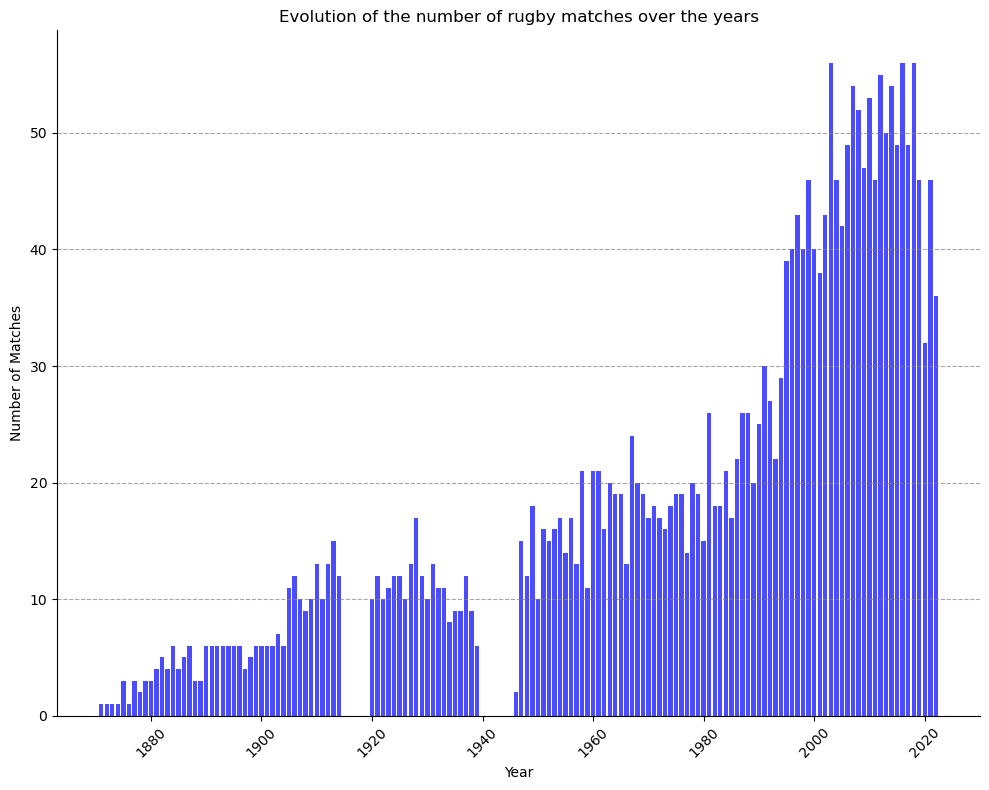

In [6]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

matches_per_year = df['year'].value_counts().sort_index()

years = np.array(matches_per_year.index)
match_counts = np.array(matches_per_year.values)

plt.figure(figsize=(10, 8))
plt.bar(matches_per_year.index, matches_per_year.values, color='blue', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.title('Evolution of the number of rugby matches over the years')
plt.xticks(rotation=45)
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe that the number of rugby international matches has been consistently growing throughout the years. There are also two clear periods with no rugby matches at all, corresponding to World War I and World War II, respectively. Additionally, before 1995, when rugby players were not yet professional, the number of matches per year did not exceed 20. However, as the sport became professional, enthusiasm grew, leading to an increase in the number of competitions and matches.

&rarr; Evolution of the total number of points per match over the years:

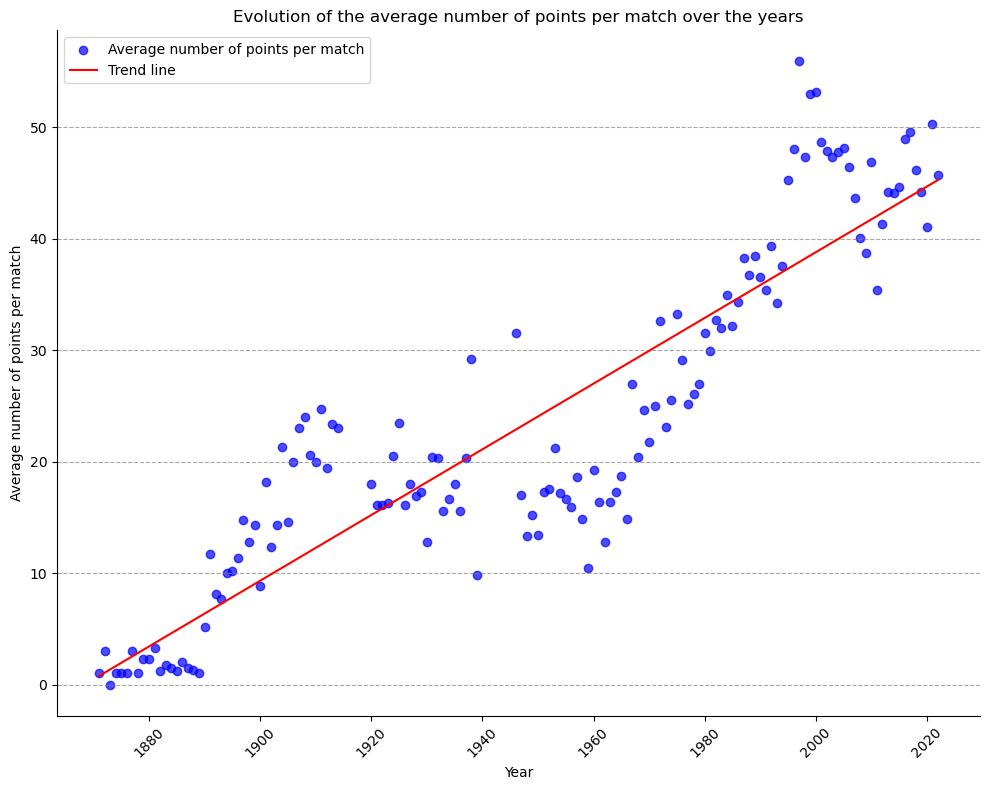

In [7]:
number_of_points = df['home_score'] + df['away_score']
df['number_of_points_per_match'] = number_of_points

points_per_year = df.groupby('year')['number_of_points_per_match'].agg(['count', 'sum'])
points_per_year['average_points_per_match'] = points_per_year['sum'] / points_per_year['count']

years = np.array(points_per_year.index)
average_points = np.array(points_per_year['average_points_per_match'])

slope, intercept, r_value, p_value, std_err = linregress(years, average_points)
trend_line = slope * years + intercept

plt.figure(figsize=(10, 8))
plt.scatter(years, average_points, color='blue', label='Average number of points per match', alpha=0.7)
plt.plot(years, trend_line, color='red', label='Trend line')
plt.xlabel('Year')
plt.ylabel('Average number of points per match')
plt.title('Evolution of the average number of points per match over the years')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe that the average number of points scored during an international rugby match has consistently increased over the years. There are several explanations for this phenomenon:
The first reason is that the rules for calculating points have changed over time. For instance, in the early days, a try was worth 0 points, and only the transformation was worth 1 point. This is why some early matches had scores like 1-0, 2-1, 0-0, etc. The rules for calculating points have evolved gradually, and now a try is worth 5 points, a conversion is worth 2 points, a drop goal is worth 3 points, and a penalty is also worth 3 points.
The second reason is that as time has passed, teams have become better, more trained, and more professional, making it easier to score during a game.

<div align="center">
  <h3>Conclusion</h3>
</div>

---

In tracing the history of rugby and its evolution, a captivating narrative emerges from the data. The journey through international rugby matches unveils a sport that has undergone substantial transformations, both in terms of frequency and gameplay. The data reflects a remarkable growth in the number of rugby international matches over the years, depicting a continuous expansion of the sport's global reach and popularity.

Distinct periods punctuate this historical progression, with notable absences during the tumultuous times of World War I and World War II. These gaps in the timeline serve as poignant reminders of the impact that global events can have on sporting activities, reflecting a world disrupted by conflict.

Before the watershed year of 1995, when rugby officially turned professional, the number of matches per year remained relatively modest, often not exceeding 20 games annually. However, as professionalism swept through the sport, it catalyzed an era of heightened enthusiasm and engagement. With players now dedicating themselves to the game as full-time athletes, the intensity of competition surged, leading to an upsurge in both the quantity of matches and the sheer fervor surrounding them.

One of the intriguing trends observed is the consistent increase in the average number of points scored during international rugby matches. This phenomenon can be attributed to a combination of factors that have evolved over time. Initially, the rules for calculating points were notably different from today's standards, contributing to matches with scores that seem unconventional by contemporary norms. As the sport matured, these rules underwent gradual modifications, culminating in the modern point system where a try is valued at 5 points, a conversion and penalty at 2 points each, and a drop goal at 3 points. 

Furthermore, the evolution of teams from amateur to professional status has played a pivotal role in shaping the dynamics of the game. The dedication, training, and preparation of modern rugby players have elevated their proficiency on the field, fostering an environment conducive to scoring. This, in turn, has translated into higher-scoring matches and a more exciting spectator experience.

In summary, the journey through the history and evolution of rugby is a testament to the sport's resilience, adaptability, and global appeal. From its early days with modest match counts to the fervent era of professionalism, rugby has consistently evolved to meet the changing demands of athletes, fans, and the broader sporting landscape. As we look to the future, the data offers a compelling narrative that continues to unfold, promising further growth, innovation, and excitement in the world of international rugby.

<div align="center">
  <h3>2. Triumphs insights</h3>
</div>

---

Here is a brief analysis of the data focused on winning perspectives. The aim is to unravel which teams emerge as the most prolific winners, delve into the reasons behind their success, and identify the factors that play a pivotal role in determining victory.

&rarr; Total number of wins per team:

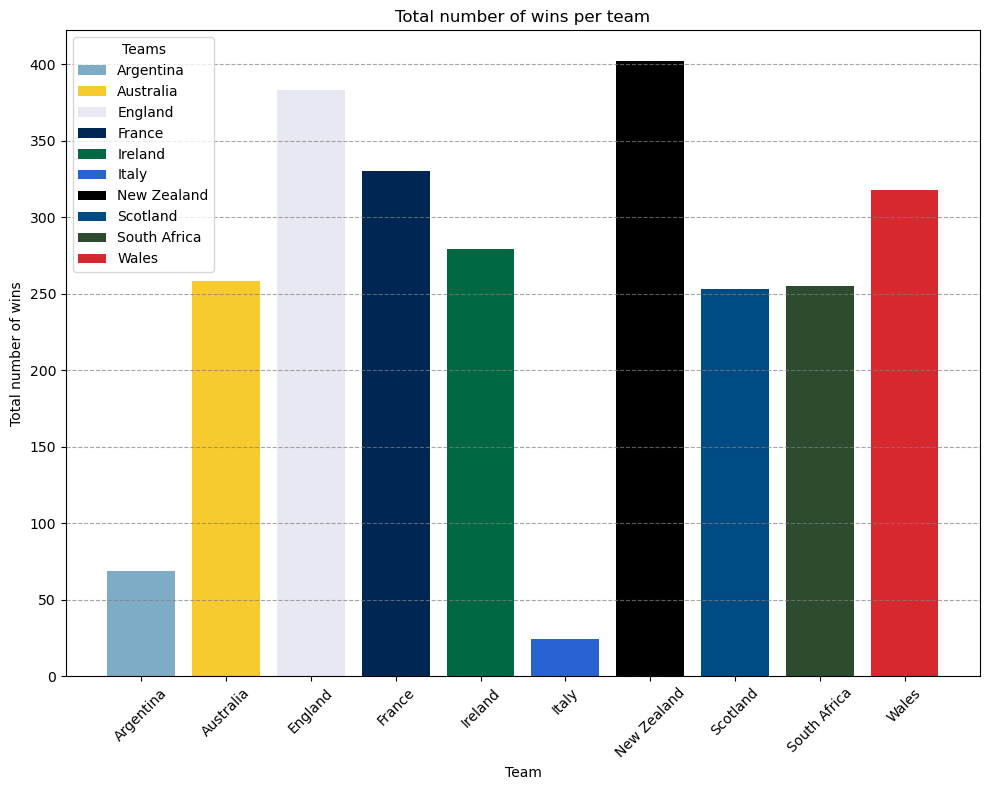

In [8]:
def winner(row):
    if row['home_score'] > row['away_score']:
        return row['home_team']
    elif row['home_score'] < row['away_score']:
        return row['away_team']
    else:
        return None

df['winner'] = df.apply(winner, axis=1)

total_wins_per_team = df['winner'].value_counts()
total_wins_per_team = total_wins_per_team.sort_index()

plt.figure(figsize=(10, 8))
for team, wins in total_wins_per_team.items():
    plt.bar(team, wins, color=team_colors[team], label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.xlabel('Team')
plt.ylabel('Total number of wins')
plt.title('Total number of wins per team')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()

We can observe that New Zealand, famously known as the 'All Blacks,' stands out with the highest number of wins in the history of rugby, despite not having the most matches played. England follows closely in second place. Among other notable teams, the British islands, France, South Africa, and Australia have each secured more than 250 victories. 
However, it's important to acknowledge that comparing the total number of wins might not be entirely fair, as teams have differing quantities of matches played. A more meaningful comparison could be made by analyzing the win-to-match ratio for each team. This ratio provides a better perspective on a team's success relative to its overall performance.

&rarr; Global ratio of the number of wins over number of matches for each team: 

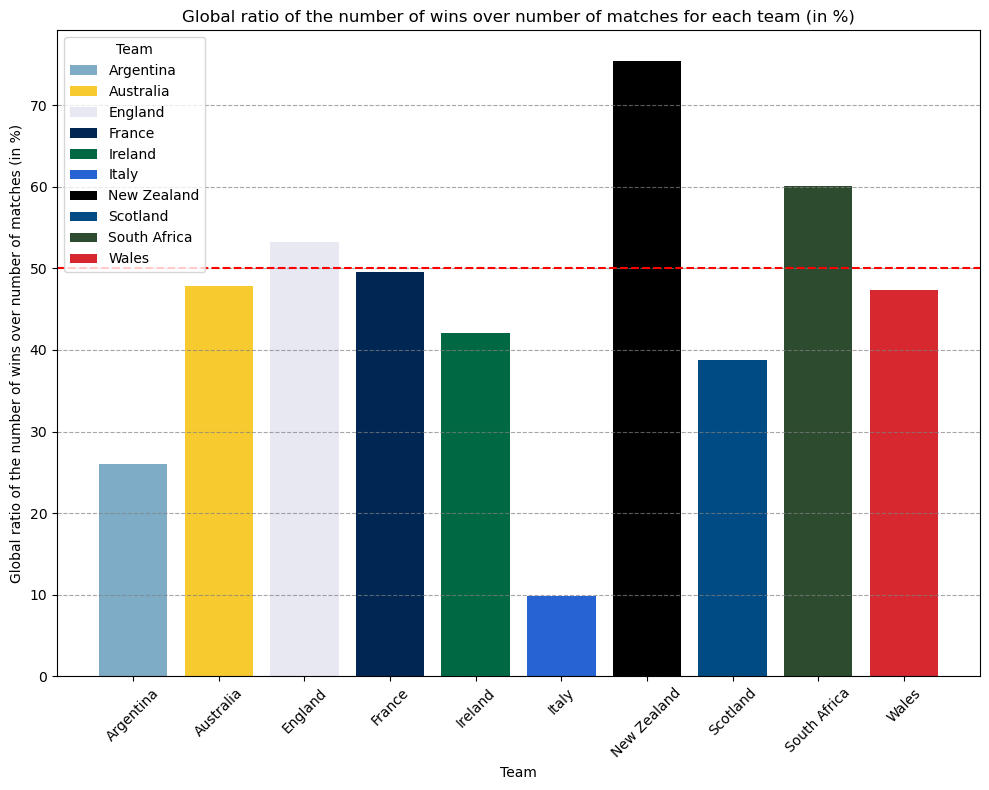

In [9]:
global_ratio = (total_wins_per_team / appearances) * 100

plt.figure(figsize=(10, 8))
for team, wins in global_ratio.items():
    plt.bar(team, wins, color=team_colors[team], label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Global ratio of the number of wins over number of matches (in %)')
plt.title('Global ratio of the number of wins over number of matches for each team (in %)')
plt.xticks(rotation=45)
plt.legend(title='Team')
plt.tight_layout()
plt.show()

We can clearly observe that the All Blacks, representing the New Zealand rugby team, stand out from the rest with an exceptional all-time win rate of approximately 75%. Maintaining such a consistently high level of performance over the decades is truly remarkable. South Africa boasts a global win rate of 60%, which is also impressive but not surprising given rugby's deep-rooted presence in their culture. Notably, New Zealand and South Africa are the only nations that have secured three World Cup titles.

Moving on, two other teams have achieved a win rate slightly above or equal to 50%: England and France. This underscores the enduring strength and rich rugby heritage of these nations.

On a slightly lower scale, Australia, Ireland, Scotland, and Wales all maintain win rates just below the 50% mark. This fact also attests to their robust rugby traditions, while the challenges they face highlight the formidable competition they encounter on the field.

Further down the spectrum, we find Argentina with a win rate of 25% and Italy with a win rate of 10%. These emerging rugby nations are grappling against the established powerhouses of rugby. Their struggle against these giants of the sport is evident and underlines the steep learning curve they face as they continue to develop their rugby prowess.

&rarr; Team with the best win rate for each year:

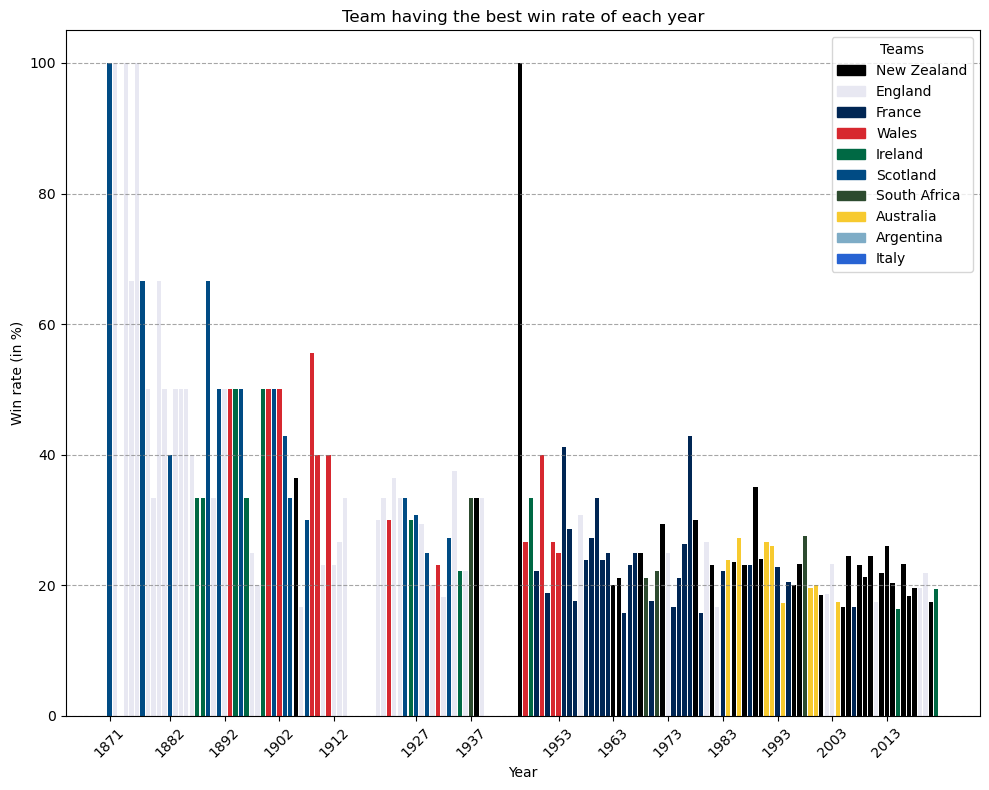

In [10]:
winners_per_year = df.groupby(['year', 'winner']).size().reset_index(name='wins')
appearances_per_year = df['year'].value_counts().reset_index(name='appearances').rename(columns={'index': 'year'})

win_ratio_per_year = winners_per_year.merge(appearances_per_year, on='year')
win_ratio_per_year['win_ratio'] = (win_ratio_per_year['wins'] / win_ratio_per_year['appearances']) * 100

best_teams_per_year = win_ratio_per_year.loc[win_ratio_per_year.groupby('year')['win_ratio'].idxmax()]

plt.figure(figsize=(10, 8))
for index, row in best_teams_per_year.iterrows():
    color = team_colors.get(row['winner'], 'gray')
    plt.bar(row['year'], row['win_ratio'], color=color)
    
legend_patches = [Patch(color=color, label=team) for team, color in team_colors.items()]
plt.legend(handles=legend_patches, title='Teams')

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.xlabel('Year')
plt.ylabel('Win rate (in %)')
plt.title('Team having the best win rate of each year')
plt.xticks(np.unique(best_teams_per_year['year'])[::10], rotation=45)
plt.tight_layout()
plt.show()

We can observe that the best win ratio for each year has been decreasing over time, dropping from 100% in 1871 to around 20% in recent times. This decline can be attributed to the increasing number of matches and opponents over the years, as well as the growing competitiveness of the teams.

However, it's important to note a notable anomaly in 1946 when New Zealand achieved a perfect win rate of 100%. This exceptional performance is somewhat deceiving, as there were only two matches played that year—both between Australia and New Zealand. This scarcity of matches in 1946 in Europe can be attributed to the prevailing circumstances of the time.

Upon closer examination, we can discern a pattern in the dominance of certain teams throughout history. From 1871 to 1946, the best teams were predominantly British: England, Ireland, Scotland, and Wales. In the 1960s and 1970s, the spotlight shifted to France, New Zealand, and South Africa. The subsequent decades saw Australian dominance from the 1980s to the 2000s, followed by a resurgence of All Black supremacy.

These fluctuations in team dominance reflect not only the evolution of the sport but also the broader historical, geopolitical, and competitive factors that have shaped international rugby over the years.

&rarr; Percentage of home wins over total number of wins for each team:

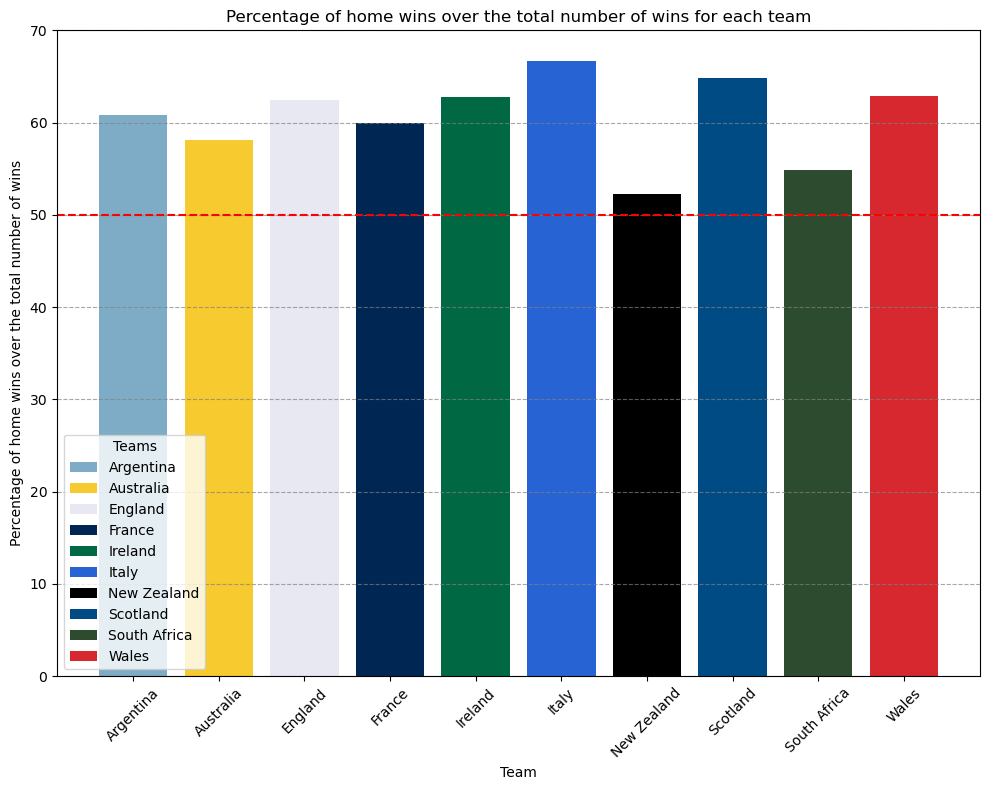

In [11]:
home_wins = df[df['winner'] == df['home_team']]
home_wins_per_team = home_wins['home_team'].value_counts()
total_wins_per_team = df['winner'].value_counts()
home_win_percentage_per_team = (home_wins_per_team / total_wins_per_team) * 100


plt.figure(figsize=(10, 8))
for team, percentage in home_win_percentage_per_team.items():
    plt.bar(team, percentage, color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y = 50, color = 'red', linestyle = '--')
plt.xlabel('Team')
plt.ylabel('Percentage of home wins over the total number of wins')
plt.title('Percentage of home wins over the total number of wins for each team')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show() 

We can observe that the majority of wins for all teams have occurred during matches played at home. This trend can be attributed to the advantages of playing in a familiar stadium, where the team can benefit from its supporters and home-field advantage. Playing on home turf eliminates the need for tiring travel and provides a setting where the home team aims to showcase their best performance to their fans, instilling pride and support.
Notably, Italy, a team that faces challenges in securing victories, has achieved 68% of their wins at home. This can be understood in light of the reasons mentioned earlier. Italians are renowned for their strong sense of pride and passion for their team, making their home matches especially significant.
However, it's worth highlighting that New Zealand stands out as the team with the lowest percentage of wins at home. This distinction can be attributed to the exceptional caliber of the "All Blacks," who maintain their high standard of play regardless of whether they are competing at home or away. This level of excellence underscores the remarkable consistency of New Zealand's rugby prowess.

&rarr; Percentage of wins when the team plays at home:

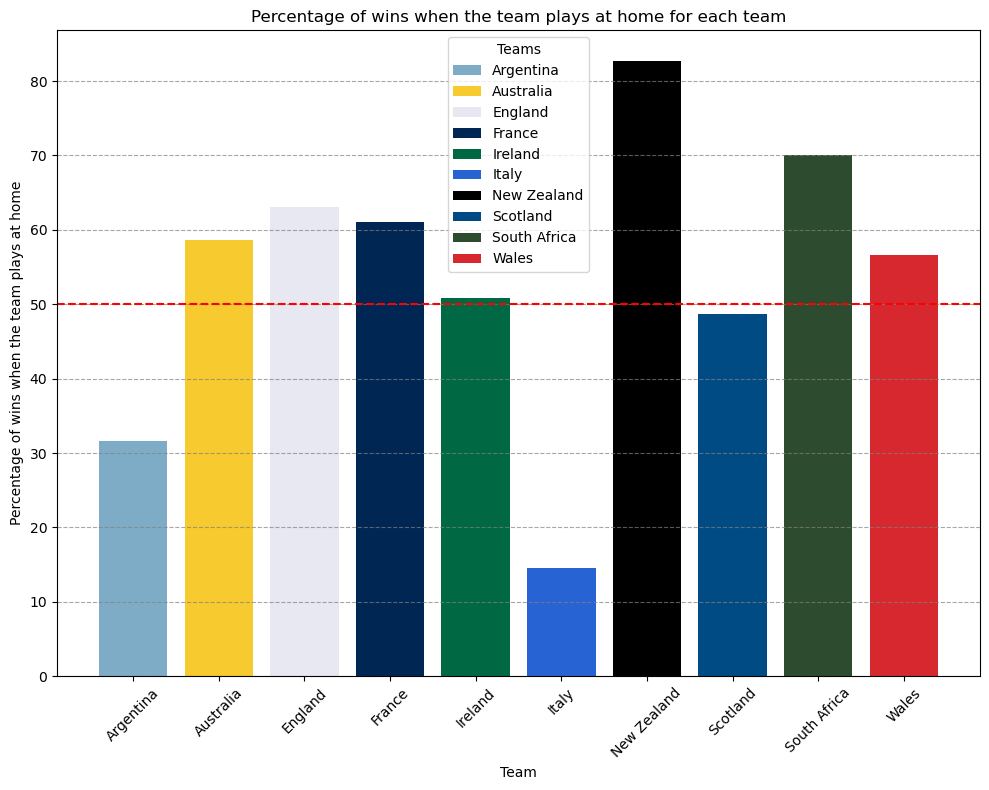

In [12]:
home_plays_per_team = df['home_team'].value_counts()

home_win_ratio_per_team = (home_wins_per_team / home_plays_per_team) * 100

plt.figure(figsize=(10, 8))
for team, percentage in home_win_ratio_per_team.items():
    plt.bar(team, percentage, color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins when the team plays at home')
plt.title('Percentage of wins when the team plays at home for each team')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()

In order to draw meaningful conclusions about the impact of playing at home, it's essential to have both the overall win ratio and the home win ratio presented on the same graph. This enables a direct comparison between the two factors.

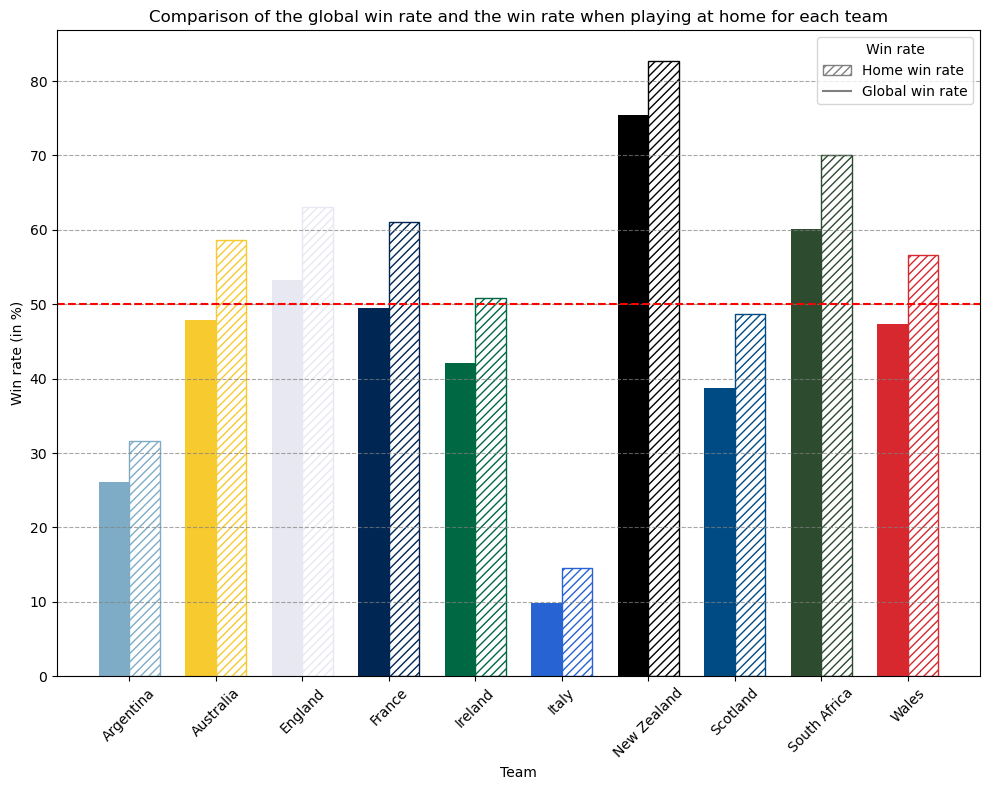

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))  
width = 0.35
position = np.arange(len(teams))
r1 = ax.bar(position - width/2, global_ratio, width, color=[team_colors.get(team, 'gray') for team in sorted(teams)])
r2 = ax.bar(position + width/2, home_win_ratio_per_team, width, color='white', edgecolor=[team_colors.get(team, 'gray') for team in sorted(teams)], hatch='////')

ax.set_xticks(position)
ax.set_xticklabels(sorted(teams)) 

legend_handles = [
    Patch(facecolor='white', edgecolor='gray', hatch='////', label='Home win rate'),
    Line2D([0], [0], color='gray', label='Global win rate')
]
ax.legend(handles=legend_handles, title='Win rate', loc='upper right')

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Win rate (in %)')
plt.title('Comparison of the global win rate and the win rate when playing at home for each team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can observe that every single team, without exception, boasts a higher win rate when playing at home compared to their overall global win rate. This observation aligns with the logical explanation provided earlier regarding the advantages of playing on home turf.

&rarr; Biggest win streaks for each team:

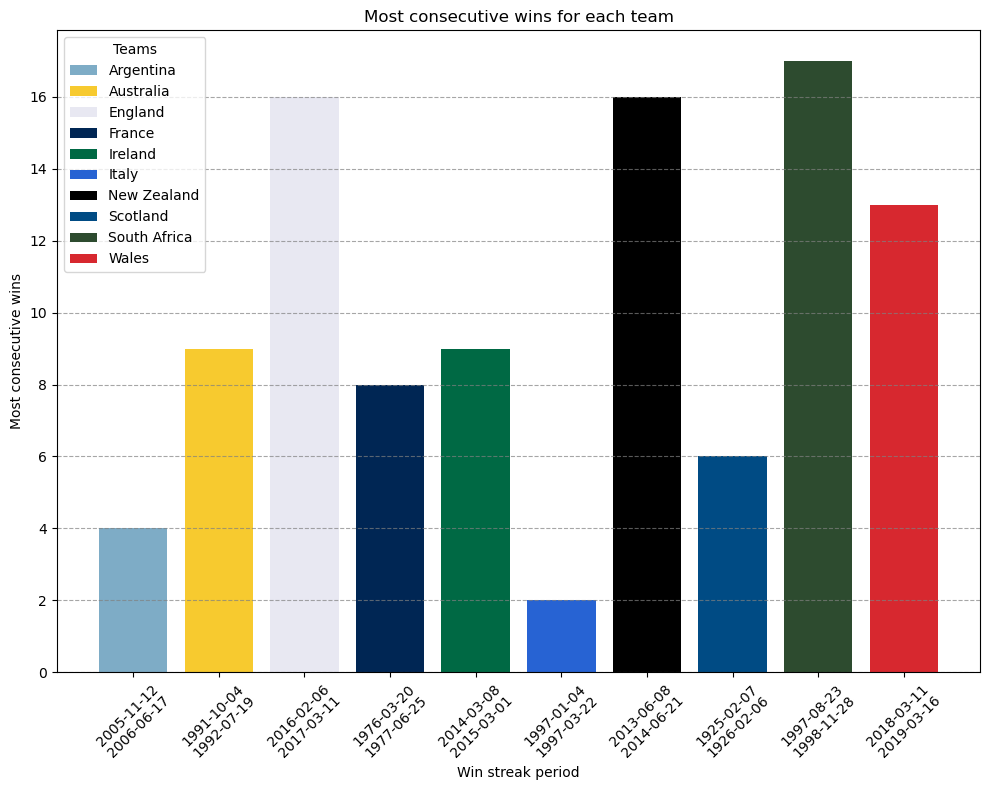

In [14]:
team_streaks = {}  

for team in teams:
    current_streak = 0
    max_streak = 0
    streak_start_date = None
    streak_end_date = None
    
    for index, row in df.iterrows():
        if row['home_team'] == team or row['away_team'] == team:
            if row['winner'] == team:
                if current_streak == 0:
                    streak_start_date = row['date']
                current_streak += 1
                streak_end_date = row['date']
            else:
                if current_streak > max_streak:
                    max_streak = current_streak
                    team_streaks[team] = {
                        'max_streak': max_streak,
                        'start_date': streak_start_date,
                        'end_date': streak_end_date
                    }
                current_streak = 0

sorted_teams = sorted(team_streaks.items(), key=lambda x: x[1]['max_streak'], reverse=True)
sorted_teams = sorted(sorted_teams, key=lambda x: x[0])


plt.figure(figsize=(10, 8))
for team, data in sorted_teams[:10]:
    streak_data = data['max_streak']
    plt.bar(team, streak_data, color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.xlabel('Win streak period')
plt.ylabel('Most consecutive wins')
plt.title('Most consecutive wins for each team')

xticks_labels = [f"{data['start_date'].strftime('%Y-%m-%d')}\n{data['end_date'].strftime('%Y-%m-%d')}" for team, data in sorted_teams[:10]]
plt.xticks(range(10), xticks_labels, rotation=45, ha='center')  
plt.legend(title='Teams')
plt.tight_layout()
plt.show()

We can observe the longest winning streak periods for each team, along with the number of wins achieved during those periods. As expected, the traditional rugby powerhouses tend to have the longest winning streaks.

Interestingly, examining these periods for each team reveals some noteworthy insights. For instance, Scotland showcased dominance in rugby during 1925 - 1926. Furthermore, from the 1990s onwards, there are distinct periods of domination by different teams, each making its mark on the sport.

&rarr; Number of wins in World Cup for each team: 

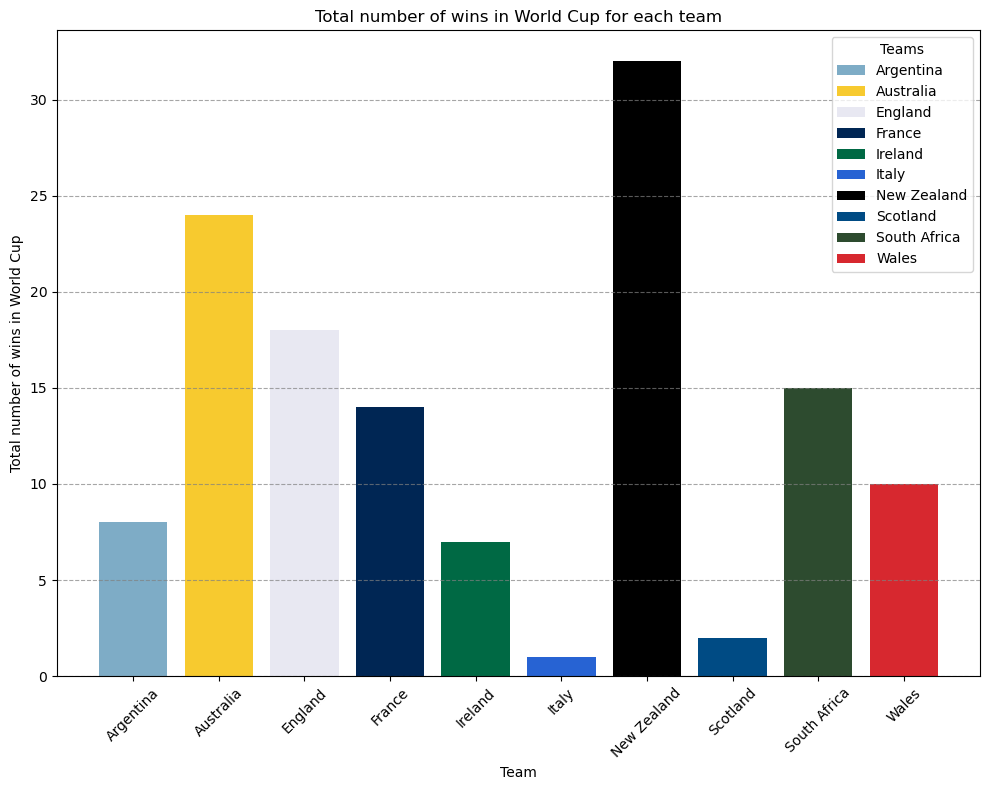

In [15]:
victories_WC = {}

for team in teams:
    victories_in_WC = 0
    for index, row in df.iterrows():
        if row['winner'] == team and row['world_cup'] == True:
            victories_in_WC += 1
    victories_WC[team] = {
        'victories_in_WC': victories_in_WC
    }

    
plt.figure(figsize=(10, 8))
for team in sorted(teams):
    plt.bar(team, victories_WC[team]['victories_in_WC'], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.xlabel('Team')
plt.ylabel('Total number of wins in World Cup')
plt.title('Total number of wins in World Cup for each team')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()

We can examine the total number of wins in the Rugby World Cup, but this statistic might not offer a complete picture. For instance, South Africa has won three World Cups but has fewer victories overall compared to England, which has secured just one World Cup title. This discrepancy can be attributed to varying levels of World Cup participation among teams. Additionally, the win count might not accurately reflect the strength of all teams, as many nations are missing from the data.

Despite these limitations, we can still discern the dominance of certain nations, including Australia, England, New Zealand, and South Africa. These four countries stand as the sole winners of the rugby World Cup to date. However, a more insightful perspective would be to assess the win rate of each team in the context of the World Cup.

&rarr; Ratio of the number of wins over number of matches in World Cup for each team: 

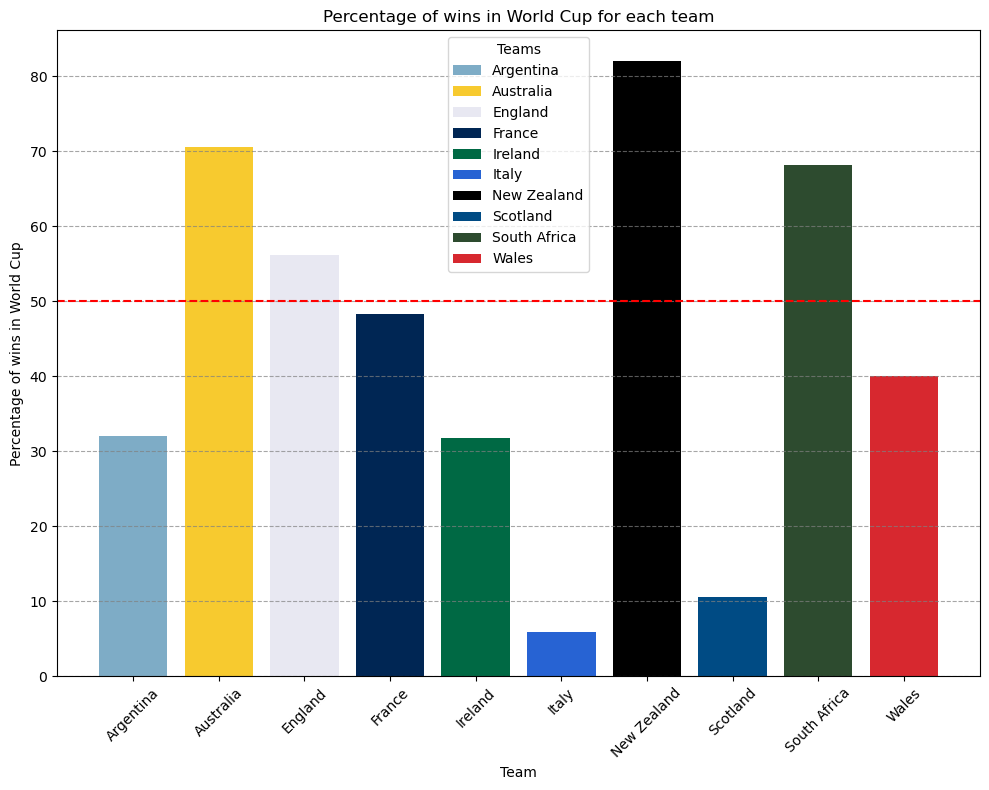

In [16]:
WC_appearances = pd.concat([df['home_team'], df['away_team']]).loc[df['world_cup'] == True].value_counts()

team_ratio_WC = {}
WC_ratio = {}

for team in sorted(teams):
    victories_in_WC = 0
    matches_played = WC_appearances.get(team, 0) 
    for index, row in df.iterrows():
        if row['winner'] == team and row['world_cup'] == True:
            victories_in_WC += 1
    team_ratio_WC[team] = {
        'victories_in_WC': victories_in_WC,
        'matches_played': matches_played
    }

for team, data in team_ratio_WC.items():
    WC_ratio[team] = (data['victories_in_WC'] / data['matches_played']) * 100 if data['matches_played'] > 0 else 0

    
plt.figure(figsize=(10, 8))
for team in sorted(teams):
    plt.bar(team, WC_ratio[team], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins in World Cup')
plt.title('Percentage of wins in World Cup for each team')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()

As expected, we witness the established dominance of Australia, England, New Zealand, and South Africa in the Rugby World Cup. France also boasts a commendable performance in the tournament, which aligns with the reputation of these teams. However, it's worth noting the unexpected win rate of Scotland, which ranks second lowest before Italy. Scotland's results have been disappointing, with the team never progressing beyond the quarter-finals. To gain deeper insights, it would be intriguing to juxtapose the overall win rate of each team with their win rate specifically in the World Cup. This analysis could reveal whether certain teams exhibit improved or deteriorated performance under the immense pressure of such a significant event.

&rarr; Win rates comparison for each team:

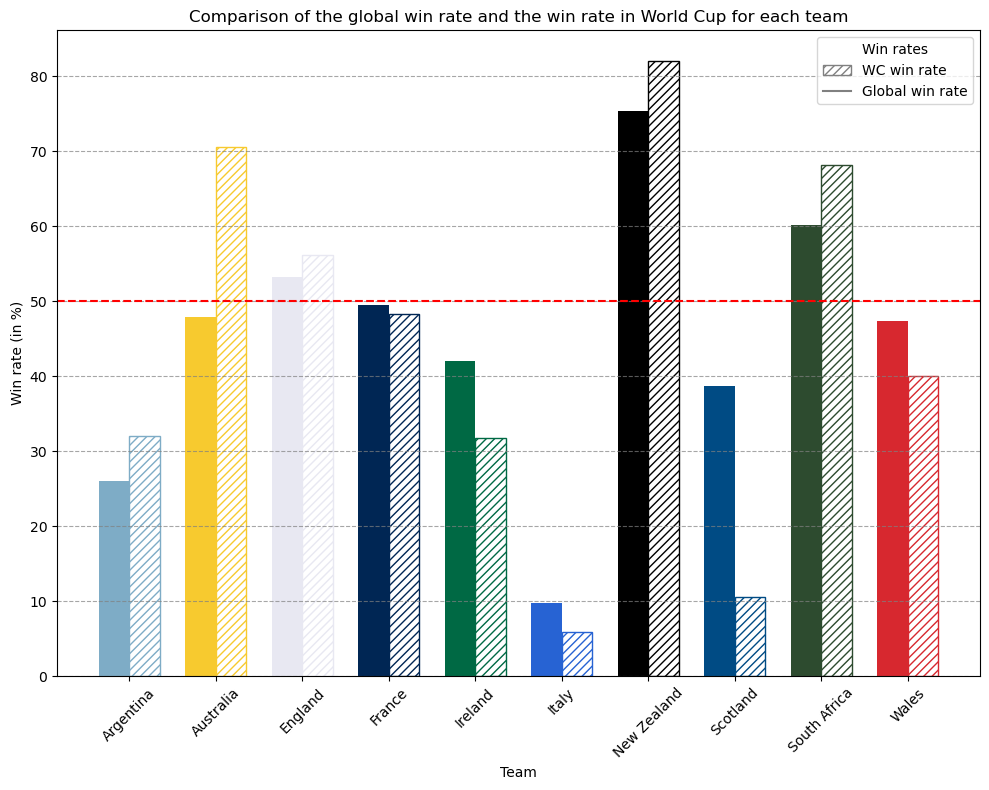

In [17]:
ratio_series_WC = pd.Series(WC_ratio).sort_index()

fig, ax = plt.subplots(figsize=(10, 8)) 
r1 = ax.bar(position - width/2, global_ratio, width, label='Global win rate', color=[team_colors.get(team, 'gray') for team in sorted(teams)])
r2 = ax.bar(position + width/2, ratio_series_WC, width, label='WC win rate', color='white', edgecolor=[team_colors.get(team, 'gray') for team in sorted(teams)], hatch='////')

ax.set_xticks(position)
ax.set_xticklabels(sorted(teams))  
legend_handles = [
    Patch(facecolor='white', edgecolor='gray', hatch='////', label='WC win rate'),
    Line2D([0], [0], color='gray', label='Global win rate')
]
ax.legend(handles=legend_handles, title='Win rates', loc='upper right')

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Win rate (in %)')
plt.title('Comparison of the global win rate and the win rate in World Cup for each team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can clearly discern a remarkable trend in the performance of various teams during the Rugby World Cup. Australia, with a global win rate of approximately 48%, undergoes a profound transformation during the tournament, achieving an impressive win rate of 71%. Similarly, New Zealand elevates its World Cup win rate to over 82%, a staggering accomplishment considering their already elevated global win rate of above 75%.

England and South Africa, although not to the same extent as Australia and New Zealand, also exhibit an improvement in their win rates during these prestigious events. This observation holds true for all previous World Cup winners — their win rates during the competition surpass their performance during other times. Notably, Argentina joins this league of enhanced performance, whereas most other nations experience a dip in their World Cup win rates compared to their global win rates.

These findings underscore the immense pressure teams face in the World Cup, which can either amplify their strengths or expose their weaknesses. This environment seems to favor teams like Argentina, Australia, and South Africa, whose performances benefit from the intensified competition. On the other hand, teams like Ireland and Scotland, despite their standing as top contenders, find it challenging to thrive in this high-pressure setting.

The struggles of Scotland are particularly evident, with a World Cup win rate slightly surpassing 10%. This statistic is perplexing considering Scotland's stature as a formidable team in the rugby world. It serves as a poignant reminder of the immense difficulty associated with winning a World Cup match, further highlighting the Herculean task of clinching the ultimate victory in the tournament.

<div align="center">
  <h3>Conclusion</h3>
</div>

---

In the captivating world of rugby, certain teams have risen to prominence as dominant forces, leaving an indelible mark on the sport's history. New Zealand, the legendary 'All Blacks,' stands tall with the highest number of victories, followed closely by England. France, South Africa, Australia, and the British Isles have also etched their names among the elite with more than 250 wins each. However, a mere tally of wins doesn't paint the full picture, considering the varying number of matches played by each team. A more insightful metric is the win-to-match ratio, which reveals New Zealand's exceptional win rate of around 75%, a testament to their enduring excellence. South Africa, boasting a 60% win rate, showcases their rugby heritage, while England and France maintain ratios above 50%, reflecting their storied traditions.

Australia, Ireland, Scotland, and Wales hold win rates just below 50%, underscoring their tenacity amid stiff competition. Argentina's 25% win rate and Italy's 10% underscore the challenges faced by emerging rugby nations against established powerhouses.

Over time, the average annual win ratio for each team has gradually declined, partly due to the growing number of matches and opponents. Notably, New Zealand's remarkable 1946 win rate of 100% was skewed by a limited number of matches between Australia and New Zealand, influenced by historical circumstances.

Historically, British teams dominated from 1871 to 1946, followed by shifts in dominance. From the 1960s to 1970s, France, New Zealand, and South Africa emerged as forces. The 1980s to 2000s saw Australian prominence, succeeded by the resurgence of the All Blacks.

Considering home-field advantage, most teams exhibit higher win rates at home, thanks to familiar surroundings and spirited support. Italy, facing challenges, wins 68% at home, reflecting fans' passion. New Zealand, exceptional in skill, maintains a consistent performance home and away. 

Examining World Cup performance, Australia, England, New Zealand, and South Africa dominate, with Scotland's World Cup win rate standing out. Teams like Argentina exhibit improved performance during World Cups. Interestingly, Australia and New Zealand's win rates elevate remarkably during World Cups, revealing the pressure and prestige of the tournament. Conversely, Scotland faces World Cup challenges, showcasing the tournament's formidable nature.

In the realm of rugby, the blend of historical legacy, talent, home-field advantage, and performance under pressure shapes the narrative of victories. These factors converge to create a tapestry of triumphs, uniting nations and fans under the banner of a sport that transcends boundaries and embodies the spirit of competition.

<div align="center">
  <h3>3. Northern hemisphere Vs Southern hemisphere analysis</h3>
</div>

---

Here is a brief analysis of the data from a geographical standpoint. The discourse often revolves around the concept of Northern supremacy versus Southern supremacy. Let's delve into the dataset to discern which hemisphere demonstrates superior performance.

&rarr; Number of wins per hemisphere in matches between the two hemispheres:

+-----------------------------------------------------+---------+
| Statistic                                           |   Count |
+=====================================================+=========+
| Total number of matches between the two hemispheres |     815 |
+-----------------------------------------------------+---------+
| Number of wins of the Northern hemisphere           |     260 |
+-----------------------------------------------------+---------+
| Number of wins of the Southern hemisphere           |     531 |
+-----------------------------------------------------+---------+
| Total number of draws                               |      24 |
+-----------------------------------------------------+---------+


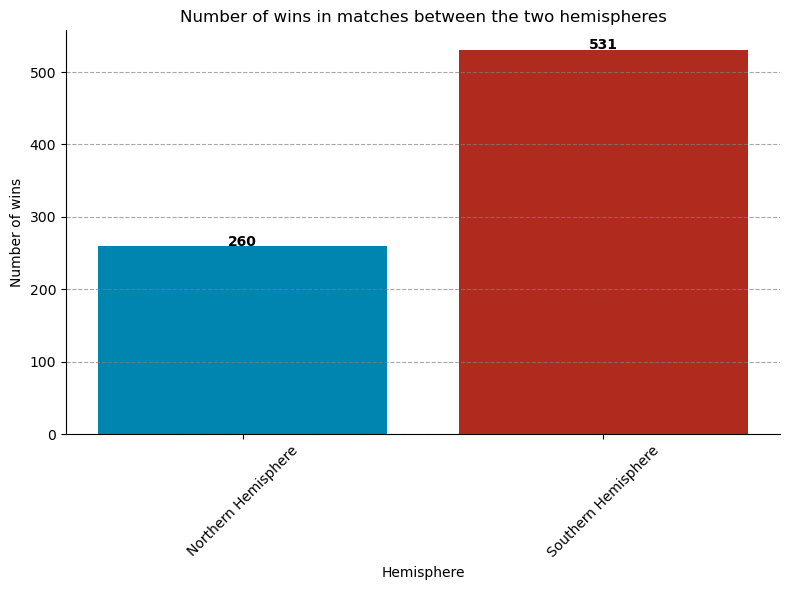

In [18]:
Northern_teams = {
    'England',
    'France',
    'Ireland',
    'Italy',
    'Scotland',
    'Wales'
}

Southern_teams = {
    'Argentina',
    'Australia',
    'New Zealand',
    'South Africa'
}

def hemisphere_clash(row):
    if row['home_team'] in Northern_teams and row['away_team'] in Southern_teams:
        return True
    elif row['home_team'] in Southern_teams and row['away_team'] in Northern_teams:
        return True
    else:
        return False

df['different_hemisphere'] = df.apply(hemisphere_clash, axis=1)



number_of_north_south_matches = df['different_hemisphere'].sum()
number_of_north_wins = 0
number_of_south_wins = 0
number_of_draws = 0

def northern_winner(row):
    global number_of_north_wins, number_of_south_wins, number_of_draws
    if row['different_hemisphere']:
        if row['winner'] in Northern_teams:
            number_of_north_wins += 1
        elif row['winner'] in Southern_teams:
            number_of_south_wins += 1
        else:
            number_of_draws += 1
    return number_of_north_wins, number_of_south_wins, number_of_draws

df.apply(northern_winner, axis=1)


hemisphere_data = [
    ['Total number of matches between the two hemispheres', number_of_north_south_matches],
    ['Number of wins of the Northern hemisphere', number_of_north_wins],
    ['Number of wins of the Southern hemisphere', number_of_south_wins],
    ['Total number of draws', number_of_draws]
]

print(tabulate(hemisphere_data, headers=['Statistic', 'Count'], tablefmt='grid'))


plt.figure(figsize=(8, 6))
bars = plt.bar(['Northern Hemisphere', 'Southern Hemisphere'], [number_of_north_wins, number_of_south_wins], color=['#0084b0', '#af2b1e'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', color='black', fontweight='bold')

plt.xlabel('Hemisphere')
plt.ylabel('Number of wins')
plt.title('Number of wins in matches between the two hemispheres')
plt.xticks(rotation=45)
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe that it is clear that during matches opposing the North and the South, the Southern hemisphere is dominating the North having twice more victories.
However this figure needs to be qualified because, as mentioned above, data from the Pacific islands of Fiji, Samoa and Tonga are missing.

<div align="center">
  <h3>Conclusion</h3>
</div>

---

In the world of rugby, the age-old rivalry between the Northern and Southern hemispheres has been a defining element, shaping the sport's landscape. An analysis of matches between these two regions reveals a clear dominance by the Southern hemisphere, securing approximately twice as many victories as their Northern counterparts.

This apparent divide is a compelling narrative in itself, underscoring the prowess and supremacy of teams hailing from the Southern hemisphere. However, it's important to approach this observation with a certain degree of nuance. As highlighted earlier, the absence of data from rugby-strong Pacific island nations, such as Fiji, Samoa, and Tonga, presents a limitation to the analysis.

The exclusion of these Pacific nations, which have contributed significantly to the global rugby stage, leaves a gap in our understanding of the true dynamics between the hemispheres. The absence of these teams' data hints at a more complex narrative, one that goes beyond a straightforward North-South rivalry.

As rugby continues to evolve and thrive, the ongoing contest between the hemispheres remains a compelling aspect of the sport. However, acknowledging the incomplete picture due to missing data from prominent rugby nations adds a layer of intrigue and reminds us that the rugby world is far from a simplistic binary. The hemispheric rivalry intertwines with the broader narrative of global rugby, where diverse teams and cultures come together to shape the rich tapestry of competition and camaraderie.

<div align="center">
  <h2>III. Historical Analysis of <i> los Pumas </i> </h2>
</div>

Here is a more precise analysis of the data for Argentina.




<img src="img/Logo_Los_Pumas_2023.svg" alt="Logo Argentina" style="width: 40%;">

<div align="center">
  <h3>1. Triumphs insights</h3>
</div>

---

&rarr; Argentina's win rate against each team:

Number of official matches against Argentina for each team:
Australia: 38 matches
England: 24 matches
France: 53 matches
Ireland: 19 matches
Italy: 23 matches
New Zealand: 35 matches
Scotland: 21 matches
South Africa: 32 matches
Wales: 20 matches


Number of wins for Argentina against each team:
Australia: 7 wins
England: 4 wins
France: 14 wins
Ireland: 6 wins
Italy: 17 wins
New Zealand: 2 wins
Scotland: 11 wins
South Africa: 3 wins
Wales: 5 wins


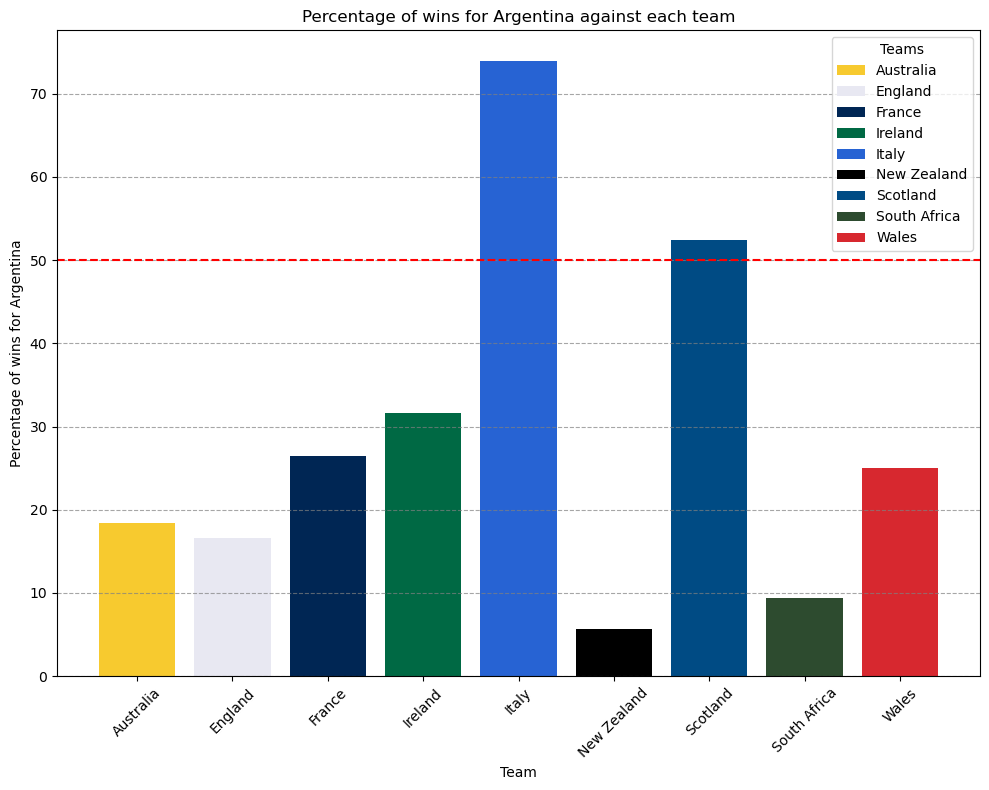

In [19]:
arg_opponent = {
    'Australia',
    'England',
    'France',
    'Ireland',
    'Italy',
    'New Zealand',
    'Scotland',
    'South Africa',
    'Wales'
}

arg_match = {team: 0 for team in arg_opponent}
arg_win = {team: 0 for team in arg_opponent}
arg_ratio = {}

for index, row in df.iterrows():
    for team in arg_opponent:
        if row['home_team'] == team and row['away_team'] == 'Argentina':
            arg_match[team] += 1
            if row['winner'] == 'Argentina':
                arg_win[team] += 1
        elif row['home_team'] == 'Argentina' and row['away_team'] == team:
            arg_match[team] += 1
            if row['winner'] == 'Argentina':
                arg_win[team] += 1
              

for team in arg_win:
    ratio = (arg_win[team] / arg_match[team]) * 100 if arg_match[team] > 0 else 0
    arg_ratio[team] = ratio


print("\033[1mNumber of official matches against Argentina for each team:\033[0m")
for team, matches in dict(sorted(arg_match.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {matches} matches\033[0m")


print("\n")

print("\033[1mNumber of wins for Argentina against each team:\033[0m")
for team, wins in dict(sorted(arg_win.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {wins} wins\033[0m")    


plt.figure(figsize=(10, 8))
for team in sorted(arg_opponent):
    plt.bar(team, dict(sorted(arg_ratio.items()))[team], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins for Argentina')
plt.title('Percentage of wins for Argentina against each team')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()

We can observe that the number of matches against Argentina is relatively low, with the highest being 53 matches against France, while for other nations it is around 30. This is normal considering that Argentina is a relatively young rugby nation.

Furthermore, Argentina's win rate remains consistently below 35%, dropping to less than 10% against formidable opponents like the All Blacks or Springboks. There are exceptions such as Italy, which is also a young rugby nation and thus understandable, and Scotland, which is more surprising as it's an established rugby nation but seems to struggle against Argentina.

It's worth mentioning that these win rates are calculated based on data spanning from 1871 to the present day. To capture the most up-to-date trends, focusing on win rates over recent years would provide a more accurate reflection of the current team dynamics.

&rarr; Argentina's win rate against each team since the last World Cup (2019):

Number of official matches against Argentina since 2019 for each team:
Australia: 6 matches
England: 0 matches
France: 1 matches
Ireland: 1 matches
Italy: 1 matches
New Zealand: 6 matches
Scotland: 3 matches
South Africa: 2 matches
Wales: 2 matches


Number of wins for Argentina against each team:
Australia: 1 wins
England: 0 wins
France: 0 wins
Ireland: 0 wins
Italy: 1 wins
New Zealand: 2 wins
Scotland: 2 wins
South Africa: 0 wins
Wales: 0 wins

Global win rate for Argentina since the last WC: 27.27%


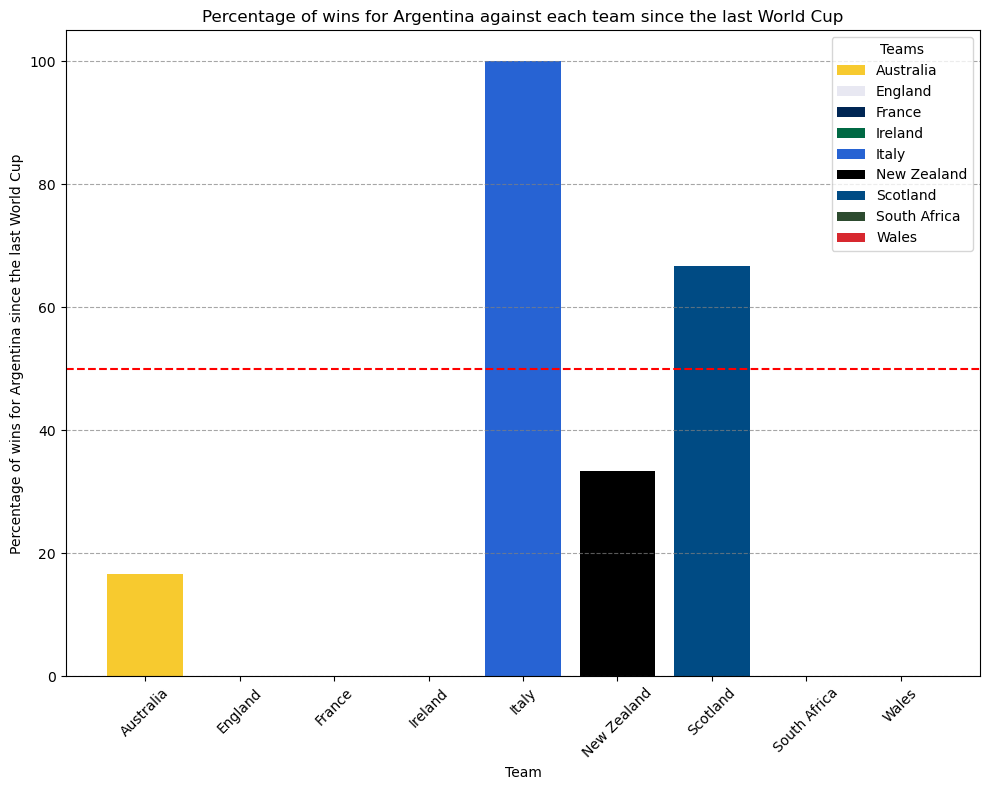

In [20]:
arg_match_2020 = {team: 0 for team in arg_opponent}
arg_win_2020 = {team: 0 for team in arg_opponent}
arg_ratio_2020 = {}

for index, row in df.iterrows():
    if row['year'] >= 2020:
        for team in arg_opponent:
            if row['home_team'] == team and row['away_team'] == 'Argentina':
                arg_match_2020[team] += 1
                if row['winner'] == 'Argentina':
                    arg_win_2020[team] += 1
            elif row['home_team'] == 'Argentina' and row['away_team'] == team:
                arg_match_2020[team] += 1
                if row['winner'] == 'Argentina':
                    arg_win_2020[team] += 1

for team in arg_win_2020:
    ratio = (arg_win_2020[team] / arg_match_2020[team]) * 100 if arg_match_2020[team] > 0 else 0
    arg_ratio_2020[team] = ratio

total_arg_win_2020 = sum(arg_win_2020.values())
total_arg_match_2020 = sum(arg_match_2020.values())



print("\033[1mNumber of official matches against Argentina since 2019 for each team:\033[0m")
for team, matches in dict(sorted(arg_match_2020.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {matches} matches\033[0m")


print("\n")

print("\033[1mNumber of wins for Argentina against each team:\033[0m")
for team, wins in dict(sorted(arg_win_2020.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {wins} wins\033[0m")

global_win_rate_arg_2020 = (total_arg_win_2020 / total_arg_match_2020) * 100
print("\nGlobal win rate for Argentina since the last WC: {:.2f}%".format(global_win_rate_arg_2020))



plt.figure(figsize=(10, 8))
for team in sorted(arg_opponent):
    plt.bar(team, arg_ratio_2020[team], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins for Argentina since the last World Cup')
plt.title('Percentage of wins for Argentina against each team since the last World Cup')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()


We can observe that the overall win ratio is only 28.57%. Although Argentina's results have been relatively favorable against Australia, New Zealand, and Scotland, indicating improvement, there are four teams against which Argentina holds a 0% win rate, contributing to the low overall ratio.

The challenges are greater when facing strong opponents like South Africa and Wales. These teams pose formidable competition for Argentina.

When facing other teams, it's difficult to make a judgment based on only one match. During this period, France and Ireland emerged as strong opponents for Argentina, while England and Italy secured victories against them.

&rarr; Argentina's longest winning streaks:

+--------+--------------+--------------+------------+
|   Rank |   Win Streak | Begin Date   | End Date   |
+========+==============+==============+============+
|      1 |            4 | 2005-11-12   | 2006-06-17 |
+--------+--------------+--------------+------------+
|      2 |            3 | 2001-07-14   | 2001-11-18 |
+--------+--------------+--------------+------------+
|      3 |            3 | 2007-05-26   | 2007-06-09 |
+--------+--------------+--------------+------------+
|      4 |            3 | 2007-09-07   | 2007-10-07 |
+--------+--------------+--------------+------------+
|      5 |            2 | 1994-06-04   | 1994-06-11 |
+--------+--------------+--------------+------------+
|      6 |            2 | 2003-06-14   | 2003-06-20 |
+--------+--------------+--------------+------------+
|      7 |            2 | 2006-11-11   | 2006-11-18 |
+--------+--------------+--------------+------------+
|      8 |            2 | 2007-10-19   | 2008-06-07 |
+--------+--------------+---

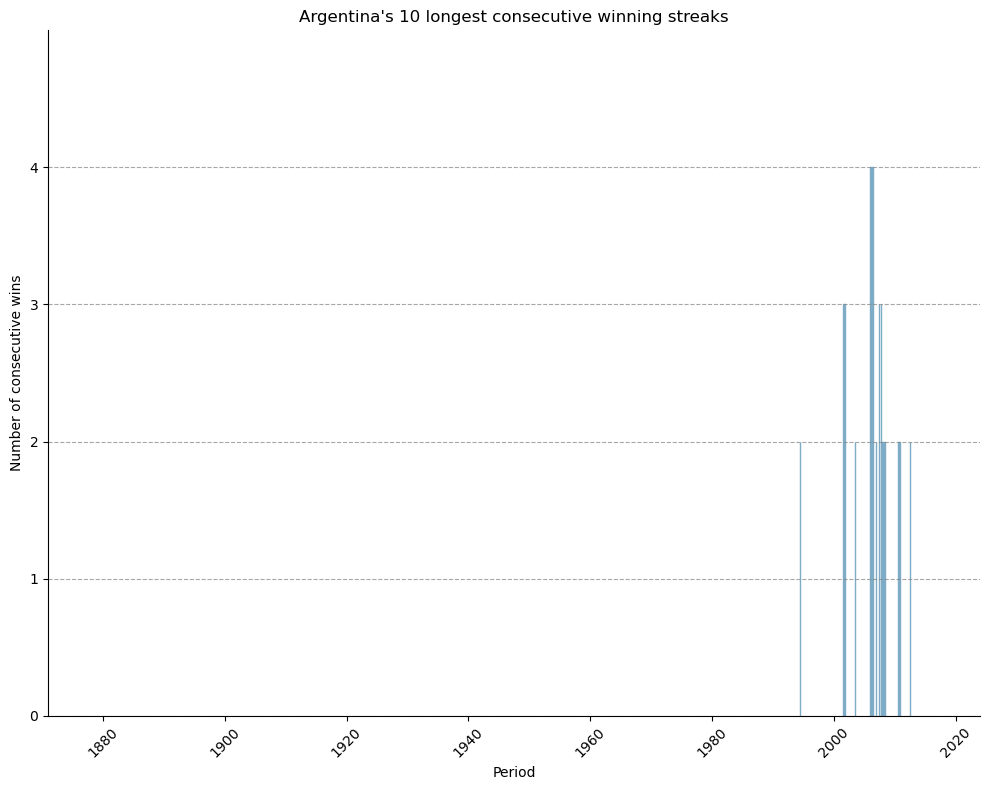

In [21]:
arg_win_streaks = []

current_win_streak_arg = 0
win_begin_date_arg = None
win_end_date_arg = None

for index, row in df.iterrows():
    if row['home_team'] == 'Argentina' or row['away_team'] == 'Argentina':
        if row['winner'] == 'Argentina':
            if current_win_streak_arg == 0:
                win_begin_date_arg = row['date']
            current_win_streak_arg += 1
            win_end_date_arg = row['date']
        else:
            if current_win_streak_arg > 1:
                arg_win_streaks.append({
                    'begin_date': win_begin_date_arg,
                    'end_date': win_end_date_arg,
                    'wins_streak': current_win_streak_arg
                })
            current_win_streak_arg = 0

sorted_arg_win_streaks = sorted(arg_win_streaks, key=lambda x: x['wins_streak'], reverse=True)

win_table_data_arg = []
for i, win_streak in enumerate(sorted_arg_win_streaks[:10], start=1):
    win_table_data_arg.append([i, win_streak['wins_streak'], win_streak['begin_date'].strftime('%Y-%m-%d'), win_streak['end_date'].strftime('%Y-%m-%d')])

win_table_arg = pd.DataFrame(win_table_data_arg, columns=['Rank', 'Win Streak', 'Begin Date', 'End Date'])
print(tabulate(win_table_arg, headers='keys', tablefmt='grid', showindex=False))





win_begin_arg = ['1994-06-04', '2001-07-14', '2003-06-14', '2005-11-12', '2006-11-11','2007-05-26', '2007-09-07', '2007-10-19',  '2010-06-26', '2012-06-09']
win_end_arg = ['1994-06-11', '2001-11-18', '2003-06-20', '2006-06-17', '2006-11-18', '2007-06-09', '2007-10-07', '2008-06-07', '2010-11-13', '2012-06-16']
win_row_arg = [2, 3, 2, 4, 2, 3, 3, 2, 2, 2]

plt.figure(figsize=(10, 8))
for i in range(10):
    begin_win_date = datetime.strptime(win_begin_arg[i], '%Y-%m-%d')
    end_win_date = datetime.strptime(win_end_arg[i], '%Y-%m-%d')
    
    x_win = np.array([begin_win_date, end_win_date])
    y_win = np.array([win_row_arg[i], win_row_arg[i]])
    
    plt.fill_between(x_win, 0, y_win, color='#7EACC6')
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive wins')
plt.title('Argentina\'s 10 longest consecutive winning streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))  
plt.ylim(0, max(win_row_arg) + 1)
plt.yticks(range(max(win_row_arg) + 1))
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe the longest winning streaks of Argentina. All of these streaks occurred after the 1990s, reflecting Argentina's status as a relatively young rugby nation. In the early 2000s, Argentina experienced victories against some of the top 10 teams, although the win streak never extended beyond 4 consecutive wins. This pattern is understandable given that Argentina was still in the process of development, competing against well-established and formidable opponents.

&rarr; Argentina's largest wins against each team:

In [22]:
arg_largest_win = {team: {'win_difference': 0, 'home_score': 0, 'away_score': 0, 'stadium': None, 'date': None} for team in arg_opponent}

for index, row in df.iterrows():
    for team in arg_opponent:
        if row['home_team'] == team and row['away_team'] == 'Argentina':
            if row['winner'] == 'Argentina':
                win_difference = abs(row['away_score'] - row['home_score'])
                if win_difference > arg_largest_win[team]['win_difference']:
                    arg_largest_win[team]['win_difference'] = win_difference
                    arg_largest_win[team]['home_score'] = row['home_score']
                    arg_largest_win[team]['away_score'] = row['away_score']
                    arg_largest_win[team]['stadium'] = row['stadium']
                    arg_largest_win[team]['date'] = row['date'].strftime('%Y-%m-%d')
        elif row['home_team'] == 'Argentina' and row['away_team'] == team:
            if row['winner'] == 'Argentina':
                win_difference = abs(row['away_score'] - row['home_score'])
                if win_difference > arg_largest_win[team]['win_difference']:
                    arg_largest_win[team]['win_difference'] = win_difference
                    arg_largest_win[team]['home_score'] = row['home_score']
                    arg_largest_win[team]['away_score'] = row['away_score']
                    arg_largest_win[team]['stadium'] = row['stadium']
                    arg_largest_win[team]['date'] = row['date'].strftime('%Y-%m-%d')

                    
for team in sorted(arg_largest_win.keys()):
    data = arg_largest_win[team]
    color = team_colors.get(team, 'black')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m"
          f"\033[1m\033[3m{team}\033[0m")
    print(f"Score Difference: {data['win_difference']}")
    print(f"Home Score: {data['home_score']}")
    print(f"Away Score: {data['away_score']}")
    print(f"Stadium: {data['stadium']}")
    print(f"Date: {data['date']}")
    print("-" * 20)

Australia
Score Difference: 31
Home Score: 48
Away Score: 17
Stadium: Estadio San Juan del Bicentenario
Date: 2022-08-13
--------------------
England
Score Difference: 20
Home Score: 33
Away Score: 13
Stadium: Ferrocarril Stadium
Date: 1997-06-07
--------------------
France
Score Difference: 28
Home Score: 41
Away Score: 13
Stadium: José Amalfitani Stadium
Date: 2010-06-26
--------------------
Ireland
Score Difference: 23
Home Score: 20
Away Score: 43
Stadium: Millennium Stadium
Date: 2015-10-18
--------------------
Italy
Score Difference: 32
Home Score: 6
Away Score: 38
Stadium: Stadio Flaminio
Date: 2002-11-16
--------------------
New Zealand
Score Difference: 10
Home Score: 15
Away Score: 25
Stadium: Bankwest Stadium
Date: 2020-11-14
--------------------
Scotland
Score Difference: 9
Home Score: 22
Away Score: 31
Stadium: Murrayfield Stadium
Date: 1999-08-21
--------------------
South Africa
Score Difference: 13
Home Score: 32
Away Score: 19
Stadium: Malvinas Argentinas
Date: 2018-08

We can observe the most significant victories of Argentina in terms of score difference against each of the other teams. Interestingly, these victories all occurred between the 1990s and the present day, as explained earlier.

It's also noteworthy that despite being a relatively young rugby nation, Argentina has achieved significant victories against every team, including against the All Blacks, often with substantial score differences. This is not the case for every team, and such achievements are commendable.

Furthermore, it's intriguing to observe that despite Argentina's relatively high winning ratio against Scotland (over 50%), their biggest win against Scotland was by a margin of only 9 points. This suggests that the matches between these two nations are closely contested, with uncertain outcomes.

<div align="center">
  <h3>2. Debacles insights</h3>
</div>

---

&rarr; Argentina's longest losing streaks:

+--------+---------------+--------------+------------+
|   Rank |   Loss Streak | Begin Date   | End Date   |
+========+===============+==============+============+
|      1 |            16 | 2016-09-10   | 2017-11-11 |
+--------+---------------+--------------+------------+
|      2 |            12 | 1949-08-28   | 1977-06-25 |
+--------+---------------+--------------+------------+
|      3 |            12 | 2012-11-17   | 2013-11-16 |
+--------+---------------+--------------+------------+
|      4 |            11 | 2018-09-29   | 2019-10-05 |
+--------+---------------+--------------+------------+
|      5 |             9 | 1990-10-27   | 1992-07-11 |
+--------+---------------+--------------+------------+
|      6 |             8 | 2014-06-07   | 2014-09-27 |
+--------+---------------+--------------+------------+
|      7 |             8 | 2021-07-17   | 2021-11-05 |
+--------+---------------+--------------+------------+
|      8 |             7 | 1995-10-21   | 1997-05-31 |
+--------+

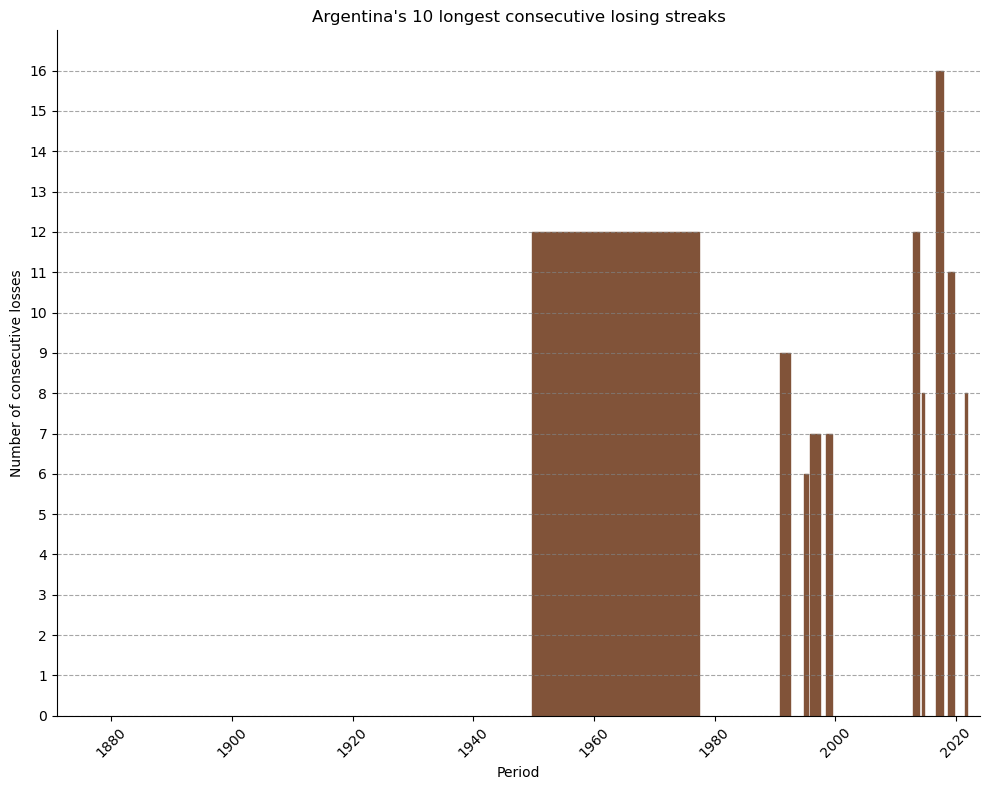

In [23]:
arg_loss_streaks = []

current_loss_streak_arg = 0
loss_begin_date_arg = None
loss_end_date_arg = None

for index, row in df.iterrows():
    if row['home_team'] == 'Argentina' or row['away_team'] == 'Argentina':
        if row['winner'] != 'Argentina' and row['winner'] != None:
            if current_loss_streak_arg == 0:
                loss_begin_date_arg = row['date']
            current_loss_streak_arg += 1
            loss_end_date_arg = row['date']
        else:
            if current_loss_streak_arg > 1:
                arg_loss_streaks.append({
                    'begin_date': loss_begin_date_arg,
                    'end_date': loss_end_date_arg,
                    'loss_streak': current_loss_streak_arg
                })
            current_loss_streak_arg = 0

            
sorted_arg_loss_streaks = sorted(arg_loss_streaks, key=lambda x: x['loss_streak'], reverse=True)

loss_table_data_arg = []
for i, loss_streak in enumerate(sorted_arg_loss_streaks[:10], start=1):
    loss_table_data_arg.append([i, loss_streak['loss_streak'], loss_streak['begin_date'].strftime('%Y-%m-%d'), loss_streak['end_date'].strftime('%Y-%m-%d')])

loss_table_arg = pd.DataFrame(loss_table_data_arg, columns=['Rank', 'Loss Streak', 'Begin Date', 'End Date'])
print(tabulate(loss_table_arg, headers='keys', tablefmt='grid', showindex=False))






loss_begin_arg = ['1949-08-28', '1990-10-27', '1994-10-08', '1995-10-21', '1998-06-13', '2012-11-17', '2014-06-07', '2016-09-10', '2018-09-29', '2021-07-17']
loss_end_arg = ['1977-06-25', '1992-07-11', '1995-06-04', '1997-05-31',  '1999-06-12', '2013-11-16', '2014-09-27', '2017-11-11', '2019-10-05', '2021-11-05']
loss_row_arg = [12, 9, 6, 7, 7, 12, 8, 16, 11, 8]

plt.figure(figsize=(10, 8))
for i in range(10):
    begin_loss_date = datetime.strptime(loss_begin_arg[i], '%Y-%m-%d')
    end_loss_date = datetime.strptime(loss_end_arg[i], '%Y-%m-%d')
    
    x_loss = np.array([begin_loss_date, end_loss_date])
    y_loss = np.array([loss_row_arg[i], loss_row_arg[i]])
    
    plt.fill_between(x_loss, 0, y_loss, color='#815339')
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive losses')
plt.title('Argentina\'s 10 longest consecutive losing streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))    
plt.ylim(0, max(loss_row_arg) + 1)
plt.yticks(range(max(loss_row_arg) + 1))
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe that between the 1950s and 1970s, Argentina faced significant challenges when competing against other nations. The 1990s also marked a difficult period for Argentina, characterized by numerous losses. Additionally, another challenging phase occurred between 2010 and 2021, reaching its peak with consecutive losses between 2016 and 2017.

As other teams gained strength and momentum, it became increasingly challenging for Argentina, a younger rugby nation, to establish itself and excel in the competitive rugby landscape.

&rarr; Argentina's largest losses against each team:

In [24]:
arg_largest_loss = {team: {'loss_difference': 0, 'home_score': 0, 'away_score': 0, 'stadium': None, 'date': None} for team in arg_opponent}

for index, row in df.iterrows():
    for team in arg_opponent:
        if row['home_team'] == team and row['away_team'] == 'Argentina':
            if row['winner'] != 'Argentina':
                loss_difference = abs(row['away_score'] - row['home_score'])
                if loss_difference > arg_largest_loss[team]['loss_difference']:
                    arg_largest_loss[team]['loss_difference'] = loss_difference
                    arg_largest_loss[team]['home_score'] = row['home_score']
                    arg_largest_loss[team]['away_score'] = row['away_score']
                    arg_largest_loss[team]['stadium'] = row['stadium']
                    arg_largest_loss[team]['date'] = row['date'].strftime('%Y-%m-%d')
        elif row['home_team'] == 'Argentina' and row['away_team'] == team:
            if row['winner'] != 'Argentina':
                loss_difference = abs(row['away_score'] - row['home_score'])
                if loss_difference > arg_largest_loss[team]['loss_difference']:
                    arg_largest_loss[team]['loss_difference'] = loss_difference
                    arg_largest_loss[team]['home_score'] = row['home_score']
                    arg_largest_loss[team]['away_score'] = row['away_score']
                    arg_largest_loss[team]['stadium'] = row['stadium']
                    arg_largest_loss[team]['date'] = row['date'].strftime('%Y-%m-%d')


for team in sorted(arg_largest_loss.keys()):
    data = arg_largest_loss[team]
    color = team_colors.get(team, 'black')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m"
          f"\033[1m\033[3m{team}\033[0m")
    print(f"Score Difference: {data['loss_difference']}")
    print(f"Home Score: {data['home_score']}")
    print(f"Away Score: {data['away_score']}")
    print(f"Stadium: {data['stadium']}")
    print(f"Date: {data['date']}")
    print("-" * 20)

Australia
Score Difference: 47
Home Score: 53
Away Score: 6
Stadium: Ballymore Stadium
Date: 2000-06-17
--------------------
England
Score Difference: 51
Home Score: 51
Away Score: 0
Stadium: Twickenham Stadium
Date: 1990-11-03
--------------------
France
Score Difference: 39
Home Score: 10
Away Score: 49
Stadium: Estadio José Fierro
Date: 2012-06-23
--------------------
Ireland
Score Difference: 46
Home Score: 53
Away Score: 7
Stadium: Aviva Stadium
Date: 2021-11-21
--------------------
Italy
Score Difference: 13
Home Score: 19
Away Score: 6
Stadium: Stadio Comunale Mario Battaglini
Date: 1978-10-24
--------------------
New Zealand
Score Difference: 85
Home Score: 93
Away Score: 8
Stadium: Athletic Park
Date: 1997-06-21
--------------------
Scotland
Score Difference: 46
Home Score: 49
Away Score: 3
Stadium: Murrayfield Stadium
Date: 1990-11-10
--------------------
South Africa
Score Difference: 60
Home Score: 73
Away Score: 13
Stadium: FNB Stadium
Date: 2013-08-17
--------------------

We can observe the most significant losses of Argentina (in terms of score difference) against each of the other teams. It is interesting to note that all of these losses occurred during the periods mentioned earlier.

<div align="center">
  <h3>3. Argentina's winning and losing periods</h3>
</div>

---

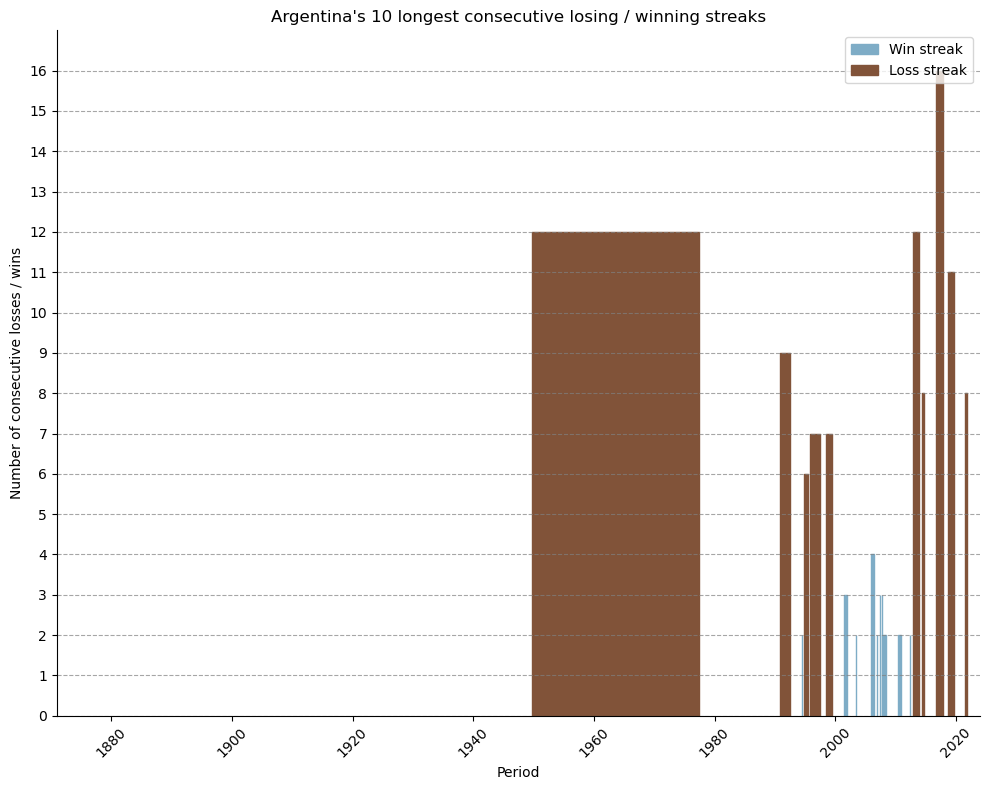

In [25]:
plt.figure(figsize=(10, 8))
for i in range(10):
    
    begin_win_date = datetime.strptime(win_begin_arg[i], '%Y-%m-%d')
    end_win_date = datetime.strptime(win_end_arg[i], '%Y-%m-%d')
    x_win = np.array([begin_win_date, end_win_date])
    y_win = np.array([win_row_arg[i], win_row_arg[i]])
    plt.fill_between(x_win, 0, y_win, color='#7EACC6')
    
    
    begin_loss_date = datetime.strptime(loss_begin_arg[i], '%Y-%m-%d')
    end_loss_date = datetime.strptime(loss_end_arg[i], '%Y-%m-%d')
    x_loss = np.array([begin_loss_date, end_loss_date])
    y_loss = np.array([loss_row_arg[i], loss_row_arg[i]])
    plt.fill_between(x_loss, 0, y_loss, color='#815339')
    
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive losses / wins')
plt.title('Argentina\'s 10 longest consecutive losing / winning streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))  
plt.ylim(0, max(loss_row_arg) + 1)
plt.yticks(range(max(loss_row_arg) + 1))
plt.tight_layout()
plt.legend(['Win streak', 'Loss streak'])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe in this summary diagram the periods of both winning and losing streaks for the Argentina national rugby team. The diagram highlights a clear improvement over the years: initially, there were no winning streaks at all, only losing streaks until the 2000s. However, we observe that the team faced a crisis during the 2010s after experiencing a great period of winning streaks during the 2000s.

Furthermore, we can see that the number of consecutive losses is much more substantial than the number of consecutive wins.

<div align="center">
  <h3>Conclusion</h3>
</div>

---

In conclusion, the evolution of the Argentine national rugby team's performance against the top 10 teams in the world reveals a story of progress, challenges, and determination. Despite the relatively low number of matches played against Argentina, their journey reflects the trajectory of a young rugby nation striving to establish its presence on the international stage.

Argentina's win rates consistently fall below 35%, with particularly daunting odds against powerhouses like the All Blacks and Springboks, where their win rates drop to single digits. This trend is expected given Argentina's status as a developing rugby nation. Notably, Italy shares a similar situation, whereas Scotland's struggles against Argentina are intriguing for a well-established team.

The overall win ratio since the last World Cup stands at 28.57%, influenced by a 0% win rate against four teams. While Argentina's performance has improved against certain opponents, South Africa and Wales pose significant challenges.

Argentina's longest win streaks all occurred after the 1990s, showcasing their development in the face of formidable adversaries. Their ability to achieve significant victories against every team, even the All Blacks, speaks volumes about their determination and progress. Notably, the tight matches against Scotland demonstrate a competitive spirit.

Throughout history, Argentina faced challenges in different eras, notably during the 1950s-1970s, the 1990s, and the period between 2010 and 2021. As other teams gained strength, Argentina navigated through peaks and valleys, striving to solidify their presence in the competitive rugby landscape.

The summarized diagrams illustrate periods of both winning and losing streaks, underscoring the team's journey. A positive trajectory emerged, punctuated by a challenging spell in the 2010s. Despite facing obstacles, Argentina's commitment to improvement remains evident, and their evolution continues to contribute to the rich tapestry of international rugby.

<div align="center">
  <h2>IV. Historical Analysis of <i> the Wallabies </i> </h2>
</div>

Here is a more precise analysis of the data for Australia.




<img src="img/Logo_Wallabies.svg" alt="Logo Australia" style="width: 30%;">

<div align="center">
  <h3>1. Triumphs insights</h3>
</div>

---

&rarr; Australia's win rate against each team:

Number of official matches against Australia for each team:
Argentina: 38 matches
England: 55 matches
France: 50 matches
Ireland: 36 matches
Italy: 18 matches
New Zealand: 173 matches
Scotland: 33 matches
South Africa: 92 matches
Wales: 44 matches


Number of wins for Australia against each team:
Argentina: 28 wins
England: 26 wins
France: 29 wins
Ireland: 22 wins
Italy: 18 wins
New Zealand: 44 wins
Scotland: 21 wins
South Africa: 40 wins
Wales: 30 wins


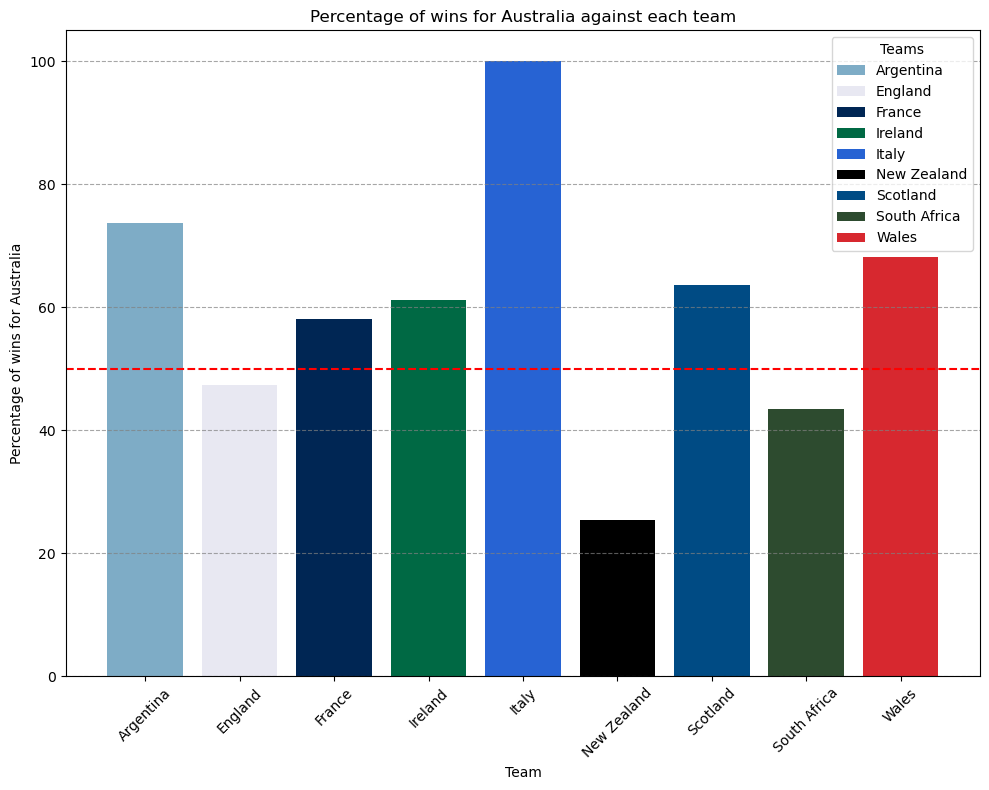

In [26]:
au_opponent = {
    'Argentina',
    'England',
    'France',
    'Ireland',
    'Italy',
    'New Zealand',
    'Scotland',
    'South Africa',
    'Wales'
}

au_match = {team: 0 for team in au_opponent}
au_win = {team: 0 for team in au_opponent}
au_ratio = {}

for index, row in df.iterrows():
    for team in au_opponent:
        if row['home_team'] == team and row['away_team'] == 'Australia':
            au_match[team] += 1
            if row['winner'] == 'Australia':
                au_win[team] += 1
        elif row['home_team'] == 'Australia' and row['away_team'] == team:
            au_match[team] += 1
            if row['winner'] == 'Australia':
                au_win[team] += 1
              

for team in au_win:
    ratio = (au_win[team] / au_match[team]) * 100 if au_match[team] > 0 else 0
    au_ratio[team] = ratio


print("\033[1mNumber of official matches against Australia for each team:\033[0m")
for team, matches in dict(sorted(au_match.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {matches} matches\033[0m")


print("\n")

print("\033[1mNumber of wins for Australia against each team:\033[0m")
for team, wins in dict(sorted(au_win.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {wins} wins\033[0m")    


plt.figure(figsize=(10, 8))
for team in sorted(au_opponent):
    plt.bar(team, dict(sorted(au_ratio.items()))[team], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins for Australia')
plt.title('Percentage of wins for Australia against each team')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()


We observe that the number of matches against New Zealand logically surpasses those against other teams. This can be attributed to their proximity as neighboring nations, making it more feasible to arrange matches, particularly in the earlier years when travel distances were more extensive than today. The number of matches against South Africa, just shy of a hundred, is also impressive compared to other teams. This can be partly attributed to the fact that Australia, New Zealand, South Africa, and more recently Argentina are part of an annual tournament, <i>The Rugby Championship</i>.

Furthermore, Australia's win rate is consistently above 50% against the majority of the teams, showcasing the strength of this nation over the years.

It's also interesting to note that Australia faces slightly more challenges when playing against England and South Africa. Of course, the inevitable All Blacks give the Australians a formidable competition, with only 44 wins for Australia compared to 131 losses against New Zealand.

It's worth mentioning that these win rates are calculated based on data spanning from 1871 to the present day. To capture the most up-to-date trends, focusing on win rates over recent years would provide a more accurate reflection of current team dynamics.

&rarr; Australia's win rate against each team since the last World Cup (2019):

Number of official matches against Australia since 2019 for each team:
Argentina: 6 matches
England: 4 matches
France: 3 matches
Ireland: 0 matches
Italy: 0 matches
New Zealand: 7 matches
Scotland: 1 matches
South Africa: 4 matches
Wales: 1 matches


Number of wins for Australia against each team:
Argentina: 3 wins
England: 1 wins
France: 2 wins
Ireland: 0 wins
Italy: 0 wins
New Zealand: 1 wins
Scotland: 0 wins
South Africa: 2 wins
Wales: 0 wins

Global win rate for Australia since the last WC: 34.62%


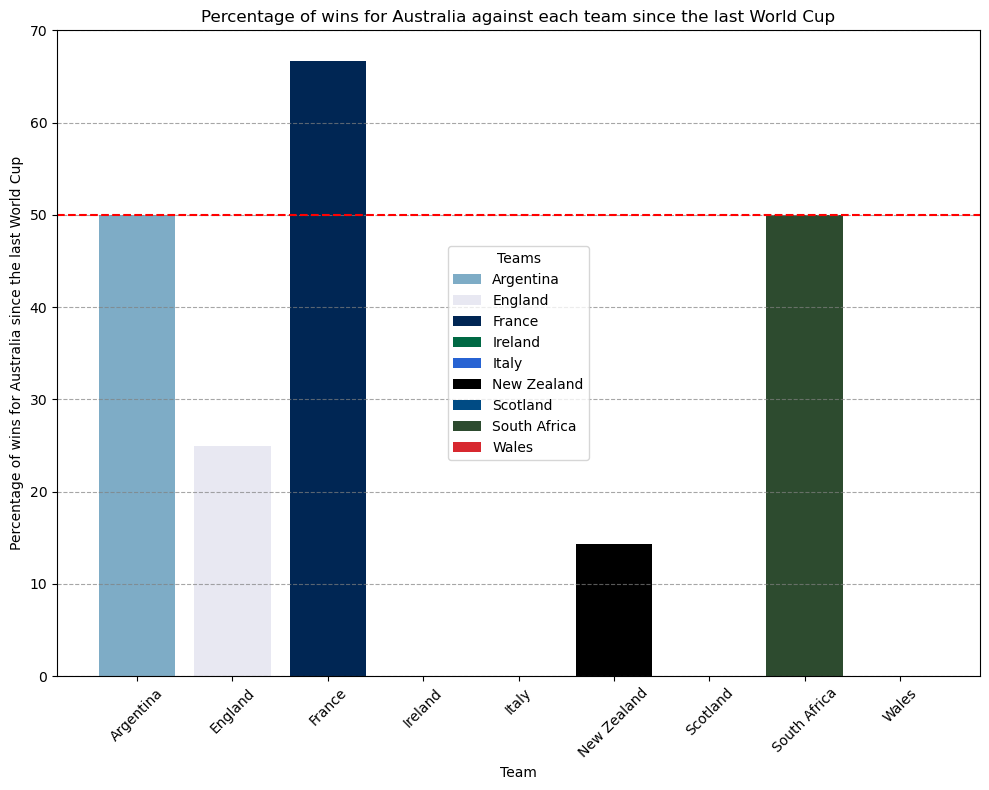

In [27]:
au_match_2020 = {team: 0 for team in au_opponent}
au_win_2020 = {team: 0 for team in au_opponent}
au_ratio_2020 = {}

for index, row in df.iterrows():
    if row['year'] >= 2020:
        for team in au_opponent:
            if row['home_team'] == team and row['away_team'] == 'Australia':
                au_match_2020[team] += 1
                if row['winner'] == 'Australia':
                    au_win_2020[team] += 1
            elif row['home_team'] == 'Australia' and row['away_team'] == team:
                au_match_2020[team] += 1
                if row['winner'] == 'Australia':
                    au_win_2020[team] += 1

for team in au_win_2020:
    ratio = (au_win_2020[team] / au_match_2020[team]) * 100 if au_match_2020[team] > 0 else 0
    au_ratio_2020[team] = ratio

total_au_win_2020 = sum(au_win_2020.values())
total_au_match_2020 = sum(au_match_2020.values())



print("\033[1mNumber of official matches against Australia since 2019 for each team:\033[0m")
for team, matches in dict(sorted(au_match_2020.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {matches} matches\033[0m")


print("\n")

print("\033[1mNumber of wins for Australia against each team:\033[0m")
for team, wins in dict(sorted(au_win_2020.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {wins} wins\033[0m")

global_win_rate_au_2020 = (total_au_win_2020 / total_au_match_2020) * 100
print("\nGlobal win rate for Australia since the last WC: {:.2f}%".format(global_win_rate_au_2020))



plt.figure(figsize=(10, 8))
for team in sorted(au_opponent):
    plt.bar(team, au_ratio_2020[team], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins for Australia since the last World Cup')
plt.title('Percentage of wins for Australia against each team since the last World Cup')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()


We can observe that since 2019, Australia's overall win rate has notably declined compared to its historical standards, standing at just 34.29%. Apart from matches against South Africa, Australia's win rate has seen significant drops against all other teams. Notably, Australia even suffered a loss against Italy, which is unusual for the Australian team. 

&rarr; Australia's longest winning streaks:

+--------+--------------+--------------+------------+
|   Rank |   Win Streak | Begin Date   | End Date   |
+========+==============+==============+============+
|      1 |            9 | 1991-10-04   | 1992-07-19 |
+--------+--------------+--------------+------------+
|      2 |            9 | 1993-11-06   | 1995-05-25 |
+--------+--------------+--------------+------------+
|      3 |            8 | 1999-08-28   | 2000-07-08 |
+--------+--------------+--------------+------------+
|      4 |            7 | 1998-08-29   | 1999-07-17 |
+--------+--------------+--------------+------------+
|      5 |            7 | 2013-11-09   | 2014-06-21 |
+--------+--------------+--------------+------------+
|      6 |            6 | 1996-10-23   | 1997-06-28 |
+--------+--------------+--------------+------------+
|      7 |            5 | 1986-06-01   | 1986-08-09 |
+--------+--------------+--------------+------------+
|      8 |            5 | 1997-11-22   | 1998-07-11 |
+--------+--------------+---

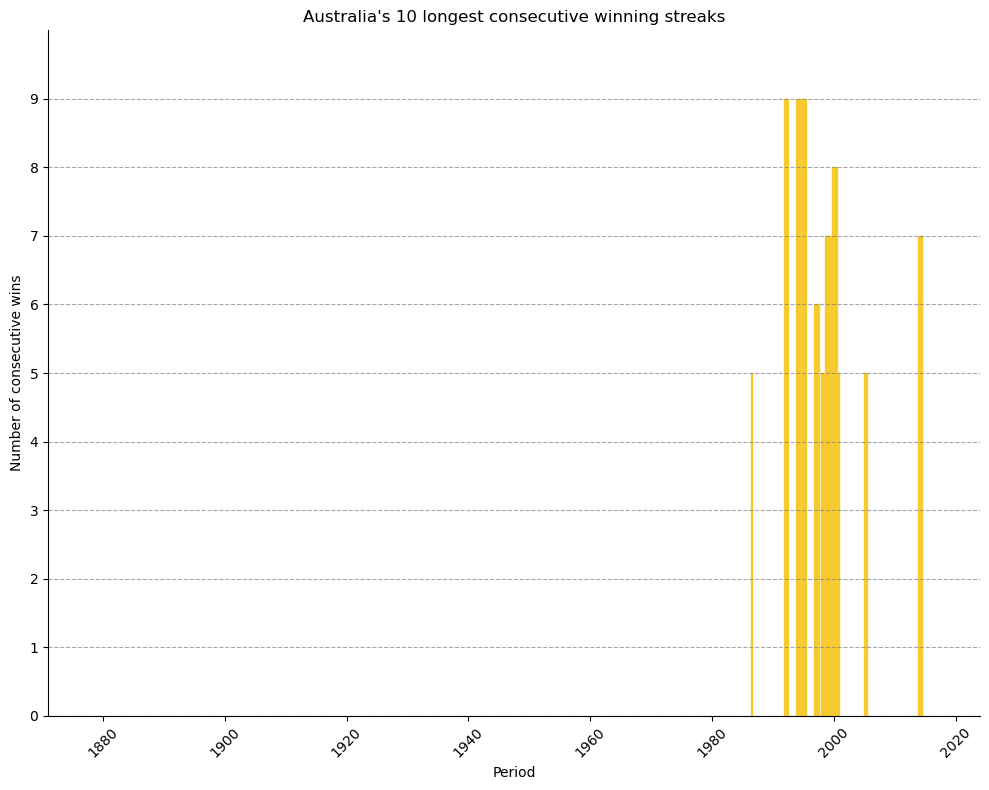

In [28]:
au_win_streaks = []

current_win_streak_au = 0
win_begin_date_au = None
win_end_date_au = None

for index, row in df.iterrows():
    if row['home_team'] == 'Australia' or row['away_team'] == 'Australia':
        if row['winner'] == 'Australia':
            if current_win_streak_au == 0:
                win_begin_date_au = row['date']
            current_win_streak_au += 1
            win_end_date_au = row['date']
        else:
            if current_win_streak_au > 1:
                au_win_streaks.append({
                    'begin_date': win_begin_date_au,
                    'end_date': win_end_date_au,
                    'wins_streak': current_win_streak_au
                })
            current_win_streak_au = 0

sorted_au_win_streaks = sorted(au_win_streaks, key=lambda x: x['wins_streak'], reverse=True)

win_table_data_au = []
for i, win_streak in enumerate(sorted_au_win_streaks[:10], start=1):
    win_table_data_au.append([i, win_streak['wins_streak'], win_streak['begin_date'].strftime('%Y-%m-%d'), win_streak['end_date'].strftime('%Y-%m-%d')])

win_table_au = pd.DataFrame(win_table_data_au, columns=['Rank', 'Win Streak', 'Begin Date', 'End Date'])
print(tabulate(win_table_au, headers='keys', tablefmt='grid', showindex=False))





win_begin_au = ['1986-06-01', '1991-10-04', '1993-11-06', '1996-10-23', '1997-11-22','1998-07-11', '1999-08-28', '2000-07-29',  '2004-11-20', '2013-11-09']
win_end_au = ['1986-08-09', '1992-07-19', '1995-05-25', '1997-06-28', '1998-07-11', '1999-07-17', '2000-07-08', '2000-11-11', '2005-07-09', '2014-06-21']
win_row_au = [5, 9, 9, 6, 5, 7, 8, 5, 5, 7]

plt.figure(figsize=(10, 8))
for i in range(10):
    begin_win_date = datetime.strptime(win_begin_au[i], '%Y-%m-%d')
    end_win_date = datetime.strptime(win_end_au[i], '%Y-%m-%d')
    
    x_win = np.array([begin_win_date, end_win_date])
    y_win = np.array([win_row_au[i], win_row_au[i]])
    
    plt.fill_between(x_win, 0, y_win, color='#F7CA2F')
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive wins')
plt.title('Australia\'s 10 longest consecutive winning streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))  
plt.ylim(0, max(win_row_au) + 1)
plt.yticks(range(max(win_row_au) + 1))
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


We can observe the longest winning streaks of Australia, all of which took place after 1985. Despite being considered an established rugby nation, Australia took time to establish dominance over other teams. Throughout the 1990s and early 2000s, Australia demonstrated its stature as a prominent rugby nation. This era marked the Wallabies' victory in the World Cup, clinching the title in 1991 and 1999. Additionally, Australia secured triumphs in the <i> Tri-Nations </i> (now known as the Rugby Championship before Argentina joined the tournament) three times, specifically in 2000, 2001, and 2011.

&rarr; Australia's largest wins against each team:

In [29]:
au_largest_win = {team: {'win_difference': 0, 'home_score': 0, 'away_score': 0, 'stadium': None, 'date': None} for team in au_opponent}

for index, row in df.iterrows():
    for team in au_opponent:
        if row['home_team'] == team and row['away_team'] == 'Australia':
            if row['winner'] == 'Australia':
                win_difference = abs(row['away_score'] - row['home_score'])
                if win_difference > au_largest_win[team]['win_difference']:
                    au_largest_win[team]['win_difference'] = win_difference
                    au_largest_win[team]['home_score'] = row['home_score']
                    au_largest_win[team]['away_score'] = row['away_score']
                    au_largest_win[team]['stadium'] = row['stadium']
                    au_largest_win[team]['date'] = row['date'].strftime('%Y-%m-%d')
        elif row['home_team'] == 'Australia' and row['away_team'] == team:
            if row['winner'] == 'Australia':
                win_difference = abs(row['away_score'] - row['home_score'])
                if win_difference > au_largest_win[team]['win_difference']:
                    au_largest_win[team]['win_difference'] = win_difference
                    au_largest_win[team]['home_score'] = row['home_score']
                    au_largest_win[team]['away_score'] = row['away_score']
                    au_largest_win[team]['stadium'] = row['stadium']
                    au_largest_win[team]['date'] = row['date'].strftime('%Y-%m-%d')

                    
for team in sorted(au_largest_win.keys()):
    data = au_largest_win[team]
    color = team_colors.get(team, 'black')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m"
          f"\033[1m\033[3m{team}\033[0m")
    print(f"Score Difference: {data['win_difference']}")
    print(f"Home Score: {data['home_score']}")
    print(f"Away Score: {data['away_score']}")
    print(f"Stadium: {data['stadium']}")
    print(f"Date: {data['date']}")
    print("-" * 20)

Argentina
Score Difference: 47
Home Score: 53
Away Score: 6
Stadium: Ballymore Stadium
Date: 2000-06-17
--------------------
England
Score Difference: 76
Home Score: 76
Away Score: 0
Stadium: Lang Park
Date: 1998-06-06
--------------------
France
Score Difference: 43
Home Score: 16
Away Score: 59
Stadium: Stade de France
Date: 2010-11-27
--------------------
Ireland
Score Difference: 36
Home Score: 46
Away Score: 10
Stadium: Ballymore Stadium
Date: 1999-06-12
--------------------
Italy
Score Difference: 49
Home Score: 6
Away Score: 55
Stadium: Stadio Flaminio
Date: 1988-12-03
--------------------
New Zealand
Score Difference: 21
Home Score: 28
Away Score: 7
Stadium: Stadium Australia
Date: 1999-08-28
--------------------
Scotland
Score Difference: 42
Home Score: 45
Away Score: 3
Stadium: Sydney Football Stadium
Date: 1998-06-13
--------------------
South Africa
Score Difference: 49
Home Score: 49
Away Score: 0
Stadium: Lang Park
Date: 2006-07-15
--------------------
Wales
Score Differe

We can observe the most significant victories of Australia (in terms of score difference) against each of the other teams. All of these glorious victories for Australia occurred during the golden era of Australian rugby, spanning from the 1990s to the early 2000s.

<div align="center">
  <h3>2. Debacles insights</h3>
</div>

---

&rarr; Australia's longest losing streaks:

+--------+---------------+--------------+------------+
|   Rank |   Loss Streak | Begin Date   | End Date   |
+========+===============+==============+============+
|      1 |            11 | 1936-09-05   | 1947-06-28 |
+--------+---------------+--------------+------------+
|      2 |            10 | 1956-05-26   | 1958-08-23 |
+--------+---------------+--------------+------------+
|      3 |             7 | 1968-10-26   | 1969-09-20 |
+--------+---------------+--------------+------------+
|      4 |             7 | 1972-06-25   | 1974-05-25 |
+--------+---------------+--------------+------------+
|      5 |             7 | 2005-07-23   | 2005-11-12 |
+--------+---------------+--------------+------------+
|      6 |             6 | 1958-09-20   | 1962-06-04 |
+--------+---------------+--------------+------------+
|      7 |             6 | 1967-01-21   | 1968-06-22 |
+--------+---------------+--------------+------------+
|      8 |             6 | 2015-10-31   | 2016-08-27 |
+--------+

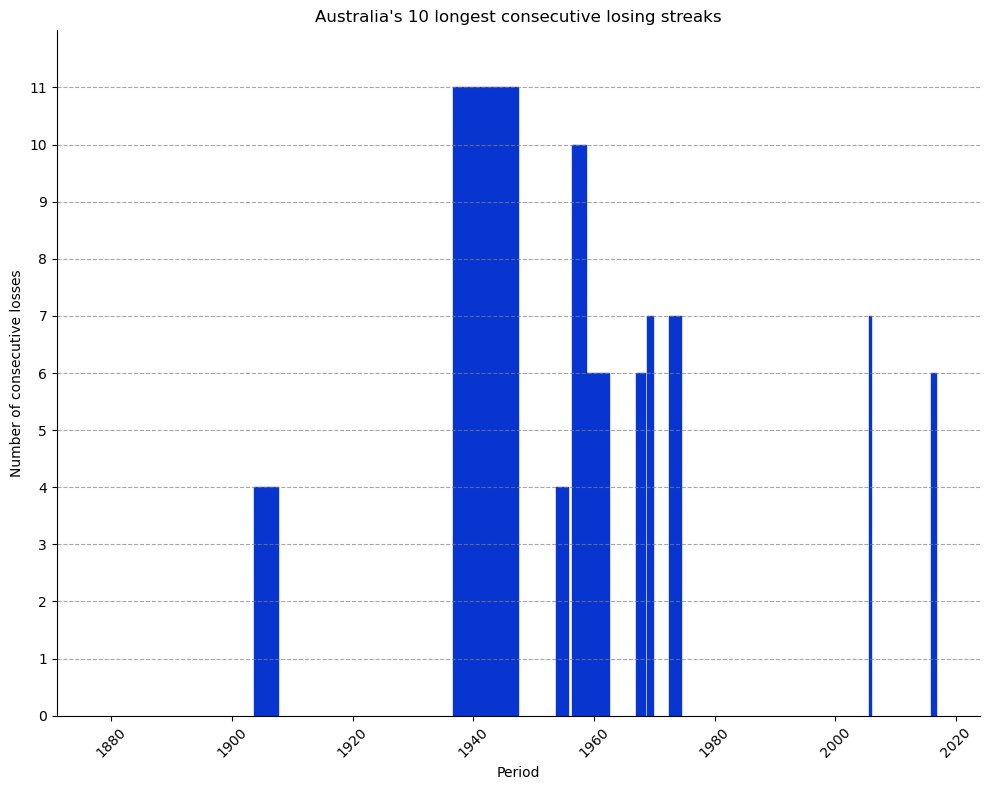

In [30]:
au_loss_streaks = []

current_loss_streak_au = 0
loss_begin_date_au = None
loss_end_date_au = None

for index, row in df.iterrows():
    if row['home_team'] == 'Australia' or row['away_team'] == 'Australia':
        if row['winner'] != 'Australia' and row['winner'] != None:
            if current_loss_streak_au == 0:
                loss_begin_date_au = row['date']
            current_loss_streak_au += 1
            loss_end_date_au = row['date']
        else:
            if current_loss_streak_au > 1:
                au_loss_streaks.append({
                    'begin_date': loss_begin_date_au,
                    'end_date': loss_end_date_au,
                    'loss_streak': current_loss_streak_au
                })
            current_loss_streak_au = 0

            
sorted_au_loss_streaks = sorted(au_loss_streaks, key=lambda x: x['loss_streak'], reverse=True)

loss_table_data_au = []
for i, loss_streak in enumerate(sorted_au_loss_streaks[:10], start=1):
    loss_table_data_au.append([i, loss_streak['loss_streak'], loss_streak['begin_date'].strftime('%Y-%m-%d'), loss_streak['end_date'].strftime('%Y-%m-%d')])

loss_table_au = pd.DataFrame(loss_table_data_au, columns=['Rank', 'Loss Streak', 'Begin Date', 'End Date'])
print(tabulate(loss_table_au, headers='keys', tablefmt='grid', showindex=False))






loss_begin_au = ['1903-08-15', '1936-09-05', '1953-09-19', '1956-05-26', '1958-09-20', '1967-01-21', '1968-10-26', '1972-06-25', '2005-07-23', '2015-10-31']
loss_end_au = ['1907-08-03', '1947-06-28', '1955-09-03', '1958-08-23',  '1962-06-04', '1968-06-22', '1969-09-20', '1974-05-25', '2005-11-12', '2016-08-27']
loss_row_au = [4, 11, 4, 10, 6, 6, 7, 7, 7, 6]

plt.figure(figsize=(10, 8))
for i in range(10):
    begin_loss_date = datetime.strptime(loss_begin_au[i], '%Y-%m-%d')
    end_loss_date = datetime.strptime(loss_end_au[i], '%Y-%m-%d')
    
    x_loss = np.array([begin_loss_date, end_loss_date])
    y_loss = np.array([loss_row_au[i], loss_row_au[i]])
    
    plt.fill_between(x_loss, 0, y_loss, color='#0835d0')
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive losses')
plt.title('Australia\'s 10 longest consecutive losing streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))    
plt.ylim(0, max(loss_row_au) + 1)
plt.yticks(range(max(loss_row_au) + 1))
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe the longest losing streaks of Australia. The Wallabies experienced a significant number of losses during the era spanning from the 1930s to the 1970s. During this period, although Australia was actively participating in rugby matches, it was not yet considered a major rugby nation and faced numerous defeats.

&rarr; Australia's largest losses against each team:

In [31]:
au_largest_loss = {team: {'loss_difference': 0, 'home_score': 0, 'away_score': 0, 'stadium': None, 'date': None} for team in au_opponent}

for index, row in df.iterrows():
    for team in au_opponent:
        if row['home_team'] == team and row['away_team'] == 'Australia':
            if row['winner'] != 'Australia':
                loss_difference = abs(row['away_score'] - row['home_score'])
                if loss_difference > au_largest_loss[team]['loss_difference']:
                    au_largest_loss[team]['loss_difference'] = loss_difference
                    au_largest_loss[team]['home_score'] = row['home_score']
                    au_largest_loss[team]['away_score'] = row['away_score']
                    au_largest_loss[team]['stadium'] = row['stadium']
                    au_largest_loss[team]['date'] = row['date'].strftime('%Y-%m-%d')
        elif row['home_team'] == 'Australia' and row['away_team'] == team:
            if row['winner'] != 'Australia':
                loss_difference = abs(row['away_score'] - row['home_score'])
                if loss_difference > au_largest_loss[team]['loss_difference']:
                    au_largest_loss[team]['loss_difference'] = loss_difference
                    au_largest_loss[team]['home_score'] = row['home_score']
                    au_largest_loss[team]['away_score'] = row['away_score']
                    au_largest_loss[team]['stadium'] = row['stadium']
                    au_largest_loss[team]['date'] = row['date'].strftime('%Y-%m-%d')


for team in sorted(au_largest_loss.keys()):
    data = au_largest_loss[team]
    color = team_colors.get(team, 'black')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m"
          f"\033[1m\033[3m{team}\033[0m")
    print(f"Score Difference: {data['loss_difference']}")
    print(f"Home Score: {data['home_score']}")
    print(f"Away Score: {data['away_score']}")
    print(f"Stadium: {data['stadium']}")
    print(f"Date: {data['date']}")
    print("-" * 20)

Argentina
Score Difference: 31
Home Score: 48
Away Score: 17
Stadium: Estadio San Juan del Bicentenario
Date: 2022-08-13
--------------------
England
Score Difference: 24
Home Score: 30
Away Score: 6
Stadium: Twickenham Stadium
Date: 2017-11-18
--------------------
France
Score Difference: 28
Home Score: 34
Away Score: 6
Stadium: Parc des Princes
Date: 1976-10-30
--------------------
Ireland
Score Difference: 15
Home Score: 12
Away Score: 27
Stadium: Ballymore Stadium
Date: 1979-06-03
--------------------
Italy
Score Difference: 0
Home Score: 0
Away Score: 0
Stadium: None
Date: None
--------------------
New Zealand
Score Difference: 38
Home Score: 5
Away Score: 43
Stadium: Stadium Australia
Date: 2020-10-31
--------------------
Scotland
Score Difference: 29
Home Score: 53
Away Score: 24
Stadium: Murrayfield Stadium
Date: 2017-11-25
--------------------
South Africa
Score Difference: 45
Home Score: 53
Away Score: 8
Stadium: Ellis Park Stadium
Date: 2008-08-30
--------------------
Wales


We can observe the most significant losses of Australia (in terms of score difference) against each of the other teams. It is interesting to note that some of these losses occurred during the 1970s, a challenging period for Australia as discussed earlier. Additionally, we can see that Australia has experienced substantial defeats between 2017 and the present day, indicating a challenging phase for the Wallabies in recent times.

<div align="center">
  <h3>3. Australia's winning and losing periods</h3>
</div>

---

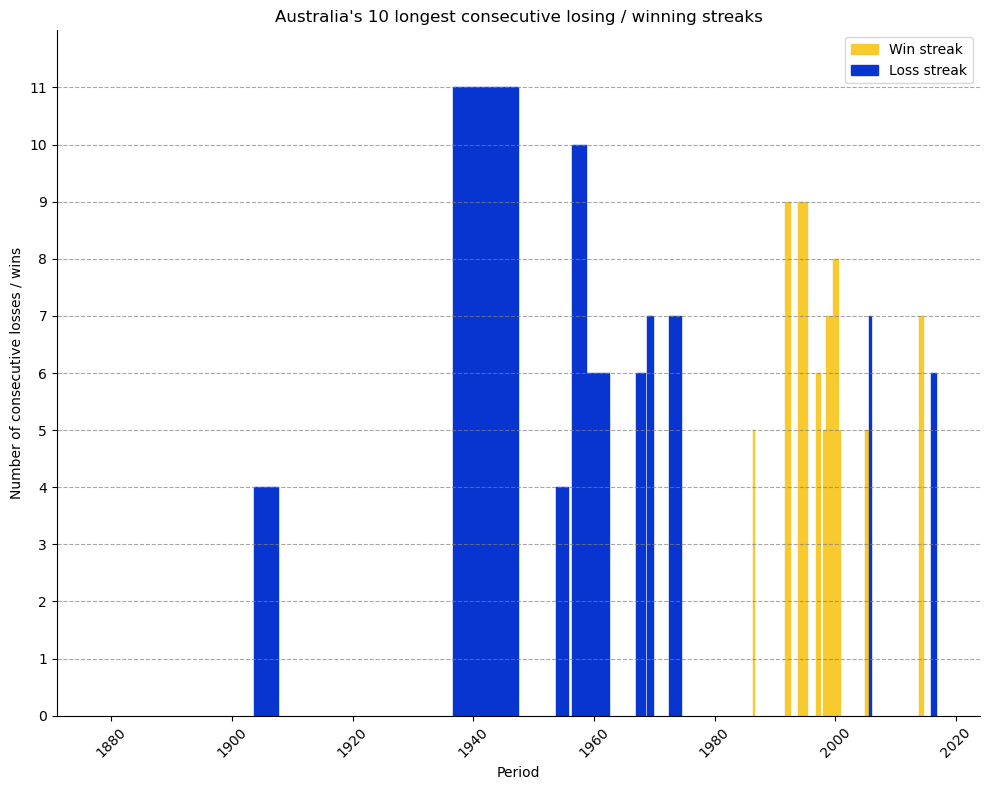

In [32]:
plt.figure(figsize=(10, 8))
for i in range(10):
    
    begin_win_date = datetime.strptime(win_begin_au[i], '%Y-%m-%d')
    end_win_date = datetime.strptime(win_end_au[i], '%Y-%m-%d')
    x_win = np.array([begin_win_date, end_win_date])
    y_win = np.array([win_row_au[i], win_row_au[i]])
    plt.fill_between(x_win, 0, y_win, color='#F7CA2F')
    
    
    begin_loss_date = datetime.strptime(loss_begin_au[i], '%Y-%m-%d')
    end_loss_date = datetime.strptime(loss_end_au[i], '%Y-%m-%d')
    x_loss = np.array([begin_loss_date, end_loss_date])
    y_loss = np.array([loss_row_au[i], loss_row_au[i]])
    plt.fill_between(x_loss, 0, y_loss, color='#0835d0')
    
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive losses / wins')
plt.title('Australia\'s 10 longest consecutive losing / winning streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))  
plt.ylim(0, max(loss_row_au) + 1)
plt.yticks(range(max(loss_row_au) + 1))
plt.tight_layout()
plt.legend(['Win streak', 'Loss streak'])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe that Australia went through challenging times between the 1930s and the 1970s before experiencing a glorious period in the 1990s and early 2000s. However, the numerous losses from the past have been overshadowed by Australia's transformation into an established and formidable nation in World Rugby, feared by its opponents.

<div align="center">
  <h3>Conclusion</h3>
</div>

---

In conclusion, the evolution of Australia's national rugby team in terms of victories and defeats against the top 10 teams worldwide is a journey marked by distinct phases and remarkable achievements. The analysis of their match history unveils intriguing insights into their performance.

The prominence of matches against New Zealand and South Africa is evident, driven by geographic proximity and annual tournaments like The Rugby Championship. This proximity facilitated arranging matches, particularly in the early years when travel distances were greater.

Australia's consistent win rate of over 50% against most teams underscores its enduring strength. However, challenges arise against formidable opponents like England, South Africa, and the indomitable All Blacks.

Recent trends show Australia's win rate declining since 2019, standing at 34.29%. Matches against various teams have seen drops in win rates, with even unexpected losses against Italy. This serves as a reminder that the dynamics of international rugby continue to evolve, as the team experienced substantial defeats from 2017 onwards.

The longest winning streaks reflect Australia's ascent since 1985, culminating in the golden era of the 1990s and early 2000s. During this period, Australia displayed its prowess, clinching the World Cup in 1991 and 1999, along with multiple victories in the Tri-Nations.

Significant victories against other teams were achieved during this golden era, testifying to Australia's dominance. Conversely, the longest losing streaks during the 1930s to 1970s signify a developmental phase when Australia faced formidable challenges and growing pains. The most significant losses against other teams reveal Australia's struggles during the 1970s.

In essence, Australia's rugby journey encapsulates challenges and triumphs that have shaped its status as an established force in the rugby world. From periods of adversity to glorious victories, Australia's transformation highlights the dynamism of international rugby and the enduring pursuit of excellence.

<div align="center">
  <h2>IV. Historical Analysis of <i> the Red and Whites </i> </h2>
</div>

Here is a more precise analysis of the data for England.




<img src="img/Logo_Rugby_Football_Union.svg" alt="Logo England" style="width: 20%;">

<div align="center">
  <h3>1. Triumphs insights</h3>
</div>

---

&rarr; England's win rate against each team:

Number of official matches against England for each team:
Argentina: 24 matches
Australia: 55 matches
France: 109 matches
Ireland: 139 matches
Italy: 29 matches
New Zealand: 42 matches
Scotland: 140 matches
South Africa: 44 matches
Wales: 138 matches


Number of wins for England against each team:
Argentina: 19 wins
Australia: 28 wins
France: 60 wins
Ireland: 80 wins
Italy: 29 wins
New Zealand: 8 wins
Scotland: 76 wins
South Africa: 16 wins
Wales: 67 wins


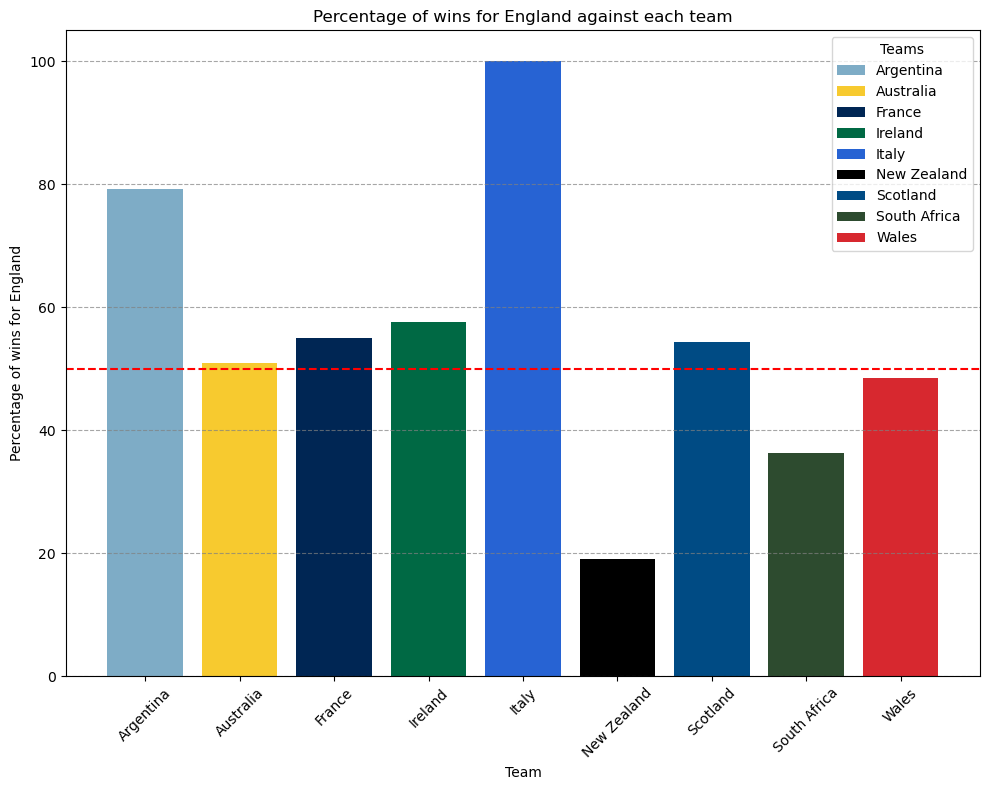

In [33]:
en_opponent = {
    'Argentina',
    'Australia',
    'France',
    'Ireland',
    'Italy',
    'New Zealand',
    'Scotland',
    'South Africa',
    'Wales'
}

en_match = {team: 0 for team in en_opponent}
en_win = {team: 0 for team in en_opponent}
en_ratio = {}

for index, row in df.iterrows():
    for team in en_opponent:
        if row['home_team'] == team and row['away_team'] == 'England':
            en_match[team] += 1
            if row['winner'] == 'England':
                en_win[team] += 1
        elif row['home_team'] == 'England' and row['away_team'] == team:
            en_match[team] += 1
            if row['winner'] == 'England':
                en_win[team] += 1
              

for team in en_win:
    ratio = (en_win[team] / en_match[team]) * 100 if en_match[team] > 0 else 0
    en_ratio[team] = ratio


print("\033[1mNumber of official matches against England for each team:\033[0m")
for team, matches in dict(sorted(en_match.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {matches} matches\033[0m")


print("\n")

print("\033[1mNumber of wins for England against each team:\033[0m")
for team, wins in dict(sorted(en_win.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {wins} wins\033[0m")    


plt.figure(figsize=(10, 8))
for team in sorted(en_opponent):
    plt.bar(team, dict(sorted(en_ratio.items()))[team], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins for England')
plt.title('Percentage of wins for England against each team')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()


We can observe that the number of matches against British teams and France logically surpasses those against other teams (approximately 140 to approximately 50). This can be attributed to their proximity as neighboring nations, making it more feasible to arrange matches, particularly in the earlier years when travel distances were more extensive than today. Additionally, considering that the origins of rugby lie in the British Isles, it's only fitting that most matches originated there. Also, the tournaments organized between these nations, like the 4 and 5 Nations, have contributed to the higher number of matches.

Furthermore, a clear trend emerges in the win rates against various teams. Notably, the win rate against Argentina and Italy stands out as notably high. It is worth to notice that England has always won against Italy. The win rates against Australia, France, Ireland, and Scotland are just above the 50% mark, indicating a favorable performance. However, the win rates against other formidable teams like New Zealand, South Africa, and Wales fall below the 50% threshold, dropping even under 20% against New Zealand. This reflects the consistent strength of the teams that pioneered rugby through the years, even if they faced greater challenges against New Zealand and South Africa.

It's worth mentioning that these win rates are calculated based on data spanning from 1871 to the present day. To capture the most up-to-date trends, focusing on win rates over recent years would provide a more accurate reflection of current team dynamics.

&rarr; England's win rate against each team since the last World Cup (2019):

Number of matches against England for each team:
Argentina: 0 matches
Australia: 4 matches
France: 4 matches
Ireland: 4 matches
Italy: 3 matches
New Zealand: 0 matches
Scotland: 3 matches
South Africa: 1 matches
Wales: 4 matches


Number of wins for England against each team:
Argentina: 0 wins
Australia: 3 wins
France: 2 wins
Ireland: 2 wins
Italy: 3 wins
New Zealand: 0 wins
Scotland: 1 wins
South Africa: 1 wins
Wales: 3 wins

Global win rate for England since the last WC: 65.22%


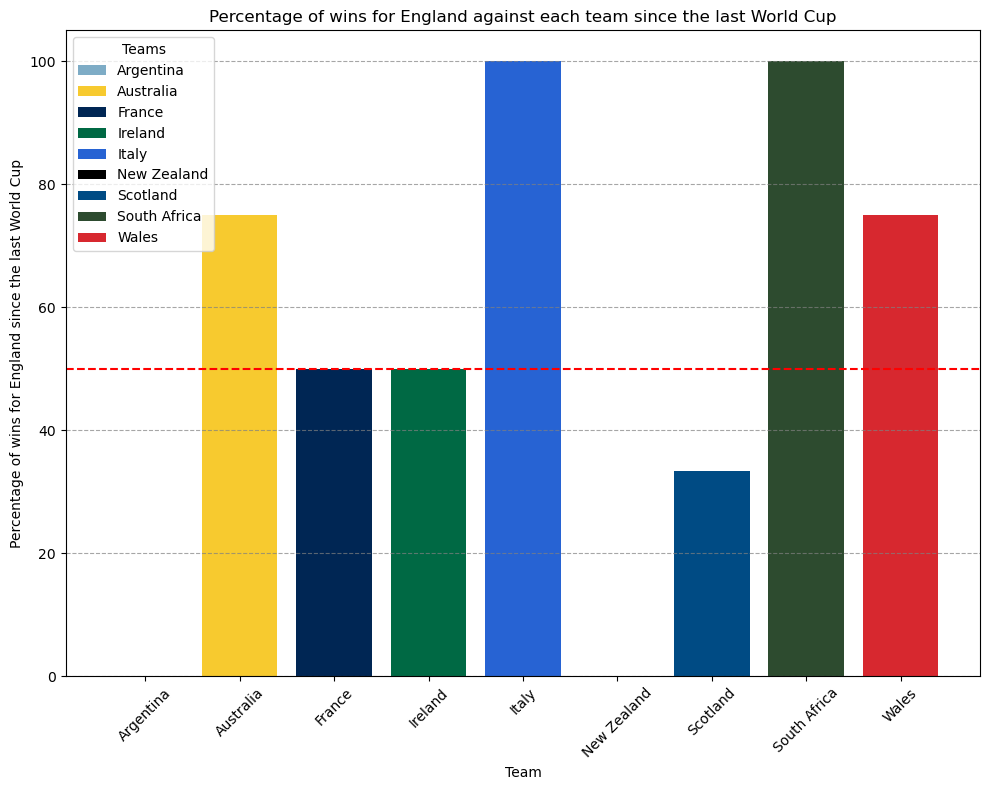

In [34]:
en_match_2020 = {team: 0 for team in en_opponent}
en_win_2020 = {team: 0 for team in en_opponent}
en_ratio_2020 = {}

for index, row in df.iterrows():
    if row['year'] >= 2020:
        for team in en_opponent:
            if row['home_team'] == team and row['away_team'] == 'England':
                en_match_2020[team] += 1
                if row['winner'] == 'England':
                    en_win_2020[team] += 1
            elif row['home_team'] == 'England' and row['away_team'] == team:
                en_match_2020[team] += 1
                if row['winner'] == 'England':
                    en_win_2020[team] += 1

for team in en_win_2020:
    ratio = (en_win_2020[team] / en_match_2020[team]) * 100 if en_match_2020[team] > 0 else 0
    en_ratio_2020[team] = ratio

total_en_win_2020 = sum(en_win_2020.values())
total_en_match_2020 = sum(en_match_2020.values())



print("\033[1mNumber of matches against England for each team:\033[0m")
for team, matches in dict(sorted(en_match_2020.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {matches} matches\033[0m")


print("\n")

print("\033[1mNumber of wins for England against each team:\033[0m")
for team, wins in dict(sorted(en_win_2020.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {wins} wins\033[0m")

global_win_rate_en_2020 = (total_en_win_2020 / total_en_match_2020) * 100
print("\nGlobal win rate for England since the last WC: {:.2f}%".format(global_win_rate_en_2020))



plt.figure(figsize=(10, 8))
for team in sorted(en_opponent):
    plt.bar(team, en_ratio_2020[team], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins for England since the last World Cup')
plt.title('Percentage of wins for England against each team since the last World Cup')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()


We can observe that the global win rate since the last World Cup is somewhat disappointing by English standards, standing at only 54.84%. While the win rate against Italy remains at a perfect 100%, and the win rate against Australia and Wales is also relatively high, ranging between 75% and 80%, these teams have encountered challenging periods since 2019. However, the results against France, Ireland, and Scotland are slightly less favorable compared to historical records.

&rarr; England's longest winning streaks:

+--------+--------------+--------------+------------+
|   Rank |   Win Streak | Begin Date   | End Date   |
+========+==============+==============+============+
|      1 |           16 | 2016-02-06   | 2017-03-11 |
+--------+--------------+--------------+------------+
|      2 |           14 | 2002-03-23   | 2003-08-23 |
+--------+--------------+--------------+------------+
|      3 |           10 | 1882-12-16   | 1886-02-06 |
+--------+--------------+--------------+------------+
|      4 |            9 | 1922-03-18   | 1924-03-15 |
+--------+--------------+--------------+------------+
|      5 |            8 | 1913-01-18   | 1914-04-13 |
+--------+--------------+--------------+------------+
|      6 |            8 | 2000-06-24   | 2001-04-07 |
+--------+--------------+--------------+------------+
|      7 |            7 | 1920-01-31   | 1921-03-28 |
+--------+--------------+--------------+------------+
|      8 |            7 | 1995-01-21   | 1995-06-11 |
+--------+--------------+---

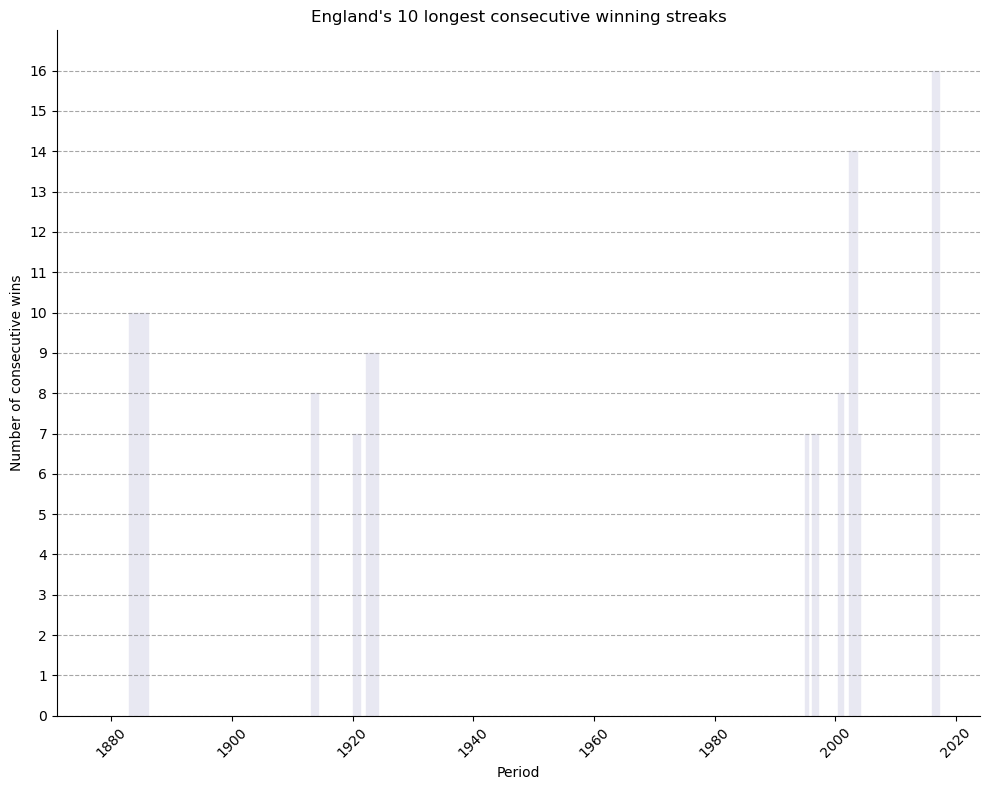

In [35]:
en_win_streaks = []

current_win_streak_en = 0
win_begin_date_en = None
win_end_date_en = None

for index, row in df.iterrows():
    if row['home_team'] == 'England' or row['away_team'] == 'England':
        if row['winner'] == 'England':
            if current_win_streak_en == 0:
                win_begin_date_en = row['date']
            current_win_streak_en += 1
            win_end_date_en = row['date']
        else:
            if current_win_streak_en > 1:
                en_win_streaks.append({
                    'begin_date': win_begin_date_en,
                    'end_date': win_end_date_en,
                    'wins_streak': current_win_streak_en
                })
            current_win_streak_en = 0

sorted_en_win_streaks = sorted(en_win_streaks, key=lambda x: x['wins_streak'], reverse=True)

win_table_data_en = []
for i, win_streak in enumerate(sorted_en_win_streaks[:10], start=1):
    win_table_data_en.append([i, win_streak['wins_streak'], win_streak['begin_date'].strftime('%Y-%m-%d'), win_streak['end_date'].strftime('%Y-%m-%d')])

win_table_en = pd.DataFrame(win_table_data_en, columns=['Rank', 'Win Streak', 'Begin Date', 'End Date'])
print(tabulate(win_table_en, headers='keys', tablefmt='grid', showindex=False))





win_begin_en = ['1882-12-16', '1913-01-18', '1920-01-31', '1922-03-18', '1995-01-21', '1996-02-03', '2000-06-24', '2002-03-23', '2003-09-06', '2016-02-06']
win_end_en = ['1886-02-06', '1914-04-13', '1921-03-28', '1924-03-15', '1995-06-11', '1997-02-15', '2001-04-07', '2003-08-23', '2004-02-21', '2017-03-11']
win_row_en = [10, 8, 7, 9, 7, 7, 8, 14, 7, 16]

plt.figure(figsize=(10, 8))
for i in range(10):
    begin_win_date = datetime.strptime(win_begin_en[i], '%Y-%m-%d')
    end_win_date = datetime.strptime(win_end_en[i], '%Y-%m-%d')
    
    x_win = np.array([begin_win_date, end_win_date])
    y_win = np.array([win_row_en[i], win_row_en[i]])
    
    plt.fill_between(x_win, 0, y_win, color='#E8E8F2')
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive wins')
plt.title('England\'s 10 longest consecutive winning streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))  
plt.ylim(0, max(win_row_en) + 1)
plt.yticks(range(max(win_row_en) + 1))
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe that the longest winning streaks of England occurred during two distinct periods. The first one took place in the early years of international rugby, spanning from the 1880s to the 1920s. This period aligns with a time when the British teams were dominating world rugby, particularly between 1910 and 1929. This era is often regarded as the golden age of rugby in England.

The second notable winning streak occurred in the professional era, specifically between 1995 and the early 2000s. This timeframe coincides with England's triumph in the 2003 World Cup, marking their sole championship victory to date. Additionally, there is another noteworthy peak in England's winning streak history, which stands as their highest consecutive wins record. This occurred between 2016 and 2017, attributed in part to Eddie Jones' leadership. Under his guidance, England achieved the Grand Slam in 2016, a feat not accomplished since 2003.

&rarr; England's largest wins against each team:

In [36]:
en_largest_win = {team: {'win_difference': 0, 'home_score': 0, 'away_score': 0, 'stadium': None, 'date': None} for team in en_opponent}

for index, row in df.iterrows():
    for team in en_opponent:
        if row['home_team'] == team and row['away_team'] == 'England':
            if row['winner'] == 'England':
                win_difference = abs(row['away_score'] - row['home_score'])
                if win_difference > en_largest_win[team]['win_difference']:
                    en_largest_win[team]['win_difference'] = win_difference
                    en_largest_win[team]['home_score'] = row['home_score']
                    en_largest_win[team]['away_score'] = row['away_score']
                    en_largest_win[team]['stadium'] = row['stadium']
                    en_largest_win[team]['date'] = row['date'].strftime('%Y-%m-%d')
        elif row['home_team'] == 'England' and row['away_team'] == team:
            if row['winner'] == 'England':
                win_difference = abs(row['away_score'] - row['home_score'])
                if win_difference > en_largest_win[team]['win_difference']:
                    en_largest_win[team]['win_difference'] = win_difference
                    en_largest_win[team]['home_score'] = row['home_score']
                    en_largest_win[team]['away_score'] = row['away_score']
                    en_largest_win[team]['stadium'] = row['stadium']
                    en_largest_win[team]['date'] = row['date'].strftime('%Y-%m-%d')

                    
for team in sorted(en_largest_win.keys()):
    data = en_largest_win[team]
    color = team_colors.get(team, 'black')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m"
          f"\033[1m\033[3m{team}\033[0m")
    print(f"Score Difference: {data['win_difference']}")
    print(f"Home Score: {data['home_score']}")
    print(f"Away Score: {data['away_score']}")
    print(f"Stadium: {data['stadium']}")
    print(f"Date: {data['date']}")
    print("-" * 20)

Argentina
Score Difference: 51
Home Score: 51
Away Score: 0
Stadium: Twickenham Stadium
Date: 1990-11-03
--------------------
Australia
Score Difference: 24
Home Score: 30
Away Score: 6
Stadium: Twickenham Stadium
Date: 2017-11-18
--------------------
France
Score Difference: 37
Home Score: 37
Away Score: 0
Stadium: Twickenham Stadium
Date: 1911-01-28
--------------------
Ireland
Score Difference: 42
Home Score: 57
Away Score: 15
Stadium: Twickenham Stadium
Date: 2019-08-24
--------------------
Italy
Score Difference: 60
Home Score: 67
Away Score: 7
Stadium: Twickenham Stadium
Date: 1999-10-02
--------------------
New Zealand
Score Difference: 17
Home Score: 38
Away Score: 21
Stadium: Twickenham Stadium
Date: 2012-12-01
--------------------
Scotland
Score Difference: 40
Home Score: 43
Away Score: 3
Stadium: Twickenham Stadium
Date: 2001-03-03
--------------------
South Africa
Score Difference: 50
Home Score: 53
Away Score: 3
Stadium: Twickenham Stadium
Date: 2002-11-23
----------------

We can observe the most significant victories of England (in terms of score difference) against each of the other teams. It is interesting to notice that all of these victories align with the glorious periods mentioned earlier.

<div align="center">
  <h3>2. Debacles insights</h3>
</div>

---

&rarr; England's longest losing streaks:

+--------+---------------+--------------+------------+
|   Rank |   Loss Streak | Begin Date   | End Date   |
+========+===============+==============+============+
|      1 |             7 | 1904-03-19   | 1906-02-10 |
+--------+---------------+--------------+------------+
|      2 |             7 | 2006-02-25   | 2006-11-11 |
+--------+---------------+--------------+------------+
|      3 |             6 | 1971-03-20   | 1972-03-18 |
+--------+---------------+--------------+------------+
|      4 |             5 | 1931-02-14   | 1932-01-16 |
+--------+---------------+--------------+------------+
|      5 |             5 | 1948-02-14   | 1949-02-12 |
+--------+---------------+--------------+------------+
|      6 |             5 | 1950-02-25   | 1951-02-24 |
+--------+---------------+--------------+------------+
|      7 |             5 | 1984-03-03   | 1984-11-03 |
+--------+---------------+--------------+------------+
|      8 |             5 | 2008-06-14   | 2008-11-29 |
+--------+

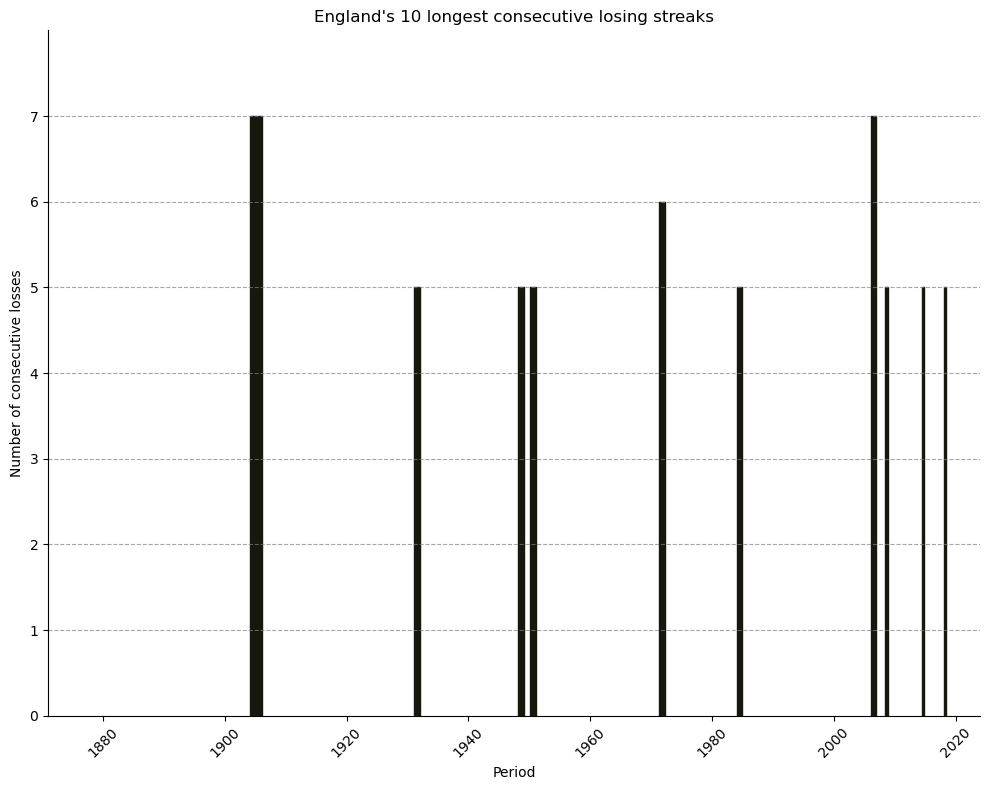

In [37]:
en_loss_streaks = []

current_loss_streak_en = 0
loss_begin_date_en = None
loss_end_date_en = None

for index, row in df.iterrows():
    if row['home_team'] == 'England' or row['away_team'] == 'England':
        if row['winner'] != 'England' and row['winner'] != None:
            if current_loss_streak_en == 0:
                loss_begin_date_en = row['date']
            current_loss_streak_en += 1
            loss_end_date_en = row['date']
        else:
            if current_loss_streak_en > 1:
                en_loss_streaks.append({
                    'begin_date': loss_begin_date_en,
                    'end_date': loss_end_date_en,
                    'loss_streak': current_loss_streak_en
                })
            current_loss_streak_en = 0

            
sorted_en_loss_streaks = sorted(en_loss_streaks, key=lambda x: x['loss_streak'], reverse=True)

loss_table_data_en = []
for i, loss_streak in enumerate(sorted_en_loss_streaks[:10], start=1):
    loss_table_data_en.append([i, loss_streak['loss_streak'], loss_streak['begin_date'].strftime('%Y-%m-%d'), loss_streak['end_date'].strftime('%Y-%m-%d')])

loss_table_en = pd.DataFrame(loss_table_data_en, columns=['Rank', 'Loss Streak', 'Begin Date', 'End Date'])
print(tabulate(loss_table_en, headers='keys', tablefmt='grid', showindex=False))






loss_begin_en = ['1904-03-19', '1931-02-14', '1948-02-14', '1950-02-25', '1971-03-20', '1984-03-03', '2006-02-25', '2008-06-14', '2014-06-07', '2018-02-24']
loss_end_en = ['1906-02-10', '1932-01-16', '1949-02-12', '1951-02-24', '1972-03-18', '1984-11-03', '2006-11-11', '2008-11-29', '2014-11-15', '2018-06-16']
loss_row_en = [7, 5, 5, 5, 6, 5, 7, 5, 5, 5]

plt.figure(figsize=(10, 8))
for i in range(10):
    begin_loss_date = datetime.strptime(loss_begin_en[i], '%Y-%m-%d')
    end_loss_date = datetime.strptime(loss_end_en[i], '%Y-%m-%d')
    
    x_loss = np.array([begin_loss_date, end_loss_date])
    y_loss = np.array([loss_row_en[i], loss_row_en[i]])
    
    plt.fill_between(x_loss, 0, y_loss, color='#17170d')
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive losses')
plt.title('England\'s 10 longest consecutive losing streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))    
plt.ylim(0, max(loss_row_en) + 1)
plt.yticks(range(max(loss_row_en) + 1))
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe the longest losing streaks of England. There isn't a specific period of extended losses for the English team; instead, throughout each decade, the national team has faced challenging times. It is interesting to note that there was a sequence of defeats for the team from 2006 to 2014, as well as another string of losses in 2018.

&rarr; England's largest losses against each team:

In [38]:
en_largest_loss = {team: {'loss_difference': 0, 'home_score': 0, 'away_score': 0, 'stadium': None, 'date': None} for team in en_opponent}

for index, row in df.iterrows():
    for team in en_opponent:
        if row['home_team'] == team and row['away_team'] == 'England':
            if row['winner'] != 'England':
                loss_difference = abs(row['away_score'] - row['home_score'])
                if loss_difference > en_largest_loss[team]['loss_difference']:
                    en_largest_loss[team]['loss_difference'] = loss_difference
                    en_largest_loss[team]['home_score'] = row['home_score']
                    en_largest_loss[team]['away_score'] = row['away_score']
                    en_largest_loss[team]['stadium'] = row['stadium']
                    en_largest_loss[team]['date'] = row['date'].strftime('%Y-%m-%d')
        elif row['home_team'] == 'England' and row['away_team'] == team:
            if row['winner'] != 'England':
                loss_difference = abs(row['away_score'] - row['home_score'])
                if loss_difference > en_largest_loss[team]['loss_difference']:
                    en_largest_loss[team]['loss_difference'] = loss_difference
                    en_largest_loss[team]['home_score'] = row['home_score']
                    en_largest_loss[team]['away_score'] = row['away_score']
                    en_largest_loss[team]['stadium'] = row['stadium']
                    en_largest_loss[team]['date'] = row['date'].strftime('%Y-%m-%d')


for team in sorted(en_largest_loss.keys()):
    data = en_largest_loss[team]
    color = team_colors.get(team, 'black')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m"
          f"\033[1m\033[3m{team}\033[0m")
    if data['date'] is not None:
        print(f"Score Difference: {data['loss_difference']}")
        print(f"Home Score: {data['home_score']}")
        print(f"Away Score: {data['away_score']}")
        print(f"Stadium: {data['stadium']}")
        print(f"Date: {data['date']}")
    else:
        print(f"{team} NEVER DEFEATED England")
    print("-" * 20)

Argentina
Score Difference: 20
Home Score: 33
Away Score: 13
Stadium: Ferrocarril Stadium
Date: 1997-06-07
--------------------
Australia
Score Difference: 76
Home Score: 76
Away Score: 0
Stadium: Lang Park
Date: 1998-06-06
--------------------
France
Score Difference: 25
Home Score: 37
Away Score: 12
Stadium: Stade Yves-du-Manoir
Date: 1972-02-26
--------------------
Ireland
Score Difference: 30
Home Score: 43
Away Score: 13
Stadium: Croke Park
Date: 2007-02-24
--------------------
Italy
Italy NEVER DEFEATED England
--------------------
New Zealand
Score Difference: 42
Home Score: 64
Away Score: 22
Stadium: Carisbrook
Date: 1998-06-20
--------------------
Scotland
Score Difference: 27
Home Score: 33
Away Score: 6
Stadium: Murrayfield Stadium
Date: 1986-02-15
--------------------
South Africa
Score Difference: 48
Home Score: 58
Away Score: 10
Stadium: Free State Stadium
Date: 2007-05-26
--------------------
Wales
Score Difference: 27
Home Score: 30
Away Score: 3
Stadium: Millennium Sta

We can observe the most significant losses of England (in terms of score difference) against each of the other teams. All of these losses took place during the periods of losing streaks mentioned earlier. It is interesting to note that the recent loss against France in Twickenham, with a score of 10 - 53, stands as the worst defeat England has ever suffered at home. This match turned into a truly humiliating experience against their fiercest rival. Furthermore, as previously mentioned, Italy has never secured a victory against England.

<div align="center">
  <h3>3. England's winning and losing periods</h3>
</div>

---

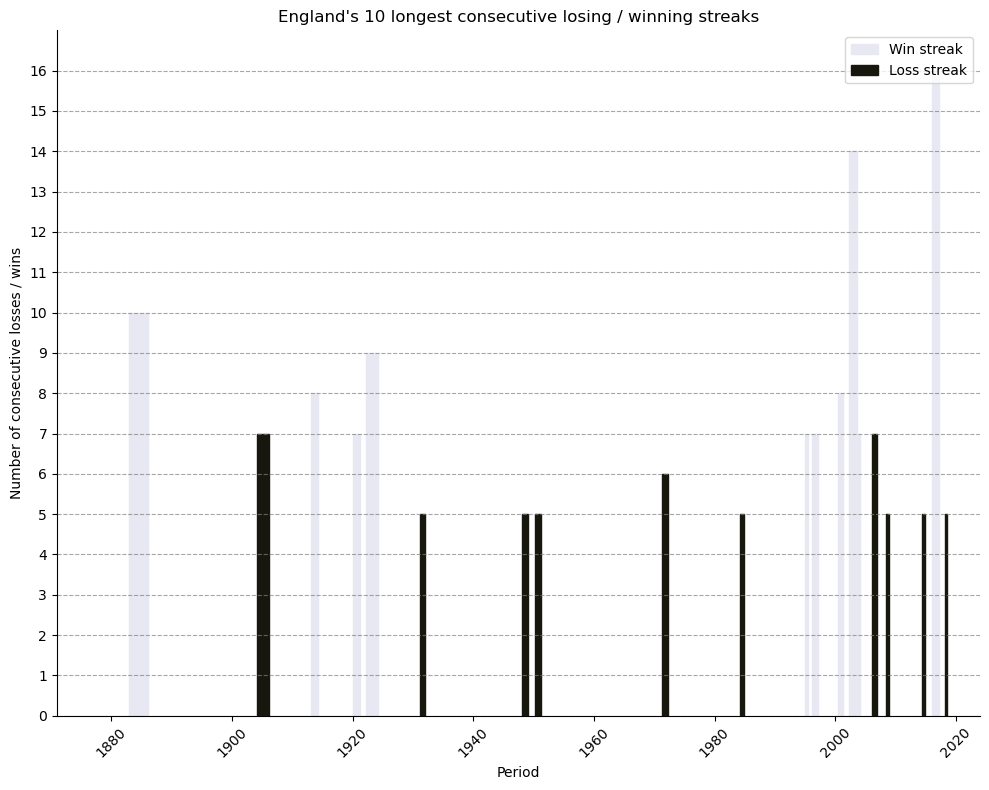

In [39]:
plt.figure(figsize=(10, 8))
for i in range(10):
    
    begin_win_date = datetime.strptime(win_begin_en[i], '%Y-%m-%d')
    end_win_date = datetime.strptime(win_end_en[i], '%Y-%m-%d')
    x_win = np.array([begin_win_date, end_win_date])
    y_win = np.array([win_row_en[i], win_row_en[i]])
    plt.fill_between(x_win, 0, y_win, color='#E8E8F2')
    
    
    begin_loss_date = datetime.strptime(loss_begin_en[i], '%Y-%m-%d')
    end_loss_date = datetime.strptime(loss_end_en[i], '%Y-%m-%d')
    x_loss = np.array([begin_loss_date, end_loss_date])
    y_loss = np.array([loss_row_en[i], loss_row_en[i]])
    plt.fill_between(x_loss, 0, y_loss, color='#17170d')
    
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive losses / wins')
plt.title('England\'s 10 longest consecutive losing / winning streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))  
plt.ylim(0, max(win_row_en) + 1)
plt.yticks(range(max(win_row_en) + 1))
plt.tight_layout()
plt.legend(['Win streak', 'Loss streak'])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe in this summary diagram the periods of both winning and losing streaks for the English national rugby team. The diagram underscores the fluctuating and unpredictable nature of England's performance over the years. It's evident that periods of glory are often followed by periods of defeat, and vice versa. This trend is particularly noticeable since the 2000s. After perhaps experiencing one of its most triumphant eras, marked by winning the Webb Ellis Cup, England faced a subsequent decline with numerous losing periods. However, in 2016-2017, the team mounted an impressive comeback, achieving its best win streak ever. This pattern illustrates the resilience of the team – once at rock bottom, the only way to go is up, and that's precisely what England did, emerging even stronger.

<div align="center">
  <h3>Conclusion</h3>
</div>

---

In conclusion, the evolution of the English national rugby team's performance in terms of victories and defeats against the top 10 teams worldwide is a fascinating journey rich with historical significance. As the birthplace of rugby with William Webb Ellis's historic actions in 1823, England's rugby legacy is deeply intertwined with the sport's origin. Examining the team's match history against various opponents unveils intriguing patterns and trends that shed light on their prowess on the field.

The prevalence of matches against fellow British teams and France is notably higher, which can be attributed to geographical proximity and historical ties. Additionally, the legacy of rugby's origins in the British Isles contributes to the higher frequency of matches with these nations. The historic tournaments like the 4 and 5 Nations further amplify the number of matches played.

Analyzing win rates against different teams reveals valuable insights. Notably, England has maintained a remarkably high win rate against Argentina and Italy. It's worth noting that England has consistently emerged victorious against Italy. While their win rates against Australia, France, Ireland, and Scotland hover just above the 50% mark, indicating a favorable performance, they face greater challenges against formidable teams like New Zealand, South Africa, and Wales, where win rates dip below 50% and even approach 20% against New Zealand. This underscores the enduring strength of the teams that pioneered rugby, albeit facing steeper competition against certain opponents.

The recent global win rate of 54.84% since the last World Cup falls somewhat short of English standards. While England maintains a flawless record against Italy, their win rates against Australia and Wales remain solid, but these teams have faced challenges since 2019. Meanwhile, England's results against France, Ireland, and Scotland have been slightly less favorable than historical records suggest.

The longest winning streaks of England have occurred during two distinct eras. The early years of international rugby, from the 1880s to the 1920s, marked a period of British dominance and are often referred to as the golden era of rugby in England. The professional era also witnessed a significant winning streak from 1995 to the early 2000s, culminating in their 2003 World Cup victory. Additionally, the remarkable win streak between 2016 and 2017, under Eddie Jones' leadership, stands out as a testament to the team's resilience and determination.

Conversely, England's losing streaks do not follow a consistent pattern, with challenging periods scattered across decades. Notably, the team faced sequences of defeats from 2006 to 2014 and in 2018.

The most significant losses, in terms of score difference, have occurred during these challenging periods of losing streaks. A recent standout loss against France, with a score of 10 - 53 at Twickenham, stands as England's most significant home defeat, underscoring the team's vulnerability even on home turf. Furthermore, Italy has yet to secure a victory against England, further highlighting England's strong competitive record.

The summary diagram vividly illustrates England's roller-coaster journey of winning and losing streaks. This graph emphasizes the team's unpredictable nature, with periods of glory frequently succeeded by periods of adversity. This pattern has been particularly pronounced since the 2000s. Despite facing setbacks, the team's ability to rebound is evident, with their resilience culminating in their impressive win streaks.

As of 2023, England is navigating challenging times, as Eddie Jones' departure and the appointment of Steve Borthwick as his successor have not yet yielded desired results. The team remains determined to overcome their current difficulties and continue their storied legacy in the world of rugby.

<div align="center">
  <h2>VI. Historical Analysis of <i> the Shamrocks </i> </h2>
</div>

Here is a more precise analysis of the data for Ireland.




<img src="img/Logo_Irish_Rugby_Football_Union_2009.svg" alt="Logo Ireland" style="width: 25%;">

<div align="center">
  <h3>1. Triumphs insights</h3>
</div>

---

&rarr; Ireland's win rate against each team:

Number of official matches against Ireland for each team:
Argentina: 19 matches
Australia: 36 matches
England: 139 matches
France: 101 matches
Italy: 34 matches
New Zealand: 36 matches
Scotland: 139 matches
South Africa: 26 matches
Wales: 133 matches


Number of wins for Ireland against each team:
Argentina: 13 wins
Australia: 13 wins
England: 51 wins
France: 35 wins
Italy: 30 wins
New Zealand: 5 wins
Scotland: 68 wins
South Africa: 7 wins
Wales: 57 wins


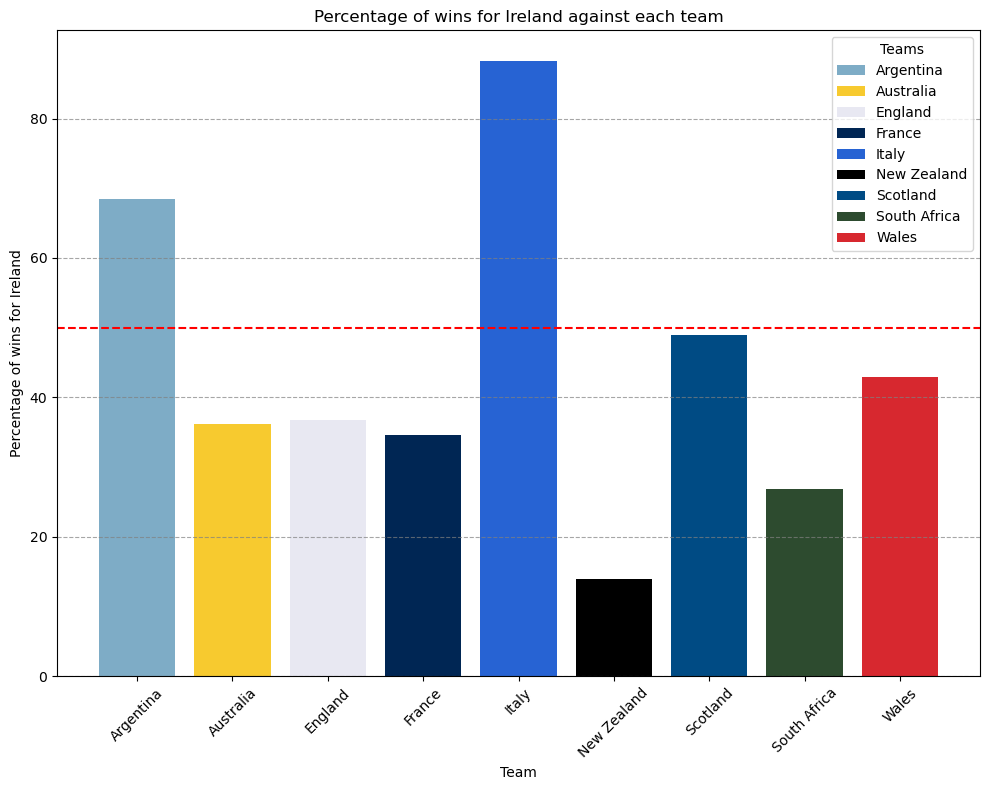

In [40]:
eire_opponent = {
    'Argentina',
    'Australia',
    'England',
    'France',
    'Italy',
    'New Zealand',
    'Scotland',
    'South Africa',
    'Wales'
}

eire_match = {team: 0 for team in eire_opponent}
eire_win = {team: 0 for team in eire_opponent}
eire_ratio = {}

for index, row in df.iterrows():
    for team in eire_opponent:
        if row['home_team'] == team and row['away_team'] == 'Ireland':
            eire_match[team] += 1
            if row['winner'] == 'Ireland':
                eire_win[team] += 1
        elif row['home_team'] == 'Ireland' and row['away_team'] == team:
            eire_match[team] += 1
            if row['winner'] == 'Ireland':
                eire_win[team] += 1
              

for team in eire_win:
    ratio = (eire_win[team] / eire_match[team]) * 100 if eire_match[team] > 0 else 0
    eire_ratio[team] = ratio


print("\033[1mNumber of official matches against Ireland for each team:\033[0m")
for team, matches in dict(sorted(eire_match.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {matches} matches\033[0m")


print("\n")

print("\033[1mNumber of wins for Ireland against each team:\033[0m")
for team, wins in dict(sorted(eire_win.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {wins} wins\033[0m")    


plt.figure(figsize=(10, 8))
for team in sorted(eire_opponent):
    plt.bar(team, dict(sorted(eire_ratio.items()))[team], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins for Ireland')
plt.title('Percentage of wins for Ireland against each team')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()

We can observe that the number of matches against British teams and France logically surpasses those against other teams, with approximately 140 matches compared to around 50. This can be attributed to their geographical proximity as neighboring nations, which made it more practical to arrange matches, especially in the earlier years when travel distances were greater. Additionally, considering that the roots of rugby originated in the British Isles, it's natural that a significant portion of matches took place there. The historic tournaments like the 4 and 5 Nations have further contributed to the higher number of matches between these nations.

Furthermore, a distinct trend is evident in the win rates against various teams. Notably, the win rate against all teams falls below the 50% mark, except for matches against Argentina and Italy. It's noteworthy that Ireland has historically struggled against teams like Australia, England, France, New Zealand, Scotland, South Africa, and Wales.

It's important to acknowledge that these win rates are calculated based on data spanning from 1871 to the present day. To provide a more accurate reflection of current team dynamics, focusing on win rates over recent years would be advisable.

&rarr; Ireland's win rate against each team since the last World Cup (2019):

Number of matches against Ireland for each team:
Argentina: 1 matches
Australia: 0 matches
England: 4 matches
France: 3 matches
Italy: 3 matches
New Zealand: 4 matches
Scotland: 4 matches
South Africa: 0 matches
Wales: 4 matches


Number of wins for Ireland against each team:
Argentina: 1 wins
Australia: 0 wins
England: 2 wins
France: 0 wins
Italy: 3 wins
New Zealand: 3 wins
Scotland: 4 wins
South Africa: 0 wins
Wales: 3 wins

Global win rate for Ireland since the last WC: 69.57%


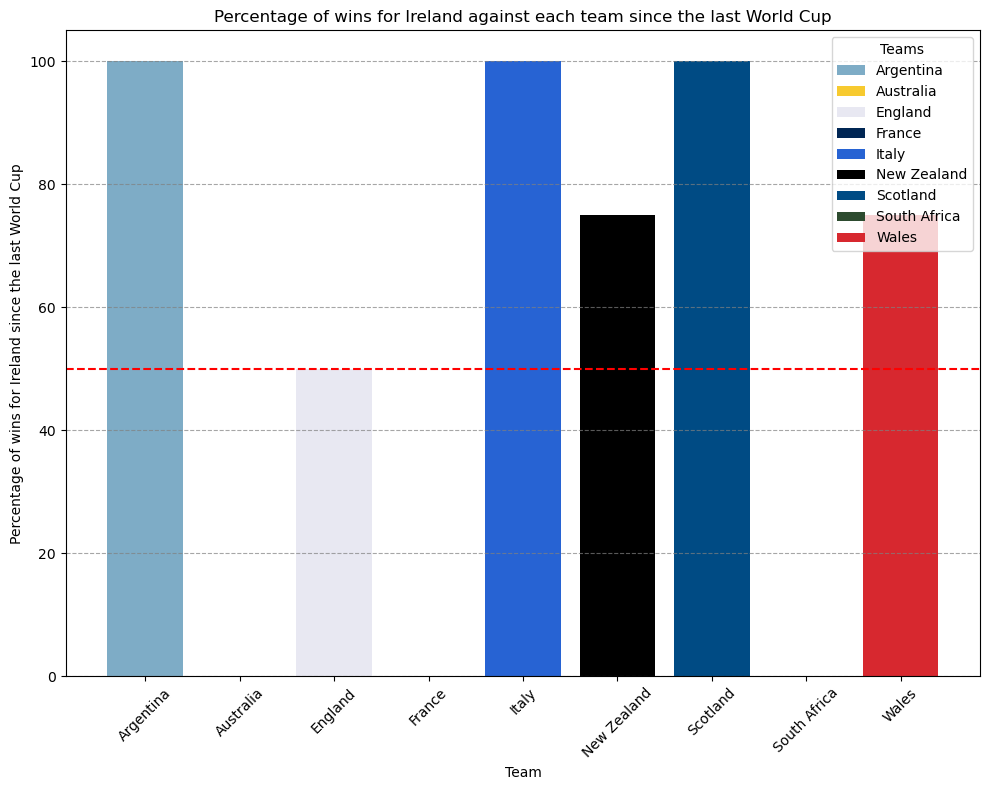

In [41]:
eire_match_2020 = {team: 0 for team in eire_opponent}
eire_win_2020 = {team: 0 for team in eire_opponent}
eire_ratio_2020 = {}

for index, row in df.iterrows():
    if row['year'] >= 2020:
        for team in eire_opponent:
            if row['home_team'] == team and row['away_team'] == 'Ireland':
                eire_match_2020[team] += 1
                if row['winner'] == 'Ireland':
                    eire_win_2020[team] += 1
            elif row['home_team'] == 'Ireland' and row['away_team'] == team:
                eire_match_2020[team] += 1
                if row['winner'] == 'Ireland':
                    eire_win_2020[team] += 1

for team in eire_win_2020:
    ratio = (eire_win_2020[team] / eire_match_2020[team]) * 100 if eire_match_2020[team] > 0 else 0
    eire_ratio_2020[team] = ratio

total_eire_win_2020 = sum(eire_win_2020.values())
total_eire_match_2020 = sum(eire_match_2020.values())



print("\033[1mNumber of matches against Ireland for each team:\033[0m")
for team, matches in dict(sorted(eire_match_2020.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {matches} matches\033[0m")


print("\n")

print("\033[1mNumber of wins for Ireland against each team:\033[0m")
for team, wins in dict(sorted(eire_win_2020.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {wins} wins\033[0m")

global_win_rate_eire_2020 = (total_eire_win_2020 / total_eire_match_2020) * 100
print("\nGlobal win rate for Ireland since the last WC: {:.2f}%".format(global_win_rate_eire_2020))



plt.figure(figsize=(10, 8))
for team in sorted(eire_opponent):
    plt.bar(team, eire_ratio_2020[team], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins for Ireland since the last World Cup')
plt.title('Percentage of wins for Ireland against each team since the last World Cup')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()

We can observe that the win rate against all other teams is consistently at least 50%, except when playing against France. The overall win rate since the last World Cup stands at an impressive 76.67%, a significant improvement compared to historical results. The evolution of the team since 2016 has been nothing short of remarkable, akin to a complete transformation.

&rarr; Ireland's longest winning streaks:

+--------+--------------+--------------+------------+
|   Rank |   Win Streak | Begin Date   | End Date   |
+========+==============+==============+============+
|      1 |            9 | 2014-03-08   | 2015-03-01 |
+--------+--------------+--------------+------------+
|      2 |            8 | 2017-03-18   | 2018-03-17 |
+--------+--------------+--------------+------------+
|      3 |            6 | 1968-02-24   | 1969-02-22 |
+--------+--------------+--------------+------------+
|      4 |            6 | 2002-11-09   | 2003-03-22 |
+--------+--------------+--------------+------------+
|      5 |            6 | 2008-11-22   | 2009-03-21 |
+--------+--------------+--------------+------------+
|      6 |            6 | 2021-02-27   | 2022-02-05 |
+--------+--------------+--------------+------------+
|      7 |            5 | 2004-11-13   | 2005-02-27 |
+--------+--------------+--------------+------------+
|      8 |            5 | 2018-06-16   | 2018-11-17 |
+--------+--------------+---

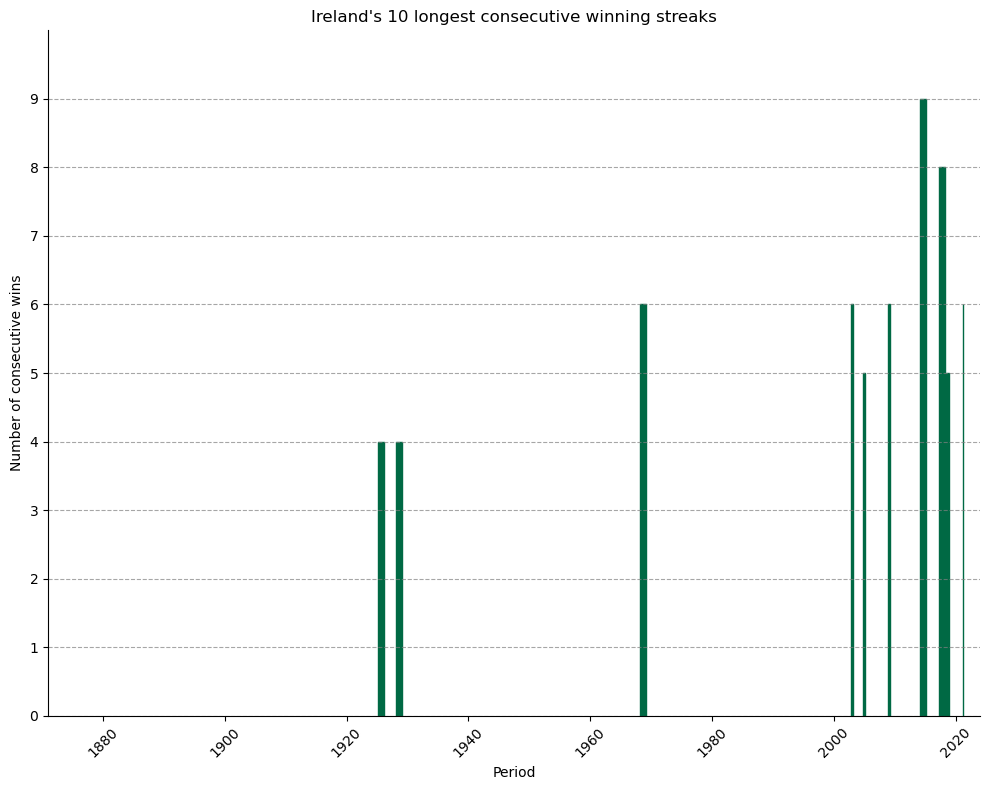

In [42]:
eire_win_streaks = []

current_win_streak_eire = 0
win_begin_date_eire = None
win_end_date_eire = None

for index, row in df.iterrows():
    if row['home_team'] == 'Ireland' or row['away_team'] == 'Ireland':
        if row['winner'] == 'Ireland':
            if current_win_streak_eire == 0:
                win_begin_date_eire = row['date']
            current_win_streak_eire += 1
            win_end_date_eire = row['date']
        else:
            if current_win_streak_eire > 1:
                eire_win_streaks.append({
                    'begin_date': win_begin_date_eire,
                    'end_date': win_end_date_eire,
                    'wins_streak': current_win_streak_eire
                })
            current_win_streak_eire = 0

sorted_eire_win_streaks = sorted(eire_win_streaks, key=lambda x: x['wins_streak'], reverse=True)

win_table_data_eire = []
for i, win_streak in enumerate(sorted_eire_win_streaks[:10], start=1):
    win_table_data_eire.append([i, win_streak['wins_streak'], win_streak['begin_date'].strftime('%Y-%m-%d'), win_streak['end_date'].strftime('%Y-%m-%d')])

win_table_eire = pd.DataFrame(win_table_data_eire, columns=['Rank', 'Win Streak', 'Begin Date', 'End Date'])
print(tabulate(win_table_eire, headers='keys', tablefmt='grid', showindex=False))





win_begin_eire = ['1925-03-14', '1928-02-25', '1968-02-24', '2002-11-09', '2004-11-13', '2008-11-22', '2014-03-08', '2017-03-18', '2018-06-16', '2021-02-27']
win_end_eire = ['1926-02-27', '1929-02-09', '1969-02-22', '2003-03-22', '2005-02-27', '2009-03-21', '2015-03-01', '2018-03-17', '2018-11-17', '2021-02-27']
win_row_eire = [4, 4, 6, 6, 5, 6, 9, 8, 5, 6]

plt.figure(figsize=(10, 8))
for i in range(10):
    begin_win_date = datetime.strptime(win_begin_eire[i], '%Y-%m-%d')
    end_win_date = datetime.strptime(win_end_eire[i], '%Y-%m-%d')
    
    x_win = np.array([begin_win_date, end_win_date])
    y_win = np.array([win_row_eire[i], win_row_eire[i]])
    
    plt.fill_between(x_win, 0, y_win, color='#006944')
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive wins')
plt.title('Ireland\'s 10 longest consecutive winning streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))  
plt.ylim(0, max(win_row_eire) + 1)
plt.yticks(range(max(win_row_eire) + 1))
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe the longest winning streaks of Ireland. While there were two periods of consecutive wins in the 1920s - 1930s, with victories in the 1926 and 1927 Five Nations tournaments, it's noteworthy that the majority of the remarkable winning streaks occurred after the 2000s. This era coincided with the renaissance of Ireland, which boasted several illustrious players including John Hayes, Paul O'Connell, Brian O'Driscoll, and Ronan O'Gara. It shows once again the great improval of the Irish national team through the years.

&rarr; Ireland's largest wins against each team:

In [43]:
eire_largest_win = {team: {'win_difference': 0, 'home_score': 0, 'away_score': 0, 'stadium': None, 'date': None} for team in eire_opponent}

for index, row in df.iterrows():
    for team in eire_opponent:
        if row['home_team'] == team and row['away_team'] == 'Ireland':
            if row['winner'] == 'Ireland':
                win_difference = abs(row['away_score'] - row['home_score'])
                if win_difference > eire_largest_win[team]['win_difference']:
                    eire_largest_win[team]['win_difference'] = win_difference
                    eire_largest_win[team]['home_score'] = row['home_score']
                    eire_largest_win[team]['away_score'] = row['away_score']
                    eire_largest_win[team]['stadium'] = row['stadium']
                    eire_largest_win[team]['date'] = row['date'].strftime('%Y-%m-%d')
        elif row['home_team'] == 'Ireland' and row['away_team'] == team:
            if row['winner'] == 'Ireland':
                win_difference = abs(row['away_score'] - row['home_score'])
                if win_difference > eire_largest_win[team]['win_difference']:
                    eire_largest_win[team]['win_difference'] = win_difference
                    eire_largest_win[team]['home_score'] = row['home_score']
                    eire_largest_win[team]['away_score'] = row['away_score']
                    eire_largest_win[team]['stadium'] = row['stadium']
                    eire_largest_win[team]['date'] = row['date'].strftime('%Y-%m-%d')

                    
for team in sorted(eire_largest_win.keys()):
    data = eire_largest_win[team]
    color = team_colors.get(team, 'black')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m"
          f"\033[1m\033[3m{team}\033[0m")
    print(f"Score Difference: {data['win_difference']}")
    print(f"Home Score: {data['home_score']}")
    print(f"Away Score: {data['away_score']}")
    print(f"Stadium: {data['stadium']}")
    print(f"Date: {data['date']}")
    print("-" * 20)

Argentina
Score Difference: 46
Home Score: 53
Away Score: 7
Stadium: Aviva Stadium
Date: 2021-11-21
--------------------
Australia
Score Difference: 15
Home Score: 12
Away Score: 27
Stadium: Ballymore Stadium
Date: 1979-06-03
--------------------
England
Score Difference: 30
Home Score: 43
Away Score: 13
Stadium: Croke Park
Date: 2007-02-24
--------------------
France
Score Difference: 24
Home Score: 24
Away Score: 0
Stadium: Mardyke
Date: 1913-03-24
--------------------
Italy
Score Difference: 55
Home Score: 61
Away Score: 6
Stadium: Thomond Park
Date: 2003-08-30
--------------------
New Zealand
Score Difference: 11
Home Score: 40
Away Score: 29
Stadium: Soldier Field
Date: 2016-11-05
--------------------
Scotland
Score Difference: 30
Home Score: 6
Away Score: 36
Stadium: Murrayfield Stadium
Date: 2003-02-16
--------------------
South Africa
Score Difference: 35
Home Score: 38
Away Score: 3
Stadium: Aviva Stadium
Date: 2017-11-11
--------------------
Wales
Score Difference: 44
Home Sc

We can observe the most significant victories of Ireland (in terms of score difference) against each of the other teams. It's interesting to note that several of these victories occurred after the year 2000, as previously discussed.

<div align="center">
  <h3>2. Debacles insights</h3>
</div>

---

&rarr; Ireland's longest losing streaks:

+--------+---------------+--------------+------------+
|   Rank |   Loss Streak | Begin Date   | End Date   |
+========+===============+==============+============+
|      1 |            13 | 1991-03-02   | 1993-02-20 |
+--------+---------------+--------------+------------+
|      2 |            12 | 1997-02-15   | 1999-02-06 |
+--------+---------------+--------------+------------+
|      3 |            10 | 1875-02-15   | 1881-02-10 |
+--------+---------------+--------------+------------+
|      4 |            10 | 1882-02-18   | 1886-02-20 |
+--------+---------------+--------------+------------+
|      5 |             7 | 1961-02-25   | 1962-04-14 |
+--------+---------------+--------------+------------+
|      6 |             7 | 1981-02-07   | 1981-11-21 |
+--------+---------------+--------------+------------+
|      7 |             6 | 1890-03-15   | 1892-02-20 |
+--------+---------------+--------------+------------+
|      8 |             6 | 1914-03-14   | 1921-02-12 |
+--------+

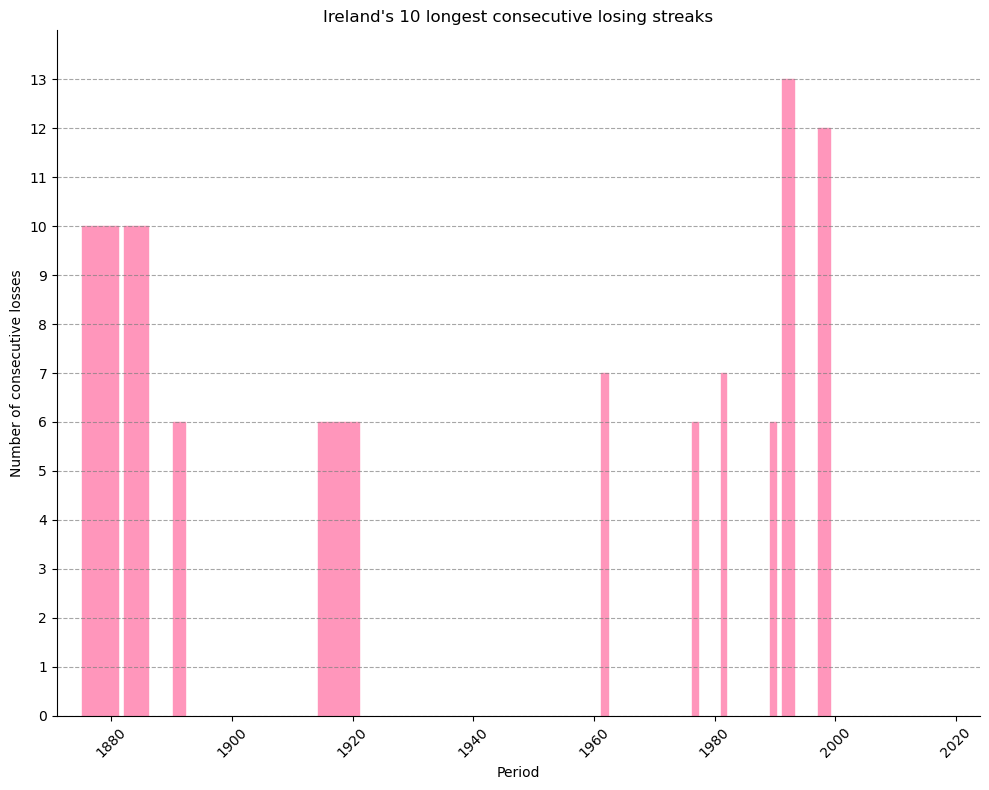

In [44]:
eire_loss_streaks = []

current_loss_streak_eire = 0
loss_begin_date_eire = None
loss_end_date_eire = None

for index, row in df.iterrows():
    if row['home_team'] == 'Ireland' or row['away_team'] == 'Ireland':
        if row['winner'] != 'Ireland' and row['winner'] != None:
            if current_loss_streak_eire == 0:
                loss_begin_date_eire = row['date']
            current_loss_streak_eire += 1
            loss_end_date_eire = row['date']
        else:
            if current_loss_streak_eire > 1:
                eire_loss_streaks.append({
                    'begin_date': loss_begin_date_eire,
                    'end_date': loss_end_date_eire,
                    'loss_streak': current_loss_streak_eire
                })
            current_loss_streak_eire = 0

            
sorted_eire_loss_streaks = sorted(eire_loss_streaks, key=lambda x: x['loss_streak'], reverse=True)

loss_table_data_eire = []
for i, loss_streak in enumerate(sorted_eire_loss_streaks[:10], start=1):
    loss_table_data_eire.append([i, loss_streak['loss_streak'], loss_streak['begin_date'].strftime('%Y-%m-%d'), loss_streak['end_date'].strftime('%Y-%m-%d')])

loss_table_eire = pd.DataFrame(loss_table_data_eire, columns=['Rank', 'Loss Streak', 'Begin Date', 'End Date'])
print(tabulate(loss_table_eire, headers='keys', tablefmt='grid', showindex=False))






loss_begin_eire = ['1875-02-15', '1882-02-18', '1890-03-15', '1914-03-14', '1961-02-25', '1976-03-20', '1981-02-07', '1989-02-18', '1991-03-02', '1997-02-15']
loss_end_eire = ['1881-02-10', '1886-02-20', '1892-02-20', '1921-02-12', '1962-04-14', '1977-03-19', '1981-11-21', '1990-03-03', '1993-02-20', '1999-02-06']
loss_row_eire = [10, 10, 6, 6, 7, 6, 7, 6, 13, 12]

plt.figure(figsize=(10, 8))
for i in range(10):
    begin_loss_date = datetime.strptime(loss_begin_eire[i], '%Y-%m-%d')
    end_loss_date = datetime.strptime(loss_end_eire[i], '%Y-%m-%d')
    
    x_loss = np.array([begin_loss_date, end_loss_date])
    y_loss = np.array([loss_row_eire[i], loss_row_eire[i]])
    
    plt.fill_between(x_loss, 0, y_loss, color='#ff96bb')
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive losses')
plt.title('Ireland\'s 10 longest consecutive losing streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))    
plt.ylim(0, max(loss_row_eire) + 1)
plt.yticks(range(max(loss_row_eire) + 1))
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe the longest losing streaks of Ireland. The most significant ones occurred during two distinct periods: the period from 1871 to 1920 and the period from 1960 to 1999. As mentioned previously, the Irish national team faced challenges early on, experiencing a series of defeats against its neighboring teams between 1870 and 1920. Additionally, from 1986 to 1999, Ireland went through a challenging phase. In 1986, the team faced losses in all its matches during the 5 Nations Tournament and struggled to progress beyond the quarter-finals in the early World Cup tournaments. This period marked a challenging era for the team.

&rarr; Ireland's largest losses against each team:

In [45]:
eire_largest_loss = {team: {'loss_difference': 0, 'home_score': 0, 'away_score': 0, 'stadium': None, 'date': None} for team in eire_opponent}

for index, row in df.iterrows():
    for team in eire_opponent:
        if row['home_team'] == team and row['away_team'] == 'Ireland':
            if row['winner'] != 'Ireland':
                loss_difference = abs(row['away_score'] - row['home_score'])
                if loss_difference > eire_largest_loss[team]['loss_difference']:
                    eire_largest_loss[team]['loss_difference'] = loss_difference
                    eire_largest_loss[team]['home_score'] = row['home_score']
                    eire_largest_loss[team]['away_score'] = row['away_score']
                    eire_largest_loss[team]['stadium'] = row['stadium']
                    eire_largest_loss[team]['date'] = row['date'].strftime('%Y-%m-%d')
        elif row['home_team'] == 'Ireland' and row['away_team'] == team:
            if row['winner'] != 'Ireland':
                loss_difference = abs(row['away_score'] - row['home_score'])
                if loss_difference > eire_largest_loss[team]['loss_difference']:
                    eire_largest_loss[team]['loss_difference'] = loss_difference
                    eire_largest_loss[team]['home_score'] = row['home_score']
                    eire_largest_loss[team]['away_score'] = row['away_score']
                    eire_largest_loss[team]['stadium'] = row['stadium']
                    eire_largest_loss[team]['date'] = row['date'].strftime('%Y-%m-%d')


for team in sorted(eire_largest_loss.keys()):
    data = eire_largest_loss[team]
    color = team_colors.get(team, 'black')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m"
          f"\033[1m\033[3m{team}\033[0m")
    print(f"Score Difference: {data['loss_difference']}")
    print(f"Home Score: {data['home_score']}")
    print(f"Away Score: {data['away_score']}")
    print(f"Stadium: {data['stadium']}")
    print(f"Date: {data['date']}")
    print("-" * 20)

Argentina
Score Difference: 23
Home Score: 20
Away Score: 43
Stadium: Millennium Stadium
Date: 2015-10-18
--------------------
Australia
Score Difference: 36
Home Score: 46
Away Score: 10
Stadium: Ballymore Stadium
Date: 1999-06-12
--------------------
England
Score Difference: 42
Home Score: 57
Away Score: 15
Stadium: Twickenham Stadium
Date: 2019-08-24
--------------------
France
Score Difference: 39
Home Score: 44
Away Score: 5
Stadium: Stade de France
Date: 2002-04-06
--------------------
Italy
Score Difference: 15
Home Score: 37
Away Score: 22
Stadium: Stadio Renato Dall'Ara
Date: 1997-12-20
--------------------
New Zealand
Score Difference: 60
Home Score: 60
Away Score: 0
Stadium: Waikato Stadium
Date: 2012-06-23
--------------------
Scotland
Score Difference: 28
Home Score: 38
Away Score: 10
Stadium: Murrayfield Stadium
Date: 1997-03-01
--------------------
South Africa
Score Difference: 38
Home Score: 0
Away Score: 38
Stadium: Lansdowne Road
Date: 1912-11-30
-------------------

We can observe the most significant losses of Ireland (in terms of score difference) against each of the other teams. It is interesting to notice that some of those losses occurred in the difficult periods for Ireland.

<div align="center">
  <h3>3. Ireland's winning and losing periods</h3>
</div>

---

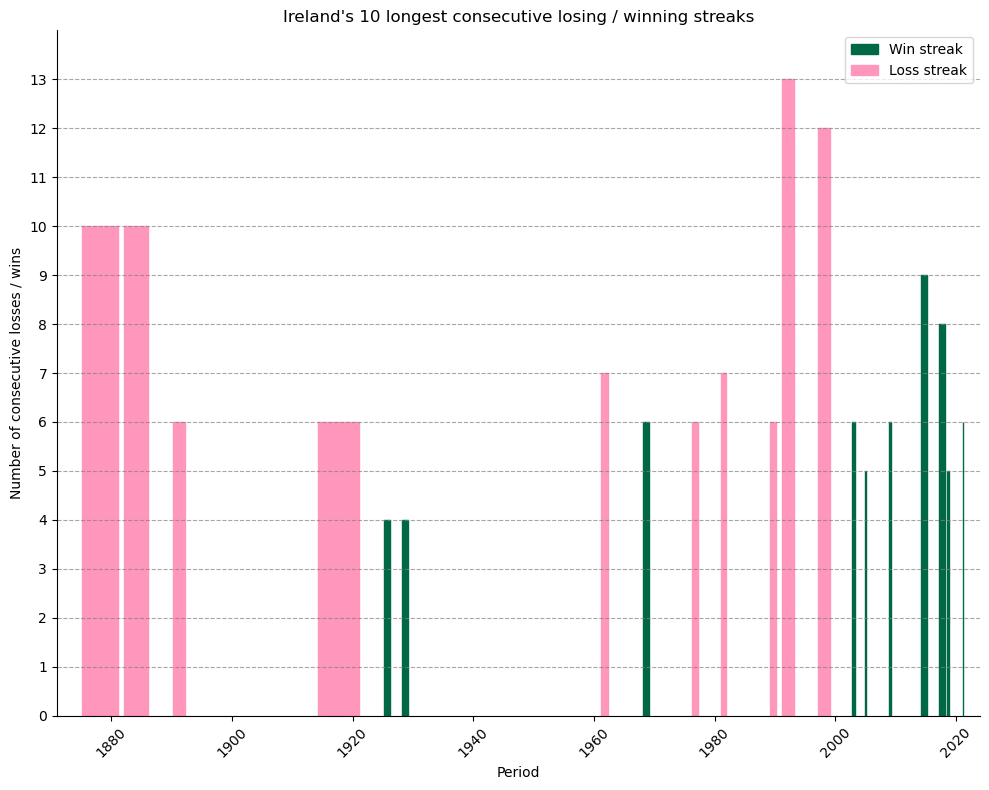

In [46]:
plt.figure(figsize=(10, 8))
for i in range(10):
    
    begin_win_date = datetime.strptime(win_begin_eire[i], '%Y-%m-%d')
    end_win_date = datetime.strptime(win_end_eire[i], '%Y-%m-%d')
    x_win = np.array([begin_win_date, end_win_date])
    y_win = np.array([win_row_eire[i], win_row_eire[i]])
    plt.fill_between(x_win, 0, y_win, color='#006944')
    
    
    begin_loss_date = datetime.strptime(loss_begin_eire[i], '%Y-%m-%d')
    end_loss_date = datetime.strptime(loss_end_eire[i], '%Y-%m-%d')
    x_loss = np.array([begin_loss_date, end_loss_date])
    y_loss = np.array([loss_row_eire[i], loss_row_eire[i]])
    plt.fill_between(x_loss, 0, y_loss, color='#ff96bb')
    
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive losses / wins')
plt.title('Ireland\'s 10 longest consecutive losing / winning streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))  
plt.ylim(0, max(loss_row_eire) + 1)
plt.yticks(range(max(loss_row_eire) + 1))
plt.tight_layout()
plt.legend(['Win streak', 'Loss streak'])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe in this summary diagram the periods of both winning and losing streaks for the Irish national rugby team. The diagram highlights a significant transformation over the years. Initially, the Irish team faced numerous challenges, reflected in their limited list of honours, which includes only 6 Grand Slam victories. However, despite the modest sporting achievements in recent years, Irish rugby has made remarkable progress since the onset of professionalism. This progress has been so substantial that the team achieved the top ranking in the World Rugby rankings as of 24 July 2022.

<div align="center">
  <h3>Conclusion</h3>
</div>

---

In conclusion, the journey of the Irish national rugby team's victories and defeats, as observed through its history against the top 10 teams in the world, paints a vivid picture of evolution and growth. The analysis of match records offers valuable insights into Ireland's performance over the years.

The prevalence of matches against British teams and France, totaling around 140 matches compared to approximately 50 against other teams, can be attributed to geographical proximity and historical factors. The rugby roots established in the British Isles, along with the enduring tournaments like the 4 and 5 Nations, have contributed to the higher frequency of matches between these neighboring nations.

Examining win rates against various teams reveals a consistent trend, where the win rate falls below 50% against all teams except Argentina and Italy. Notably, Ireland has historically faced challenges when competing against teams such as Australia, England, France, New Zealand, Scotland, South Africa, and Wales.

The win rate since 2019 against all other teams consistently maintains at least a 50% rate, except when playing against France. The impressive overall win rate of 76.67% since the last World Cup showcases the team's substantial improvement compared to historical results. The transformation of the team since 2016 is nothing short of remarkable, resembling a complete turnaround.

The analysis of Ireland's longest winning streaks reveals two notable periods. While there were instances of consecutive wins in the 1920s - 1930s, the majority of remarkable winning streaks occurred after the 2000s. This era coincided with Ireland's renaissance, characterized by the contributions of renowned players like John Hayes, Paul O'Connell, Brian O'Driscoll, and Ronan O'Gara. These achievements underscore the considerable progress of the Irish national team over the years.

Examining the longest losing streaks highlights two distinct phases of challenges. The periods from 1871 to 1920 and 1960 to 1999 marked significant downturns in the team's performance. The early years were characterized by struggles against neighboring teams, while the later era featured difficulties and setbacks in major tournaments.

The summary diagram provides a visual representation of the Irish team's journey, emphasizing a remarkable transformation. Despite initial challenges reflected in a limited list of honours, including only 6 Grand Slam victories, the advent of professionalism has propelled Irish rugby to great heights. This progress is evident in the team's achievement of the top rank in the World Rugby rankings as of July 24, 2022. This journey serves as a testament to the resilience, dedication, and continuous pursuit of excellence by the Irish national rugby team.

<div align="center">
  <h2>VII. Historical Analysis of <i> gli Azzurri </i> </h2>
</div>

Here is a more precise analysis of the data for Italy.




<img src="img/Italie_Rugby.svg" alt="Logo Italy" style="width: 30%;">

<div align="center">
  <h3>1. Triumphs insights</h3>
</div>

---

&rarr; Italy's win rate against each team:

Number of official matches against Italy for each team:
Argentina: 23 matches
Australia: 18 matches
England: 29 matches
France: 46 matches
Ireland: 34 matches
New Zealand: 15 matches
Scotland: 34 matches
South Africa: 15 matches
Wales: 31 matches


Number of wins for Italy against each team:
Argentina: 5 wins
Australia: 0 wins
England: 0 wins
France: 3 wins
Ireland: 4 wins
New Zealand: 0 wins
Scotland: 8 wins
South Africa: 1 wins
Wales: 3 wins


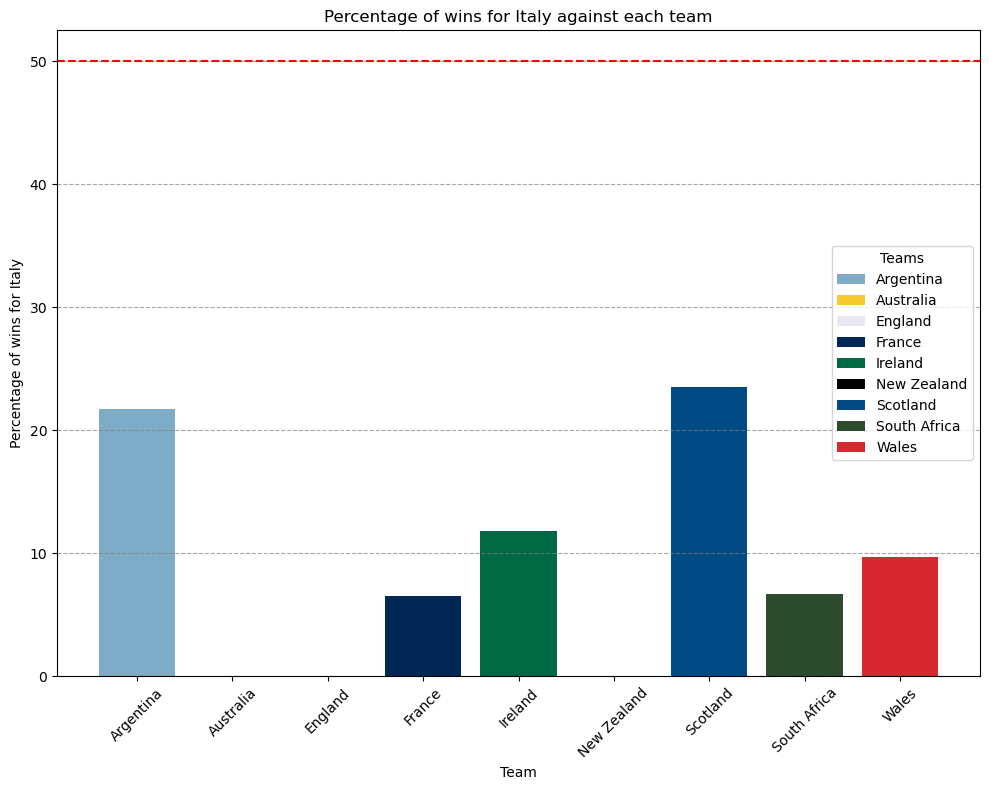

In [47]:
it_opponent = {
    'Argentina',
    'Australia',
    'England',
    'France',
    'Ireland',
    'New Zealand',
    'Scotland',
    'South Africa',
    'Wales'
}

it_match = {team: 0 for team in it_opponent}
it_win = {team: 0 for team in it_opponent}
it_ratio = {}

for index, row in df.iterrows():
    for team in it_opponent:
        if row['home_team'] == team and row['away_team'] == 'Italy':
            it_match[team] += 1
            if row['winner'] == 'Italy':
                it_win[team] += 1
        elif row['home_team'] == 'Italy' and row['away_team'] == team:
            it_match[team] += 1
            if row['winner'] == 'Italy':
                it_win[team] += 1
              

for team in it_win:
    ratio = (it_win[team] / it_match[team]) * 100 if it_match[team] > 0 else 0
    it_ratio[team] = ratio


print("\033[1mNumber of official matches against Italy for each team:\033[0m")
for team, matches in dict(sorted(it_match.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {matches} matches\033[0m")


print("\n")

print("\033[1mNumber of wins for Italy against each team:\033[0m")
for team, wins in dict(sorted(it_win.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {wins} wins\033[0m")    


plt.figure(figsize=(10, 8))
for team in sorted(it_opponent):
    plt.bar(team, dict(sorted(it_ratio.items()))[team], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins for Italy')
plt.title('Percentage of wins for Italy against each team')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()

In observation, the number of matches played by Italy against other teams remains relatively low, consistently below 50 matches. This can be attributed to Italy's status as a relatively young rugby nation, often regarded as a secondary rugby power before its inclusion in the 5 Nations Tournament, which later evolved into the 6 Nations in 2000. Consequently, Italy had fewer opportunities to face off against some of the top-tier teams in World Rugby.

Furthermore, a distinct trend emerges in the win rates against various teams. Notably, the win rate against all teams is notably low, standing at only 9.92%. This win rate fails to exceed 25% per team, and notably, it falls below 10% against Australia, France, New Zealand, South Africa, and Wales.

It's noteworthy to mention that the win rate against Scotland is by far the highest, which might come as a surprise given the quality of the Scottish team. Additionally, it's important to highlight that Italy has never secured a victory against England and has not even managed to achieve a draw, nor has Italy been successful against New Zealand.

As stated, these win rates are calculated based on data from 1871 to the present day. To provide a more accurate reflection of current team dynamics, focusing on recent years' win rates would be more indicative of Italy's current performance level.

&rarr; Italy's win rate against each team since the last World Cup (2019):

Number of matches against Italy since 2019 for each team:
Argentina: 1 matches
Australia: 0 matches
England: 3 matches
France: 4 matches
Ireland: 3 matches
New Zealand: 1 matches
Scotland: 4 matches
South Africa: 0 matches
Wales: 4 matches


Number of wins for Italy against each team:
Argentina: 0 wins
Australia: 0 wins
England: 0 wins
France: 0 wins
Ireland: 0 wins
New Zealand: 0 wins
Scotland: 0 wins
South Africa: 0 wins
Wales: 1 wins

Global win rate for Italy since the last WC: 5.00%


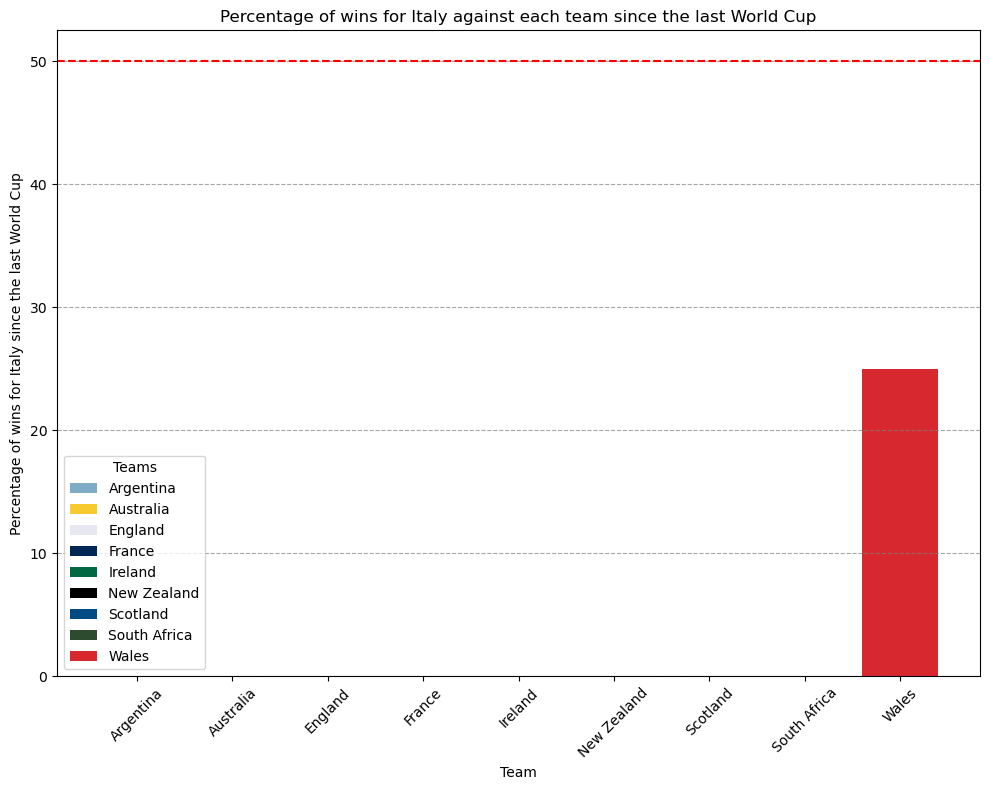

In [48]:
it_match_2020 = {team: 0 for team in it_opponent}
it_win_2020 = {team: 0 for team in it_opponent}
it_ratio_2020 = {}

for index, row in df.iterrows():
    if row['year'] >= 2020:
        for team in it_opponent:
            if row['home_team'] == team and row['away_team'] == 'Italy':
                it_match_2020[team] += 1
                if row['winner'] == 'Italy':
                    it_win_2020[team] += 1
            elif row['home_team'] == 'Italy' and row['away_team'] == team:
                it_match_2020[team] += 1
                if row['winner'] == 'Italy':
                    it_win_2020[team] += 1

for team in it_win_2020:
    ratio = (it_win_2020[team] / it_match_2020[team]) * 100 if it_match_2020[team] > 0 else 0
    it_ratio_2020[team] = ratio

total_it_win_2020 = sum(it_win_2020.values())
total_it_match_2020 = sum(it_match_2020.values())



print("\033[1mNumber of matches against Italy since 2019 for each team:\033[0m")
for team, matches in dict(sorted(it_match_2020.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {matches} matches\033[0m")


print("\n")

print("\033[1mNumber of wins for Italy against each team:\033[0m")
for team, wins in dict(sorted(it_win_2020.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {wins} wins\033[0m")

global_win_rate_it_2020 = (total_it_win_2020 / total_it_match_2020) * 100
print("\nGlobal win rate for Italy since the last WC: {:.2f}%".format(global_win_rate_it_2020))



plt.figure(figsize=(10, 8))
for team in sorted(it_opponent):
    plt.bar(team, it_ratio_2020[team], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins for Italy since the last World Cup')
plt.title('Percentage of wins for Italy against each team since the last World Cup')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()

We can observe only two peaks in Italy's performance, indicating that their win rate against the other teams is effectively 0%. Notably, these peaks correspond to historic victories against Australia and Wales. The overall win rate since 2019 is a mere 7.41%. However, this outcome isn't particularly surprising for Italy, as they have historically faced challenges when competing against first-tier rugby nations.

&rarr; Italy's longest winning streaks:

+--------+--------------+--------------+------------+
|   Rank |   Win Streak | Begin Date   | End Date   |
+========+==============+==============+============+
|      1 |            2 | 1997-01-04   | 1997-03-22 |
+--------+--------------+--------------+------------+
|      2 |            2 | 1997-12-20   | 1998-01-24 |
+--------+--------------+--------------+------------+
|      3 |            2 | 2007-02-24   | 2007-03-10 |
+--------+--------------+--------------+------------+


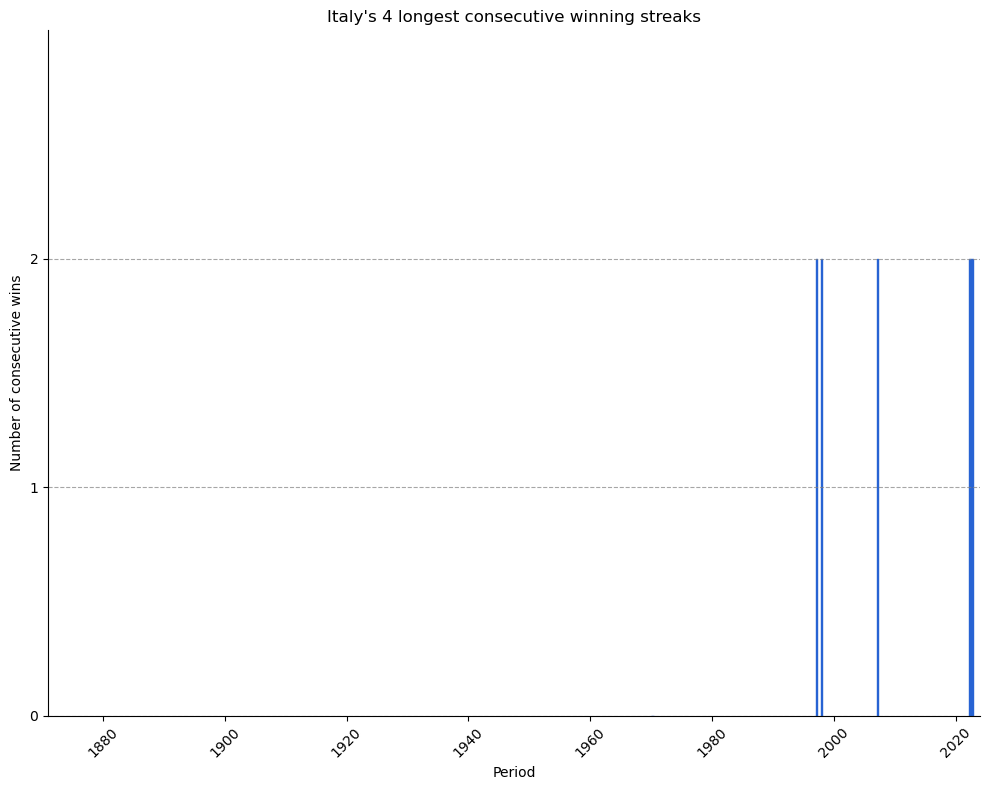

In [49]:
it_win_streaks = []

current_win_streak_it = 0
win_begin_date_it = None
win_end_date_it = None

for index, row in df.iterrows():
    if row['home_team'] == 'Italy' or row['away_team'] == 'Italy':
        if row['winner'] == 'Italy':
            if current_win_streak_it == 0:
                win_begin_date_it = row['date']
            current_win_streak_it += 1
            win_end_date_it = row['date']
        else:
            if current_win_streak_it > 1:
                it_win_streaks.append({
                    'begin_date': win_begin_date_it,
                    'end_date': win_end_date_it,
                    'wins_streak': current_win_streak_it
                })
            current_win_streak_it = 0

sorted_it_win_streaks = sorted(it_win_streaks, key=lambda x: x['wins_streak'], reverse=True)

win_table_data_it = []
for i, win_streak in enumerate(sorted_it_win_streaks[:10], start=1):
    win_table_data_it.append([i, win_streak['wins_streak'], win_streak['begin_date'].strftime('%Y-%m-%d'), win_streak['end_date'].strftime('%Y-%m-%d')])

win_table_it = pd.DataFrame(win_table_data_it, columns=['Rank', 'Win Streak', 'Begin Date', 'End Date'])
print(tabulate(win_table_it, headers='keys', tablefmt='grid', showindex=False))





win_begin_it = ['1997-01-04', '1997-12-20', '2007-02-24', '2022-03-19']
win_end_it = ['1997-03-22', '1998-01-24', '2007-03-10', '2022-11-12']
win_row_it = [2, 2, 2, 2]

for i in range(1, 7):
    win_begin_it.append('1970-{:02d}-{:02d}'.format(i, i))
    win_end_it.append('1970-{:02d}-{:02d}'.format(i+1, i))
    win_row_it.append(0)
    

plt.figure(figsize=(10, 8))
for i in range(10):
    begin_win_date = datetime.strptime(win_begin_it[i], '%Y-%m-%d')
    end_win_date = datetime.strptime(win_end_it[i], '%Y-%m-%d')
    
    x_win = np.array([begin_win_date, end_win_date])
    y_win = np.array([win_row_it[i], win_row_it[i]])
    
    plt.fill_between(x_win, 0, y_win, color='#2763D3')
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive wins')
plt.title('Italy\'s 4 longest consecutive winning streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))  
plt.ylim(0, max(win_row_it) + 1)
plt.yticks(range(max(win_row_it) + 1))
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe the longest winning streaks of Italy. There are only four instances of consecutive wins, with each streak comprising only two wins in a row. This pattern aligns with the challenges Italy faces against stronger teams, as discussed earlier. However, it's worth noting that these winning streaks have all occurred between 1997 and 2022, indicating relatively recent occurrences.

&rarr; Italy's largest wins against each team:

In [50]:
it_largest_win = {team: {'win_difference': 0, 'home_score': 0, 'away_score': 0, 'stadium': None, 'date': None} for team in it_opponent}

for index, row in df.iterrows():
    for team in it_opponent:
        if row['home_team'] == team and row['away_team'] == 'Italy':
            if row['winner'] == 'Italy':
                win_difference = abs(row['away_score'] - row['home_score'])
                if win_difference > it_largest_win[team]['win_difference']:
                    it_largest_win[team]['win_difference'] = win_difference
                    it_largest_win[team]['home_score'] = row['home_score']
                    it_largest_win[team]['away_score'] = row['away_score']
                    it_largest_win[team]['stadium'] = row['stadium']
                    it_largest_win[team]['date'] = row['date'].strftime('%Y-%m-%d')
        elif row['home_team'] == 'Italy' and row['away_team'] == team:
            if row['winner'] == 'Italy':
                win_difference = abs(row['away_score'] - row['home_score'])
                if win_difference > it_largest_win[team]['win_difference']:
                    it_largest_win[team]['win_difference'] = win_difference
                    it_largest_win[team]['home_score'] = row['home_score']
                    it_largest_win[team]['away_score'] = row['away_score']
                    it_largest_win[team]['stadium'] = row['stadium']
                    it_largest_win[team]['date'] = row['date'].strftime('%Y-%m-%d')
   
for team in sorted(it_largest_win.keys()):
    data = it_largest_win[team]
    color = team_colors.get(team, 'black')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m"
          f"\033[1m\033[3m{team}\033[0m")
    if data['date'] is not None:
        print(f"Score Difference: {data['win_difference']}")
        print(f"Home Score: {data['home_score']}")
        print(f"Away Score: {data['away_score']}")
        print(f"Stadium: {data['stadium']}")
        print(f"Date: {data['date']}")
    else:
        print(f"Italy NEVER WON AGAINST {team}")
    print("-" * 20)

Argentina
Score Difference: 13
Home Score: 19
Away Score: 6
Stadium: Stadio Comunale Mario Battaglini
Date: 1978-10-24
--------------------
Australia
Italy NEVER WON AGAINST Australia
--------------------
England
Italy NEVER WON AGAINST England
--------------------
France
Score Difference: 8
Home Score: 32
Away Score: 40
Stadium: Stade Lesdiguières
Date: 1997-03-22
--------------------
Ireland
Score Difference: 15
Home Score: 37
Away Score: 22
Stadium: Stadio Renato Dall'Ara
Date: 1997-12-20
--------------------
New Zealand
Italy NEVER WON AGAINST New Zealand
--------------------
Scotland
Score Difference: 20
Home Score: 17
Away Score: 37
Stadium: Murrayfield Stadium
Date: 2007-02-24
--------------------
South Africa
Score Difference: 2
Home Score: 20
Away Score: 18
Stadium: Stadio Artemio Franchi
Date: 2016-11-19
--------------------
Wales
Score Difference: 8
Home Score: 30
Away Score: 22
Stadium: Stadio Flaminio
Date: 2003-02-15
--------------------


We can observe the most significant victories of Italy (in terms of score difference) against each of the other teams. As mentioned earlier, Italy has never secured a victory against England or New Zealand. Furthermore, it's notable that all these victories occurred within the period 1997 - 2022, except for the win against Argentina in 1978.

<div align="center">
  <h3>2. Debacles insights</h3>
</div>

---

&rarr; Italy's longest losing streaks:

+--------+---------------+--------------+------------+
|   Rank |   Loss Streak | Begin Date   | End Date   |
+========+===============+==============+============+
|      1 |            45 | 2017-02-05   | 2022-03-12 |
+--------+---------------+--------------+------------+
|      2 |            21 | 2000-02-19   | 2002-11-23 |
+--------+---------------+--------------+------------+
|      3 |            17 | 1937-10-17   | 1967-03-26 |
+--------+---------------+--------------+------------+
|      4 |            14 | 2008-11-08   | 2010-02-14 |
+--------+---------------+--------------+------------+
|      5 |            14 | 2015-03-15   | 2016-11-12 |
+--------+---------------+--------------+------------+
|      6 |            13 | 2013-06-08   | 2015-02-14 |
+--------+---------------+--------------+------------+
|      7 |            12 | 1983-10-22   | 1994-10-12 |
+--------+---------------+--------------+------------+
|      8 |            10 | 2003-02-22   | 2004-02-21 |
+--------+

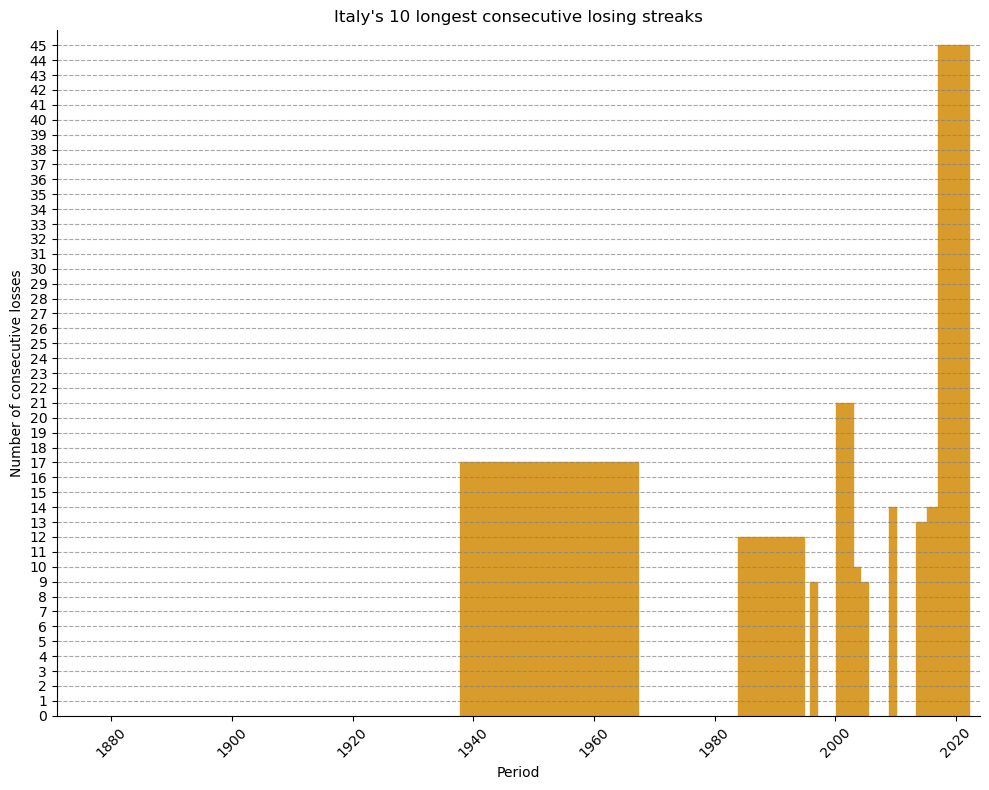

In [51]:
it_loss_streaks = []

current_loss_streak_it = 0
loss_begin_date_it = None
loss_end_date_it = None

for index, row in df.iterrows():
    if row['home_team'] == 'Italy' or row['away_team'] == 'Italy':
        if row['winner'] != 'Italy' and row['winner'] != None:
            if current_loss_streak_it == 0:
                loss_begin_date_it = row['date']
            current_loss_streak_it += 1
            loss_end_date_it = row['date']
        else:
            if current_loss_streak_it > 1:
                it_loss_streaks.append({
                    'begin_date': loss_begin_date_it,
                    'end_date': loss_end_date_it,
                    'loss_streak': current_loss_streak_it
                })
            current_loss_streak_it = 0

            
sorted_it_loss_streaks = sorted(it_loss_streaks, key=lambda x: x['loss_streak'], reverse=True)

loss_table_data_it = []
for i, loss_streak in enumerate(sorted_it_loss_streaks[:10], start=1):
    loss_table_data_it.append([i, loss_streak['loss_streak'], loss_streak['begin_date'].strftime('%Y-%m-%d'), loss_streak['end_date'].strftime('%Y-%m-%d')])

loss_table_it = pd.DataFrame(loss_table_data_it, columns=['Rank', 'Loss Streak', 'Begin Date', 'End Date'])
print(tabulate(loss_table_it, headers='keys', tablefmt='grid', showindex=False))






loss_begin_it = ['1937-10-17', '1983-10-22', '1995-10-14', '2000-02-19', '2003-02-22', '2004-03-20', '2008-11-08', '2013-06-08', '2015-03-15', '2017-02-05']
loss_end_it = ['1967-03-26', '1994-10-12', '1996-12-14', '2002-11-23', '2004-02-21', '2005-06-11', '2010-02-14', '2015-02-14', '2016-11-12', '2022-03-12']
loss_row_it = [17, 12, 9, 21, 10, 9, 14, 13, 14, 45]

plt.figure(figsize=(10, 8))
for i in range(10):
    begin_loss_date = datetime.strptime(loss_begin_it[i], '%Y-%m-%d')
    end_loss_date = datetime.strptime(loss_end_it[i], '%Y-%m-%d')
    
    x_loss = np.array([begin_loss_date, end_loss_date])
    y_loss = np.array([loss_row_it[i], loss_row_it[i]])
    
    plt.fill_between(x_loss, 0, y_loss, color='#d89c2c')
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive losses')
plt.title('Italy\'s 10 longest consecutive losing streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))    
plt.ylim(0, max(loss_row_it) + 1)
plt.yticks(range(max(loss_row_it) + 1))
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe the longest losing streaks of Italy. As predicted by the limited number of victories, there is a significant number of losses. The first notable losing streak occurred between 1937 and 1967. During this period, as rugby was being developed in the country after World War II with the presence of the Allies, Italy remained relatively inexperienced compared to the already established rugby nations. While this period spans a considerable amount of time, it's important to note that Italy didn't frequently compete against the top 10 nations. The limited number of matches reflects that Italy wasn't widely perceived as a serious opponent at the time.

From 1980 onward, Italy began to secure victories against members of the European Cup of Nations such as Romania, Spain, Portugal, Germany, and the Soviet Union. Additionally, a notable victory against Canada (9-37) allowed Italy to face Australia for the first time in 1983. The period from 1980 to 2000 marked Italy's ascent to the highest echelons of the rugby world. The team even participated in the 5 Nations Tournament in 2000, which later evolved into the Six Nations Tournament we are familiar with today. While this meant more opportunities for Italy to play against the top 10 nations, unfortunately, it also brought about a series of losses.

From 1980 to the present day, Italy experienced several periods of losing streaks against the top 10 rugby nations, as the team faced the challenges of competing at the highest level. This reflects the growth and development of Italian rugby on the international stage, accompanied by the hurdles and setbacks that come with establishing a competitive presence among the elite rugby nations.

&rarr; Italy's largest losses against each team:

In [52]:
it_largest_loss = {team: {'loss_difference': 0, 'home_score': 0, 'away_score': 0, 'stadium': None, 'date': None} for team in it_opponent}

for index, row in df.iterrows():
    for team in it_opponent:
        if row['home_team'] == team and row['away_team'] == 'Italy':
            if row['winner'] != 'Italy':
                loss_difference = abs(row['away_score'] - row['home_score'])
                if loss_difference > it_largest_loss[team]['loss_difference']:
                    it_largest_loss[team]['loss_difference'] = loss_difference
                    it_largest_loss[team]['home_score'] = row['home_score']
                    it_largest_loss[team]['away_score'] = row['away_score']
                    it_largest_loss[team]['stadium'] = row['stadium']
                    it_largest_loss[team]['date'] = row['date'].strftime('%Y-%m-%d')
        elif row['home_team'] == 'Italy' and row['away_team'] == team:
            if row['winner'] != 'Italy':
                loss_difference = abs(row['away_score'] - row['home_score'])
                if loss_difference > it_largest_loss[team]['loss_difference']:
                    it_largest_loss[team]['loss_difference'] = loss_difference
                    it_largest_loss[team]['home_score'] = row['home_score']
                    it_largest_loss[team]['away_score'] = row['away_score']
                    it_largest_loss[team]['stadium'] = row['stadium']
                    it_largest_loss[team]['date'] = row['date'].strftime('%Y-%m-%d')


for team in sorted(it_largest_loss.keys()):
    data = it_largest_loss[team]
    color = team_colors.get(team, 'black')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m"
          f"\033[1m\033[3m{team}\033[0m")
    print(f"Score Difference: {data['loss_difference']}")
    print(f"Home Score: {data['home_score']}")
    print(f"Away Score: {data['away_score']}")
    print(f"Stadium: {data['stadium']}")
    print(f"Date: {data['date']}")
    print("-" * 20)

Argentina
Score Difference: 32
Home Score: 6
Away Score: 38
Stadium: Stadio Flaminio
Date: 2002-11-16
--------------------
Australia
Score Difference: 49
Home Score: 6
Away Score: 55
Stadium: Stadio Flaminio
Date: 1988-12-03
--------------------
England
Score Difference: 60
Home Score: 67
Away Score: 7
Stadium: Twickenham Stadium
Date: 1999-10-02
--------------------
France
Score Difference: 47
Home Score: 60
Away Score: 13
Stadium: Stade Mayol
Date: 1967-03-26
--------------------
Ireland
Score Difference: 55
Home Score: 61
Away Score: 6
Stadium: Thomond Park
Date: 2003-08-30
--------------------
New Zealand
Score Difference: 98
Home Score: 101
Away Score: 3
Stadium: McAlpine Stadium
Date: 1999-10-14
--------------------
Scotland
Score Difference: 42
Home Score: 52
Away Score: 10
Stadium: Murrayfield Stadium
Date: 2021-03-20
--------------------
South Africa
Score Difference: 101
Home Score: 101
Away Score: 0
Stadium: Kings Park Stadium
Date: 1999-06-19
--------------------
Wales
Scor

We can observe the most significant losses of Italy (in terms of score difference) against each of the other teams. Notably, some of the score differences are remarkably substantial. For instance, matches against New Zealand resulted in a staggering score of 101 - 3, while encounters with South Africa ended with a notable score of 101 - 0. These outcomes highlight the challenges that Italy has faced against some of the strongest rugby nations and serve as a testament to the level of competition at the highest level of the sport.

<div align="center">
  <h3>3. Italy's winning and losing periods</h3>
</div>

---

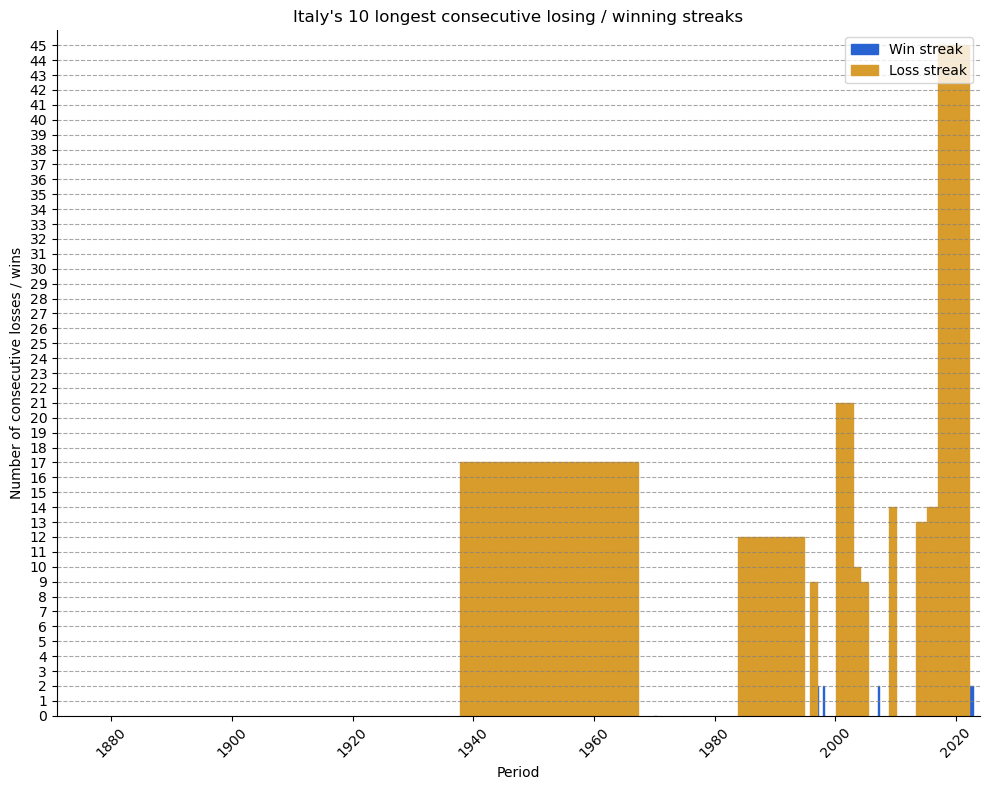

In [53]:
plt.figure(figsize=(10, 8))
for i in range(10):
    
    begin_win_date = datetime.strptime(win_begin_it[i], '%Y-%m-%d')
    end_win_date = datetime.strptime(win_end_it[i], '%Y-%m-%d')
    x_win = np.array([begin_win_date, end_win_date])
    y_win = np.array([win_row_it[i], win_row_it[i]])
    plt.fill_between(x_win, 0, y_win, color='#2763D3')
    
    
    begin_loss_date = datetime.strptime(loss_begin_it[i], '%Y-%m-%d')
    end_loss_date = datetime.strptime(loss_end_it[i], '%Y-%m-%d')
    x_loss = np.array([begin_loss_date, end_loss_date])
    y_loss = np.array([loss_row_it[i], loss_row_it[i]])
    plt.fill_between(x_loss, 0, y_loss, color='#d89c2c')
    
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive losses / wins')
plt.title('Italy\'s 10 longest consecutive losing / winning streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))  
plt.ylim(0, max(loss_row_it) + 1)
plt.yticks(range(max(loss_row_it) + 1))
plt.tight_layout()
plt.legend(['Win streak', 'Loss streak'])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe in this summary diagram the periods of both winning and losing streaks for the Italian national rugby team. The diagram underscores the prevalence of losing streaks compared to the relatively few winning streaks. Despite this challenging landscape, it's evident that the Italian team possesses a remarkable level of courage and determination, continuously taking on other nations in the face of defeats and even humiliations. The Italians' resilience and wholehearted approach to the sport are truly commendable, showcasing their unwavering passion and commitment to the game.

<div align="center">
  <h3>Conclusion</h3>
</div>

---

In conclusion, the evolution of the Italian national rugby team's performance in terms of victories and defeats against the top 10 teams worldwide reveals a challenging journey marked by limited opportunities and significant hurdles. Italy's relatively young status as a rugby nation has contributed to the lower number of matches played against other teams, consistently falling below 50 matches. This can be attributed to Italy's historical position as a secondary rugby power before joining the higher-tier tournaments like the 5 Nations, later transformed into the 6 Nations.

A distinctive trend emerges in the win rates against various teams, with Italy's overall win rate standing at a modest 9.92%. This rate fails to surpass 25% against any team, and notably remains below 10% when facing Australia, France, New Zealand, South Africa, and Wales. While Italy's win rate against Scotland is the highest among its competitors, their struggles against other major rugby nations are evident. It's also crucial to note Italy's lack of victories against England and New Zealand, highlighting the challenges they face against these formidable opponents.

On recent years' win rates, Italy has had a win rate of 0% against other teams. Despite this, Italy's victories against Australia and Wales serve as historic milestones within their recent performances. However, the overall win rate since 2019 remains low at 7.41%, a reflection of Italy's historical struggles against first-tier rugby nations.

The longest winning streaks of Italy are characterized by only four instances of consecutive victories, each consisting of just two wins in succession. These peaks have primarily occurred between 1997 and 2022, emphasizing recent progress in the team's performance.

Conversely, Italy's longest losing streaks showcase two distinct periods. The first, from 1937 to 1967, saw Italy's development as a rugby nation after World War II. Despite facing challenges, their limited presence in matches against the top 10 nations contributed to a relatively lower number of losses. The second period, starting from 1980 and extending to the present day, is marked by Italy's inclusion in higher-level tournaments like the Six Nations. This led to an increase in matches against top teams and, unfortunately, a series of losses as Italy navigated its entry into the world's rugby elite.

The summary diagram illustrates the Italian national rugby team's journey through both winning and losing streaks. While losses significantly outnumber wins, the diagram reflects the determination and resilience of the Italian team. Their unwavering spirit and commitment shine through, exemplifying the heart and passion they bring to the sport despite the challenges and setbacks they've faced, like their historic captain Sergio Parisse, who despite the defeats was always there to fight for the team. Italy's problem is that it is too strong for second-rate nations (Canada, Portugal, Romania) but too weak for first-rate nations.

<div align="center">
  <h2>VIII. Historical Analysis of <i> the All Blacks </i> </h2>
</div>

Here is a more precise analysis of the data for New Zealand.




<img src="img/Logo_Rugby_Nouvelle-Zélande.svg" alt="Logo New Zealand" style="width: 35%;">

<div align="center">
  <h3>1. Triumphs insights</h3>
</div>

---

&rarr; New Zealand's win rate against each team:

Number of official matches against New Zealand for each team:
Argentina: 35 matches
Australia: 173 matches
England: 42 matches
France: 62 matches
Ireland: 36 matches
Italy: 15 matches
Scotland: 31 matches
South Africa: 103 matches
Wales: 36 matches


Number of wins for New Zealand against each team:
Argentina: 32 wins
Australia: 121 wins
England: 33 wins
France: 48 wins
Ireland: 30 wins
Italy: 15 wins
Scotland: 29 wins
South Africa: 61 wins
Wales: 33 wins


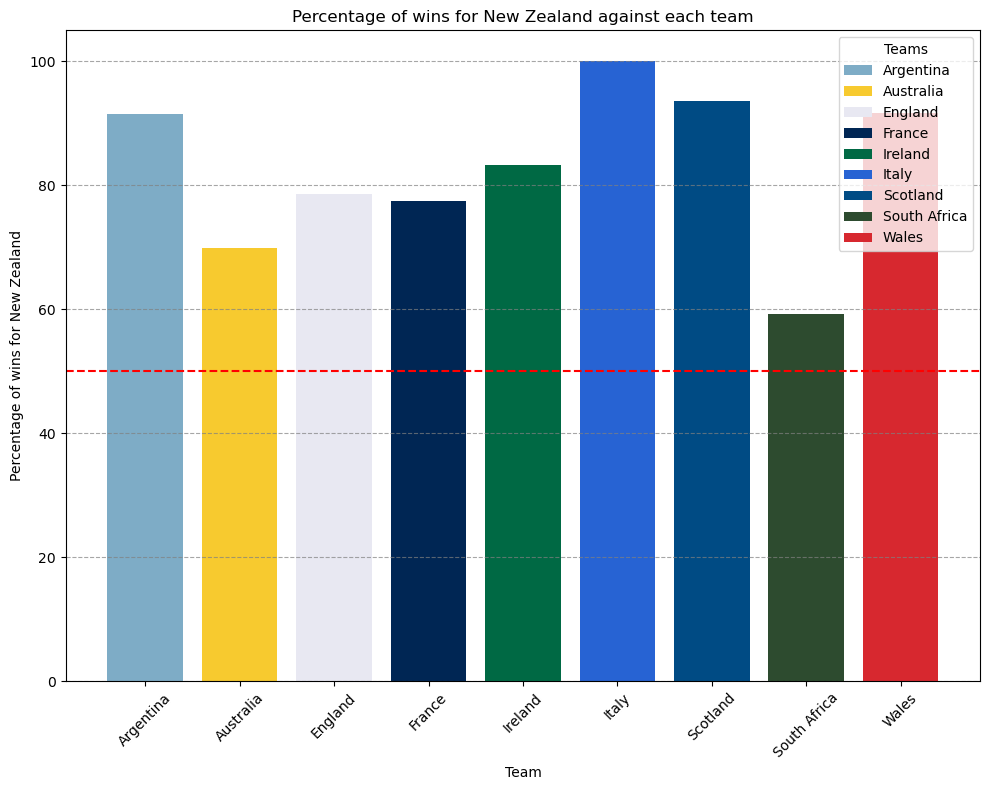

In [54]:
nz_opponent = {
    'Argentina',
    'Australia',
    'England',
    'France',
    'Ireland',
    'Italy',
    'Scotland',
    'South Africa',
    'Wales'
}

nz_match = {team: 0 for team in nz_opponent}
nz_win = {team: 0 for team in nz_opponent}
nz_ratio = {}

for index, row in df.iterrows():
    for team in nz_opponent:
        if row['home_team'] == team and row['away_team'] == 'New Zealand':
            nz_match[team] += 1
            if row['winner'] == 'New Zealand':
                nz_win[team] += 1
        elif row['home_team'] == 'New Zealand' and row['away_team'] == team:
            nz_match[team] += 1
            if row['winner'] == 'New Zealand':
                nz_win[team] += 1
              

for team in nz_win:
    ratio = (nz_win[team] / nz_match[team]) * 100 if nz_match[team] > 0 else 0
    nz_ratio[team] = ratio


print("\033[1mNumber of official matches against New Zealand for each team:\033[0m")
for team, matches in dict(sorted(nz_match.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {matches} matches\033[0m")


print("\n")

print("\033[1mNumber of wins for New Zealand against each team:\033[0m")
for team, wins in dict(sorted(nz_win.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {wins} wins\033[0m")    


plt.figure(figsize=(10, 8))
for team in sorted(nz_opponent):
    plt.bar(team, dict(sorted(nz_ratio.items()))[team], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins for New Zealand')
plt.title('Percentage of wins for New Zealand against each team')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()

We observe that the number of matches against Australia logically surpasses those against other teams. This can be attributed to their geographical proximity as neighboring nations, which made arranging matches more practical, especially during the early years when travel distances were greater than they are today. Additionally, the nearly one hundred matches against South Africa are also notable, particularly when compared to matches against other teams. This can be partly attributed to the fact that Australia, New Zealand, South Africa, and more recently Argentina participate in the annual tournament known as <i> The Rugby Championship </i>.

Furthermore, New Zealand's win rate is nothing short of impressive, standing at more than 75% since 1871 against the best teams in the world. This statistic truly underscores the sheer dominance of New Zealand rugby. It's no mere coincidence that a country with a population of less than 5 million has secured the Rugby World Cup title three times.

Remarkably, the win rate against all teams consistently exceeds 50%, with figures even approaching 80% against the majority of opponents. This level of performance is undeniably awe-inspiring and serves as a testament to New Zealand's rugby prowess.

&rarr; New Zealand's win rate against each team since the last World Cup (2019):

Number of matches against New Zealand for each team:
Argentina: 6 matches
Australia: 7 matches
England: 0 matches
France: 1 matches
Ireland: 4 matches
Italy: 1 matches
Scotland: 0 matches
South Africa: 4 matches
Wales: 1 matches


Number of wins for New Zealand against each team:
Argentina: 4 wins
Australia: 5 wins
England: 0 wins
France: 0 wins
Ireland: 1 wins
Italy: 1 wins
Scotland: 0 wins
South Africa: 2 wins
Wales: 1 wins

Global win rate for New Zealand since the last WC: 58.33%


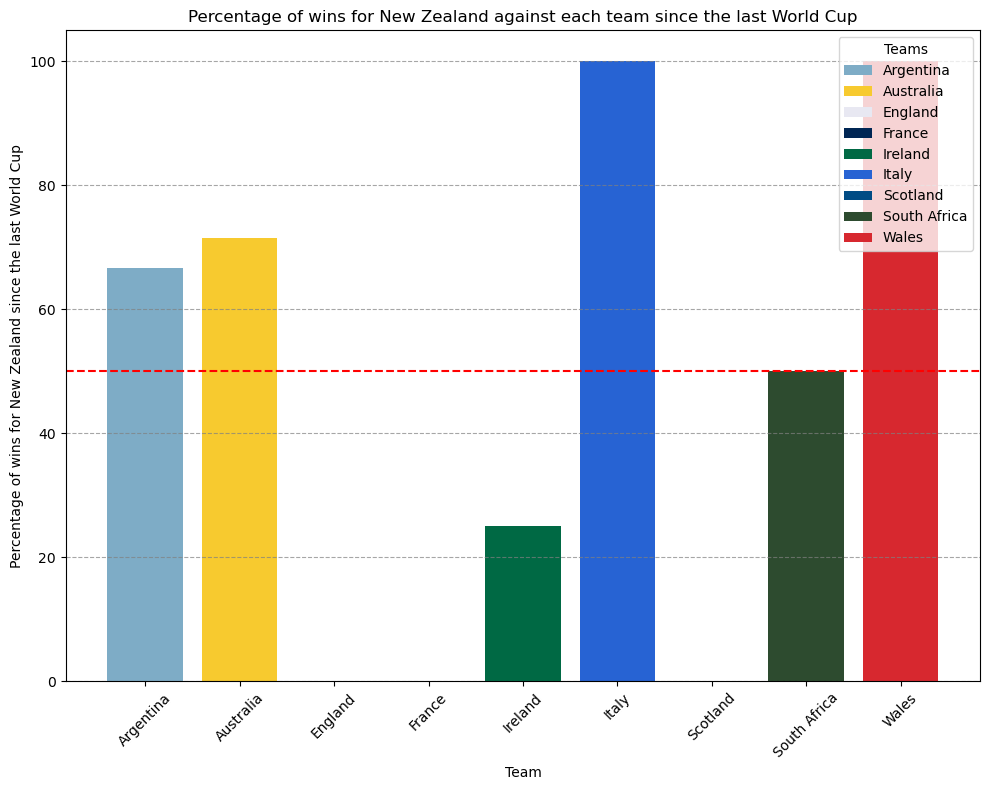

In [55]:
nz_match_2020 = {team: 0 for team in nz_opponent}
nz_win_2020 = {team: 0 for team in nz_opponent}
nz_ratio_2020 = {}

for index, row in df.iterrows():
    if row['year'] >= 2020:
        for team in nz_opponent:
            if row['home_team'] == team and row['away_team'] == 'New Zealand':
                nz_match_2020[team] += 1
                if row['winner'] == 'New Zealand':
                    nz_win_2020[team] += 1
            elif row['home_team'] == 'New Zealand' and row['away_team'] == team:
                nz_match_2020[team] += 1
                if row['winner'] == 'New Zealand':
                    nz_win_2020[team] += 1

for team in nz_win_2020:
    ratio = (nz_win_2020[team] / nz_match_2020[team]) * 100 if nz_match_2020[team] > 0 else 0
    nz_ratio_2020[team] = ratio

total_nz_win_2020 = sum(nz_win_2020.values())
total_nz_match_2020 = sum(nz_match_2020.values())



print("\033[1mNumber of matches against New Zealand for each team:\033[0m")
for team, matches in dict(sorted(nz_match_2020.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {matches} matches\033[0m")


print("\n")

print("\033[1mNumber of wins for New Zealand against each team:\033[0m")
for team, wins in dict(sorted(nz_win_2020.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {wins} wins\033[0m")

global_win_rate_nz_2020 = (total_nz_win_2020 / total_nz_match_2020) * 100
print("\nGlobal win rate for New Zealand since the last WC: {:.2f}%".format(global_win_rate_nz_2020))



plt.figure(figsize=(10, 8))
for team in sorted(nz_opponent):
    plt.bar(team, nz_ratio_2020[team], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins for New Zealand since the last World Cup')
plt.title('Percentage of wins for New Zealand against each team since the last World Cup')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()

We can observe that the win rate against Argentina, Australia, and South Africa is within the standards expected for the New Zealand team, as is the case against Italy, Scotland, and Wales, where the win rate stands at 100%. However, the win rate against Ireland is notably low due to Ireland's impressive performance since the last World Cup.

The win rates should be interpreted cautiously for matches against England and France, as the very low number of matches played against these two teams does not accurately reflect the true level of New Zealand's performance. In fact, the win rate against both England and France is 0%, but this is based on a single match played against each team, which makes it difficult to draw meaningful conclusions about New Zealand's performance against them.

&rarr; New Zealand's longest winning streaks:

+--------+--------------+--------------+------------+
|   Rank |   Win Streak | Begin Date   | End Date   |
+========+==============+==============+============+
|      1 |           16 | 2013-06-08   | 2014-06-21 |
+--------+--------------+--------------+------------+
|      2 |           15 | 2005-08-13   | 2006-08-26 |
+--------+--------------+--------------+------------+
|      3 |           15 | 2009-09-19   | 2010-09-11 |
+--------+--------------+--------------+------------+
|      4 |           15 | 2015-08-15   | 2016-10-22 |
+--------+--------------+--------------+------------+
|      5 |           13 | 1965-09-18   | 1969-06-14 |
+--------+--------------+--------------+------------+
|      6 |           13 | 2011-09-24   | 2012-10-06 |
+--------+--------------+--------------+------------+
|      7 |           12 | 1988-07-30   | 1990-08-04 |
+--------+--------------+--------------+------------+
|      8 |           10 | 1997-06-21   | 1997-11-29 |
+--------+--------------+---

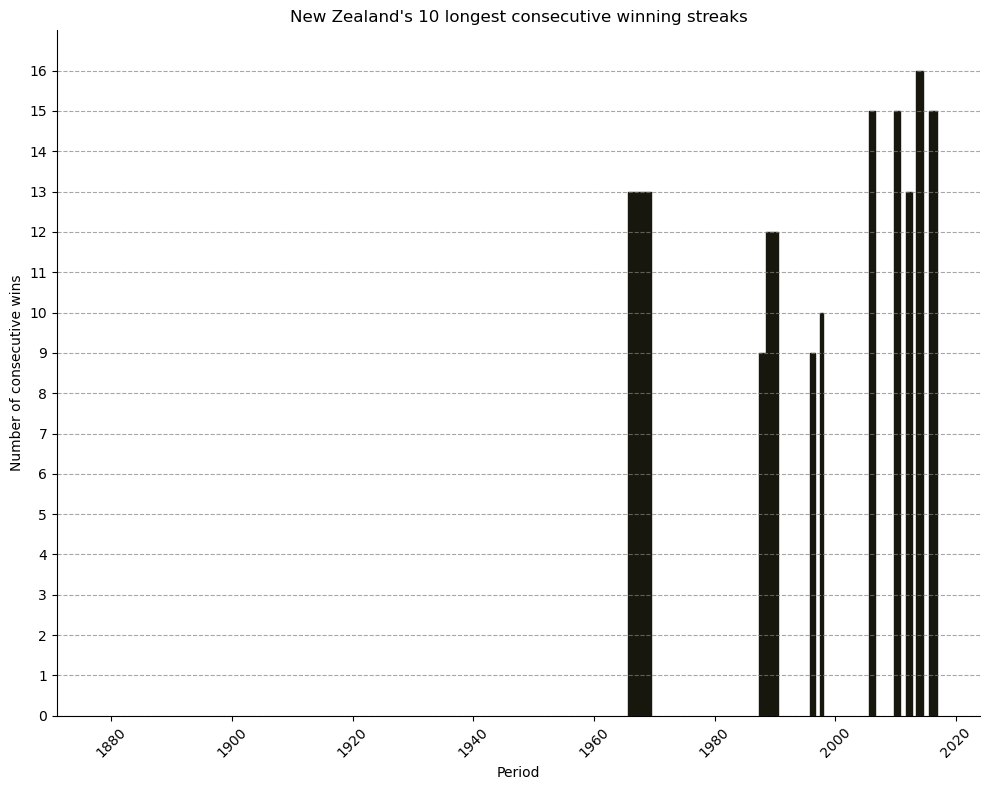

In [56]:
nz_win_streaks = []

current_win_streak_nz = 0
win_begin_date_nz = None
win_end_date_nz = None

for index, row in df.iterrows():
    if row['home_team'] == 'New Zealand' or row['away_team'] == 'New Zealand':
        if row['winner'] == 'New Zealand':
            if current_win_streak_nz == 0:
                win_begin_date_nz = row['date']
            current_win_streak_nz += 1
            win_end_date_nz = row['date']
        else:
            if current_win_streak_nz > 1:
                nz_win_streaks.append({
                    'begin_date': win_begin_date_nz,
                    'end_date': win_end_date_nz,
                    'wins_streak': current_win_streak_nz
                })
            current_win_streak_nz = 0

sorted_nz_win_streaks = sorted(nz_win_streaks, key=lambda x: x['wins_streak'], reverse=True)

win_table_data_nz = []
for i, win_streak in enumerate(sorted_nz_win_streaks[:10], start=1):
    win_table_data_nz.append([i, win_streak['wins_streak'], win_streak['begin_date'].strftime('%Y-%m-%d'), win_streak['end_date'].strftime('%Y-%m-%d')])

win_table_nz = pd.DataFrame(win_table_data_nz, columns=['Rank', 'Win Streak', 'Begin Date', 'End Date'])
print(tabulate(win_table_nz, headers='keys', tablefmt='grid', showindex=False))





win_begin_nz = ['1965-09-18', '1987-05-22', '1988-07-30', '1995-11-18', '1997-06-21', '2005-08-13', '2009-09-19', '2011-09-24', '2013-06-08', '2015-08-15']
win_end_nz = ['1969-06-14', '1988-07-03', '1990-08-04', '1996-08-24', '1997-11-29', '2006-08-26', '2010-09-11', '2012-10-06', '2014-06-21', '2016-10-22']
win_row_nz = [13, 9, 12, 9, 10, 15, 15, 13, 16, 15]

plt.figure(figsize=(10, 8))
for i in range(10):
    begin_win_date = datetime.strptime(win_begin_nz[i], '%Y-%m-%d')
    end_win_date = datetime.strptime(win_end_nz[i], '%Y-%m-%d')
    
    x_win = np.array([begin_win_date, end_win_date])
    y_win = np.array([win_row_nz[i], win_row_nz[i]])
    
    plt.fill_between(x_win, 0, y_win, color='#17170d')
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive wins')
plt.title('New Zealand\'s 10 longest consecutive winning streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))  
plt.ylim(0, max(win_row_nz) + 1)
plt.yticks(range(max(win_row_nz) + 1))
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe the longest winning streaks of New Zealand. One notable aspect to highlight is that, despite the impressive number of victories achieved by the All Blacks, periods of sustained win streaks only began to emerge after 1965. However, from this point onwards, New Zealand embarked on a remarkable journey of dominating the world of rugby to an extraordinary extent.

Notably, in June 2004, New Zealand reclaimed the top spot in the World Rugby rankings, a position they held until the 2007 World Cup. After that, the ranking was briefly taken by South Africa until November 30, 2009. Subsequently, from November 30, 2009, to August 19, 2019, New Zealand firmly and indisputably established their monopoly over the highest ranking in world rugby.

&rarr; New Zealand's largest wins against each team:

In [57]:
nz_largest_win = {team: {'win_difference': 0, 'home_score': 0, 'away_score': 0, 'stadium': None, 'date': None} for team in nz_opponent}

for index, row in df.iterrows():
    for team in nz_opponent:
        if row['home_team'] == team and row['away_team'] == 'New Zealand':
            if row['winner'] == 'New Zealand':
                win_difference = abs(row['away_score'] - row['home_score'])
                if win_difference > nz_largest_win[team]['win_difference']:
                    nz_largest_win[team]['win_difference'] = win_difference
                    nz_largest_win[team]['home_score'] = row['home_score']
                    nz_largest_win[team]['away_score'] = row['away_score']
                    nz_largest_win[team]['stadium'] = row['stadium']
                    nz_largest_win[team]['date'] = row['date'].strftime('%Y-%m-%d')
        elif row['home_team'] == 'New Zealand' and row['away_team'] == team:
            if row['winner'] == 'New Zealand':
                win_difference = abs(row['away_score'] - row['home_score'])
                if win_difference > nz_largest_win[team]['win_difference']:
                    nz_largest_win[team]['win_difference'] = win_difference
                    nz_largest_win[team]['home_score'] = row['home_score']
                    nz_largest_win[team]['away_score'] = row['away_score']
                    nz_largest_win[team]['stadium'] = row['stadium']
                    nz_largest_win[team]['date'] = row['date'].strftime('%Y-%m-%d')

                    
for team in sorted(nz_largest_win.keys()):
    data = nz_largest_win[team]
    color = team_colors.get(team, 'black')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m"
          f"\033[1m\033[3m{team}\033[0m")
    print(f"Score Difference: {data['win_difference']}")
    print(f"Home Score: {data['home_score']}")
    print(f"Away Score: {data['away_score']}")
    print(f"Stadium: {data['stadium']}")
    print(f"Date: {data['date']}")
    print("-" * 20)

Argentina
Score Difference: 85
Home Score: 93
Away Score: 8
Stadium: Athletic Park
Date: 1997-06-21
--------------------
Australia
Score Difference: 38
Home Score: 5
Away Score: 43
Stadium: Stadium Australia
Date: 2020-10-31
--------------------
England
Score Difference: 42
Home Score: 64
Away Score: 22
Stadium: Carisbrook
Date: 1998-06-20
--------------------
France
Score Difference: 51
Home Score: 61
Away Score: 10
Stadium: Westpac Stadium
Date: 2007-06-09
--------------------
Ireland
Score Difference: 60
Home Score: 60
Away Score: 0
Stadium: Waikato Stadium
Date: 2012-06-23
--------------------
Italy
Score Difference: 98
Home Score: 101
Away Score: 3
Stadium: McAlpine Stadium
Date: 1999-10-14
--------------------
Scotland
Score Difference: 49
Home Score: 69
Away Score: 20
Stadium: Carisbrook
Date: 2000-06-24
--------------------
South Africa
Score Difference: 57
Home Score: 57
Away Score: 0
Stadium: North Harbour Stadium
Date: 2017-09-16
--------------------
Wales
Score Difference: 

We can observe the most significant victories of New Zealand (in terms of score difference) against each of the other teams. Notably, all of these victories took place after 1997, a period when the New Zealand team was imposing an almost dictatorial dominance over the World Rugby rankings. During this era, the All Blacks were held in awe by other nations, and the prospect of facing this legendary team was a daunting challenge for any opponent. This unparalleled reign of the All Blacks instilled fear and respect across the rugby world for decades.

<div align="center">
  <h3>2. Debacles insights</h3>
</div>

---

&rarr; New Zealand's longest losing streaks:

+--------+---------------+--------------+------------+
|   Rank |   Loss Streak | Begin Date   | End Date   |
+========+===============+==============+============+
|      1 |             6 | 1949-07-16   | 1949-09-24 |
+--------+---------------+--------------+------------+
|      2 |             5 | 1998-07-11   | 1998-08-29 |
+--------+---------------+--------------+------------+
|      3 |             3 | 1976-09-04   | 1977-11-11 |
+--------+---------------+--------------+------------+
|      4 |             3 | 1993-11-27   | 1994-07-03 |
+--------+---------------+--------------+------------+
|      5 |             3 | 2022-07-09   | 2022-08-06 |
+--------+---------------+--------------+------------+
|      6 |             2 | 1929-07-20   | 1929-07-27 |
+--------+---------------+--------------+------------+
|      7 |             2 | 1935-12-21   | 1936-01-04 |
+--------+---------------+--------------+------------+
|      8 |             2 | 1937-09-04   | 1937-09-25 |
+--------+

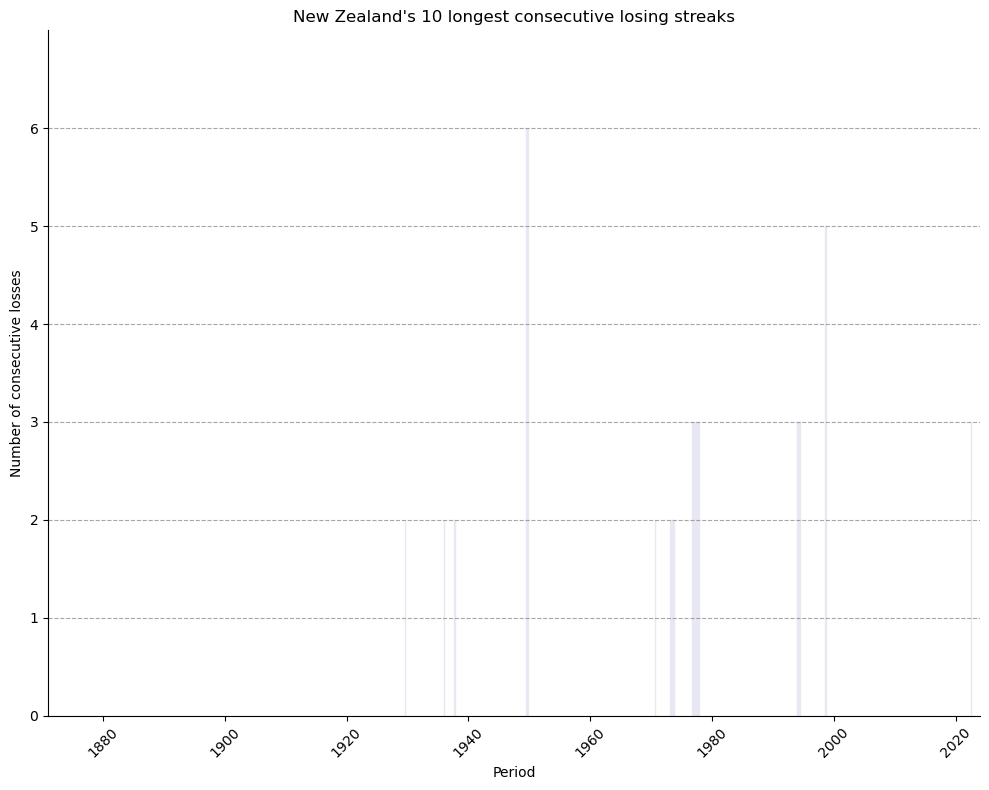

In [58]:
nz_loss_streaks = []

current_loss_streak_nz = 0
loss_begin_date_nz = None
loss_end_date_nz = None

for index, row in df.iterrows():
    if row['home_team'] == 'New Zealand' or row['away_team'] == 'New Zealand':
        if row['winner'] != 'New Zealand' and row['winner'] != None:
            if current_loss_streak_nz == 0:
                loss_begin_date_nz = row['date']
            current_loss_streak_nz += 1
            loss_end_date_nz = row['date']
        else:
            if current_loss_streak_nz > 1:
                nz_loss_streaks.append({
                    'begin_date': loss_begin_date_nz,
                    'end_date': loss_end_date_nz,
                    'loss_streak': current_loss_streak_nz
                })
            current_loss_streak_nz = 0

            
sorted_nz_loss_streaks = sorted(nz_loss_streaks, key=lambda x: x['loss_streak'], reverse=True)

loss_table_data_nz = []
for i, loss_streak in enumerate(sorted_nz_loss_streaks[:10], start=1):
    loss_table_data_nz.append([i, loss_streak['loss_streak'], loss_streak['begin_date'].strftime('%Y-%m-%d'), loss_streak['end_date'].strftime('%Y-%m-%d')])

loss_table_nz = pd.DataFrame(loss_table_data_nz, columns=['Rank', 'Loss Streak', 'Begin Date', 'End Date'])
print(tabulate(loss_table_nz, headers='keys', tablefmt='grid', showindex=False))






loss_begin_nz = ['1929-07-20', '1935-12-21', '1937-09-04', '1949-07-16', '1970-08-29', '1973-02-10', '1976-09-04', '1993-11-27', '1998-07-11', '2022-07-09']
loss_end_nz = ['1929-07-27', '1936-01-04', '1937-09-25', '1949-09-24', '1970-09-12', '1973-09-15', '1977-11-11', '1994-07-03', '1998-08-29', '2022-08-06']
loss_row_nz = [2, 2, 2, 6, 2, 2, 3, 3, 5, 3]

plt.figure(figsize=(10, 8))
for i in range(10):
    begin_loss_date = datetime.strptime(loss_begin_nz[i], '%Y-%m-%d')
    end_loss_date = datetime.strptime(loss_end_nz[i], '%Y-%m-%d')
    
    x_loss = np.array([begin_loss_date, end_loss_date])
    y_loss = np.array([loss_row_nz[i], loss_row_nz[i]])
    
    plt.fill_between(x_loss, 0, y_loss, color='#E8E8F2')
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive losses')
plt.title('New Zealand\'s 10 longest consecutive losing streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))    
plt.ylim(0, max(loss_row_nz) + 1)
plt.yticks(range(max(loss_row_nz) + 1))
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe the longest losing streaks of New Zealand. Despite the All Blacks' incredibly high win rate, there have also been moments of crisis in their history. Notably, these challenging periods occurred during the 1930s-1940s and again in the 1970s. While the duration of these losing streaks remains relatively limited, with a maximum of 6 losses in a row, they stand as rare instances when New Zealand faced difficulties and setbacks on the rugby field.

&rarr; New Zealand's largest losses against each team:

In [59]:
nz_largest_loss = {team: {'loss_difference': 0, 'home_score': 0, 'away_score': 0, 'stadium': None, 'date': None} for team in nz_opponent}

for index, row in df.iterrows():
    for team in nz_opponent:
        if row['home_team'] == team and row['away_team'] == 'New Zealand':
            if row['winner'] != 'New Zealand':
                loss_difference = abs(row['away_score'] - row['home_score'])
                if loss_difference > nz_largest_loss[team]['loss_difference']:
                    nz_largest_loss[team]['loss_difference'] = loss_difference
                    nz_largest_loss[team]['home_score'] = row['home_score']
                    nz_largest_loss[team]['away_score'] = row['away_score']
                    nz_largest_loss[team]['stadium'] = row['stadium']
                    nz_largest_loss[team]['date'] = row['date'].strftime('%Y-%m-%d')
        elif row['home_team'] == 'New Zealand' and row['away_team'] == team:
            if row['winner'] != 'New Zealand':
                loss_difference = abs(row['away_score'] - row['home_score'])
                if loss_difference > nz_largest_loss[team]['loss_difference']:
                    nz_largest_loss[team]['loss_difference'] = loss_difference
                    nz_largest_loss[team]['home_score'] = row['home_score']
                    nz_largest_loss[team]['away_score'] = row['away_score']
                    nz_largest_loss[team]['stadium'] = row['stadium']
                    nz_largest_loss[team]['date'] = row['date'].strftime('%Y-%m-%d')
    
for team in sorted(nz_largest_loss.keys()):
    data = nz_largest_loss[team]
    color = team_colors.get(team, 'black')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m"
          f"\033[1m\033[3m{team}\033[0m")
    if data['date'] is not None:
        print(f"Score Difference: {data['loss_difference']}")
        print(f"Home Score: {data['home_score']}")
        print(f"Away Score: {data['away_score']}")
        print(f"Stadium: {data['stadium']}")
        print(f"Date: {data['date']}")
    else:
        print(f"{team} NEVER DEFEATED New Zealand")
    print("-" * 20)

Argentina
Score Difference: 10
Home Score: 15
Away Score: 25
Stadium: Bankwest Stadium
Date: 2020-11-14
--------------------
Australia
Score Difference: 21
Home Score: 28
Away Score: 7
Stadium: Stadium Australia
Date: 1999-08-28
--------------------
England
Score Difference: 17
Home Score: 38
Away Score: 21
Stadium: Twickenham Stadium
Date: 2012-12-01
--------------------
France
Score Difference: 15
Home Score: 40
Away Score: 25
Stadium: Stade de France
Date: 2021-11-20
--------------------
Ireland
Score Difference: 11
Home Score: 40
Away Score: 29
Stadium: Soldier Field
Date: 2016-11-05
--------------------
Italy
Italy NEVER DEFEATED New Zealand
--------------------
Scotland
Scotland NEVER DEFEATED New Zealand
--------------------
South Africa
Score Difference: 17
Home Score: 17
Away Score: 0
Stadium: Kingsmead
Date: 1928-06-30
--------------------
Wales
Score Difference: 5
Home Score: 13
Away Score: 8
Stadium: National Stadium
Date: 1953-12-19
--------------------


We can observe the most significant losses of New Zealand (in terms of score difference) against each of the other teams. Notably, Italy and Scotland have never managed to secure victories against New Zealand, which might be surprising for some. Interestingly, most of these losses occurred in a relatively recent timeframe, spanning from 1999 to 2021. This period aligns with New Zealand's era of great rugby dominance. While these defeats are notable, they also play a crucial role in shaping and strengthening teams, highlighting that even the most formidable opponents can face setbacks and challenges on their journey.

<div align="center">
  <h3>3. New Zealand's winning and losing periods</h3>
</div>

---

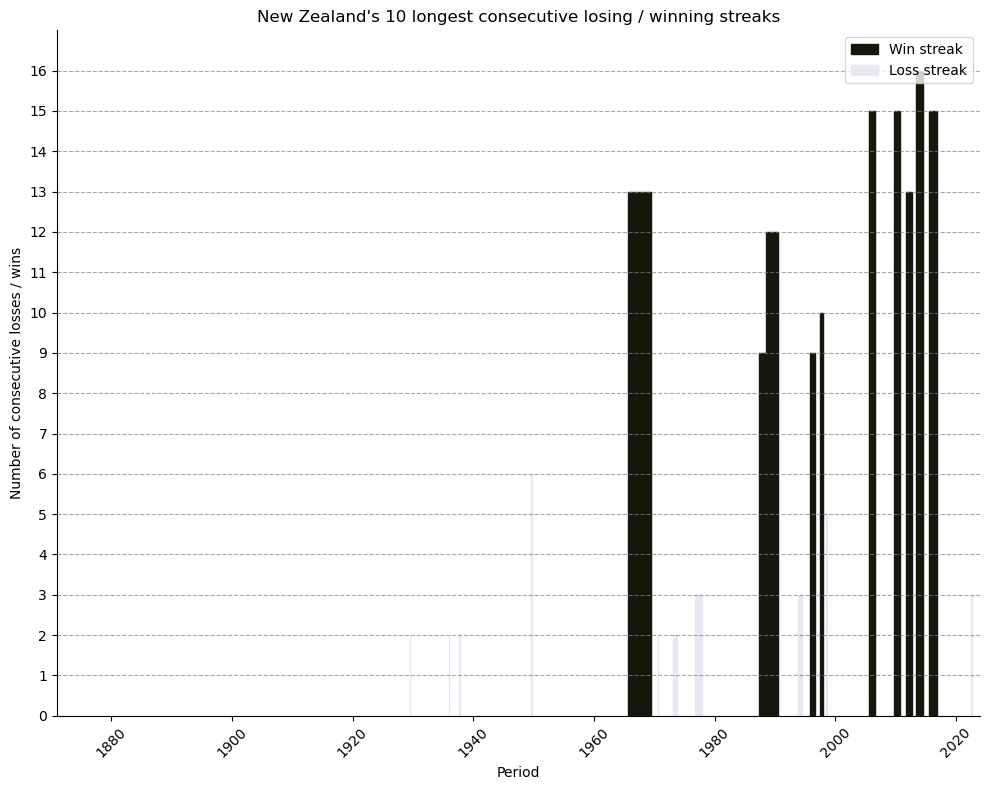

In [60]:
plt.figure(figsize=(10, 8))
for i in range(10):
    
    begin_win_date = datetime.strptime(win_begin_nz[i], '%Y-%m-%d')
    end_win_date = datetime.strptime(win_end_nz[i], '%Y-%m-%d')
    x_win = np.array([begin_win_date, end_win_date])
    y_win = np.array([win_row_nz[i], win_row_nz[i]])
    plt.fill_between(x_win, 0, y_win, color='#17170d')
    
    
    begin_loss_date = datetime.strptime(loss_begin_nz[i], '%Y-%m-%d')
    end_loss_date = datetime.strptime(loss_end_nz[i], '%Y-%m-%d')
    x_loss = np.array([begin_loss_date, end_loss_date])
    y_loss = np.array([loss_row_nz[i], loss_row_nz[i]])
    plt.fill_between(x_loss, 0, y_loss, color='#E8E8F2')
    
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive losses / wins')
plt.title('New Zealand\'s 10 longest consecutive losing / winning streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))  
plt.ylim(0, max(win_row_nz) + 1)
plt.yticks(range(max(win_row_nz) + 1))
plt.tight_layout()
plt.legend(['Win streak', 'Loss streak'])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe in this summary diagram the periods of both winning and losing streaks for the New Zealand national rugby team. The diagram accentuates the overwhelming prevalence of winning streaks throughout New Zealand's history. However, it's important to note that there have been some periods of consecutive losses as well. This underscores the fact that despite New Zealand's legendary and formidable status, it's not immune to experiencing challenges and setbacks.

<div align="center">
  <h3>Conclusion</h3>
</div>

---

In conclusion, the evolution of the New Zealand national rugby team's performance against the top 10 teams in the world is nothing short of remarkable. The observation of match statistics reveals intriguing trends and insights into the team's journey.

The prevalence of matches against Australia, South Africa, and other neighboring nations is understandable due to geographical proximity, fostering practical arrangements for matches. The notable number of encounters with South Africa is further amplified by the participation of these nations in The Rugby Championship, contributing to a robust fixture list.

New Zealand's extraordinary win rate of over 75% against the best teams since 1871 speaks volumes about their rugby prowess. This consistent dominance highlights the sheer magnitude of New Zealand rugby and their ability to consistently perform at the highest level. The remarkable win rate against all teams, often exceeding 50% and even nearing 80%, is a testament to the team's enduring excellence.

While win rates against certain teams adhere to expectations, interpreting figures against Ireland, England, and France requires caution due to limited match data. However, one cannot overlook New Zealand's unparalleled ability to maintain supremacy over the World Rugby rankings during different eras, establishing themselves as the pinnacle of the sport.

Even amidst moments of crisis, as seen in the longest losing streaks, the All Blacks have demonstrated resilience and an ability to overcome challenges. The iconic team's history showcases periods of sustained dominance intertwined with occasional setbacks, highlighting their human side and the essence of competition.

In summary, the New Zealand national rugby team's journey against the world's top teams reflects an enduring legacy of excellence and determination. Through periods of triumph and adversity, they have demonstrated the true spirit of rugby, captivating fans worldwide with their unparalleled skill, commitment, and sportsmanship.

<div align="center">
  <h2>IX. Historical Analysis of <i> the Thistle </i> </h2>
</div>

Here is a more precise analysis of the data for Scotland.




<img src="img/Scottish_Rugby_team_logo.svg" alt="Logo Scotland" style="width: 35%;">

<div align="center">
  <h3>1. Triumphs insights</h3>
</div>

---

&rarr; Scotland's win rate against each team:

Number of official matches against Scotland for each team:
Argentina: 21 matches
Australia: 33 matches
England: 140 matches
France: 99 matches
Ireland: 139 matches
Italy: 34 matches
New Zealand: 31 matches
South Africa: 28 matches
Wales: 128 matches


Number of wins for Scotland against each team:
Argentina: 10 wins
Australia: 12 wins
England: 45 wins
France: 39 wins
Ireland: 66 wins
Italy: 26 wins
New Zealand: 0 wins
South Africa: 5 wins
Wales: 50 wins


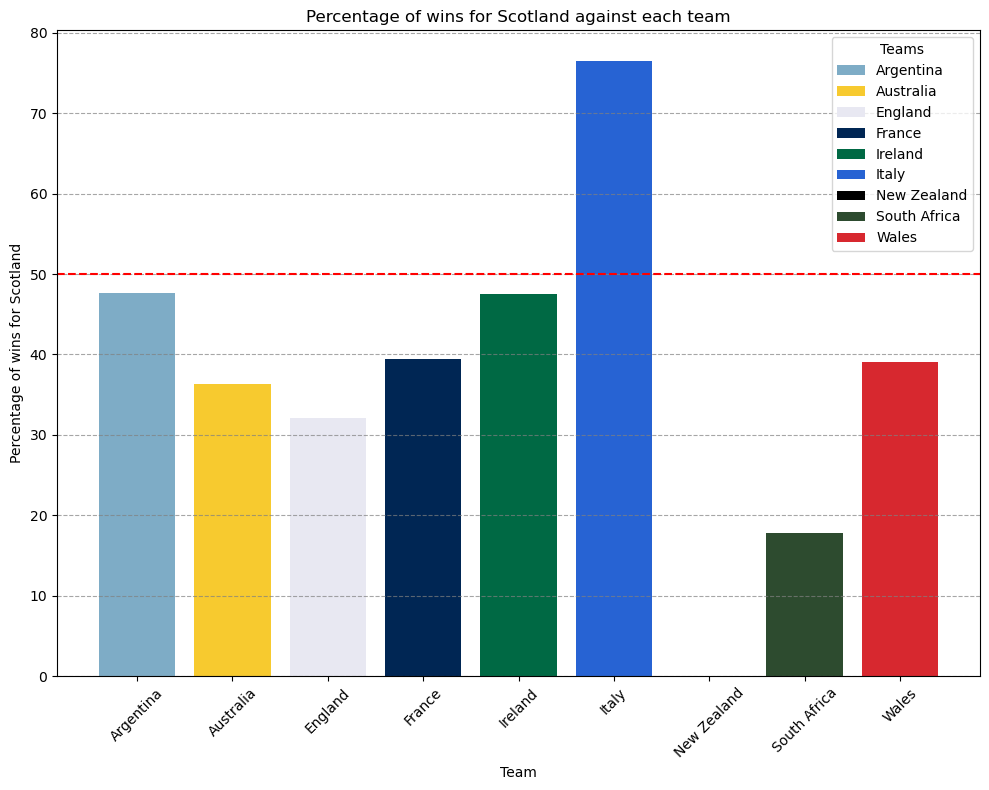

In [61]:
scot_opponent = {
    'Argentina',
    'Australia',
    'England',
    'France',
    'Ireland',
    'Italy',
    'New Zealand',
    'South Africa',
    'Wales'
}

scot_match = {team: 0 for team in scot_opponent}
scot_win = {team: 0 for team in scot_opponent}
scot_ratio = {}

for index, row in df.iterrows():
    for team in scot_opponent:
        if row['home_team'] == team and row['away_team'] == 'Scotland':
            scot_match[team] += 1
            if row['winner'] == 'Scotland':
                scot_win[team] += 1
        elif row['home_team'] == 'Scotland' and row['away_team'] == team:
            scot_match[team] += 1
            if row['winner'] == 'Scotland':
                scot_win[team] += 1
              

for team in scot_win:
    ratio = (scot_win[team] / scot_match[team]) * 100 if scot_match[team] > 0 else 0
    scot_ratio[team] = ratio


print("\033[1mNumber of official matches against Scotland for each team:\033[0m")
for team, matches in dict(sorted(scot_match.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {matches} matches\033[0m")


print("\n")

print("\033[1mNumber of wins for Scotland against each team:\033[0m")
for team, wins in dict(sorted(scot_win.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {wins} wins\033[0m")    


plt.figure(figsize=(10, 8))
for team in sorted(scot_opponent):
    plt.bar(team, dict(sorted(scot_ratio.items()))[team], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins for Scotland')
plt.title('Percentage of wins for Scotland against each team')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()

We can observe that the number of matches against British teams and France logically surpasses those against other teams, with approximately 100 matches compared to around 30. This can be attributed to their geographical proximity as neighboring nations, which made it more practical to arrange matches, especially in the earlier years when travel distances were greater. Additionally, considering that the roots of rugby originated in the British Isles, it's natural that a significant portion of matches took place there. The historic tournaments like the 4 and 5 Nations have further contributed to the higher number of matches between these nations.

Furthermore, a distinct trend is evident in the win rates against various teams. Notably, the win rate against all teams falls below the 50% mark, except for matches against Italy. It's noteworthy that Scotland has historically struggled against all the others, even against Argentina, which is generally considered slightly weaker. It's also important to mention that the win rate against South Africa is very low, below 20%, and the win rate against New Zealand drops even to 0%. Scotland has never won against the All Blacks; their best result is a draw.

It's important to acknowledge that these win rates are calculated based on data spanning from 1871 to the present day. To provide a more accurate reflection of current team dynamics, focusing on win rates over recent years would be advisable.

&rarr; Scotland's win rate against each team since the last World Cup (2019):

Number of matches against Scotland for each team:
Argentina: 3 matches
Australia: 1 matches
England: 3 matches
France: 4 matches
Ireland: 4 matches
Italy: 4 matches
New Zealand: 0 matches
South Africa: 1 matches
Wales: 3 matches


Number of wins for Scotland against each team:
Argentina: 1 wins
Australia: 1 wins
England: 2 wins
France: 2 wins
Ireland: 0 wins
Italy: 4 wins
New Zealand: 0 wins
South Africa: 0 wins
Wales: 1 wins

Global win rate for Scotland since the last WC: 47.83%


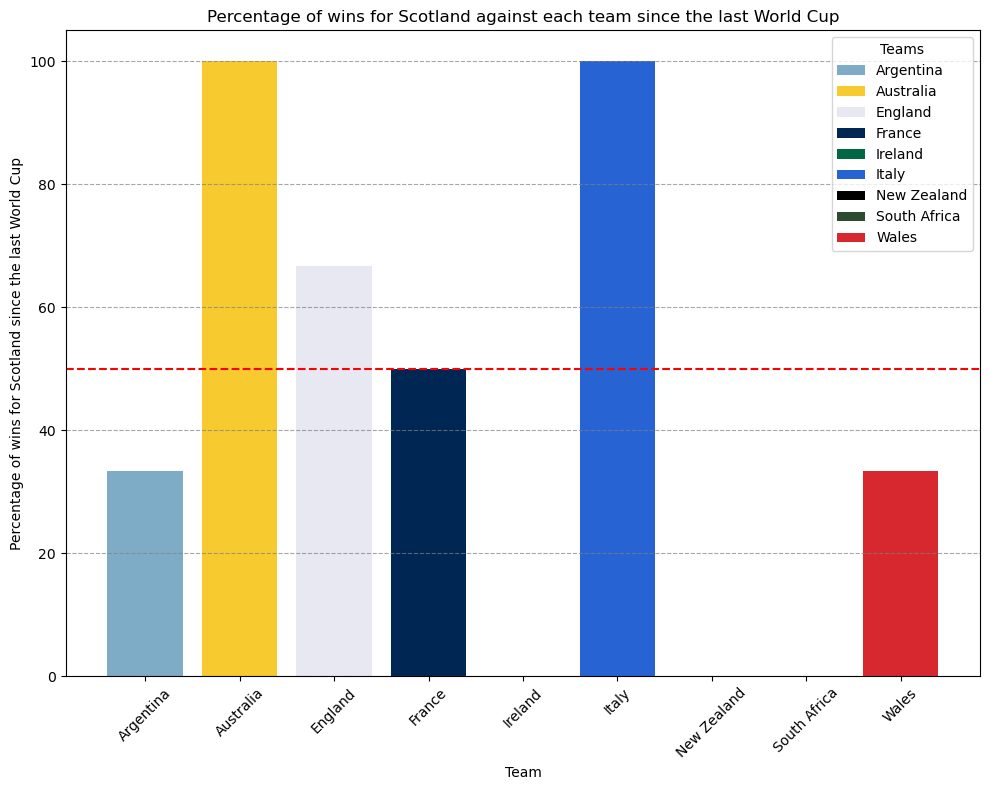

In [62]:
scot_match_2020 = {team: 0 for team in scot_opponent}
scot_win_2020 = {team: 0 for team in scot_opponent}
scot_ratio_2020 = {}

for index, row in df.iterrows():
    if row['year'] >= 2020:
        for team in scot_opponent:
            if row['home_team'] == team and row['away_team'] == 'Scotland':
                scot_match_2020[team] += 1
                if row['winner'] == 'Scotland':
                    scot_win_2020[team] += 1
            elif row['home_team'] == 'Scotland' and row['away_team'] == team:
                scot_match_2020[team] += 1
                if row['winner'] == 'Scotland':
                    scot_win_2020[team] += 1

for team in scot_win_2020:
    ratio = (scot_win_2020[team] / scot_match_2020[team]) * 100 if scot_match_2020[team] > 0 else 0
    scot_ratio_2020[team] = ratio

total_scot_win_2020 = sum(scot_win_2020.values())
total_scot_match_2020 = sum(scot_match_2020.values())



print("\033[1mNumber of matches against Scotland for each team:\033[0m")
for team, matches in dict(sorted(scot_match_2020.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {matches} matches\033[0m")


print("\n")

print("\033[1mNumber of wins for Scotland against each team:\033[0m")
for team, wins in dict(sorted(scot_win_2020.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {wins} wins\033[0m")

global_win_rate_scot_2020 = (total_scot_win_2020 / total_scot_match_2020) * 100
print("\nGlobal win rate for Scotland since the last WC: {:.2f}%".format(global_win_rate_scot_2020))



plt.figure(figsize=(10, 8))
for team in sorted(scot_opponent):
    plt.bar(team, scot_ratio_2020[team], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins for Scotland since the last World Cup')
plt.title('Percentage of wins for Scotland against each team since the last World Cup')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()

We can observe that the win rate against all other teams is within the Scottish standard, even though the Scots encountered 5 defeats against Ireland in this period. This can be attributed more to the fact that Ireland elevated their performance during this time. It is also notable for the high win rate against the historical English rival and the losses against the Springboks.

&rarr; Scotland's longest winning streaks:

+--------+--------------+--------------+------------+
|   Rank |   Win Streak | Begin Date   | End Date   |
+========+==============+==============+============+
|      1 |            6 | 1925-02-07   | 1926-02-06 |
+--------+--------------+--------------+------------+
|      2 |            5 | 1888-03-10   | 1890-02-22 |
+--------+--------------+--------------+------------+
|      3 |            5 | 1891-02-07   | 1892-02-20 |
+--------+--------------+--------------+------------+
|      4 |            5 | 1966-02-26   | 1967-02-04 |
+--------+--------------+--------------+------------+
|      5 |            4 | 1882-02-18   | 1883-02-17 |
+--------+--------------+--------------+------------+
|      6 |            4 | 1894-03-17   | 1895-03-09 |
+--------+--------------+--------------+------------+
|      7 |            4 | 1906-11-17   | 1907-03-16 |
+--------+--------------+--------------+------------+
|      8 |            4 | 1984-01-21   | 1984-03-17 |
+--------+--------------+---

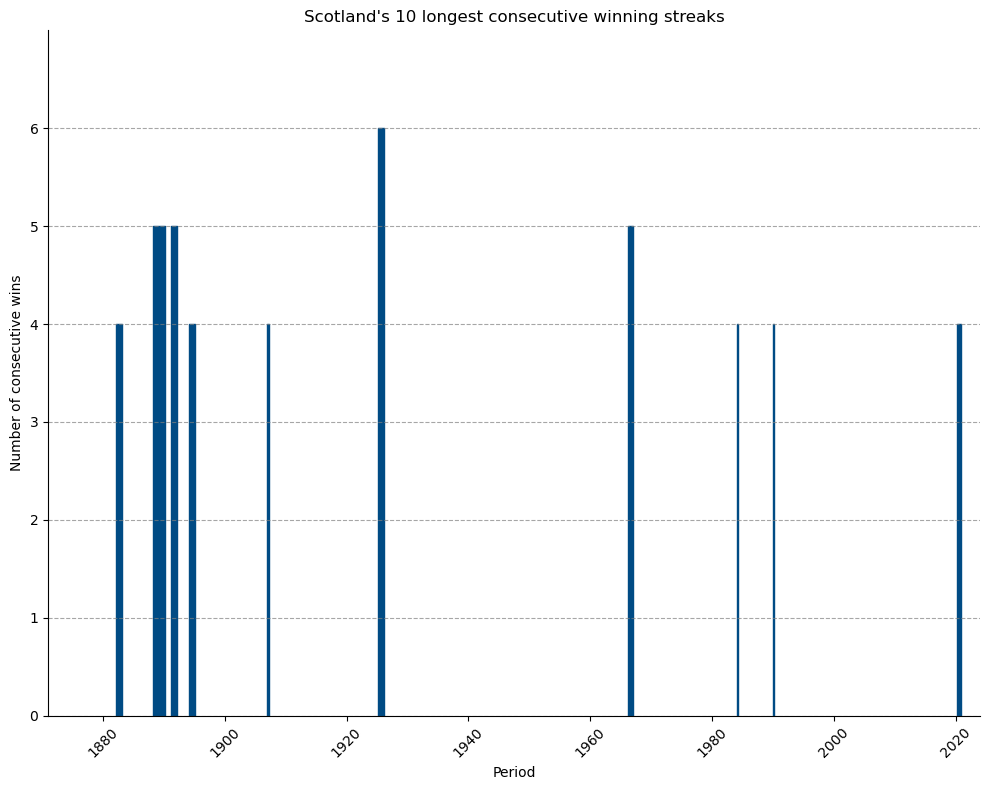

In [63]:
scot_win_streaks = []

current_win_streak_scot = 0
win_begin_date_scot = None
win_end_date_scot = None

for index, row in df.iterrows():
    if row['home_team'] == 'Scotland' or row['away_team'] == 'Scotland':
        if row['winner'] == 'Scotland':
            if current_win_streak_scot == 0:
                win_begin_date_scot = row['date']
            current_win_streak_scot += 1
            win_end_date_scot = row['date']
        else:
            if current_win_streak_scot > 1:
                scot_win_streaks.append({
                    'begin_date': win_begin_date_scot,
                    'end_date': win_end_date_scot,
                    'wins_streak': current_win_streak_scot
                })
            current_win_streak_scot = 0

sorted_scot_win_streaks = sorted(scot_win_streaks, key=lambda x: x['wins_streak'], reverse=True)

win_table_data_scot = []
for i, win_streak in enumerate(sorted_scot_win_streaks[:10], start=1):
    win_table_data_scot.append([i, win_streak['wins_streak'], win_streak['begin_date'].strftime('%Y-%m-%d'), win_streak['end_date'].strftime('%Y-%m-%d')])

win_table_scot = pd.DataFrame(win_table_data_scot, columns=['Rank', 'Win Streak', 'Begin Date', 'End Date'])
print(tabulate(win_table_scot, headers='keys', tablefmt='grid', showindex=False))





win_begin_scot = ['1882-02-18', '1888-03-10', '1891-02-07', '1894-03-17', '1906-11-17', '1925-02-07', '1966-02-26', '1984-01-21', '1990-02-03', '2020-02-22']
win_end_scot = ['1883-02-17', '1890-02-22', '1892-02-20', '1895-03-09', '1907-03-16', '1926-02-06', '1967-02-04', '1984-03-17', '1990-03-17', '2020-11-14']
win_row_scot = [4, 5, 5, 4, 4, 6, 5, 4, 4, 4]

plt.figure(figsize=(10, 8))
for i in range(10):
    begin_win_date = datetime.strptime(win_begin_scot[i], '%Y-%m-%d')
    end_win_date = datetime.strptime(win_end_scot[i], '%Y-%m-%d')
    
    x_win = np.array([begin_win_date, end_win_date])
    y_win = np.array([win_row_scot[i], win_row_scot[i]])
    
    plt.fill_between(x_win, 0, y_win, color='#004B84')
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive wins')
plt.title('Scotland\'s 10 longest consecutive winning streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))  
plt.ylim(0, max(win_row_scot) + 1)
plt.yticks(range(max(win_row_scot) + 1))
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe the longest winning streaks of Scotland. The majority of these occurred during the period from the 1880s to the 1930s, marking the awakening of rugby at a time when England, Scotland, and Wales were dominating world rugby. During this golden era, the team achieved victories in the Tournament in 1887, 1891, 1895, 1901, 1903, 1904, 1907, 1925, 1926, 1927, 1929, 1933, and 1938, which is quite remarkable. After this illustrious period, Scotland had to wait until the 1960s to momentarily recapture its finest moments in history. Then, there was another wait until the 1980s when Scotland claimed victory in the 5 Nations Championship in 1984, 1986, 1990, and 1999. Since then, even though there was a winning streak in 2020, Scotland's performances have been somewhat reserved. For instance, in the World Cup (as mentioned earlier), Scotland's results have been disappointing, with the team never progressing beyond the quarter-finals.

&rarr; Scotland's largest wins against each team:

In [64]:
scot_largest_win = {team: {'win_difference': 0, 'home_score': 0, 'away_score': 0, 'stadium': None, 'date': None} for team in scot_opponent}

for index, row in df.iterrows():
    for team in scot_opponent:
        if row['home_team'] == team and row['away_team'] == 'Scotland':
            if row['winner'] == 'Scotland':
                win_difference = abs(row['away_score'] - row['home_score'])
                if win_difference > scot_largest_win[team]['win_difference']:
                    scot_largest_win[team]['win_difference'] = win_difference
                    scot_largest_win[team]['home_score'] = row['home_score']
                    scot_largest_win[team]['away_score'] = row['away_score']
                    scot_largest_win[team]['stadium'] = row['stadium']
                    scot_largest_win[team]['date'] = row['date'].strftime('%Y-%m-%d')
        elif row['home_team'] == 'Scotland' and row['away_team'] == team:
            if row['winner'] == 'Scotland':
                win_difference = abs(row['away_score'] - row['home_score'])
                if win_difference > scot_largest_win[team]['win_difference']:
                    scot_largest_win[team]['win_difference'] = win_difference
                    scot_largest_win[team]['home_score'] = row['home_score']
                    scot_largest_win[team]['away_score'] = row['away_score']
                    scot_largest_win[team]['stadium'] = row['stadium']
                    scot_largest_win[team]['date'] = row['date'].strftime('%Y-%m-%d')


for team in sorted(scot_largest_win.keys()):
    data = scot_largest_win[team]
    color = team_colors.get(team, 'black')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m"
          f"\033[1m\033[3m{team}\033[0m")
    if data['date'] is not None:
        print(f"Score Difference: {data['win_difference']}")
        print(f"Home Score: {data['home_score']}")
        print(f"Away Score: {data['away_score']}")
        print(f"Stadium: {data['stadium']}")
        print(f"Date: {data['date']}")
    else:
        print(f"Scotland NEVER DEFEATED {team}")
    print("-" * 20)

Argentina
Score Difference: 46
Home Score: 49
Away Score: 3
Stadium: Murrayfield Stadium
Date: 1990-11-10
--------------------
Australia
Score Difference: 29
Home Score: 53
Away Score: 24
Stadium: Murrayfield Stadium
Date: 2017-11-25
--------------------
England
Score Difference: 27
Home Score: 33
Away Score: 6
Stadium: Murrayfield Stadium
Date: 1986-02-15
--------------------
France
Score Difference: 28
Home Score: 31
Away Score: 3
Stadium: Inverleith
Date: 1912-01-20
--------------------
Ireland
Score Difference: 28
Home Score: 38
Away Score: 10
Stadium: Murrayfield Stadium
Date: 1997-03-01
--------------------
Italy
Score Difference: 42
Home Score: 52
Away Score: 10
Stadium: Murrayfield Stadium
Date: 2021-03-20
--------------------
New Zealand
Scotland NEVER DEFEATED New Zealand
--------------------
South Africa
Score Difference: 15
Home Score: 21
Away Score: 6
Stadium: Murrayfield Stadium
Date: 2002-11-16
--------------------
Wales
Score Difference: 25
Home Score: 35
Away Score: 10

We can observe the most significant victories of Scotland (in terms of score difference) against each of the other teams. Interestingly, none of these occurred during Scotland's golden era in rugby (1880 - 1930). However, this is not surprising given that we are aware the number of points has steadily increased over the years.

<div align="center">
  <h3>2. Debacles insights</h3>
</div>

---

&rarr; Scotland's longest losing streaks:

+--------+---------------+--------------+------------+
|   Rank |   Loss Streak | Begin Date   | End Date   |
+========+===============+==============+============+
|      1 |            17 | 1951-02-24   | 1955-01-08 |
+--------+---------------+--------------+------------+
|      2 |            15 | 2003-08-30   | 2005-02-12 |
+--------+---------------+--------------+------------+
|      3 |             9 | 1939-02-04   | 1948-02-07 |
+--------+---------------+--------------+------------+
|      4 |             8 | 1977-03-05   | 1979-01-20 |
+--------+---------------+--------------+------------+
|      5 |             7 | 1967-02-25   | 1968-03-16 |
+--------+---------------+--------------+------------+
|      6 |             7 | 1999-08-21   | 2000-03-18 |
+--------+---------------+--------------+------------+
|      7 |             7 | 2011-09-25   | 2012-03-17 |
+--------+---------------+--------------+------------+
|      8 |             7 | 2014-11-15   | 2015-08-15 |
+--------+

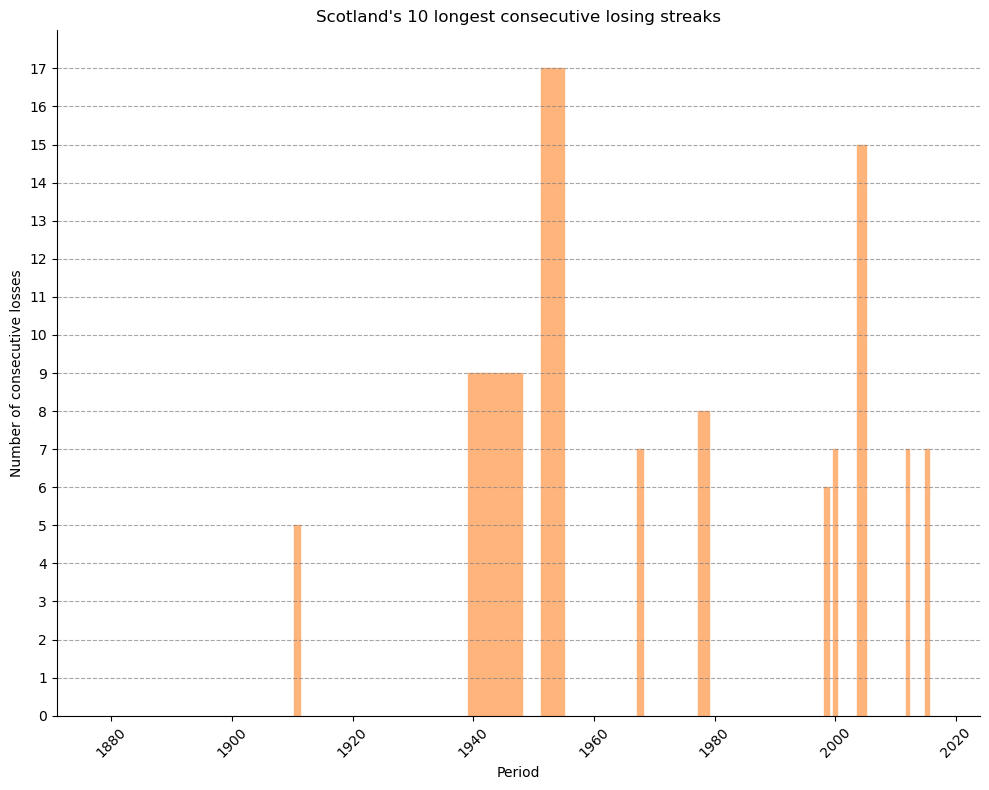

In [65]:
scot_loss_streaks = []

current_loss_streak_scot = 0
loss_begin_date_scot = None
loss_end_date_scot = None

for index, row in df.iterrows():
    if row['home_team'] == 'Scotland' or row['away_team'] == 'Scotland':
        if row['winner'] != 'Scotland' and row['winner'] != None:
            if current_loss_streak_scot == 0:
                loss_begin_date_scot = row['date']
            current_loss_streak_scot += 1
            loss_end_date_scot = row['date']
        else:
            if current_loss_streak_scot > 1:
                scot_loss_streaks.append({
                    'begin_date': loss_begin_date_scot,
                    'end_date': loss_end_date_scot,
                    'loss_streak': current_loss_streak_scot
                })
            current_loss_streak_scot = 0

            
sorted_scot_loss_streaks = sorted(scot_loss_streaks, key=lambda x: x['loss_streak'], reverse=True)

loss_table_data_scot = []
for i, loss_streak in enumerate(sorted_scot_loss_streaks[:10], start=1):
    loss_table_data_scot.append([i, loss_streak['loss_streak'], loss_streak['begin_date'].strftime('%Y-%m-%d'), loss_streak['end_date'].strftime('%Y-%m-%d')])

loss_table_scot = pd.DataFrame(loss_table_data_scot, columns=['Rank', 'Loss Streak', 'Begin Date', 'End Date'])
print(tabulate(loss_table_scot, headers='keys', tablefmt='grid', showindex=False))






loss_begin_scot = ['1910-03-19', '1939-02-04', '1951-02-24', '1967-02-25', '1977-03-05', '1998-02-21', '1999-08-21', '2003-08-30', '2011-09-25', '2014-11-15']
loss_end_scot = ['1911-03-18', '1948-02-07', '1955-01-08', '1968-03-16', '1979-01-20', '1998-11-21', '2000-03-18', '2005-02-12', '2012-03-17', '2015-08-15']
loss_row_scot = [5, 9, 17, 7, 8, 6, 7, 15, 7, 7]

plt.figure(figsize=(10, 8))
for i in range(10):
    begin_loss_date = datetime.strptime(loss_begin_scot[i], '%Y-%m-%d')
    end_loss_date = datetime.strptime(loss_end_scot[i], '%Y-%m-%d')
    
    x_loss = np.array([begin_loss_date, end_loss_date])
    y_loss = np.array([loss_row_scot[i], loss_row_scot[i]])
    
    plt.fill_between(x_loss, 0, y_loss, color='#ffb47b')
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive losses')
plt.title('Scotland\'s 10 longest consecutive losing streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))    
plt.ylim(0, max(loss_row_scot) + 1)
plt.yticks(range(max(loss_row_scot) + 1))
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe the longest losing streaks of Scotland. A significant period of losing streaks for Scotland occurred between 1939 and 1955. The 1950s proved to be a challenging decade for the Thistle Boys. In the 1951 Tournament, Scotland managed to secure only one victory, against Wales. During the autumn, Scotland suffered a crushing defeat from the Springboks at Murrayfield, with a score of 44-0. In subsequent Tournaments, Scotland earned three consecutive wooden spoons in 1952, 1953, and 1954, indicating their last-place finishes.

The 1970s also brought difficulties for Scotland. Despite the presence of the iconic Andy Irvine in the team, Scotland experienced a tough phase between March 1977 and February 1980, enduring 11 defeats and 2 draws. This period was highlighted by another wooden spoon defeat in the 1978 tournament.

The 2000s posed challenges as well, with Scotland struggling in tournaments from 2000 to 2005. During this period, they achieved a best finish of fourth place, recording 8 wins, 21 defeats, and 1 draw. The 2007 tournament followed suit with a poor performance, resulting in a last-place finish and just one victory against Wales. The same trend continued in 2008 and 2009, with four defeats and only one win.

However, a shift occurred since 2014. Following a period of defeats, Scotland has exhibited a new and improved performance.

&rarr; Scotland's largest losses against each team:

In [66]:
scot_largest_loss = {team: {'loss_difference': 0, 'home_score': 0, 'away_score': 0, 'stadium': None, 'date': None} for team in scot_opponent}

for index, row in df.iterrows():
    for team in scot_opponent:
        if row['home_team'] == team and row['away_team'] == 'Scotland':
            if row['winner'] != 'Scotland':
                loss_difference = abs(row['away_score'] - row['home_score'])
                if loss_difference > scot_largest_loss[team]['loss_difference']:
                    scot_largest_loss[team]['loss_difference'] = loss_difference
                    scot_largest_loss[team]['home_score'] = row['home_score']
                    scot_largest_loss[team]['away_score'] = row['away_score']
                    scot_largest_loss[team]['stadium'] = row['stadium']
                    scot_largest_loss[team]['date'] = row['date'].strftime('%Y-%m-%d')
        elif row['home_team'] == 'Scotland' and row['away_team'] == team:
            if row['winner'] != 'Scotland':
                loss_difference = abs(row['away_score'] - row['home_score'])
                if loss_difference > scot_largest_loss[team]['loss_difference']:
                    scot_largest_loss[team]['loss_difference'] = loss_difference
                    scot_largest_loss[team]['home_score'] = row['home_score']
                    scot_largest_loss[team]['away_score'] = row['away_score']
                    scot_largest_loss[team]['stadium'] = row['stadium']
                    scot_largest_loss[team]['date'] = row['date'].strftime('%Y-%m-%d')


for team in sorted(scot_largest_loss.keys()):
    data = scot_largest_loss[team]
    color = team_colors.get(team, 'black')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m"
          f"\033[1m\033[3m{team}\033[0m")
    print(f"Score Difference: {data['loss_difference']}")
    print(f"Home Score: {data['home_score']}")
    print(f"Away Score: {data['away_score']}")
    print(f"Stadium: {data['stadium']}")
    print(f"Date: {data['date']}")
    print("-" * 20)

Argentina
Score Difference: 9
Home Score: 22
Away Score: 31
Stadium: Murrayfield Stadium
Date: 1999-08-21
--------------------
Australia
Score Difference: 42
Home Score: 45
Away Score: 3
Stadium: Sydney Football Stadium
Date: 1998-06-13
--------------------
England
Score Difference: 40
Home Score: 43
Away Score: 3
Stadium: Twickenham Stadium
Date: 2001-03-03
--------------------
France
Score Difference: 42
Home Score: 51
Away Score: 9
Stadium: Stadium Australia
Date: 2003-10-25
--------------------
Ireland
Score Difference: 30
Home Score: 6
Away Score: 36
Stadium: Murrayfield Stadium
Date: 2003-02-16
--------------------
Italy
Score Difference: 20
Home Score: 17
Away Score: 37
Stadium: Murrayfield Stadium
Date: 2007-02-24
--------------------
New Zealand
Score Difference: 49
Home Score: 69
Away Score: 20
Stadium: Carisbrook
Date: 2000-06-24
--------------------
South Africa
Score Difference: 58
Home Score: 10
Away Score: 68
Stadium: Murrayfield Stadium
Date: 1997-12-06
----------------

We can observe the most significant losses of Scotland (in terms of score difference) against each of the other teams. It's interesting to note that all of these losses took place during the 2000s, a period often referred to as the dark days of Scottish rugby.

<div align="center">
  <h3>3. Sotland's winning and losing periods</h3>
</div>

---

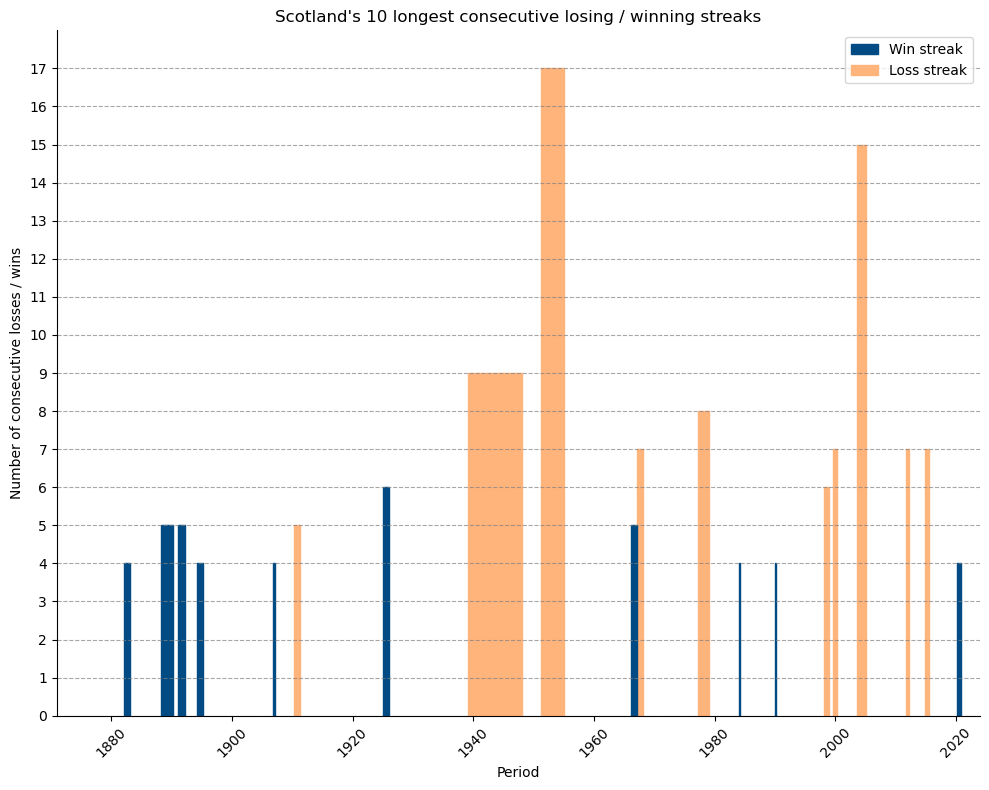

In [67]:
plt.figure(figsize=(10, 8))
for i in range(10):
    
    begin_win_date = datetime.strptime(win_begin_scot[i], '%Y-%m-%d')
    end_win_date = datetime.strptime(win_end_scot[i], '%Y-%m-%d')
    x_win = np.array([begin_win_date, end_win_date])
    y_win = np.array([win_row_scot[i], win_row_scot[i]])
    plt.fill_between(x_win, 0, y_win, color='#004B84')
    
    
    begin_loss_date = datetime.strptime(loss_begin_scot[i], '%Y-%m-%d')
    end_loss_date = datetime.strptime(loss_end_scot[i], '%Y-%m-%d')
    x_loss = np.array([begin_loss_date, end_loss_date])
    y_loss = np.array([loss_row_scot[i], loss_row_scot[i]])
    plt.fill_between(x_loss, 0, y_loss, color='#ffb47b')
    
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive losses / wins')
plt.title('Scotland\'s 10 longest consecutive losing / winning streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))  
plt.ylim(0, max(loss_row_scot) + 1)
plt.yticks(range(max(loss_row_scot) + 1))
plt.tight_layout()
plt.legend(['Win streak', 'Loss streak'])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe in this summary diagram the periods of both winning and losing streaks for the Scottish national rugby team. The diagram highlights the fact that Scotland experienced a golden era in the early age of rugby before encountering impressive periods of losses, notably in the 1950s and the 2000s. However, it also illustrates that after these challenging times, there has been a new lease of life for Scotland, as evidenced by a fine run of victories in 2020.

<div align="center">
  <h3>Conclusion</h3>
</div>

---

In tracing the evolution of the Scottish national rugby team's performance against the top 10 teams in the world, certain notable patterns and trends come to light. The historical context, including the higher number of matches against British teams and France, is shaped by geographical proximity and the foundational roots of rugby in the British Isles. The influence of historic tournaments like the 4 and 5 Nations further accentuates the prevalence of matches among these nations.

A distinctive trend emerges when examining win rates against various teams. Remarkably, the win rate remains consistently below 50% against most opponents, excluding matches against Italy. Despite facing challenges, Scotland has historically struggled against various opponents, including Argentina, even though they are often considered slightly weaker. Particularly noteworthy is the low win rate against South Africa, falling below 20%, and the absence of a victory against New Zealand – the All Blacks – with the closest achievement being a draw.

Furthermore, analyzing the longest winning streaks reveals Scotland's rugby dominance during the late 19th and early 20th centuries, often coinciding with periods of British rugby dominance on the global stage. The team's achievements in various tournaments, spanning 1887 to 1938, underscore their historical significance.

Conversely, examining the most significant losses against other teams highlights the challenges Scotland faced in the 2000s, commonly referred to as the dark days of Scottish rugby. This period saw substantial losses against top-tier teams, reflecting a period of struggle for the Scottish national team.

In conclusion, the Scottish national rugby team's journey against the world's top teams is a testament to the ebb and flow of the sport's history. From triumphant eras to challenging periods, Scotland's performance against global rugby giants demonstrates the complexities of the game's evolution, marked by historical context and shifting dynamics. The team's ability to rise from challenging phases, as demonstrated by their recent successes, reflects the resilience and determination that characterize the spirit of Scottish rugby.

<div align="center">
  <h2>X. Historical Analysis of <i> the Spingboks </i> </h2>
</div>

Here is a more precise analysis of the data for South Africa.




<img src="img/Bok_logo.svg" alt="Logo South Africa" style="width: 35%;">

<div align="center">
  <h3>1. Triumphs insights</h3>
</div>

---

&rarr; South Africa's win rate against each team:

Number of official matches against South Africa for each team:
Argentina: 32 matches
Australia: 92 matches
England: 44 matches
France: 44 matches
Ireland: 26 matches
Italy: 15 matches
New Zealand: 103 matches
Scotland: 28 matches
Wales: 40 matches


Number of wins for South Africa against each team:
Argentina: 28 wins
Australia: 49 wins
England: 26 wins
France: 27 wins
Ireland: 18 wins
Italy: 14 wins
New Zealand: 38 wins
Scotland: 23 wins
Wales: 32 wins


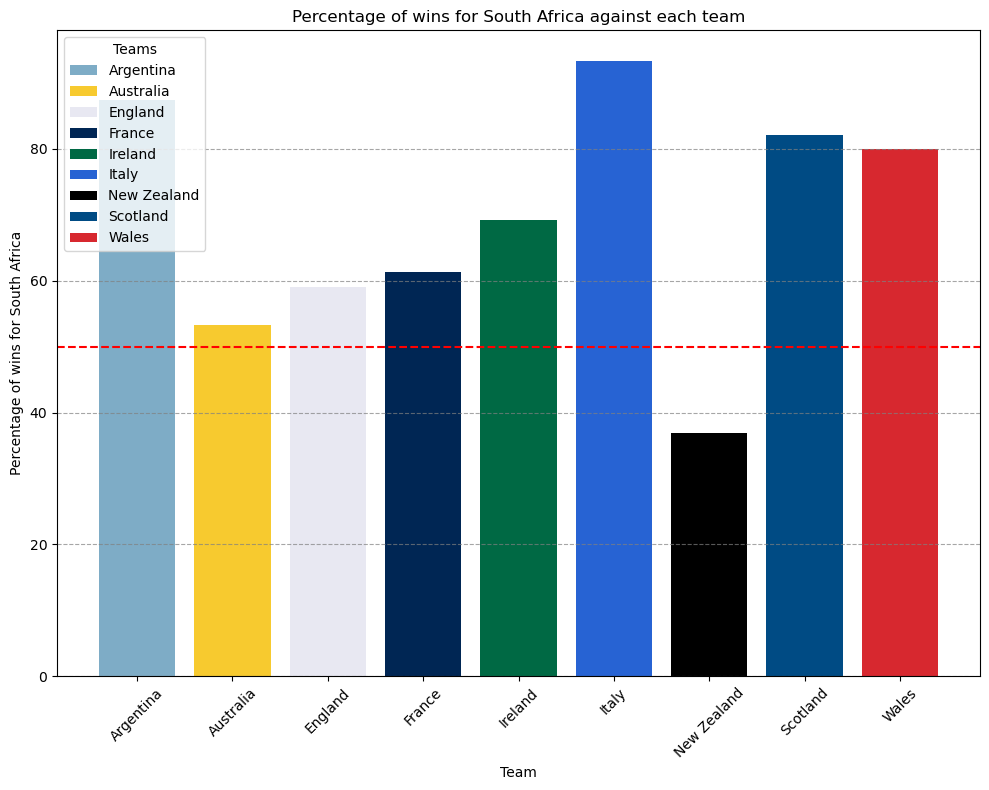

In [68]:
sa_opponent = {
    'Argentina',
    'Australia',
    'England',
    'France',
    'Ireland',
    'Italy',
    'New Zealand',
    'Scotland',
    'Wales'
}

sa_match = {team: 0 for team in sa_opponent}
sa_win = {team: 0 for team in sa_opponent}
sa_ratio = {}

for index, row in df.iterrows():
    for team in sa_opponent:
        if row['home_team'] == team and row['away_team'] == 'South Africa':
            sa_match[team] += 1
            if row['winner'] == 'South Africa':
                sa_win[team] += 1
        elif row['home_team'] == 'South Africa' and row['away_team'] == team:
            sa_match[team] += 1
            if row['winner'] == 'South Africa':
                sa_win[team] += 1
              

for team in sa_win:
    ratio = (sa_win[team] / sa_match[team]) * 100 if sa_match[team] > 0 else 0
    sa_ratio[team] = ratio


print("\033[1mNumber of official matches against South Africa for each team:\033[0m")
for team, matches in dict(sorted(sa_match.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {matches} matches\033[0m")


print("\n")

print("\033[1mNumber of wins for South Africa against each team:\033[0m")
for team, wins in dict(sorted(sa_win.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {wins} wins\033[0m")    


plt.figure(figsize=(10, 8))
for team in sorted(sa_opponent):
    plt.bar(team, dict(sorted(sa_ratio.items()))[team], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins for South Africa')
plt.title('Percentage of wins for South Africa against each team')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()

We can observe that the number of matches against Australia and New Zealand logically surpasses those against other teams. This can be attributed to their geographical proximity and the fact that Australia, New Zealand, South Africa, and more recently Argentina participate in the annual tournament known as "The Rugby Championship."

Furthermore, South Africa's global win rate since 1871 is an impressive 59.95% against the best teams in the world. This statistic truly underscores the sheer dominance of South African rugby. It's no mere coincidence that the rainbow nation has secured the Rugby World Cup title three times.

Remarkably, the win rate against all teams consistently exceeds 50%, except against the All Blacks. However, the figures even approach 80% or more against Argentina, Italy, Scotland, and Wales. This level of performance is undeniably awe-inspiring and serves as a testament to the Springboks' rugby prowess.

&rarr; South Africa's win rate against each team since the last World Cup (2019):

Number of matches against South Africa for each team:
Argentina: 2 matches
Australia: 4 matches
England: 1 matches
France: 0 matches
Ireland: 0 matches
Italy: 0 matches
New Zealand: 4 matches
Scotland: 1 matches
Wales: 4 matches


Number of wins for South Africa against each team:
Argentina: 2 wins
Australia: 2 wins
England: 0 wins
France: 0 wins
Ireland: 0 wins
Italy: 0 wins
New Zealand: 2 wins
Scotland: 1 wins
Wales: 3 wins

Global win rate for South Africa since the last WC: 62.50%


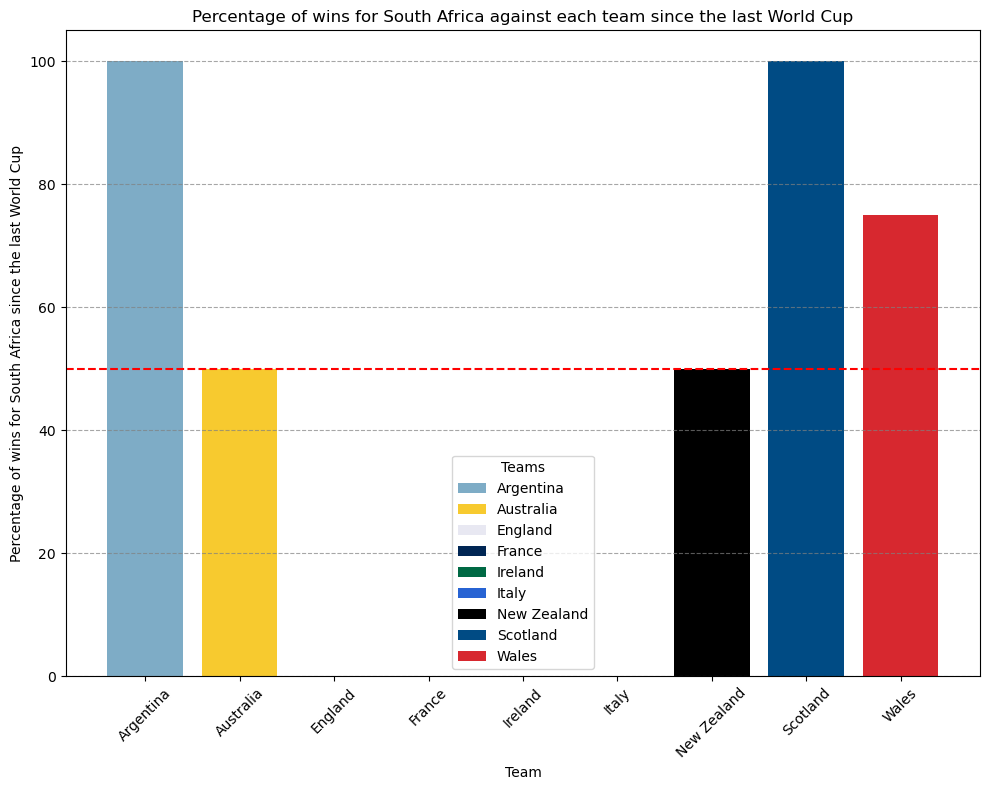

In [69]:
sa_match_2020 = {team: 0 for team in sa_opponent}
sa_win_2020 = {team: 0 for team in sa_opponent}
sa_ratio_2020 = {}

for index, row in df.iterrows():
    if row['year'] >= 2020:
        for team in sa_opponent:
            if row['home_team'] == team and row['away_team'] == 'South Africa':
                sa_match_2020[team] += 1
                if row['winner'] == 'South Africa':
                    sa_win_2020[team] += 1
            elif row['home_team'] == 'South Africa' and row['away_team'] == team:
                sa_match_2020[team] += 1
                if row['winner'] == 'South Africa':
                    sa_win_2020[team] += 1

for team in sa_win_2020:
    ratio = (sa_win_2020[team] / sa_match_2020[team]) * 100 if sa_match_2020[team] > 0 else 0
    sa_ratio_2020[team] = ratio

total_sa_win_2020 = sum(sa_win_2020.values())
total_sa_match_2020 = sum(sa_match_2020.values())



print("\033[1mNumber of matches against South Africa for each team:\033[0m")
for team, matches in dict(sorted(sa_match_2020.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {matches} matches\033[0m")


print("\n")

print("\033[1mNumber of wins for South Africa against each team:\033[0m")
for team, wins in dict(sorted(sa_win_2020.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {wins} wins\033[0m")

global_win_rate_sa_2020 = (total_sa_win_2020 / total_sa_match_2020) * 100
print("\nGlobal win rate for South Africa since the last WC: {:.2f}%".format(global_win_rate_sa_2020))



plt.figure(figsize=(10, 8))
for team in sorted(sa_opponent):
    plt.bar(team, sa_ratio_2020[team], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins for South Africa since the last World Cup')
plt.title('Percentage of wins for South Africa against each team since the last World Cup')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()

We can observe that the win rate against all other teams is in the South African standards, with a global ratio since 2019 of 58.33%. Even if the losses against France and Ireland look a bit out of place in the histogram, but is it possible to judge a team's form on the basis of a single match? The 2019 world champions remain formidable and feared opponents.

&rarr; South Africa's longest winning streaks:

+--------+--------------+--------------+------------+
|   Rank |   Win Streak | Begin Date   | End Date   |
+========+==============+==============+============+
|      1 |           17 | 1997-08-23   | 1998-11-28 |
+--------+--------------+--------------+------------+
|      2 |           12 | 1937-09-04   | 1953-08-22 |
+--------+--------------+--------------+------------+
|      3 |            8 | 2007-08-25   | 2008-06-21 |
+--------+--------------+--------------+------------+
|      4 |            8 | 2008-08-30   | 2009-08-29 |
+--------+--------------+--------------+------------+
|      5 |            8 | 2012-11-10   | 2013-09-07 |
+--------+--------------+--------------+------------+
|      6 |            8 | 2013-11-09   | 2014-08-23 |
+--------+--------------+--------------+------------+
|      7 |            6 | 1968-11-09   | 1969-09-20 |
+--------+--------------+--------------+------------+
|      8 |            6 | 1996-08-31   | 1996-12-15 |
+--------+--------------+---

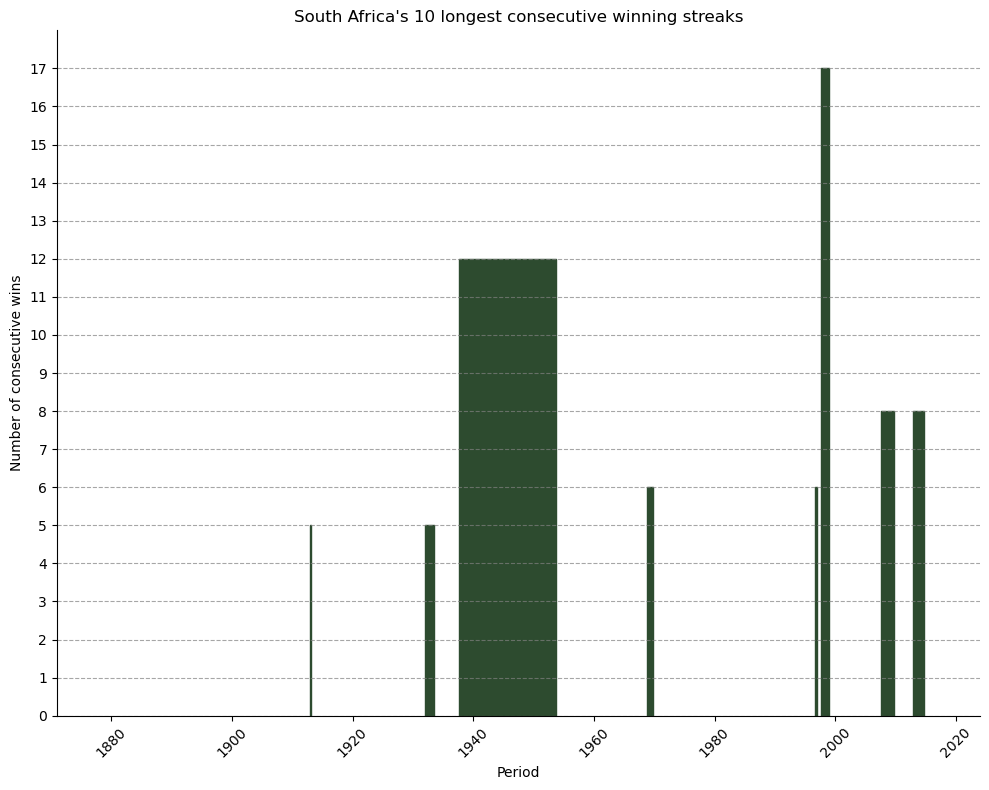

In [70]:
sa_win_streaks = []

current_win_streak_sa = 0
win_begin_date_sa = None
win_end_date_sa = None

for index, row in df.iterrows():
    if row['home_team'] == 'South Africa' or row['away_team'] == 'South Africa':
        if row['winner'] == 'South Africa':
            if current_win_streak_sa == 0:
                win_begin_date_sa = row['date']
            current_win_streak_sa += 1
            win_end_date_sa = row['date']
        else:
            if current_win_streak_sa > 1:
                sa_win_streaks.append({
                    'begin_date': win_begin_date_sa,
                    'end_date': win_end_date_sa,
                    'wins_streak': current_win_streak_sa
                })
            current_win_streak_sa = 0

sorted_sa_win_streaks = sorted(sa_win_streaks, key=lambda x: x['wins_streak'], reverse=True)

win_table_data_sa = []
for i, win_streak in enumerate(sorted_sa_win_streaks[:10], start=1):
    win_table_data_sa.append([i, win_streak['wins_streak'], win_streak['begin_date'].strftime('%Y-%m-%d'), win_streak['end_date'].strftime('%Y-%m-%d')])

win_table_sa = pd.DataFrame(win_table_data_sa, columns=['Rank', 'Win Streak', 'Begin Date', 'End Date'])
print(tabulate(win_table_sa, headers='keys', tablefmt='grid', showindex=False))





win_begin_sa = ['1912-11-23', '1931-12-05', '1937-09-04', '1968-11-09', '1996-08-31', '1997-08-23', '2007-08-25', '2008-08-30', '2012-11-10', '2013-11-09']
win_end_sa = ['1913-01-11', '1933-07-08', '1953-08-22', '1969-09-20', '1996-12-15', '1998-11-28', '2008-06-21', '2009-08-29', '2013-09-07', '2014-08-23']
win_row_sa = [5, 5, 12, 6, 6, 17, 8, 8, 8, 8]

plt.figure(figsize=(10, 8))
for i in range(10):
    begin_win_date = datetime.strptime(win_begin_sa[i], '%Y-%m-%d')
    end_win_date = datetime.strptime(win_end_sa[i], '%Y-%m-%d')
    
    x_win = np.array([begin_win_date, end_win_date])
    y_win = np.array([win_row_sa[i], win_row_sa[i]])
    
    plt.fill_between(x_win, 0, y_win, color='#2D4B2F')
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive wins')
plt.title('South Africa\'s 10 longest consecutive winning streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))  
plt.ylim(0, max(win_row_sa) + 1)
plt.yticks(range(max(win_row_sa) + 1))
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe the longest winning streaks of South Africa. A significant peak is evident between 1937 and 1953, a period during which they stood at the pinnacle of world rugby. After an eleven-year hiatus due to the Second World War, South Africa made a triumphant return, winning a series of four matches against New Zealand in 1949. During a tour of Great Britain, Ireland, and France in 1951-1952, they emerged victorious against all these nations, solidifying their place in history.

Another notable period is between the 1990s and the 2010s, particularly highlighted between 1997 and 1998 with an impressive streak of 17 consecutive wins. This era showcased remarkable form, encompassing both the 1995 and 2007 World Cup victories, further cementing their reputation as a dominant force in rugby.

&rarr; South Africa's largest wins against each team:

In [71]:
sa_largest_win = {team: {'win_difference': 0, 'home_score': 0, 'away_score': 0, 'stadium': None, 'date': None} for team in sa_opponent}

for index, row in df.iterrows():
    for team in sa_opponent:
        if row['home_team'] == team and row['away_team'] == 'South Africa':
            if row['winner'] == 'South Africa':
                win_difference = abs(row['away_score'] - row['home_score'])
                if win_difference > sa_largest_win[team]['win_difference']:
                    sa_largest_win[team]['win_difference'] = win_difference
                    sa_largest_win[team]['home_score'] = row['home_score']
                    sa_largest_win[team]['away_score'] = row['away_score']
                    sa_largest_win[team]['stadium'] = row['stadium']
                    sa_largest_win[team]['date'] = row['date'].strftime('%Y-%m-%d')
        elif row['home_team'] == 'South Africa' and row['away_team'] == team:
            if row['winner'] == 'South Africa':
                win_difference = abs(row['away_score'] - row['home_score'])
                if win_difference > sa_largest_win[team]['win_difference']:
                    sa_largest_win[team]['win_difference'] = win_difference
                    sa_largest_win[team]['home_score'] = row['home_score']
                    sa_largest_win[team]['away_score'] = row['away_score']
                    sa_largest_win[team]['stadium'] = row['stadium']
                    sa_largest_win[team]['date'] = row['date'].strftime('%Y-%m-%d')

                    
for team in sorted(sa_largest_win.keys()):
    data = sa_largest_win[team]
    color = team_colors.get(team, 'black')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m"
          f"\033[1m\033[3m{team}\033[0m")
    print(f"Score Difference: {data['win_difference']}")
    print(f"Home Score: {data['home_score']}")
    print(f"Away Score: {data['away_score']}")
    print(f"Stadium: {data['stadium']}")
    print(f"Date: {data['date']}")
    print("-" * 20)

Argentina
Score Difference: 60
Home Score: 73
Away Score: 13
Stadium: FNB Stadium
Date: 2013-08-17
--------------------
Australia
Score Difference: 45
Home Score: 53
Away Score: 8
Stadium: Ellis Park Stadium
Date: 2008-08-30
--------------------
England
Score Difference: 48
Home Score: 58
Away Score: 10
Stadium: Free State Stadium
Date: 2007-05-26
--------------------
France
Score Difference: 42
Home Score: 10
Away Score: 52
Stadium: Parc des Princes
Date: 1997-11-22
--------------------
Ireland
Score Difference: 38
Home Score: 0
Away Score: 38
Stadium: Lansdowne Road
Date: 1912-11-30
--------------------
Italy
Score Difference: 101
Home Score: 101
Away Score: 0
Stadium: Kings Park Stadium
Date: 1999-06-19
--------------------
New Zealand
Score Difference: 17
Home Score: 17
Away Score: 0
Stadium: Kingsmead
Date: 1928-06-30
--------------------
Scotland
Score Difference: 58
Home Score: 10
Away Score: 68
Stadium: Murrayfield Stadium
Date: 1997-12-06
--------------------
Wales
Score Diffe

We can observe the most significant victories of South Africa (in terms of score difference) against each of the other teams. It is interesting to note that some of these victories align with periods of peak glory for South African rugby, as previously discussed.

<div align="center">
  <h3>2. Debacles insights</h3>
</div>

---

&rarr; South Africa's longest losing streaks:

+--------+---------------+--------------+------------+
|   Rank |   Loss Streak | Begin Date   | End Date   |
+========+===============+==============+============+
|      1 |             7 | 1964-07-25   | 1965-08-21 |
+--------+---------------+--------------+------------+
|      2 |             5 | 2003-07-19   | 2003-11-09 |
+--------+---------------+--------------+------------+
|      3 |             5 | 2006-06-24   | 2006-08-26 |
+--------+---------------+--------------+------------+
|      4 |             4 | 1999-06-26   | 1999-08-07 |
+--------+---------------+--------------+------------+
|      5 |             4 | 2000-06-24   | 2000-07-29 |
+--------+---------------+--------------+------------+
|      6 |             4 | 2010-07-10   | 2010-08-21 |
+--------+---------------+--------------+------------+
|      7 |             4 | 2014-11-29   | 2015-08-08 |
+--------+---------------+--------------+------------+
|      8 |             4 | 2016-10-08   | 2016-11-26 |
+--------+

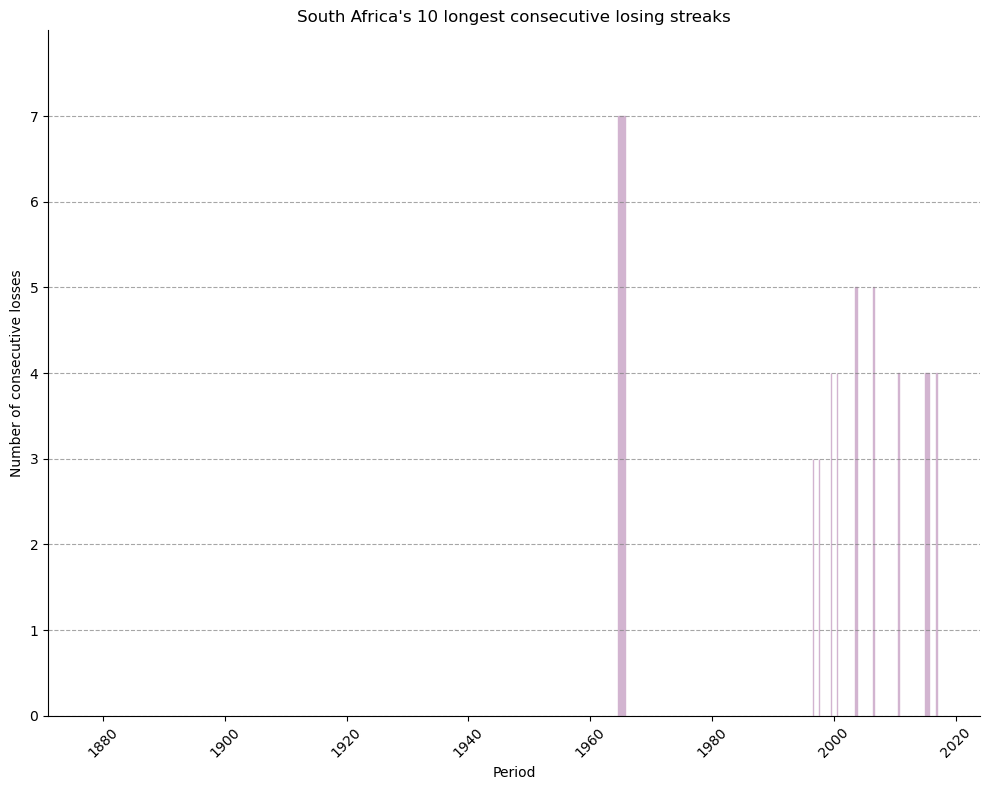

In [72]:
sa_loss_streaks = []

current_loss_streak_sa = 0
loss_begin_date_sa = None
loss_end_date_sa = None

for index, row in df.iterrows():
    if row['home_team'] == 'South Africa' or row['away_team'] == 'South Africa':
        if row['winner'] != 'South Africa' and row['winner'] != None:
            if current_loss_streak_sa == 0:
                loss_begin_date_sa = row['date']
            current_loss_streak_sa += 1
            loss_end_date_sa = row['date']
        else:
            if current_loss_streak_sa > 1:
                sa_loss_streaks.append({
                    'begin_date': loss_begin_date_sa,
                    'end_date': loss_end_date_sa,
                    'loss_streak': current_loss_streak_sa
                })
            current_loss_streak_sa = 0

            
sorted_sa_loss_streaks = sorted(sa_loss_streaks, key=lambda x: x['loss_streak'], reverse=True)

loss_table_data_sa = []
for i, loss_streak in enumerate(sorted_sa_loss_streaks[:10], start=1):
    loss_table_data_sa.append([i, loss_streak['loss_streak'], loss_streak['begin_date'].strftime('%Y-%m-%d'), loss_streak['end_date'].strftime('%Y-%m-%d')])

loss_table_sa = pd.DataFrame(loss_table_data_sa, columns=['Rank', 'Loss Streak', 'Begin Date', 'End Date'])
print(tabulate(loss_table_sa, headers='keys', tablefmt='grid', showindex=False))






loss_begin_sa = ['1964-07-25', '1996-08-10', '1997-07-19', '1999-06-26', '2000-06-24', '2003-07-19', '2006-06-24', '2010-07-10', '2014-11-29', '2016-10-08']
loss_end_sa = ['1965-08-21', '1996-08-24', '1997-08-09', '1999-08-07', '2000-07-29', '2003-11-09', '2006-08-26', '2010-08-21', '2015-08-08', '2016-11-26']
loss_row_sa = [7, 3, 3, 4, 4, 5, 5, 4, 4, 4]

plt.figure(figsize=(10, 8))
for i in range(10):
    begin_loss_date = datetime.strptime(loss_begin_sa[i], '%Y-%m-%d')
    end_loss_date = datetime.strptime(loss_end_sa[i], '%Y-%m-%d')
    
    x_loss = np.array([begin_loss_date, end_loss_date])
    y_loss = np.array([loss_row_sa[i], loss_row_sa[i]])
    
    plt.fill_between(x_loss, 0, y_loss, color='#d2b4d0')
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive losses')
plt.title('South Africa\'s 10 longest consecutive losing streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))    
plt.ylim(0, max(loss_row_sa) + 1)
plt.yticks(range(max(loss_row_sa) + 1))
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe the longest losing streaks of South Africa. There are clearly two distinct periods: the first spanning from 1964 to 1965, and the second from 1996 to 2016.

&rarr; South Africa's largest losses against each team:

In [73]:
sa_lsaest_loss = {team: {'loss_difference': 0, 'home_score': 0, 'away_score': 0, 'stadium': None, 'date': None} for team in sa_opponent}

for index, row in df.iterrows():
    for team in sa_opponent:
        if row['home_team'] == team and row['away_team'] == 'South Africa':
            if row['winner'] != 'South Africa':
                loss_difference = abs(row['away_score'] - row['home_score'])
                if loss_difference > sa_lsaest_loss[team]['loss_difference']:
                    sa_lsaest_loss[team]['loss_difference'] = loss_difference
                    sa_lsaest_loss[team]['home_score'] = row['home_score']
                    sa_lsaest_loss[team]['away_score'] = row['away_score']
                    sa_lsaest_loss[team]['stadium'] = row['stadium']
                    sa_lsaest_loss[team]['date'] = row['date'].strftime('%Y-%m-%d')
        elif row['home_team'] == 'South Africa' and row['away_team'] == team:
            if row['winner'] != 'South Africa':
                loss_difference = abs(row['away_score'] - row['home_score'])
                if loss_difference > sa_lsaest_loss[team]['loss_difference']:
                    sa_lsaest_loss[team]['loss_difference'] = loss_difference
                    sa_lsaest_loss[team]['home_score'] = row['home_score']
                    sa_lsaest_loss[team]['away_score'] = row['away_score']
                    sa_lsaest_loss[team]['stadium'] = row['stadium']
                    sa_lsaest_loss[team]['date'] = row['date'].strftime('%Y-%m-%d')


for team in sorted(sa_lsaest_loss.keys()):
    data = sa_lsaest_loss[team]
    color = team_colors.get(team, 'black')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m"
          f"\033[1m\033[3m{team}\033[0m")
    print(f"Score Difference: {data['loss_difference']}")
    print(f"Home Score: {data['home_score']}")
    print(f"Away Score: {data['away_score']}")
    print(f"Stadium: {data['stadium']}")
    print(f"Date: {data['date']}")
    print("-" * 20)

Argentina
Score Difference: 13
Home Score: 32
Away Score: 19
Stadium: Malvinas Argentinas
Date: 2018-08-25
--------------------
Australia
Score Difference: 49
Home Score: 49
Away Score: 0
Stadium: Lang Park
Date: 2006-07-15
--------------------
England
Score Difference: 50
Home Score: 53
Away Score: 3
Stadium: Twickenham Stadium
Date: 2002-11-23
--------------------
France
Score Difference: 20
Home Score: 30
Away Score: 10
Stadium: Stade Vélodrome
Date: 2002-11-09
--------------------
Ireland
Score Difference: 35
Home Score: 38
Away Score: 3
Stadium: Aviva Stadium
Date: 2017-11-11
--------------------
Italy
Score Difference: 2
Home Score: 20
Away Score: 18
Stadium: Stadio Artemio Franchi
Date: 2016-11-19
--------------------
New Zealand
Score Difference: 57
Home Score: 57
Away Score: 0
Stadium: North Harbour Stadium
Date: 2017-09-16
--------------------
Scotland
Score Difference: 15
Home Score: 21
Away Score: 6
Stadium: Murrayfield Stadium
Date: 2002-11-16
--------------------
Wales
Sc

We can observe the most significant losses of South Africa (in terms of score difference) against each of the other teams. It is interesting to note that some of these losses occurred during the years 2016, 2017, and 2018. These years marked South Africa's challenging period under the leadership of Allister Coetzee. The Springboks faced difficulties during the Rugby Championship, losing 4 out of their 6 matches. Additionally, their European tour in November resulted in three defeats to England, Wales, and, notably, Italy for the first time.

<div align="center">
  <h3>3. South Africa's winning and losing periods</h3>
</div>

---

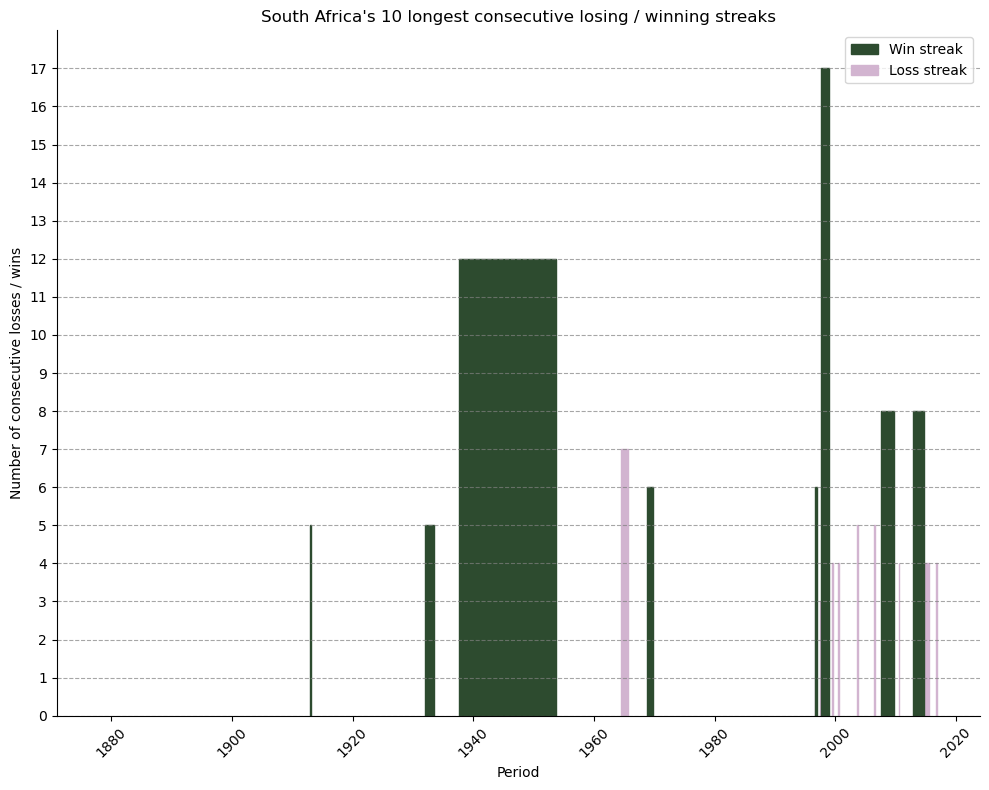

In [74]:
plt.figure(figsize=(10, 8))
for i in range(10):
    
    begin_win_date = datetime.strptime(win_begin_sa[i], '%Y-%m-%d')
    end_win_date = datetime.strptime(win_end_sa[i], '%Y-%m-%d')
    x_win = np.array([begin_win_date, end_win_date])
    y_win = np.array([win_row_sa[i], win_row_sa[i]])
    plt.fill_between(x_win, 0, y_win, color='#2D4B2F')
    
    
    begin_loss_date = datetime.strptime(loss_begin_sa[i], '%Y-%m-%d')
    end_loss_date = datetime.strptime(loss_end_sa[i], '%Y-%m-%d')
    x_loss = np.array([begin_loss_date, end_loss_date])
    y_loss = np.array([loss_row_sa[i], loss_row_sa[i]])
    plt.fill_between(x_loss, 0, y_loss, color='#d2b4d0')
    
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive losses / wins')
plt.title('South Africa\'s 10 longest consecutive losing / winning streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))  
plt.ylim(0, max(win_row_sa) + 1)
plt.yticks(range(max(win_row_sa) + 1))
plt.tight_layout()
plt.legend(['Win streak', 'Loss streak'])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe in this summary diagram the periods of both winning and losing streaks for the South African national rugby team. The diagram highlights a clear period of dominance from the 1930s to the 1950s. It is also notable that during the period from 1970 to 1991, significant changes occurred due to international calls to sever ties with the Republic of South Africa because of its apartheid policy. This led to boycotts and cancellations of tours involving the Springboks, which became increasingly prevalent throughout the 1970s.

Subsequently, between 1990 and 2018, alternating periods of winning and losing streaks are evident, even though the periods of consecutive wins are predominant.

<div align="center">
  <h3>Conclusion</h3>
</div>

---

In reflecting upon the evolution of the South African national rugby team's performance against the top 10 teams in the world, a captivating narrative emerges. The emphasis on matches against Australia and New Zealand, attributed to their geographical proximity and participation in <i> The Rugby Championship </i>, underscores the significance of regional rivalries in shaping the team's schedule.

A striking statistic lies in South Africa's remarkable global win rate of 59.95% against the world's top teams since 1871. This figure resonates deeply, showcasing the enduring dominance of South African rugby. The nation's triumphant capture of the Rugby World Cup title on three occasions is no mere coincidence but a testament to their prowess on the global stage.

Remarkably, the consistent win rate surpassing 50% against most teams, along with figures approaching 80% or higher against select opponents like Argentina, Italy, Scotland, and Wales, speaks volumes of the Springboks' skill and capability. This level of performance serves as an awe-inspiring testament to their rugby mastery.

Delving into historical streaks reveals South Africa's pinnacle periods. The 1937-1953 era stands out as a golden age, crowned by victories against formidable opponents. The triumphant return after World War II, marked by a series of wins against New Zealand and a victorious tour of the British Isles, further solidified their legacy.

The most significant victories aligning with periods of glory reaffirm South Africa's prowess. Yet, acknowledging the challenges faced is equally vital. Notably, the two distinct periods of losing streaks, in the 1960s-1965 and 1996-2016, provide a glimpse into the team's journey through challenging phases.

In summary, the trajectory of the South African national rugby team's performance is a tapestry woven with triumphs and trials, reflecting a rich history in the global rugby landscape. The periods of dominance, the test of adversity, and the rhythmic alternating of winning and losing streaks all contribute to the dynamic narrative that is South African rugby.

<div align="center">
  <h2>XI. Historical Analysis of <i> the Dragons </i> </h2>
</div>

Here is a more precise analysis of the data for Wales.




<img src="img/WRU_2016.svg" alt="Logo Wales" style="width: 25%;">

<div align="center">
  <h3>1. Triumphs insights</h3>
</div>

---

&rarr; Wales' win rate against each team:

Number of official matches against Wales for each team:
Argentina: 20 matches
Australia: 44 matches
England: 138 matches
France: 102 matches
Ireland: 133 matches
Italy: 31 matches
New Zealand: 36 matches
Scotland: 128 matches
South Africa: 40 matches


Number of wins for Wales against each team:
Argentina: 14 wins
Australia: 13 wins
England: 59 wins
France: 51 wins
Ireland: 69 wins
Italy: 27 wins
New Zealand: 3 wins
Scotland: 75 wins
South Africa: 7 wins


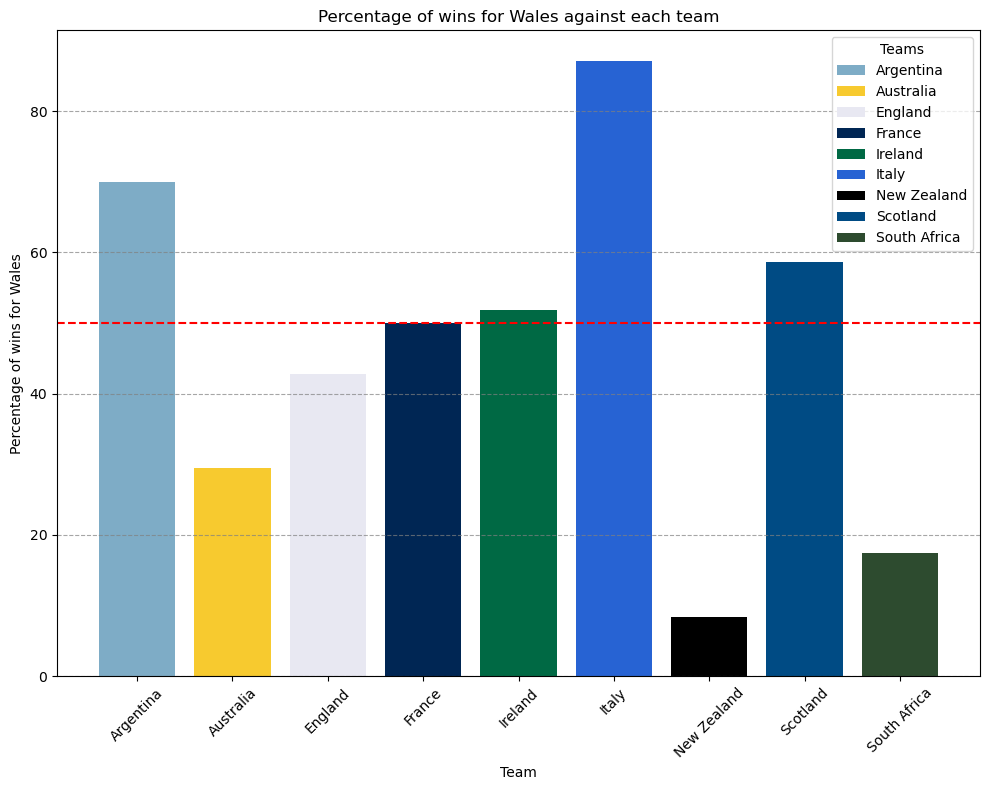

In [75]:
wls_opponent = {
    'Argentina',
    'Australia',
    'England',
    'France',
    'Ireland',
    'Italy',
    'New Zealand',
    'Scotland',
    'South Africa'
}

wls_match = {team: 0 for team in wls_opponent}
wls_win = {team: 0 for team in wls_opponent}
wls_ratio = {}

for index, row in df.iterrows():
    for team in wls_opponent:
        if row['home_team'] == team and row['away_team'] == 'Wales':
            wls_match[team] += 1
            if row['winner'] == 'Wales':
                wls_win[team] += 1
        elif row['home_team'] == 'Wales' and row['away_team'] == team:
            wls_match[team] += 1
            if row['winner'] == 'Wales':
                wls_win[team] += 1
              

for team in wls_win:
    ratio = (wls_win[team] / wls_match[team]) * 100 if wls_match[team] > 0 else 0
    wls_ratio[team] = ratio


print("\033[1mNumber of official matches against Wales for each team:\033[0m")
for team, matches in dict(sorted(wls_match.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {matches} matches\033[0m")


print("\n")

print("\033[1mNumber of wins for Wales against each team:\033[0m")
for team, wins in dict(sorted(wls_win.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {wins} wins\033[0m")    


plt.figure(figsize=(10, 8))
for team in sorted(wls_opponent):
    plt.bar(team, dict(sorted(wls_ratio.items()))[team], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins for Wales')
plt.title('Percentage of wins for Wales against each team')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()

We can observe that the number of matches against British teams and France logically surpasses those against other teams, with approximately 100 matches compared to around 30. This can be attributed to their geographical proximity as neighboring nations, which made it more practical to arrange matches, especially in the earlier years when travel distances were greater. Additionally, considering that the roots of rugby originated in the British Isles, it's natural that a significant portion of matches took place there. The historic tournaments like the 4 and 5 Nations have further contributed to the higher number of matches between these nations.

Furthermore, a distinct trend is evident in the win rates against various teams. Notably, the win rate against Argentina, Italy and Scotland is quite high. The win rate against France and Ireland is around 50%, which is acceptable. Whereas the win rate against New Zealand and South Africa is really low, bellow 10%.

It's important to acknowledge that these win rates are calculated based on data spanning from 1871 to the present day. To provide a more accurate reflection of current team dynamics, focusing on win rates over recent years would be advisable.

&rarr; Wales' win rate against each team since the last World Cup (2019):

Number of matches against Wales for each team:
Argentina: 2 matches
Australia: 1 matches
England: 4 matches
France: 4 matches
Ireland: 4 matches
Italy: 4 matches
New Zealand: 1 matches
Scotland: 3 matches
South Africa: 4 matches


Number of wins for Wales against each team:
Argentina: 1 wins
Australia: 1 wins
England: 1 wins
France: 0 wins
Ireland: 1 wins
Italy: 3 wins
New Zealand: 0 wins
Scotland: 2 wins
South Africa: 1 wins

Global win rate for Wales since the last WC: 37.04%


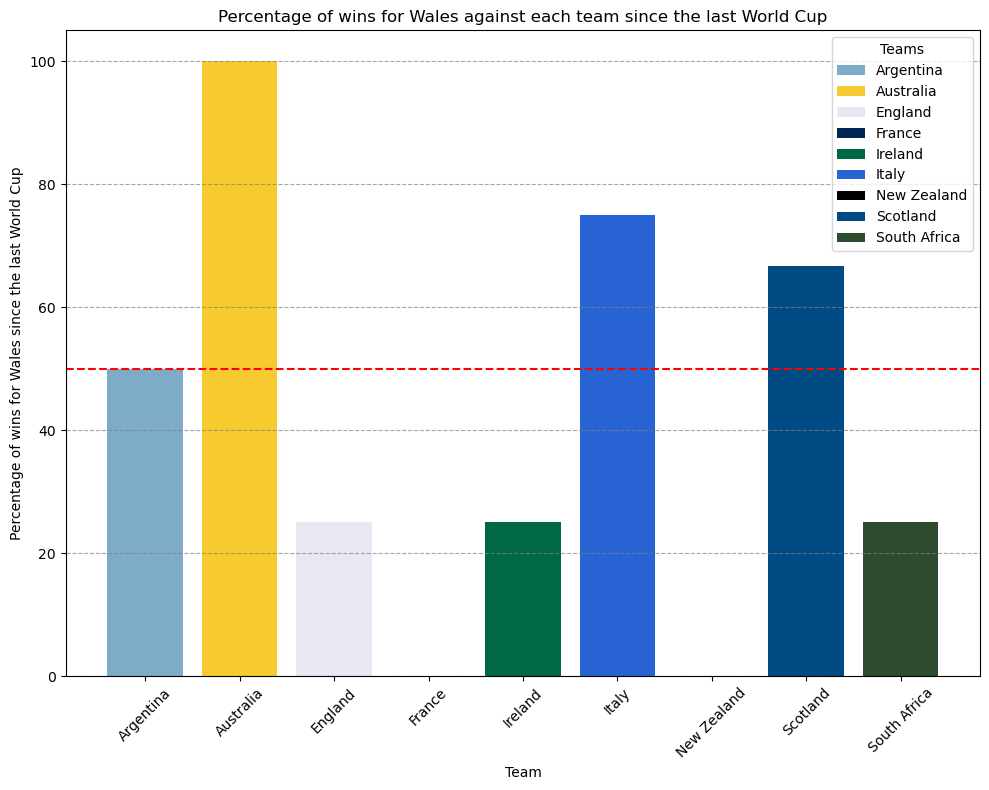

In [76]:
wls_match_2020 = {team: 0 for team in wls_opponent}
wls_win_2020 = {team: 0 for team in wls_opponent}
wls_ratio_2020 = {}

for index, row in df.iterrows():
    if row['year'] >= 2020:
        for team in wls_opponent:
            if row['home_team'] == team and row['away_team'] == 'Wales':
                wls_match_2020[team] += 1
                if row['winner'] == 'Wales':
                    wls_win_2020[team] += 1
            elif row['home_team'] == 'Wales' and row['away_team'] == team:
                wls_match_2020[team] += 1
                if row['winner'] == 'Wales':
                    wls_win_2020[team] += 1

for team in wls_win_2020:
    ratio = (wls_win_2020[team] / wls_match_2020[team]) * 100 if wls_match_2020[team] > 0 else 0
    wls_ratio_2020[team] = ratio

total_wls_win_2020 = sum(wls_win_2020.values())
total_wls_match_2020 = sum(wls_match_2020.values())



print("\033[1mNumber of matches against Wales for each team:\033[0m")
for team, matches in dict(sorted(wls_match_2020.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {matches} matches\033[0m")


print("\n")

print("\033[1mNumber of wins for Wales against each team:\033[0m")
for team, wins in dict(sorted(wls_win_2020.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {wins} wins\033[0m")

global_win_rate_wls_2020 = (total_wls_win_2020 / total_wls_match_2020) * 100
print("\nGlobal win rate for Wales since the last WC: {:.2f}%".format(global_win_rate_wls_2020))



plt.figure(figsize=(10, 8))
for team in sorted(wls_opponent):
    plt.bar(team, wls_ratio_2020[team], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins for Wales since the last World Cup')
plt.title('Percentage of wins for Wales against each team since the last World Cup')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()

We can observe that the win rate against all other teams is in the Welsh standards, with a global ratio since 2019 of 34.29%. 

&rarr; Wales' longest winning streaks:

+--------+--------------+--------------+------------+
|   Rank |   Win Streak | Begin Date   | End Date   |
+========+==============+==============+============+
|      1 |           13 | 2018-03-11   | 2019-03-16 |
+--------+--------------+--------------+------------+
|      2 |           11 | 1907-03-09   | 1910-01-01 |
+--------+--------------+--------------+------------+
|      3 |            8 | 1970-04-04   | 1972-03-25 |
+--------+--------------+--------------+------------+
|      4 |            7 | 1975-03-15   | 1977-01-15 |
+--------+--------------+--------------+------------+
|      5 |            6 | 1905-01-14   | 1906-02-03 |
+--------+--------------+--------------+------------+
|      6 |            6 | 1910-02-05   | 1911-03-11 |
+--------+--------------+--------------+------------+
|      7 |            6 | 1977-03-05   | 1978-03-18 |
+--------+--------------+--------------+------------+
|      8 |            5 | 1901-03-16   | 1903-01-10 |
+--------+--------------+---

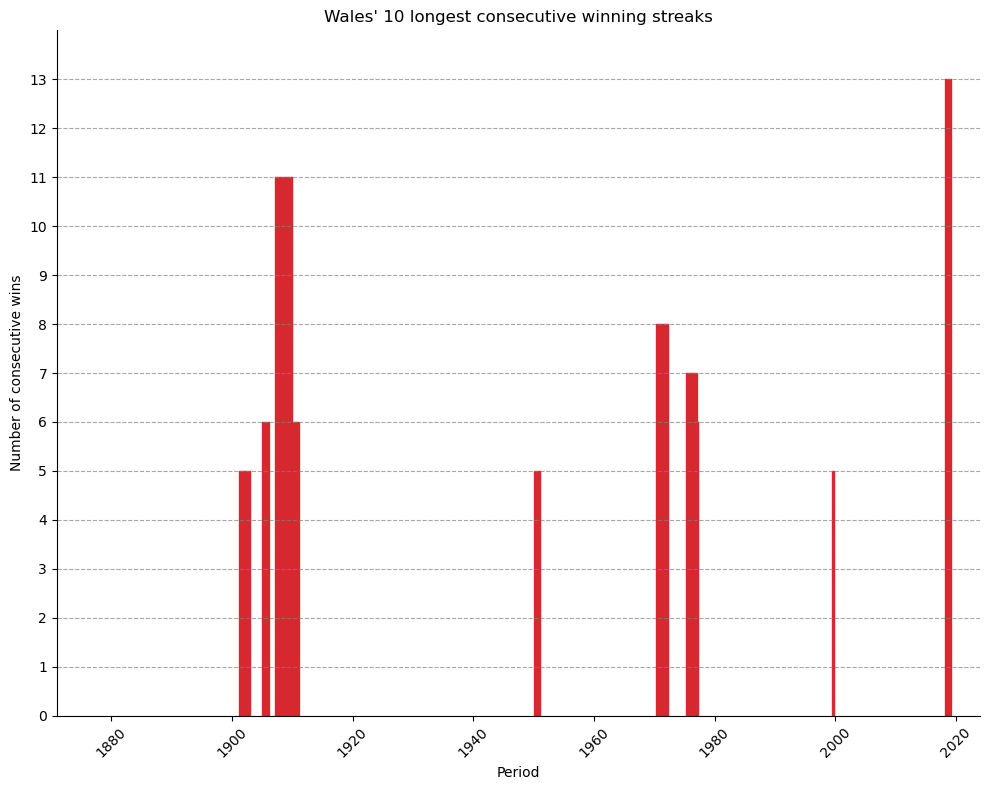

In [77]:
wls_win_streaks = []

current_win_streak_wls = 0
win_begin_date_wls = None
win_end_date_wls = None

for index, row in df.iterrows():
    if row['home_team'] == 'Wales' or row['away_team'] == 'Wales':
        if row['winner'] == 'Wales':
            if current_win_streak_wls == 0:
                win_begin_date_wls = row['date']
            current_win_streak_wls += 1
            win_end_date_wls = row['date']
        else:
            if current_win_streak_wls > 1:
                wls_win_streaks.append({
                    'begin_date': win_begin_date_wls,
                    'end_date': win_end_date_wls,
                    'wins_streak': current_win_streak_wls
                })
            current_win_streak_wls = 0

sorted_wls_win_streaks = sorted(wls_win_streaks, key=lambda x: x['wins_streak'], reverse=True)

win_table_data_wls = []
for i, win_streak in enumerate(sorted_wls_win_streaks[:10], start=1):
    win_table_data_wls.append([i, win_streak['wins_streak'], win_streak['begin_date'].strftime('%Y-%m-%d'), win_streak['end_date'].strftime('%Y-%m-%d')])

win_table_wls = pd.DataFrame(win_table_data_wls, columns=['Rank', 'Win Streak', 'Begin Date', 'End Date'])
print(tabulate(win_table_wls, headers='keys', tablefmt='grid', showindex=False))





win_begin_wls = ['1901-03-16', '1905-01-14', '1907-03-09', '1910-02-05', '1950-01-21', '1970-04-04', '1975-03-15', '1977-03-05', '1999-06-05', '2018-03-11']
win_end_wls = ['1903-01-10', '1906-02-03', '1910-01-01', '1911-03-11', '1951-01-20', '1972-03-25', '1977-01-15', '1977-01-15', '1999-10-01', '2019-03-16']
win_row_wls = [5, 6, 11, 6, 5, 8, 7, 6, 5, 13]

plt.figure(figsize=(10, 8))
for i in range(10):
    begin_win_date = datetime.strptime(win_begin_wls[i], '%Y-%m-%d')
    end_win_date = datetime.strptime(win_end_wls[i], '%Y-%m-%d')
    
    x_win = np.array([begin_win_date, end_win_date])
    y_win = np.array([win_row_wls[i], win_row_wls[i]])
    
    plt.fill_between(x_win, 0, y_win, color='#D7282F')
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive wins')
plt.title('Wales\' 10 longest consecutive winning streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))  
plt.ylim(0, max(win_row_wls) + 1)
plt.yticks(range(max(win_row_wls) + 1))
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe the longest winning streaks of Wales. A glorious period in Welsh rugby history spanned from 1900 to 1911. During this era, affectionately known as the first "Golden Age," Wales maintained an unbeaten record on home soil. Remarkably, in this period, they suffered just seven defeats. From 1900 to 1909, their record stood at nine losses, one draw, and no wins against Wales.

Moving to the 1970s, a distinct era of dominant red rugby emerged. Wales asserted their supremacy in European rugby, securing victory in eight tournaments: 1969, 1970, 1971, 1973, 1975, 1976, 1978, and 1979. This era included the impressive achievement of three Grand Slams in 1971, 1976, and 1978.

Furthermore, the most remarkable stretch of consecutive wins occurred between 2018 and 2019. During this period, Wales showcased remarkable consistency by remaining undefeated for an entire year against the other nine teams. This achievement solidified their reputation as a force to be reckoned with.

In the context of the 2019 World Cup, Wales demonstrated their prowess by topping their group for the first time since the 1987 World Cup. They finished the competition in 4th place after being eliminated in the semi-finals by futur champions South Africa. This performance added another chapter to Wales' storied rugby history.

&rarr; Wales' largest wins against each team:

In [78]:
wls_largest_win = {team: {'win_difference': 0, 'home_score': 0, 'away_score': 0, 'stadium': None, 'date': None} for team in wls_opponent}

for index, row in df.iterrows():
    for team in wls_opponent:
        if row['home_team'] == team and row['away_team'] == 'Wales':
            if row['winner'] == 'Wales':
                win_difference = abs(row['away_score'] - row['home_score'])
                if win_difference > wls_largest_win[team]['win_difference']:
                    wls_largest_win[team]['win_difference'] = win_difference
                    wls_largest_win[team]['home_score'] = row['home_score']
                    wls_largest_win[team]['away_score'] = row['away_score']
                    wls_largest_win[team]['stadium'] = row['stadium']
                    wls_largest_win[team]['date'] = row['date'].strftime('%Y-%m-%d')
        elif row['home_team'] == 'Wales' and row['away_team'] == team:
            if row['winner'] == 'Wales':
                win_difference = abs(row['away_score'] - row['home_score'])
                if win_difference > wls_largest_win[team]['win_difference']:
                    wls_largest_win[team]['win_difference'] = win_difference
                    wls_largest_win[team]['home_score'] = row['home_score']
                    wls_largest_win[team]['away_score'] = row['away_score']
                    wls_largest_win[team]['stadium'] = row['stadium']
                    wls_largest_win[team]['date'] = row['date'].strftime('%Y-%m-%d')

                    
for team in sorted(wls_largest_win.keys()):
    data = wls_largest_win[team]
    color = team_colors.get(team, 'black')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m"
          f"\033[1m\033[3m{team}\033[0m")
    print(f"Score Difference: {data['win_difference']}")
    print(f"Home Score: {data['home_score']}")
    print(f"Away Score: {data['away_score']}")
    print(f"Stadium: {data['stadium']}")
    print(f"Date: {data['date']}")
    print("-" * 20)

Argentina
Score Difference: 34
Home Score: 40
Away Score: 6
Stadium: Millennium Stadium
Date: 2013-11-16
--------------------
Australia
Score Difference: 25
Home Score: 28
Away Score: 3
Stadium: National Stadium
Date: 1975-12-20
--------------------
England
Score Difference: 27
Home Score: 30
Away Score: 3
Stadium: Millennium Stadium
Date: 2013-03-16
--------------------
France
Score Difference: 42
Home Score: 5
Away Score: 47
Stadium: Stade Colombes
Date: 1909-02-23
--------------------
Ireland
Score Difference: 29
Home Score: 29
Away Score: 0
Stadium: National Stadium
Date: 1907-03-09
--------------------
Italy
Score Difference: 53
Home Score: 67
Away Score: 14
Stadium: Millennium Stadium
Date: 2016-03-19
--------------------
New Zealand
Score Difference: 5
Home Score: 13
Away Score: 8
Stadium: National Stadium
Date: 1953-12-19
--------------------
Scotland
Score Difference: 48
Home Score: 51
Away Score: 3
Stadium: Millennium Stadium
Date: 2014-03-15
--------------------
South Africa

We can observe the most significant victories of Wales (in terms of score difference) against each of the other teams. It is interesting to notice that some of those victories occurred during the 1900s but also during the 1970s and the 2010s.

<div align="center">
  <h3>2. Debacles insights</h3>
</div>

---

&rarr; Wales' longest losing streaks:

+--------+---------------+--------------+------------+
|   Rank |   Loss Streak | Begin Date   | End Date   |
+========+===============+==============+============+
|      1 |            14 | 2002-03-23   | 2003-08-23 |
+--------+---------------+--------------+------------+
|      2 |             8 | 1994-11-26   | 1995-09-02 |
+--------+---------------+--------------+------------+
|      3 |             7 | 1989-11-04   | 1991-02-02 |
+--------+---------------+--------------+------------+
|      4 |             7 | 2010-06-05   | 2011-02-04 |
+--------+---------------+--------------+------------+
|      5 |             7 | 2012-06-09   | 2013-02-02 |
+--------+---------------+--------------+------------+
|      6 |             7 | 2020-02-08   | 2020-11-28 |
+--------+---------------+--------------+------------+
|      7 |             6 | 1988-03-19   | 1989-02-18 |
+--------+---------------+--------------+------------+
|      8 |             5 | 2001-10-13   | 2002-02-16 |
+--------+

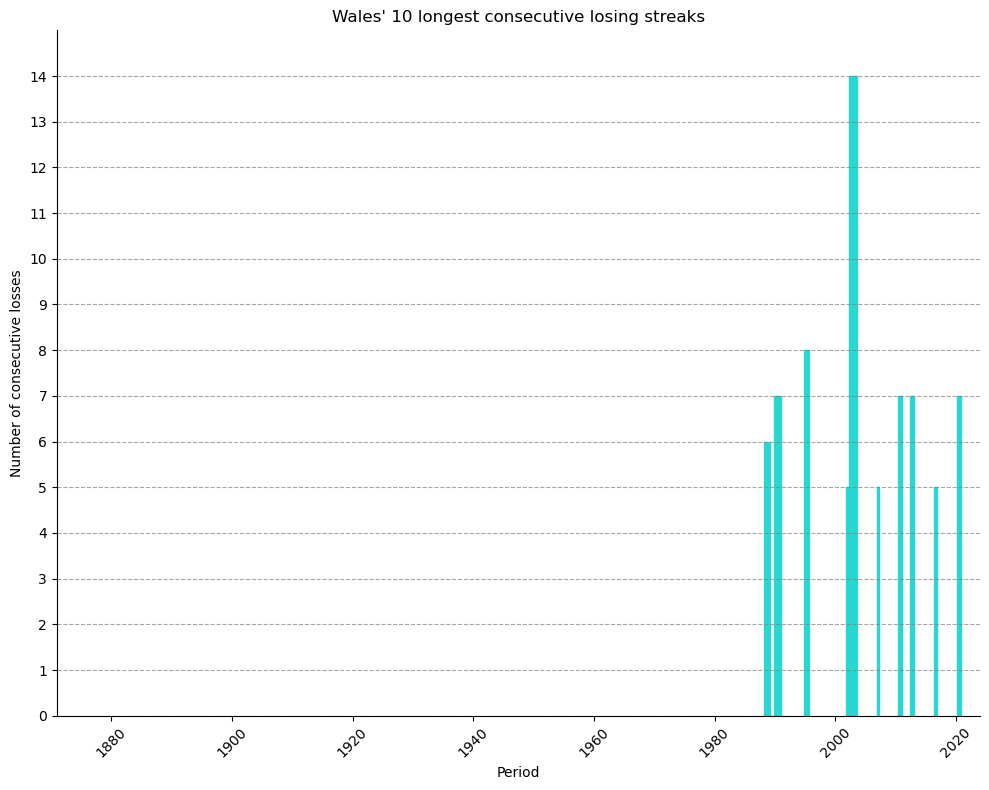

In [79]:
wls_loss_streaks = []

current_loss_streak_wls = 0
loss_begin_date_wls = None
loss_end_date_wls = None

for index, row in df.iterrows():
    if row['home_team'] == 'Wales' or row['away_team'] == 'Wales':
        if row['winner'] != 'Wales' and row['winner'] != None:
            if current_loss_streak_wls == 0:
                loss_begin_date_wls = row['date']
            current_loss_streak_wls += 1
            loss_end_date_wls = row['date']
        else:
            if current_loss_streak_wls > 1:
                wls_loss_streaks.append({
                    'begin_date': loss_begin_date_wls,
                    'end_date': loss_end_date_wls,
                    'loss_streak': current_loss_streak_wls
                })
            current_loss_streak_wls = 0

            
sorted_wls_loss_streaks = sorted(wls_loss_streaks, key=lambda x: x['loss_streak'], reverse=True)

loss_table_data_wls = []
for i, loss_streak in enumerate(sorted_wls_loss_streaks[:10], start=1):
    loss_table_data_wls.append([i, loss_streak['loss_streak'], loss_streak['begin_date'].strftime('%Y-%m-%d'), loss_streak['end_date'].strftime('%Y-%m-%d')])

loss_table_wls = pd.DataFrame(loss_table_data_wls, columns=['Rank', 'Loss Streak', 'Begin Date', 'End Date'])
print(tabulate(loss_table_wls, headers='keys', tablefmt='grid', showindex=False))






loss_begin_wls = ['1988-03-19', '1989-11-04', '1994-11-26', '2001-10-13', '2002-03-23', '2006-11-25', '2010-06-05', '2012-06-09', '2016-05-29', '2020-02-08']
loss_end_wls = ['1989-02-18', '1991-02-02', '1995-09-02', '2002-02-16',  '2003-08-23', '2007-03-10', '2011-02-04', '2013-02-02', '2016-11-05', '2020-11-28']
loss_row_wls = [6, 7, 8, 5, 14, 5, 7, 7, 5, 7]

plt.figure(figsize=(10, 8))
for i in range(10):
    begin_loss_date = datetime.strptime(loss_begin_wls[i], '%Y-%m-%d')
    end_loss_date = datetime.strptime(loss_end_wls[i], '%Y-%m-%d')
    
    x_loss = np.array([begin_loss_date, end_loss_date])
    y_loss = np.array([loss_row_wls[i], loss_row_wls[i]])
    
    plt.fill_between(x_loss, 0, y_loss, color='#28d7d0')
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive losses')
plt.title('Wales\' 10 longest consecutive losing streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))    
plt.ylim(0, max(loss_row_wls) + 1)
plt.yticks(range(max(loss_row_wls) + 1))
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe the longest losing streaks of Wales, all of which occurred after 1988. The 1990s are often regarded as the dark years for Welsh rugby, marked by challenging times. The 1990 Tournament proved catastrophic for the Welsh team, as they suffered four defeats in as many games. Their solitary victories that year came against Namibia. Similarly, the 1991 scenario mirrored the previous year, with no victories in the Tournament except for a 21-21 draw against Ireland, preventing a complete downfall.

Wales participated in the 1991 World Cup but faced early elimination in the pools, much like the outcome of the 1994 World Cup, even though they emerged as champions that year. The 1995 tournament brought further disappointment to the defending Welsh champions, as they endured four consecutive defeats.

With the professionalization of rugby in 1995 and the resurgence of players transitioning from XV-a-side to XIII-a-side, Wales managed to improve their situation in 1998, largely attributed to the appointment of Graham Henry as coach.

However, the 2000s brought about successive periods of defeat for the Welsh team, continuing the challenges they faced in their rugby journey.

&rarr; Wales' largest losses against each team:

In [80]:
wls_largest_loss = {team: {'loss_difference': 0, 'home_score': 0, 'away_score': 0, 'stadium': None, 'date': None} for team in wls_opponent}

for index, row in df.iterrows():
    for team in wls_opponent:
        if row['home_team'] == team and row['away_team'] == 'Wales':
            if row['winner'] != 'Wales':
                loss_difference = abs(row['away_score'] - row['home_score'])
                if loss_difference > wls_largest_loss[team]['loss_difference']:
                    wls_largest_loss[team]['loss_difference'] = loss_difference
                    wls_largest_loss[team]['home_score'] = row['home_score']
                    wls_largest_loss[team]['away_score'] = row['away_score']
                    wls_largest_loss[team]['stadium'] = row['stadium']
                    wls_largest_loss[team]['date'] = row['date'].strftime('%Y-%m-%d')
        elif row['home_team'] == 'Wales' and row['away_team'] == team:
            if row['winner'] != 'Wales':
                loss_difference = abs(row['away_score'] - row['home_score'])
                if loss_difference > wls_largest_loss[team]['loss_difference']:
                    wls_largest_loss[team]['loss_difference'] = loss_difference
                    wls_largest_loss[team]['home_score'] = row['home_score']
                    wls_largest_loss[team]['away_score'] = row['away_score']
                    wls_largest_loss[team]['stadium'] = row['stadium']
                    wls_largest_loss[team]['date'] = row['date'].strftime('%Y-%m-%d')


for team in sorted(wls_largest_loss.keys()):
    data = wls_largest_loss[team]
    color = team_colors.get(team, 'black')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m"
          f"\033[1m\033[3m{team}\033[0m")
    print(f"Score Difference: {data['loss_difference']}")
    print(f"Home Score: {data['home_score']}")
    print(f"Away Score: {data['away_score']}")
    print(f"Stadium: {data['stadium']}")
    print(f"Date: {data['date']}")
    print("-" * 20)

Argentina
Score Difference: 18
Home Score: 45
Away Score: 27
Stadium: José Amalfitani Stadium
Date: 2006-06-17
--------------------
Australia
Score Difference: 57
Home Score: 63
Away Score: 6
Stadium: Ballymore Stadium
Date: 1991-07-22
--------------------
England
Score Difference: 57
Home Score: 62
Away Score: 5
Stadium: Twickenham Stadium
Date: 2007-08-04
--------------------
France
Score Difference: 51
Home Score: 0
Away Score: 51
Stadium: Wembley Stadium
Date: 1998-04-05
--------------------
Ireland
Score Difference: 44
Home Score: 54
Away Score: 10
Stadium: Lansdowne Road
Date: 2002-02-03
--------------------
Italy
Score Difference: 8
Home Score: 30
Away Score: 22
Stadium: Stadio Flaminio
Date: 2003-02-15
--------------------
New Zealand
Score Difference: 52
Home Score: 55
Away Score: 3
Stadium: Waikato Stadium
Date: 2003-06-21
--------------------
Scotland
Score Difference: 25
Home Score: 35
Away Score: 10
Stadium: Inverleith
Date: 1924-02-02
--------------------
South Africa
Sco

We can observe the most significant losses of Wales (in terms of score difference) against each of the other teams. It is interesting to notice that except from the loss against Australia in 1991, all of the other losses occured after 1998, during the dark ages of Wales.

<div align="center">
  <h3>3. Wales' winning and losing periods</h3>
</div>

---

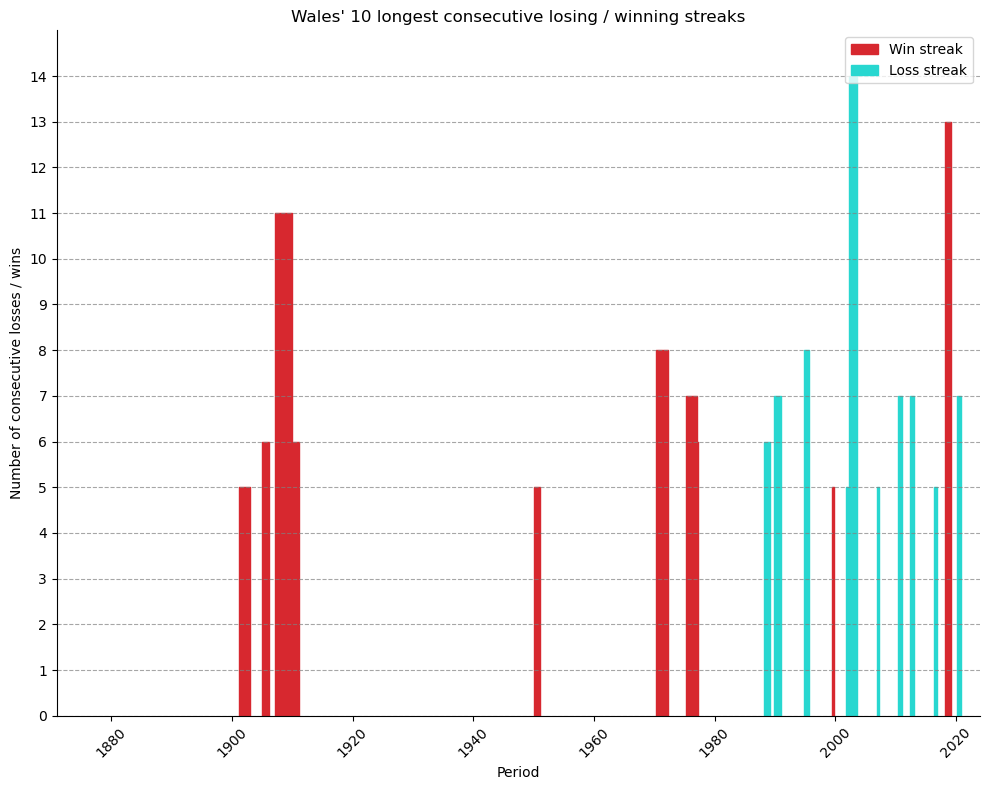

In [81]:
plt.figure(figsize=(10, 8))
for i in range(10):
    
    begin_win_date = datetime.strptime(win_begin_wls[i], '%Y-%m-%d')
    end_win_date = datetime.strptime(win_end_wls[i], '%Y-%m-%d')
    x_win = np.array([begin_win_date, end_win_date])
    y_win = np.array([win_row_wls[i], win_row_wls[i]])
    plt.fill_between(x_win, 0, y_win, color='#D7282F')
    
    
    begin_loss_date = datetime.strptime(loss_begin_wls[i], '%Y-%m-%d')
    end_loss_date = datetime.strptime(loss_end_wls[i], '%Y-%m-%d')
    x_loss = np.array([begin_loss_date, end_loss_date])
    y_loss = np.array([loss_row_wls[i], loss_row_wls[i]])
    plt.fill_between(x_loss, 0, y_loss, color='#28d7d0')
    
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive losses / wins')
plt.title('Wales\' 10 longest consecutive losing / winning streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))  
plt.ylim(0, max(loss_row_wls) + 1)
plt.yticks(range(max(loss_row_wls) + 1))
plt.tight_layout()
plt.legend(['Win streak', 'Loss streak'])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe in this summary diagram the periods of both winning and losing streaks for the Welsh national rugby team. The diagram highlights distinct periods of glory between 1900 - 1910 and 1970 - 1980. However, Wales also faced several periods of losing streaks from 1988 to 2020.

<div align="center">
  <h3>Conclusion</h3>
</div>

---

In tracing the evolution of the Welsh national rugby team's performance against the top 10 teams in the world, a compelling story unfolds. The emphasis on matches against British teams and France, owing to geographical proximity and historical ties, has contributed to the development of fierce rivalries and a higher frequency of encounters.

Examining win rates against various teams reveals intriguing trends. Notably, a strong win rate against Argentina, Italy, and Scotland reflects Wales' prowess against these opponents. The relatively balanced win rates against France and Ireland, hovering around 50%, reflect competitive matches. However, the starkly low win rates against New Zealand and South Africa, both below 10%, underscore the challenges faced against these formidable foes.

The historical narrative is enriched by Wales' distinguished winning streaks. The first "Golden Age" between 1900 and 1911 stands out, marked by unbeaten records on home soil and limited defeats. The 1970s emerged as an era of red dominance, with Welsh triumphs in European rugby, including the remarkable feat of three Grand Slams.

Another exceptional period is the consecutive wins from 2018 to 2019, showcasing Wales' resilience and consistency. Their undefeated year against nine other teams further solidified their reputation as a formidable contender.

The World Cup performances have also shaped Welsh rugby history. The 2019 World Cup, where they topped their group and reached the semi-finals, showcased their mettle on the global stage.

Conversely, Wales' struggles are evident in their periods of consecutive losses. The 1990s are often considered a challenging era for Welsh rugby, marked by setbacks and disappointing tournaments. The transition to professionalism in the mid-1990s and subsequent coaching changes brought about both periods of triumph and adversity.

In conclusion, the evolution of the Welsh national rugby team reflects a multifaceted journey characterized by triumphs, challenges, and resilience. The periods of glory, the confronting phases of losses, and the consistent pursuit of excellence have contributed to shaping Wales' storied rugby legacy on the global stage.

<div align="center">
  <h2>XII. Historical Analysis of <i> le XV de France </i> </h2>
</div>

Here is a more precise analysis of the data for France.




<img src="img/Logo_XV_de_France_masculin_2019.png" alt="Logo France" style="width: 20%;">

<div align="center">
  <h3>1. Stadiums in which the French national team played</h3>
</div>

---

In [82]:
df = df.replace({
    'Marseilles': 'Marseille',
    'Stadium Nord Lille Métropole': 'Stadium Lille Métropole',
    'Stadium Lille-Metropole': 'Stadium Lille Métropole',
    'Grand Stade Lille Métropole' : 'Stade Pierre-Mauroy',
    'Stade Pierre-Mauroy' : 'Stade Pierre Mauroy',
    'Colombes': 'Stade Olympique Yves du Manoir',
    'Stade Colombes': 'Stade Olympique Yves du Manoir',
    'Yves-du-Manoir': 'Stade Olympique Yves du Manoir',
    'Stade Yves-du-Manoir': 'Stade Olympique Yves du Manoir'
})
df.loc[(df['stadium'] == 'Stade de France') & (df['city'] == 'Paris'), 'city'] = 'Saint-Denis'
df.loc[(df['stadium'] == 'Stade Olympique Yves du Manoir') & (df['city'] == 'Paris'), 'city'] = 'Colombes'
df.loc[(df['stadium'] == 'Stade Olympique Yves du Manoir') & (df['city'] == 'Stade Olympique Yves du Manoir'), 'city'] = 'Colombes'

fr_df = df[df['country'] == 'France']

stadium_counts = fr_df.groupby(['stadium', 'city']).size().reset_index(name='Number of matches')
stadium_counts.columns = ['Stadium in France', 'City', 'Number of matches']

print(tabulate(stadium_counts.sort_values(by='Number of matches', ascending=False), headers='keys', tablefmt='grid', showindex=False))

+--------------------------------+------------------+---------------------+
| Stadium in France              | City             |   Number of matches |
+================================+==================+=====================+
| Stade de France                | Saint-Denis      |                  98 |
+--------------------------------+------------------+---------------------+
| Stade Olympique Yves du Manoir | Colombes         |                  89 |
+--------------------------------+------------------+---------------------+
| Parc des Princes               | Paris            |                  79 |
+--------------------------------+------------------+---------------------+
| Stade Vélodrome                | Marseille        |                  12 |
+--------------------------------+------------------+---------------------+
| Stadium Municipal              | Toulouse         |                   8 |
+--------------------------------+------------------+---------------------+
| Stade de l

We can observe that the vast majority (~ 80%) of national matches took place in Paris, the capital city, or its suburbs. This concentration is understandable since national matches are typically played in the national stadium, which is why 'Stade de France' accounts for a significant portion of the matches. Furthermore, stadiums like 'Stade Olympique Yves du Manoir' and 'Parc des Princes' were utilized in the era before rugby turned professional. Because as well as being in the capital region, Paris is also one of the cradles of rugby in France, so they hold historical significance for French rugby.

Marseille, as the second-largest city in France, hosted a substantial number of matches as well. Meanwhile, Toulouse, often referred to as the epicenter of French rugby, boasted its own club, 'Stade Toulousain,' which holds the record for the most titles won by a French club. The city's strong rugby tradition and the presence of 'Stade Toulousain' players in the national team contributed to the fervor of rugby fans in Toulouse, leading to a desire for national matches to be played there. Just like Bordeaux, because it was on the west coast of France that rugby was imported by the English, and in particular in the south-west that rugby developed.

It's worth noting that matches in other major cities such as Lyon or Lille are likely associated with France hosting international events like the Rugby World Cup. These cities were chosen as host locations due to their infrastructural capabilities and prominence on the national stage.

<div align="center">
  <h3>2. Triumphs insights</h3>
</div>

---

&rarr; France's win rate against each team:

Number of official matches against France for each team:
Argentina: 53 matches
Australia: 50 matches
England: 109 matches
Ireland: 101 matches
Italy: 46 matches
New Zealand: 62 matches
Scotland: 99 matches
South Africa: 44 matches
Wales: 102 matches


Number of wins for France against each team:
Argentina: 38 wins
Australia: 19 wins
England: 42 wins
Ireland: 59 wins
Italy: 43 wins
New Zealand: 13 wins
Scotland: 57 wins
South Africa: 11 wins
Wales: 48 wins


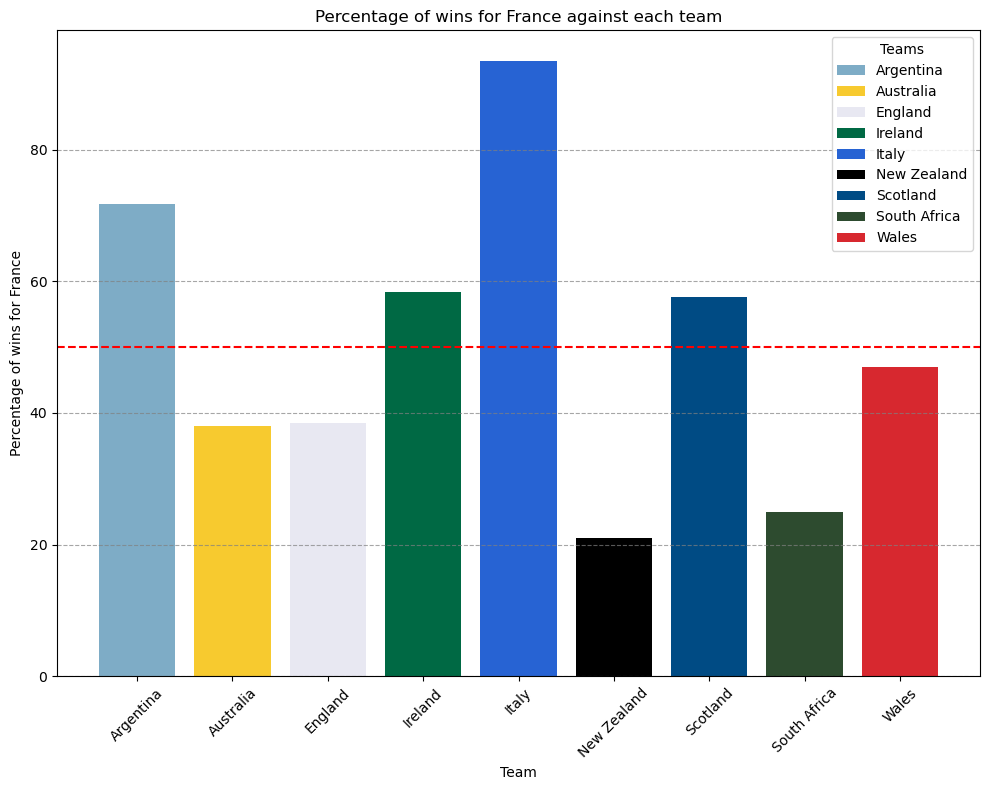

In [83]:
fr_opponent = {
    'Argentina',
    'Australia',
    'England',
    'Ireland',
    'Italy',
    'New Zealand',
    'Scotland',
    'South Africa',
    'Wales'
}

fr_match = {team: 0 for team in fr_opponent}
fr_win = {team: 0 for team in fr_opponent}
fr_ratio = {}

for index, row in df.iterrows():
    for team in fr_opponent:
        if row['home_team'] == team and row['away_team'] == 'France':
            fr_match[team] += 1
            if row['winner'] == 'France':
                fr_win[team] += 1
        elif row['home_team'] == 'France' and row['away_team'] == team:
            fr_match[team] += 1
            if row['winner'] == 'France':
                fr_win[team] += 1
              

for team in fr_win:
    ratio = (fr_win[team] / fr_match[team]) * 100 if fr_match[team] > 0 else 0
    fr_ratio[team] = ratio


print("\033[1mNumber of official matches against France for each team:\033[0m")
for team, matches in dict(sorted(fr_match.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {matches} matches\033[0m")


print("\n")

print("\033[1mNumber of wins for France against each team:\033[0m")
for team, wins in dict(sorted(fr_win.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {wins} wins\033[0m")    


plt.figure(figsize=(10, 8))
for team in sorted(fr_opponent):
    plt.bar(team, dict(sorted(fr_ratio.items()))[team], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins for France')
plt.title('Percentage of wins for France against each team')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()

We observe that the number of matches against British teams logically surpasses those against other teams (approximately 100 to approximately 50). This can be attributed to their proximity as neighboring nations, making it more feasible to arrange matches, particularly in the earlier years when travel distances were more extensive than today. Additionally, considering that the origins of rugby lie in the British Isles, it's only fitting that most matches originated there.

Furthermore, a clear trend emerges in the win rates against various teams. Notably, the win rate against Argentina and Italy stands out as notably high. The win rates against Ireland and Scotland also exceed the 50% mark, indicating a favorable performance. However, the win rates against other formidable teams like Australia, England, and Wales fall below the 50% threshold. This trend holds true for matches against New Zealand and South Africa, where the win rates are notably lower due to the strength of these teams.

It's worth mentioning that these win rates are calculated based on data spanning from 1871 to the present day. To capture the most up-to-date trends, focusing on win rates over recent years would provide a more accurate reflection of current team dynamics.

&rarr; France's win rate against each team since the last World Cup (2019):

Number of matches against France for each team:
Argentina: 1 matches
Australia: 3 matches
England: 4 matches
Ireland: 3 matches
Italy: 4 matches
New Zealand: 1 matches
Scotland: 4 matches
South Africa: 0 matches
Wales: 4 matches


Number of wins for France against each team:
Argentina: 1 wins
Australia: 1 wins
England: 2 wins
Ireland: 3 wins
Italy: 4 wins
New Zealand: 1 wins
Scotland: 2 wins
South Africa: 0 wins
Wales: 4 wins

Global win rate for France since the last WC: 75.00%


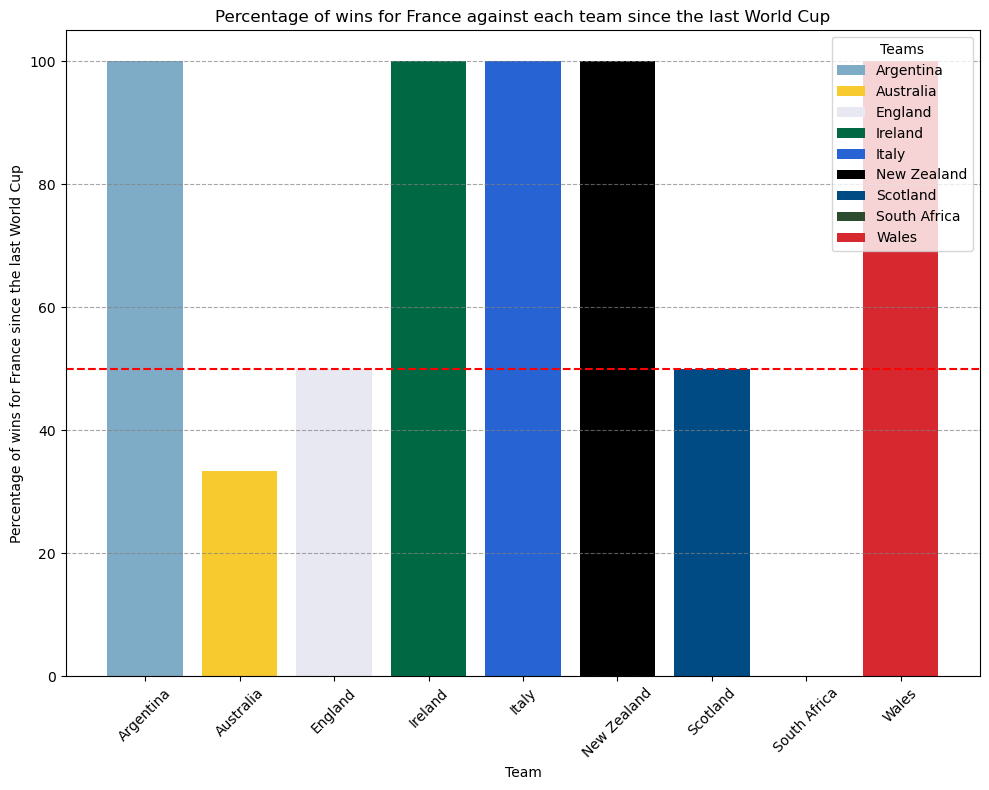

In [84]:
fr_match_2020 = {team: 0 for team in fr_opponent}
fr_win_2020 = {team: 0 for team in fr_opponent}
fr_ratio_2020 = {}

for index, row in df.iterrows():
    if row['year'] >= 2020:
        for team in fr_opponent:
            if row['home_team'] == team and row['away_team'] == 'France':
                fr_match_2020[team] += 1
                if row['winner'] == 'France':
                    fr_win_2020[team] += 1
            elif row['home_team'] == 'France' and row['away_team'] == team:
                fr_match_2020[team] += 1
                if row['winner'] == 'France':
                    fr_win_2020[team] += 1

for team in fr_win_2020:
    ratio = (fr_win_2020[team] / fr_match_2020[team]) * 100 if fr_match_2020[team] > 0 else 0
    fr_ratio_2020[team] = ratio

total_fr_win_2020 = sum(fr_win_2020.values())
total_fr_match_2020 = sum(fr_match_2020.values())



print("\033[1mNumber of matches against France for each team:\033[0m")
for team, matches in dict(sorted(fr_match_2020.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {matches} matches\033[0m")


print("\n")

print("\033[1mNumber of wins for France against each team:\033[0m")
for team, wins in dict(sorted(fr_win_2020.items())).items():
    count = appearances[team]
    color = team_colors.get(team, 'gray')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m{team}: {wins} wins\033[0m")

global_win_rate_fr_2020 = (total_fr_win_2020 / total_fr_match_2020) * 100
print("\nGlobal win rate for France since the last WC: {:.2f}%".format(global_win_rate_fr_2020))



plt.figure(figsize=(10, 8))
for team in sorted(fr_opponent):
    plt.bar(team, fr_ratio_2020[team], color=team_colors.get(team, 'gray'), label=team)

plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.axhline(y=50, color='red', linestyle='--')
plt.xlabel('Team')
plt.ylabel('Percentage of wins for France since the last World Cup')
plt.title('Percentage of wins for France against each team since the last World Cup')
plt.xticks(rotation=45)
plt.legend(title='Teams')
plt.tight_layout()
plt.show()


We can observe that the win rate against all other teams is consistently at least 50%. Following the 2019 World Cup in Japan, the French rugby federation introduced a new management team led by Fabien Galthié. This new leadership includes Raphaël Ibañez as the team's general manager, supported by four coaches: William Servat and Karim Ghezal as co-coaches of the forwards, Laurent Labit as the backs coach, and the Englishman Shaun Edwards responsible for defense. Thibault Giroud, who previously worked with Galthié at RC Toulon in 2017-2018, has taken on the role of performance director. Nicolas Buffa continues to oversee video analysis and now serves as the director of the analysis unit.

This comprehensive overhaul of the coaching staff signals a fresh start for the French team. Notably, the outcomes have been quite positive. France's overall win rate since the last World Cup stands at an impressive 77.42%. This includes victories against traditionally challenging opponents like New Zealand and South Africa. Furthermore, as previously observed, the team's most significant winning streak occurred between November 5, 2021, and May 2, 2023, which aligns well with their current strong performance.

&rarr; France's longest winning streaks:

+--------+--------------+--------------+------------+
|   Rank |   Win Streak | Begin Date   | End Date   |
+========+==============+==============+============+
|      1 |            8 | 1976-03-20   | 1977-06-25 |
+--------+--------------+--------------+------------+
|      2 |            7 | 1954-04-10   | 1955-02-26 |
+--------+--------------+--------------+------------+
|      3 |            7 | 1960-03-26   | 1961-01-07 |
+--------+--------------+--------------+------------+
|      4 |            7 | 1998-02-07   | 1998-11-14 |
+--------+--------------+--------------+------------+
|      5 |            7 | 2001-11-10   | 2002-04-06 |
+--------+--------------+--------------+------------+
|      6 |            6 | 2004-02-14   | 2004-11-13 |
+--------+--------------+--------------+------------+
|      7 |            5 | 1967-02-11   | 1967-04-15 |
+--------+--------------+--------------+------------+
|      8 |            5 | 1982-03-20   | 1983-02-05 |
+--------+--------------+---

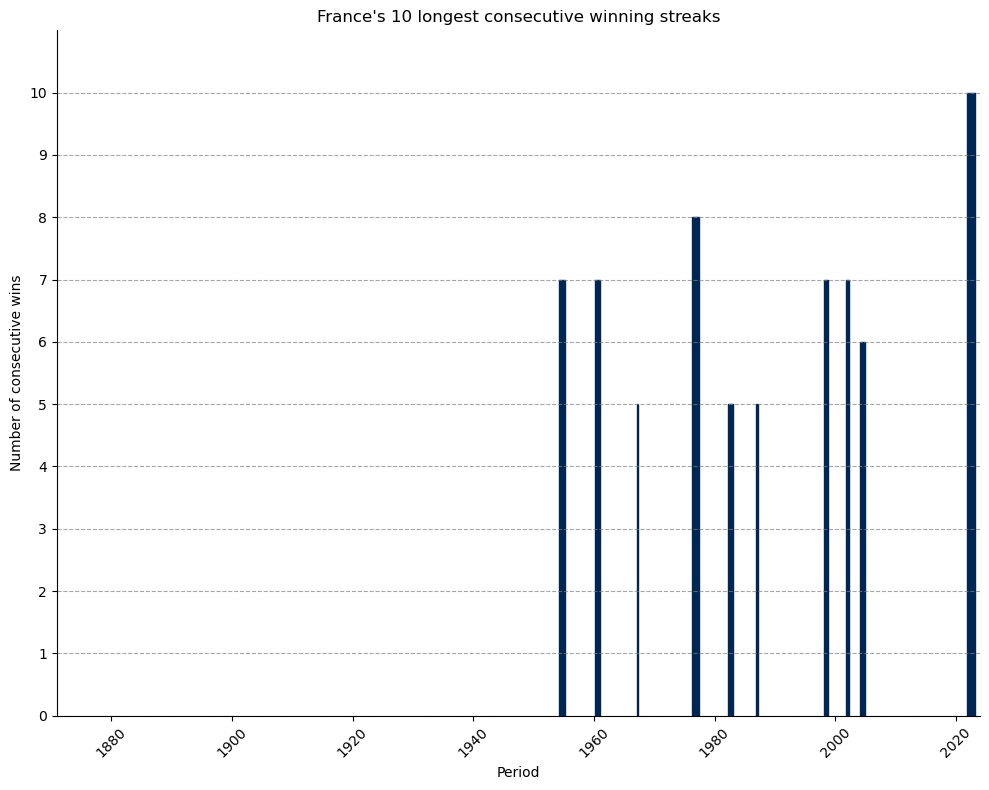

In [85]:
fr_win_streaks = []

current_win_streak_fr = 0
win_begin_date_fr = None
win_end_date_fr = None

for index, row in df.iterrows():
    if row['home_team'] == 'France' or row['away_team'] == 'France':
        if row['winner'] == 'France':
            if current_win_streak_fr == 0:
                win_begin_date_fr = row['date']
            current_win_streak_fr += 1
            win_end_date_fr = row['date']
        else:
            if current_win_streak_fr > 1:
                fr_win_streaks.append({
                    'begin_date': win_begin_date_fr,
                    'end_date': win_end_date_fr,
                    'wins_streak': current_win_streak_fr
                })
            current_win_streak_fr = 0

sorted_fr_win_streaks = sorted(fr_win_streaks, key=lambda x: x['wins_streak'], reverse=True)

win_table_data_fr = []
for i, win_streak in enumerate(sorted_fr_win_streaks[:10], start=1):
    win_table_data_fr.append([i, win_streak['wins_streak'], win_streak['begin_date'].strftime('%Y-%m-%d'), win_streak['end_date'].strftime('%Y-%m-%d')])

win_table_fr = pd.DataFrame(win_table_data_fr, columns=['Rank', 'Win Streak', 'Begin Date', 'End Date'])
print(tabulate(win_table_fr, headers='keys', tablefmt='grid', showindex=False))





win_begin_fr = ['1954-04-10', '1960-03-26', '1967-02-11', '1976-03-20', '1982-03-20', '1986-11-15', '1998-02-07', '2001-11-10', '2004-02-14', '2021-11-05']
win_end_fr = ['1955-02-26', '1961-01-07', '1967-04-15', '1977-06-25', '1983-02-05', '1987-03-21', '1998-11-14', '2002-04-06', '2004-11-13', '2023-02-05']
win_row_fr = [7, 7, 5, 8, 5, 5, 7, 7, 6, 10]

plt.figure(figsize=(10, 8))
for i in range(10):
    begin_win_date = datetime.strptime(win_begin_fr[i], '%Y-%m-%d')
    end_win_date = datetime.strptime(win_end_fr[i], '%Y-%m-%d')
    
    x_win = np.array([begin_win_date, end_win_date])
    y_win = np.array([win_row_fr[i], win_row_fr[i]])
    
    plt.fill_between(x_win, 0, y_win, color='#002654')
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive wins')
plt.title('France\'s 10 longest consecutive winning streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))  
plt.ylim(0, max(win_row_fr) + 1)
plt.yticks(range(max(win_row_fr) + 1))
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe the longest winning streaks of France. They all occurred after the 1950s when rugby had firmly established itself in the country. During this period, the national team achieved numerous consecutive victories in almost every decade, except for the 2010s.

In fact, the 1960s marked the first time that the French won the Tournament on their own. In 1959, the French team claimed victory in the Tournament alone for the first time. They continued their winning streak, securing the Tournament titles in 1960, 1961, and 1962. The Tricolores triumphed once again with a series of Tournament titles in 1967, 1968, and 1970.

The period from 1976 to 1977 holds significance as the French achieved the Grand Slam in 1977 and maintained a positive record against the world's top team, the All Blacks. Between 1973 and 1979, the French met the New Zealanders five times, winning three of those encounters against two losses.

The 1980s were also a brilliant era for France, led by the iconic coach Jacques Fouroux. They secured six Tournament victories in 1981, 1983, 1986, 1987, 1988, and 1989, including two Grand Slams in 1981 and 1987. With the exception of a somewhat disappointing 1982 season, Les Bleus consistently finished in one of the top two positions in the Tournament between 1981 and 1989. This period also saw the legendary Serge Blanco make his mark for France.

From 1998 to 2004, the <i> XV de France </i> experienced another period of glory. The team's success in the 2000s included four Tournament victories in 2002, 2003, 2004, 2006, and 2007, with two Grand Slams in 2002 and 2004. Notable figures such as Fabien Pelous, Fabien Galthié, Olivier Magne, and Raphaël Ibañez served as team captains during the successful Grand Slams. These achievements were also credited to coach Bernard Laporte, who led the team from 1999 until the end of the 2007 World Cup.

The most extended winning streak occurred from the 5th of November 2021 to the 5th of February 2023. Perhaps the best is yet to come for the French rugby team.

&rarr; France's largest wins against each team:

In [86]:
fr_largest_win = {team: {'win_difference': 0, 'home_score': 0, 'away_score': 0, 'stadium': None, 'date': None} for team in fr_opponent}

for index, row in df.iterrows():
    for team in fr_opponent:
        if row['home_team'] == team and row['away_team'] == 'France':
            if row['winner'] == 'France':
                win_difference = abs(row['away_score'] - row['home_score'])
                if win_difference > fr_largest_win[team]['win_difference']:
                    fr_largest_win[team]['win_difference'] = win_difference
                    fr_largest_win[team]['home_score'] = row['home_score']
                    fr_largest_win[team]['away_score'] = row['away_score']
                    fr_largest_win[team]['stadium'] = row['stadium']
                    fr_largest_win[team]['date'] = row['date'].strftime('%Y-%m-%d')
        elif row['home_team'] == 'France' and row['away_team'] == team:
            if row['winner'] == 'France':
                win_difference = abs(row['away_score'] - row['home_score'])
                if win_difference > fr_largest_win[team]['win_difference']:
                    fr_largest_win[team]['win_difference'] = win_difference
                    fr_largest_win[team]['home_score'] = row['home_score']
                    fr_largest_win[team]['away_score'] = row['away_score']
                    fr_largest_win[team]['stadium'] = row['stadium']
                    fr_largest_win[team]['date'] = row['date'].strftime('%Y-%m-%d')

                    
for team in sorted(fr_largest_win.keys()):
    data = fr_largest_win[team]
    color = team_colors.get(team, 'black')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m"
          f"\033[1m\033[3m{team}\033[0m")
    print(f"Score Difference: {data['win_difference']}")
    print(f"Home Score: {data['home_score']}")
    print(f"Away Score: {data['away_score']}")
    print(f"Stadium: {data['stadium']}")
    print(f"Date: {data['date']}")
    print("-" * 20)

Argentina
Score Difference: 39
Home Score: 10
Away Score: 49
Stadium: Estadio José Fierro
Date: 2012-06-23
--------------------
Australia
Score Difference: 28
Home Score: 34
Away Score: 6
Stadium: Parc des Princes
Date: 1976-10-30
--------------------
England
Score Difference: 25
Home Score: 37
Away Score: 12
Stadium: Stade Olympique Yves du Manoir
Date: 1972-02-26
--------------------
Ireland
Score Difference: 39
Home Score: 44
Away Score: 5
Stadium: Stade de France
Date: 2002-04-06
--------------------
Italy
Score Difference: 47
Home Score: 60
Away Score: 13
Stadium: Stade Mayol
Date: 1967-03-26
--------------------
New Zealand
Score Difference: 15
Home Score: 40
Away Score: 25
Stadium: Stade de France
Date: 2021-11-20
--------------------
Scotland
Score Difference: 42
Home Score: 51
Away Score: 9
Stadium: Stadium Australia
Date: 2003-10-25
--------------------
South Africa
Score Difference: 20
Home Score: 30
Away Score: 10
Stadium: Stade Vélodrome
Date: 2002-11-09
------------------

We can observe the most significant victories of France (in terms of score difference) against each of the other teams. It is interesting to notice that some of those victories occurred in 1976, at the beginning of the 2000s and after the 2019 World Cup. These periods correspond to the peak glory periods for French rugby as seen previously.

<div align="center">
  <h3>3. Debacles insights</h3>
</div>

---

&rarr; France's longest losing streaks:

+--------+---------------+--------------+------------+
|   Rank |   Loss Streak | Begin Date   | End Date   |
+========+===============+==============+============+
|      1 |            18 | 1911-01-28   | 1920-02-17 |
+--------+---------------+--------------+------------+
|      2 |            15 | 1924-01-26   | 1927-02-26 |
+--------+---------------+--------------+------------+
|      3 |            12 | 1906-01-01   | 1910-03-28 |
+--------+---------------+--------------+------------+
|      4 |             9 | 1968-07-13   | 1969-02-22 |
+--------+---------------+--------------+------------+
|      5 |             7 | 1981-07-05   | 1982-03-06 |
+--------+---------------+--------------+------------+
|      6 |             7 | 2017-06-10   | 2018-02-11 |
+--------+---------------+--------------+------------+
|      7 |             5 | 1999-03-06   | 1999-08-28 |
+--------+---------------+--------------+------------+
|      8 |             5 | 2013-06-08   | 2013-11-23 |
+--------+

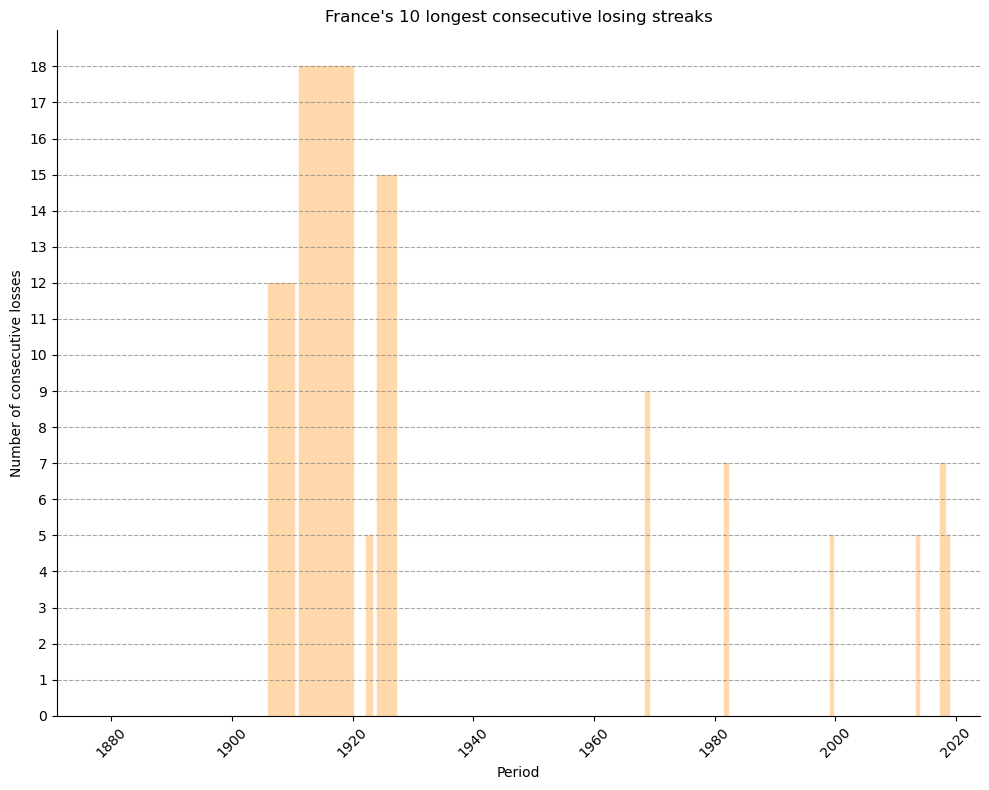

In [87]:
fr_loss_streaks = []

current_loss_streak_fr = 0
loss_begin_date_fr = None
loss_end_date_fr = None

for index, row in df.iterrows():
    if row['home_team'] == 'France' or row['away_team'] == 'France':
        if row['winner'] != 'France' and row['winner'] != None:
            if current_loss_streak_fr == 0:
                loss_begin_date_fr = row['date']
            current_loss_streak_fr += 1
            loss_end_date_fr = row['date']
        else:
            if current_loss_streak_fr > 1:
                fr_loss_streaks.append({
                    'begin_date': loss_begin_date_fr,
                    'end_date': loss_end_date_fr,
                    'loss_streak': current_loss_streak_fr
                })
            current_loss_streak_fr = 0

            
sorted_fr_loss_streaks = sorted(fr_loss_streaks, key=lambda x: x['loss_streak'], reverse=True)

loss_table_data_fr = []
for i, loss_streak in enumerate(sorted_fr_loss_streaks[:10], start=1):
    loss_table_data_fr.append([i, loss_streak['loss_streak'], loss_streak['begin_date'].strftime('%Y-%m-%d'), loss_streak['end_date'].strftime('%Y-%m-%d')])

loss_table_fr = pd.DataFrame(loss_table_data_fr, columns=['Rank', 'Loss Streak', 'Begin Date', 'End Date'])
print(tabulate(loss_table_fr, headers='keys', tablefmt='grid', showindex=False))






loss_begin_fr = ['1906-01-01', '1911-01-28', '1922-03-23', '1924-01-26', '1968-07-13', '1981-07-05', '1999-03-06', '2013-06-08', '2017-06-10', '2018-03-17']
loss_end_fr = ['1910-03-28', '1920-02-17', '1923-04-02', '1927-02-26', '1969-02-22', '1982-03-06', '1999-08-28', '2013-11-23', '2018-02-11', '2018-11-10']
loss_row_fr = [12, 18, 5, 15, 9, 7, 5, 5, 7, 5]

plt.figure(figsize=(10, 8))
for i in range(10):
    begin_loss_date = datetime.strptime(loss_begin_fr[i], '%Y-%m-%d')
    end_loss_date = datetime.strptime(loss_end_fr[i], '%Y-%m-%d')
    
    x_loss = np.array([begin_loss_date, end_loss_date])
    y_loss = np.array([loss_row_fr[i], loss_row_fr[i]])
    
    plt.fill_between(x_loss, 0, y_loss, color='#ffd9ab')
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive losses')
plt.title('France\'s 10 longest consecutive losing streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))    
plt.ylim(0, max(loss_row_fr) + 1)
plt.yticks(range(max(loss_row_fr) + 1))
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe the longest losing streaks of France. The most significant ones occurred between 1905 and 1930 when rugby was relatively new in France, and the British neighbors proved to be formidable opponents, resulting in a series of consecutive losses. France played its first official match in 1906, and during this period, <i> Le XV de France </i> was in the process of learning international rugby and regularly found itself at the bottom of the Tournament standings until 1914.

From 1906 to 1914, the French team participated in 28 international matches and managed to secure only one victory, which came against Scotland in 1911 with a score of 16-15. This marked their first international victory.

Following the conclusion of the First World War, the French team showed progress and improvement. They succeeded in winning two out of four matches during the Five Nations Tournaments in 1921, 1930, and 1931. From 1920 to 1930, the French team engaged in fifty international matches and secured victories in thirteen of them, managing to defeat all European opponents at least once.

Another noteworthy period of losing streaks occurred from 2013 to 2018. During this time, French rugby experienced one of its most challenging phases in decades, with defeats becoming a regular occurrence. Throughout the period from 2011 to 2019, France faced a period of crisis marked by highly disappointing results. The French team finished last in the 2013 Six Nations Tournament, and in 2014, the French XV claimed the fourth position. The 2015 World Cup saw France failing to advance beyond the pool stage. In 2016, France ended the tournament in 5th place. The year 2018 saw France plummet to the tenth position in the world ranking, concluding the year with eight losses and only three victories – the lowest ranking France had ever held since the ranking's inception in September 2003. During this tumultuous period, the team underwent changes in coaching staff, including Philippe Saint-André (2011 - 2015), Guy Novès (2015 - 2017), and Jacques Brunel (2017 - 2019).

In the lead-up to the 2019 Six Nations Tournament, Jacques Brunel initiated changes within the team, introducing young players such as Romain Ntamack, Thomas Ramos, and Grégory Alldritt. Despite the challenges posed by these defeats, the emergence of these young talents marked the beginning of a renewal period for French rugby.

&rarr; France's largest losses against each team:

In [88]:
fr_largest_loss = {team: {'loss_difference': 0, 'home_score': 0, 'away_score': 0, 'stadium': None, 'date': None} for team in fr_opponent}

for index, row in df.iterrows():
    for team in fr_opponent:
        if row['home_team'] == team and row['away_team'] == 'France':
            if row['winner'] != 'France':
                loss_difference = abs(row['away_score'] - row['home_score'])
                if loss_difference > fr_largest_loss[team]['loss_difference']:
                    fr_largest_loss[team]['loss_difference'] = loss_difference
                    fr_largest_loss[team]['home_score'] = row['home_score']
                    fr_largest_loss[team]['away_score'] = row['away_score']
                    fr_largest_loss[team]['stadium'] = row['stadium']
                    fr_largest_loss[team]['date'] = row['date'].strftime('%Y-%m-%d')
        elif row['home_team'] == 'France' and row['away_team'] == team:
            if row['winner'] != 'France':
                loss_difference = abs(row['away_score'] - row['home_score'])
                if loss_difference > fr_largest_loss[team]['loss_difference']:
                    fr_largest_loss[team]['loss_difference'] = loss_difference
                    fr_largest_loss[team]['home_score'] = row['home_score']
                    fr_largest_loss[team]['away_score'] = row['away_score']
                    fr_largest_loss[team]['stadium'] = row['stadium']
                    fr_largest_loss[team]['date'] = row['date'].strftime('%Y-%m-%d')


for team in sorted(fr_largest_loss.keys()):
    data = fr_largest_loss[team]
    color = team_colors.get(team, 'black')
    print(f"\033[38;2;{int(color[0]*255)};{int(color[1]*255)};{int(color[2]*255)}m"
          f"\033[1m\033[3m{team}\033[0m")
    print(f"Score Difference: {data['loss_difference']}")
    print(f"Home Score: {data['home_score']}")
    print(f"Away Score: {data['away_score']}")
    print(f"Stadium: {data['stadium']}")
    print(f"Date: {data['date']}")
    print("-" * 20)

Argentina
Score Difference: 28
Home Score: 41
Away Score: 13
Stadium: José Amalfitani Stadium
Date: 2010-06-26
--------------------
Australia
Score Difference: 43
Home Score: 16
Away Score: 59
Stadium: Stade de France
Date: 2010-11-27
--------------------
England
Score Difference: 37
Home Score: 37
Away Score: 0
Stadium: Twickenham Stadium
Date: 1911-01-28
--------------------
Ireland
Score Difference: 24
Home Score: 24
Away Score: 0
Stadium: Mardyke
Date: 1913-03-24
--------------------
Italy
Score Difference: 8
Home Score: 32
Away Score: 40
Stadium: Stade Lesdiguières
Date: 1997-03-22
--------------------
New Zealand
Score Difference: 51
Home Score: 61
Away Score: 10
Stadium: Westpac Stadium
Date: 2007-06-09
--------------------
Scotland
Score Difference: 28
Home Score: 31
Away Score: 3
Stadium: Inverleith
Date: 1912-01-20
--------------------
South Africa
Score Difference: 42
Home Score: 10
Away Score: 52
Stadium: Parc des Princes
Date: 1997-11-22
--------------------
Wales
Score Di

We can observe the most significant losses of France (in terms of score difference) against each of the other teams. It is interesting to note that some of these losses occurred around 1910 against the British neighbors, coinciding with the period when rugby was beginning to take root in France. Furthermore, losses in 1997 and 2010 are particularly notable. These were the same years when France managed to secure Grand Slam victories in the 5 and 6 Nations tournaments respectively.

One could speculate whether these losses were influenced by overconfidence during those years or the challenges of assuming the favored status that everyone strives to defeat. It's possible that the pressure of being the team to beat weighed heavily on their performance during these crucial periods. This underscores the complex dynamics of sports psychology and the unpredictable nature of competitive sports, where even the most successful teams can face unexpected setbacks.

<div align="center">
  <h3>4. France's winning and losing periods</h3>
</div>

---

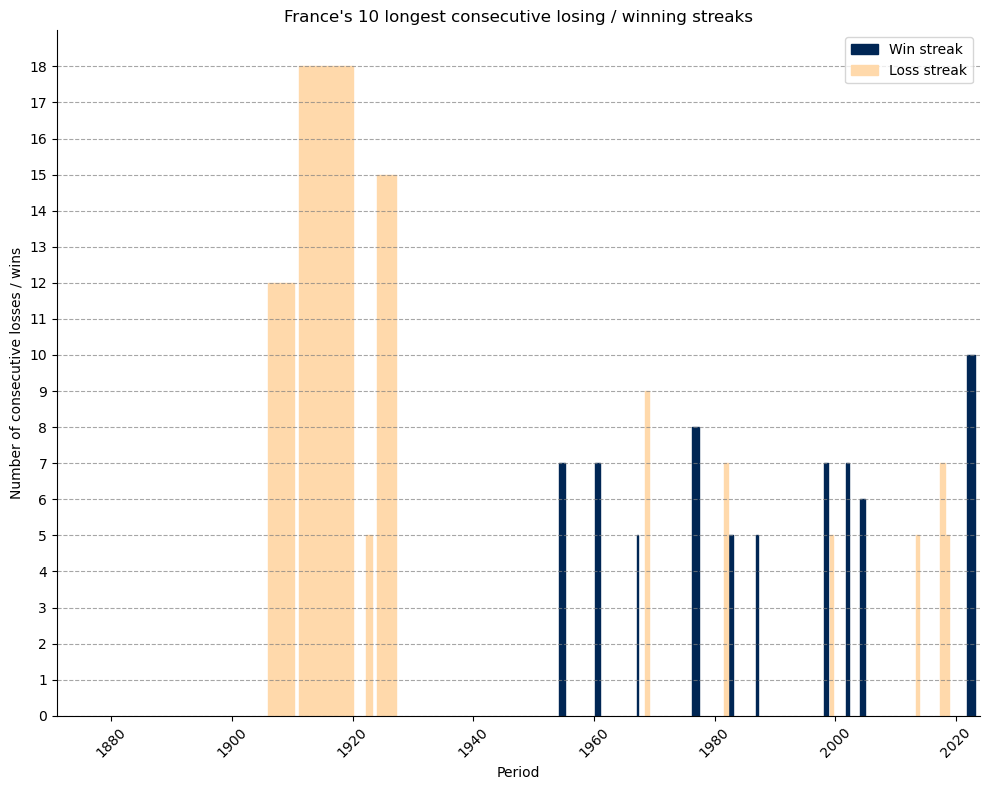

In [89]:
plt.figure(figsize=(10, 8))
for i in range(10):
    
    begin_win_date = datetime.strptime(win_begin_fr[i], '%Y-%m-%d')
    end_win_date = datetime.strptime(win_end_fr[i], '%Y-%m-%d')
    x_win = np.array([begin_win_date, end_win_date])
    y_win = np.array([win_row_fr[i], win_row_fr[i]])
    plt.fill_between(x_win, 0, y_win, color='#002654')
    
    
    begin_loss_date = datetime.strptime(loss_begin_fr[i], '%Y-%m-%d')
    end_loss_date = datetime.strptime(loss_end_fr[i], '%Y-%m-%d')
    x_loss = np.array([begin_loss_date, end_loss_date])
    y_loss = np.array([loss_row_fr[i], loss_row_fr[i]])
    plt.fill_between(x_loss, 0, y_loss, color='#ffd9ab')
    
    
plt.xlabel('Period')
plt.ylabel('Number of consecutive losses / wins')
plt.title('France\'s 10 longest consecutive losing / winning streaks')
plt.xticks(rotation=45)
plt.xlim(datetime(1871, 1, 1), datetime(2023, 12, 31))  
plt.ylim(0, max(loss_row_fr) + 1)
plt.yticks(range(max(loss_row_fr) + 1))
plt.tight_layout()
plt.legend(['Win streak', 'Loss streak'])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe in this summary diagram the periods of both winning and losing streaks for the French national rugby team. The diagram highlights a clear progression over the years. While the early ages of rugby in France were marked by losses, a significant transformation occurred from the 1950s onwards. Despite facing a crisis during the 2010s, the team ultimately reached its peak performance in 2021. This journey showcases the team's resilience, evolution, and determination to overcome challenges, ultimately contributing to its current status.

<div align="center">
  <h3>5. The Crunch (France Vs England)</h3>
</div>

---

+--------------------------+---------+
| Statistic                |   Count |
+==========================+=========+
| Total number of crunches |     109 |
+--------------------------+---------+
| Number of English wins   |      60 |
+--------------------------+---------+
| Number of French wins    |      42 |
+--------------------------+---------+
| Total number of draws    |       7 |
+--------------------------+---------+


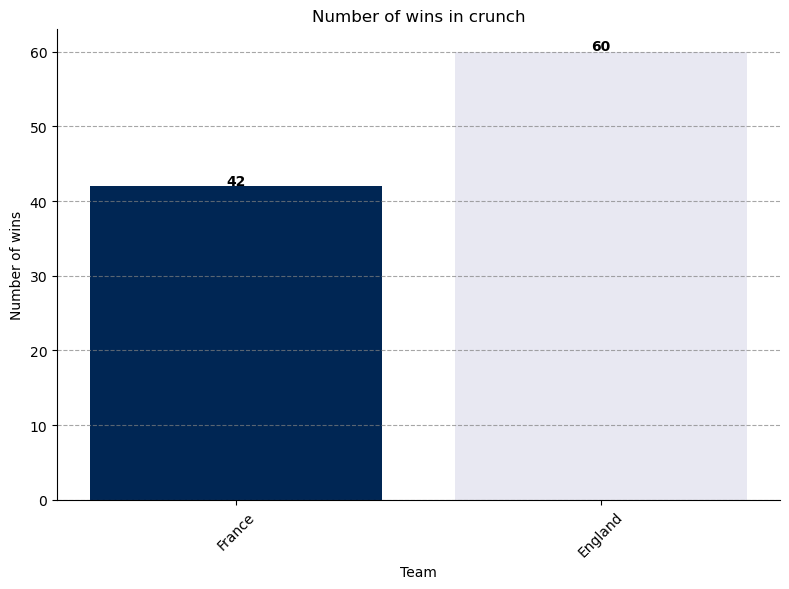

In [90]:
number_of_crunches = 0
english_wins = 0
french_wins = 0
draw_crunches = 0

for index, row in df.iterrows():
    if (row['home_team'] == 'England' and row['away_team'] == 'France') or (row['home_team'] == 'France' and row['away_team'] == 'England'):
        number_of_crunches += 1
        if row['winner'] == 'France':
            french_wins += 1
        elif row['winner'] == 'England':
            english_wins += 1
        elif row['winner'] is None:
            draw_crunches += 1

crunch_data = [
    ['Total number of crunches', number_of_crunches],
    ['Number of English wins', english_wins],
    ['Number of French wins', french_wins],
    ['Total number of draws', draw_crunches]
]

print(tabulate(crunch_data, headers=['Statistic', 'Count'], tablefmt='grid'))

plt.figure(figsize=(8, 6))
bars = plt.bar(['France', 'England'], [french_wins, english_wins], color=['#002654', '#E8E8F2'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', color='black', fontweight='bold')

plt.xlabel('Team')
plt.ylabel('Number of wins')
plt.title('Number of wins in crunch')
plt.xticks(rotation=45)
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe that England has won the majority of all-time encounters between the two teams. However, it would be interesting to examine the distribution of these victories over the years. Given that England invented rugby, it is likely that in the early years, England frequently secured victories against France.

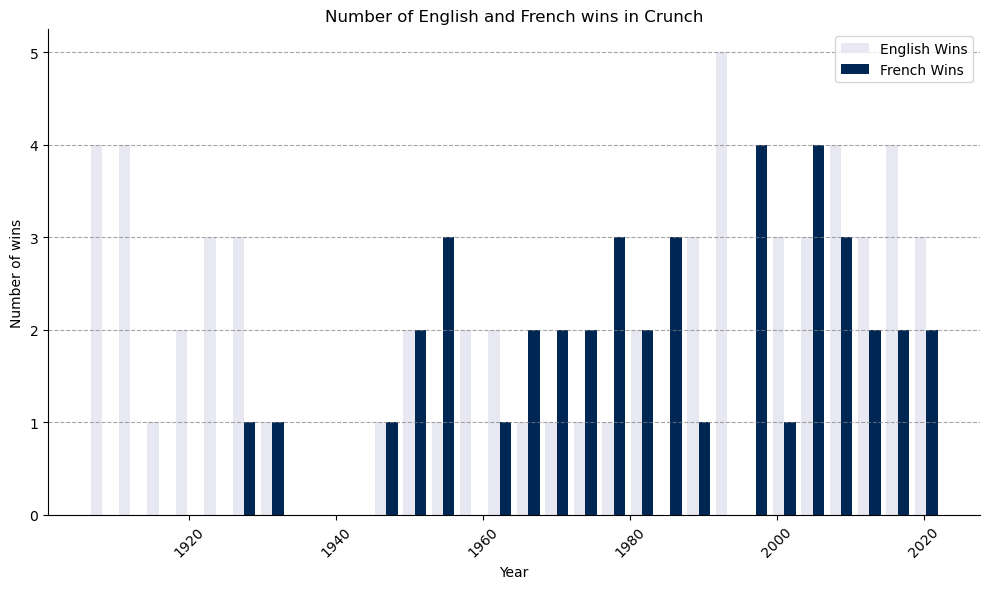

In [91]:
english_wins = []
french_wins = []

for index, row in df.iterrows():
    if row['home_team'] == 'England' and row['away_team'] == 'France':
        if row['winner'] == 'France':
            french_wins.append(row['date'])
        elif row['winner'] == 'England':
            english_wins.append(row['date'])
    elif row['home_team'] == 'France' and row['away_team'] == 'England':
        if row['winner'] == 'France':
            french_wins.append(row['date'])
        elif row['winner'] == 'England':
            english_wins.append(row['date'])

english_wins = pd.to_datetime(english_wins)
french_wins = pd.to_datetime(french_wins)

plt.figure(figsize=(10, 6))
plt.hist([english_wins, french_wins], bins=30, color=['#E8E8F2', '#002654'], label=['English Wins', 'French Wins'])
plt.xlabel('Year')
plt.ylabel('Number of wins')
plt.title('Number of English and French wins in Crunch')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7, color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

We can observe that, as predicted, England dominated France before World War II, winning almost all matches against them. This dominance can be attributed to the fact that rugby originated in England, giving them an advantage over a nation with less experience. However, since the end of World War II, the contests between the two historical rivals have become more balanced. The number of victories per year has become more equal, reflecting a more competitive rivalry.

<div align="center">
    <h3>6. Honors list of <i> les Bleus </i> </h3>
</div>

---

 &rarr; 6 Nations / Grand Slam honors list:




<img src="img/six-nations-trophy.webp" alt="6 Nations Trophy" style="width: 20%;">

In [92]:
url_Six_Nations = 'https://en.wikipedia.org/wiki/Six_Nations_Championship'
page_Six_Nations = requests.get(url_Six_Nations)
soup_Six_Nations = BeautifulSoup(page_Six_Nations.text, 'html')
table_Six_Nations = soup_Six_Nations.find_all('table')[4]
titles_Six_Nations = table_Six_Nations.find_all('th')
table_titles_Six_Nations = [title.text.strip() for title in titles_Six_Nations]
df_Six_Nations = pd.DataFrame(columns = table_titles_Six_Nations[0:7])
df_Tournaments = pd.DataFrame(columns = table_titles_Six_Nations[0:7])
df_Outright_wins = pd.DataFrame(columns = table_titles_Six_Nations[0:7])
df_Grand_Slams = pd.DataFrame(columns = table_titles_Six_Nations[0:7])
df_Triple_Crowns = pd.DataFrame(columns = table_titles_Six_Nations[0:7])
df_Wooden_Spoon = pd.DataFrame(columns = table_titles_Six_Nations[0:7])
column_data_Six_Nations = table_Six_Nations.find_all('tr')

i = 1
for row in column_data_Six_Nations[1:]:
    row_data = row.find_all('td')
    
    if i == 2 or i == 7 or i == 12 or i == 17:
        individual_row = ['**********'] + ['**********'] + ['**********'] + [data.text.strip() for data in row_data]  + ['**********'] + ['**********'] + ['**********']
    else:
        individual_row = [data.text.strip() for data in row_data]
    
    i += 1
    
    length = len(df_Six_Nations)
    df_Six_Nations.loc[length] = individual_row
  

for row in column_data_Six_Nations[1:2]:
    row_data = row.find_all('td')
    
    individual_row = [data.text.strip() for data in row_data]
    length = len(df_Tournaments)
    df_Tournaments.loc[length] = individual_row
 
for row in column_data_Six_Nations[3:7]:
    row_data = row.find_all('td')
    
    individual_row = [data.text.strip() for data in row_data]
    length = len(df_Outright_wins)
    df_Outright_wins.loc[length] = individual_row
 
for row in column_data_Six_Nations[8:12]:
    row_data = row.find_all('td')
    
    individual_row = [data.text.strip() for data in row_data]
    length = len(df_Grand_Slams)
    df_Grand_Slams.loc[length] = individual_row

    
for row in column_data_Six_Nations[13:17]:
    row_data = row.find_all('td')
    
    individual_row = [data.text.strip() for data in row_data]
    length = len(df_Triple_Crowns)
    df_Triple_Crowns.loc[length] = individual_row
    
for row in column_data_Six_Nations[18:22]:
    row_data = row.find_all('td')
    
    individual_row = [data.text.strip() for data in row_data]
    length = len(df_Wooden_Spoon)
    df_Wooden_Spoon.loc[length] = individual_row

    
    
print(tabulate(df_Six_Nations, headers='keys', tablefmt='grid'))

+----+--------------+------------+------------+-----------------------------+------------+------------+------------+
|    |              | England    | France     | Ireland                     | Italy      | Scotland   | Wales      |
+====+==============+============+============+=============================+============+============+============+
|  0 | Tournaments  | 127        | 94         | 129                         | 24         | 129        | 129        |
+----+--------------+------------+------------+-----------------------------+------------+------------+------------+
|  1 | **********   | ********** | ********** | Outright wins (shared wins) | ********** | ********** | ********** |
+----+--------------+------------+------------+-----------------------------+------------+------------+------------+
|  2 | Home Nations | 5 (4)      | —          | 4 (3)                       | —          | 9 (2)      | 7 (3)      |
+----+--------------+------------+------------+-----------------

We can observe that in 94 participations in those tournaments, France has won 18 Five / Six Nations titles along with 10 Grand Slams. Additionally, they finished in the last position 13 times. Out of these 13 instances, 12 occurred during the Five Nations era, primarily due to the entry of Italy. The presence of Italy meant that the other nations were less likely to finish last. Italy has finished last in 18 out of 24 tournaments (75% of the time).

Among the 12 victories in the Five Nations, 8 were shared victories. This implies that France finished first jointly with another team. France, along with Wales, holds the record for the most Grand Slams in the Six Nations.

England and Wales have won the most Five / Six Nations tournaments by a significant margin. Surprisingly, Scotland has never won a Six Nations title. Scotland's victories are limited to Five Nations and Home Nations tournaments, which were held before France's entry into the competition. This trend aligns with the historical fact that Scotland's golden era was in the distant past.

 &rarr; World Cup honors list:




<img src="img/rugby-world-cup-webb-ellis-trophy.webp" alt="World Cup Trophy" style="width: 25%;">

In [93]:
url_World_Cup = 'https://en.wikipedia.org/wiki/Rugby_World_Cup'
page_World_Cup = requests.get(url_World_Cup)
soup_World_Cup = BeautifulSoup(page_World_Cup.text, 'html')
table_World_Cup = soup_World_Cup.find_all('table')[6]
titles_World_Cup = table_World_Cup.find_all('th')
table_titles_World_Cup = [title.text.strip() for title in titles_World_Cup]
df_World_Cup = pd.DataFrame(columns = table_titles_World_Cup[0:7])

column_data_World_Cup= table_World_Cup.find_all('tr')

i = 7
for row in column_data_World_Cup[1:]:
    row_data = row.find_all('td')
    individual_row = [table_titles_World_Cup[i]] + [data.text.strip() for data in row_data]
        
    i += 1
    
    length = len(df_World_Cup)
    df_World_Cup.loc[length] = individual_row
    

    
max_column_width = 15
for column in df_World_Cup.columns:
    df_World_Cup[column] = df_World_Cup[column].apply(lambda x: x[:max_column_width] if len(x) > max_column_width else x)
print(tabulate(df_World_Cup, headers='keys', tablefmt='grid'))

+----+--------------+----------------+----------------+----------------+----------------+------------------+-----------------+
|    | Team         | Champions      | Runners-up     | Third          | Fourth         | Quarter-finals   | Apps in top 8   |
+====+==============+================+================+================+================+==================+=================+
|  0 | New Zealand  | 3 (1987, 2011, | 1 (1995)       | 3 (1991, 2003, | 1 (1999)       | 1 (2007)         | 9               |
+----+--------------+----------------+----------------+----------------+----------------+------------------+-----------------+
|  1 | South Africa | 3 (1995, 2007, | —              | 2 (1999, 2015) | —              | 2 (2003, 2011)   | 7a              |
+----+--------------+----------------+----------------+----------------+----------------+------------------+-----------------+
|  2 | Australia    | 2 (1991, 1999) | 2 (2003, 2015) | 1 (2011)       | 1 (1987)       | 3 (1995, 2007,   | 9 

We can observe that despite never having won the Webb Ellis Trophy, France is the fifth-best nation in the World Cup. France reached the final three times in 1987, 1999, and 2011, and is one of the most consistent teams along with Australia, England, and New Zealand. It has reached the quarter-finals at every edition, a total of nine times.

<div align="center">
    <h3>7. French Clubs</h3>
</div>

---

In [94]:
TOP_14_team_colors = {
    'Aviron Bayonnais': (129/255, 187/255, 233/255),
    'ASM Clermont Auvergne': (254/255, 234/255, 0/255),
    'Castres Olympique': (31/255, 91/255, 231/255),
    'Lyon Olympique Universitaire Rugby': (0/255, 0/255, 0/255),
    'Montpelier Hérault Rugby': (0/255, 15/255, 102/255),
    'Oyonnax Rugby': (255/255, 0/255, 0/255),
    'Section Paloise': (0/255, 114/255, 90/255),
    'Racing 92': (175/255, 217/255, 240/255),
    'Rubgy Club Toulonais': (153/255, 0/255, 30/255),
    'Stade français Paris rugby': (255/255, 165/255, 207/255),
    'Stade Rochelais': (255/255, 205/255, 0/255),
    'Stade Toulousain': (195/255, 0/255, 0/255),
    'Union Bordeaux Bègles': (102/255, 0/255, 44/255),
    'Union sportive arlequins perpignanais': (212/255, 28/255, 62/255),
}

&rarr; History of the league:

The <i> Ligue Nationale de Rugby </i> (LNR) manages professional rugby in France, established on July 24, 1998. It operates independently from the French Rugby Federation, overseeing the elite level of the sport. Serge Blanco became its first president after its creation, following discussions and negotiations within the rugby community to establish an entity focused on the professional aspects of the game.

&rarr; History of the professional rugby union club competition:

The French Rugby Union Championship, known as Top 14 since 2005, is an annual competition that brings together the best professional rugby union clubs in France. It was established in 1892 under the auspices of the multi-sport federation USFSA and was initially organized by a rugby committee. From the 1921 edition onward, it came under the supervision of the newly-formed French Rugby Federation. Since 1998, the organization has been handled by the National Rugby League.

The champion of France receives the Brennus Shield as a trophy. Throughout its long history, the French Championship has witnessed several periods of domination by certain clubs for ten to fifteen years. Chronologically, the championship saw the dominance of the two Parisian clubs, Racing Club de France and Stade français Paris (1892-1903), followed by Stade Bordelais (early 1900s), FC Lourdes (1950s), AS Béziers Hérault (1971-1984), and Stade Toulousain (1920s, then 1985-2001). From 1994 to 2008, a period that marked the beginning of professionalism in French rugby, Stade Toulousain, Stade français Paris, and Biarritz Olympique shared fifteen titles. This three-way dominance ended in 2009 with USA Perpignan's victory, followed by a succession of different champions, including Castres Olympique, RC Toulon, ASM Clermont Auvergne, Racing 92, and for the first time, Montpellier Hérault Rugby.

The championship format has been modified several times over its history. With the introduction of professionalism in 1995, the number of elite division clubs significantly reduced from 24 to 16, and later to 14 clubs in 2005. The championship names changed successively to Top 16, Top 14, Rugby Top 14 Orange due to a partnership with a telecommunications operator in 2008-2009, and back to Top 14.

The championship is divided into two phases: a qualification phase involving all teams and a final phase that includes the top six clubs (top four until 2008-2009) from the qualification phase, competing in direct elimination matches. Since the 2017-2018 season, the last team in the qualification phase is relegated to Pro D2 and replaced by the Pro D2 finalist, while the second-to-last team plays a relegation playoff match against the other Pro D2 finalist.

Attracting top players from around the world, securing lucrative TV broadcasting rights, and drawing large crowds to stadiums, the Top 14 is regarded as the wealthiest national rugby championship globally.



- The Golden Era (1890-1914):
The first official French rugby championship was awarded in 1892, and early titles were dominated by Parisian clubs. The game spread to the South of France due to commercial exchanges with England. The rugby stronghold extended to Aquitaine, where clubs like Aviron Bayonnais and Stade Bordelais thrived. The Rugby Union was momentarily boycotted by British teams in the 1950s due to concerns about professionalism. The sport's development was also hindered by the Second World War, but it resumed in the post-war years.

- Challenges and Dominance (1920-1970):
The 1920s witnessed Stade Toulousain's rise to dominance, winning several titles. The 1930s brought challenges due to professionalism controversies and a club secession. The Second World War caused disruptions, leading to the creation of the Challenge de l'Amitié in 1942. After the war, AS Béziers enjoyed a period of dominance with ten titles between 1970 and 1984. The 1970s to 1980s were marked by fierce competition and the emergence of powerful clubs.

- Professional Era and Internationalization (1995-Present):
The advent of professionalism in 1995 transformed the landscape of French rugby. The Top 14 evolved into a competitive league, with clubs like Stade Toulousain, Stade français Paris, and Biarritz Olympique dominating initially. The 2009 victory by USA Perpignan broke the trio's dominance. The introduction of international competitions, such as the Rugby World Cup, influenced the structure of the championship. Since then, clubs like Castres Olympique, RC Toulon, ASM Clermont Auvergne, and Racing 92 have claimed titles, with Montpellier Hérault Rugby securing.

&rarr; Geography of Rugby for the season 2023 - 2024:

- Clubs of <i> Top 14 </i> (Fisrt division)




<img src="img/Top_14.svg.png" alt="Logo Top 14" style="width: 20%;">


In [95]:
lat_AB = 43.485465
long_AB = -1.479525

lat_ASM = 45.789356
long_ASM = 3.106054

lat_CO = 43.610868
long_CO = 2.252758

lat_LOU = 45.723730
long_LOU = 4.832244

lat_MHR = 43.592964
long_MHR = 3.849649

lat_OYO = 46.253606
long_OYO = 5.644835

lat_PAU = 43.309502
long_PAU = -0.316884 

lat_R92 = 48.895645
long_R92 = 2.229651

lat_RCT = 43.118977
long_RCT = 5.936525 

lat_SF = 48.843282
long_SF = 2.252935

lat_SR = 46.158230
long_SR = -1.178372

lat_ST = 43.621739  
long_ST = 1.415560

lat_UBB = 44.829315
long_UBB = -0.598323

lat_USAP = 42.715571
long_USAP = 2.891499




Top_14_rugby_map = folium.Map(location=[46.832695, 2.658691], zoom_start=6)



folium.Marker([lat_AB, long_AB], popup='Aviron Bayonnais, Stade Jean-Dauger', icon=folium.Icon(color='cadetblue')).add_to(Top_14_rugby_map)
folium.Marker([lat_ASM, long_ASM], popup='ASM Clermont Auvergne, Stade Marcel-Michelin', icon=folium.Icon(color='beige')).add_to(Top_14_rugby_map)
folium.Marker([lat_CO, long_CO], popup='Castres Olympique, Stade Pierre-Fabre', icon=folium.Icon(color='blue')).add_to(Top_14_rugby_map)
folium.Marker([lat_LOU, long_LOU], popup='Lyon Olympique Universitaire Rugby, Matmut Stadium Gerland', icon=folium.Icon(color='black')).add_to(Top_14_rugby_map)
folium.Marker([lat_MHR, long_MHR], popup='Montpelier Hérault Rugby, GGL Stadium', icon=folium.Icon(color='darkblue')).add_to(Top_14_rugby_map)
folium.Marker([lat_OYO, long_OYO], popup='Oyonnax Rugby, Stade Charles-Mathon', icon=folium.Icon(color='orange')).add_to(Top_14_rugby_map)
folium.Marker([lat_PAU, long_PAU], popup='Section Paloise, Stade du Hameau', icon=folium.Icon(color='green')).add_to(Top_14_rugby_map)
folium.Marker([lat_R92, long_R92], popup='Racing 92, Paris La Défense Arena', icon=folium.Icon(color='lightblue')).add_to(Top_14_rugby_map)
folium.Marker([lat_RCT, long_RCT], popup='Rubgy Club Toulonais, Stade Mayol', icon=folium.Icon(color='darkred')).add_to(Top_14_rugby_map)
folium.Marker([lat_SF, long_SF], popup='Stade français Paris rugby, Stade Jean-Bouin', icon=folium.Icon(color='pink')).add_to(Top_14_rugby_map)
folium.Marker([lat_SR, long_SR], popup='Stade Rochelais, Stade Marcel-Deflandre', icon=folium.Icon(color='beige')).add_to(Top_14_rugby_map)
folium.Marker([lat_ST, long_ST], popup='Stade Toulousain, Stade Ernest-Wallon', icon=folium.Icon(color='black')).add_to(Top_14_rugby_map)
folium.Marker([lat_UBB, long_UBB], popup='Union Bordeaux Bègles, Stade Chaban-Delmas', icon=folium.Icon(color='darkpurple')).add_to(Top_14_rugby_map)
folium.Marker([lat_USAP, long_USAP], popup='Union sportive arlequins perpignanais, Stade Aimé-Giral', icon=folium.Icon(color='red')).add_to(Top_14_rugby_map)

display(Top_14_rugby_map)

Top_14_rugby_map.save('Top_14_rugby_map.html')

We can observe that a significant majority (12 out of 14) of the clubs in the top division of French rugby are located below the geographical line between La Rochelle and Oyonnax. The remaining two clubs are situated in Paris. Unsurprisingly, rugby in France has a much stronger presence in the southern regions than in the northern ones. More precisely, the concentration of elite clubs is particularly high in the southwestern quarter compared to other regions.

Historically, rugby's journey in France began on the west coast and in Paris, stretching from Le Havre to Nantes, La Rochelle, and Bordeaux. Especially in Bordeaux, rugby rapidly gained popularity across the entire southwest of France due to the milder climate that allowed year-round play, even during winter. Moreover, the rivalry between secular patronages, prevalent in the South West, and their Catholic counterparts played a significant role in promoting rugby. The Catholic Church held reservations about rugby, primarily due to its physical nature and frequent player contact, leading to a preference for football or basketball. Additionally, from a cultural standpoint, the south-west of France appeared naturally inclined towards embracing rugby, as the significance of strength and physical prowess aligned with certain local traditions like Basque strength tests. Between the late 19th and early 20th centuries, enthusiasts of activities like tug-of-war, lumberjacking, stone-lifting, and cart-lifting found a similar celebration of physical strength in rugby that resonated with them.

- Clubs of <i> Pro D2 </i> (Second division)




<img src="img/ProD2_logo_2012.svg.png" alt="Logo Pro D2" style="width: 20%;">

In [96]:
lat_ASBH = 43.334721
long_ASBH = 3.266011

lat_BO = 43.481767
long_BO = -1.537756

lat_CAB = 45.161657
long_CAB = 1.548461

lat_CR = 43.619774
long_CR = 1.327240

lat_FCG = 45.187405
long_FCG = 5.740134

lat_PR = 43.527711
long_PR = 5.422812

lat_RCV = 47.651830
long_RCV = -2.761079

lat_RNR = 49.411053
long_RNR = 1.070735

lat_SACA = 44.924501
long_SACA = 2.429591

lat_SAXV = 45.641823
long_SAXV = 0.176235

lat_SM = 43.895421
long_SM = -0.482731

lat_SUA = 44.192593
long_SUA = 0.620483

lat_USD = 43.712113
long_USD = -1.045766

lat_USM = 44.010224
long_USM = 1.351793

lat_USON = 46.975497
long_USON = 3.160214

lat_VRDR = 44.945611
long_VRDR = 4.919271




Pro_D2_rugby_map = folium.Map(location=[46.832695, 2.658691], zoom_start=6)

folium.Marker([lat_ASBH, long_ASBH], popup='Association sportive de Béziers Hérault, Stade Raoul-Barrière', icon=folium.Icon(color='darkred')).add_to(Pro_D2_rugby_map)
folium.Marker([lat_BO, long_BO], popup='Biarritz olympique Pays basque, Parc des sports d\'Aguiléra', icon=folium.Icon(color='red')).add_to(Pro_D2_rugby_map)
folium.Marker([lat_CAB, long_CAB], popup='Club athlétique Brive Corrèze Limousin, Stade Amédée-Domenech', icon=folium.Icon(color='black')).add_to(Pro_D2_rugby_map)
folium.Marker([lat_CR, long_CR], popup='Colomiers rugby, Stade Michel-Bendichou', icon=folium.Icon(color='darkblue')).add_to(Pro_D2_rugby_map)
folium.Marker([lat_FCG, long_FCG], popup='Football Club de Grenoble rugby, Stade des Alpes', icon=folium.Icon(color='darkblue')).add_to(Pro_D2_rugby_map)
folium.Marker([lat_PR, long_PR], popup='Provence rugby Aix Marseille, Stade Maurice-David', icon=folium.Icon(color='black')).add_to(Pro_D2_rugby_map)
folium.Marker([lat_RCV, long_RCV], popup='Rugby club vannetais, Stade de la Rabine', icon=folium.Icon(color='darkblue')).add_to(Pro_D2_rugby_map)
folium.Marker([lat_RNR, long_RNR], popup='Rouen Normandie rugby, Stade Robert-Diochon', icon=folium.Icon(color='black')).add_to(Pro_D2_rugby_map)
folium.Marker([lat_SACA, long_SACA], popup='Stade aurillacois Cantal Auvergne, Stade Jean-Alric', icon=folium.Icon(color='red')).add_to(Pro_D2_rugby_map)
folium.Marker([lat_SAXV, long_SAXV], popup='Soyaux Angoulême XV Charente, Stade Chanzy', icon=folium.Icon(color='darkpurple')).add_to(Pro_D2_rugby_map)
folium.Marker([lat_SM, long_SM], popup='Stade montois rugby, Stade André-et-Guy-Boniface', icon=folium.Icon(color='beige')).add_to(Pro_D2_rugby_map)
folium.Marker([lat_SUA, long_SUA], popup='Sporting Union Agen Lot-et-Garonne, Stade Alfred-Armandie', icon=folium.Icon(color='darkblue')).add_to(Pro_D2_rugby_map)
folium.Marker([lat_USD, long_USD], popup='Union sportive dacquoise rugby Landes, Stade Maurice-Boyau', icon=folium.Icon(color='red')).add_to(Pro_D2_rugby_map)
folium.Marker([lat_USM, long_USM], popup='Union sportive montalbanaise, Stade Sapiac', icon=folium.Icon(color='darkgreen')).add_to(Pro_D2_rugby_map)
folium.Marker([lat_USON, long_USON], popup='USON Nevers Rugby, Stade du Pré Fleuri', icon=folium.Icon(color='beige')).add_to(Pro_D2_rugby_map)
folium.Marker([lat_VRDR, long_VRDR], popup='Valence Romans Drôme Rugby, Stade Georges-Pompidou', icon=folium.Icon(color='black')).add_to(Pro_D2_rugby_map)

display(Pro_D2_rugby_map)

Pro_D2_rugby_map.save('Pro_D2_rugby_map.html')

We can observe that, for similar reasons as the first division, the professional clubs in the second division are predominantly located in the south of France or along the west coast, such as Vannes or Rouen, due to the previously mentioned factors. An exception is Nevers, situated right in the middle of France.

In [97]:
summary_map = folium.Map(location=[46.832695, 2.658691], zoom_start=6)


folium.Marker([lat_AB, long_AB], popup='Aviron Bayonnais, Stade Jean-Dauger', icon=folium.Icon(color='cadetblue')).add_to(summary_map)
folium.Marker([lat_ASM, long_ASM], popup='ASM Clermont Auvergne, Stade Marcel-Michelin', icon=folium.Icon(color='beige')).add_to(summary_map)
folium.Marker([lat_CO, long_CO], popup='Castres Olympique, Stade Pierre-Fabre', icon=folium.Icon(color='blue')).add_to(summary_map)
folium.Marker([lat_LOU, long_LOU], popup='Lyon Olympique Universitaire Rugby, Matmut Stadium Gerland', icon=folium.Icon(color='black')).add_to(summary_map)
folium.Marker([lat_MHR, long_MHR], popup='Montpelier Hérault Rugby, GGL Stadium', icon=folium.Icon(color='darkblue')).add_to(summary_map)
folium.Marker([lat_OYO, long_OYO], popup='Oyonnax Rugby, Stade Charles-Mathon', icon=folium.Icon(color='orange')).add_to(summary_map)
folium.Marker([lat_PAU, long_PAU], popup='Section Paloise, Stade du Hameau', icon=folium.Icon(color='green')).add_to(summary_map)
folium.Marker([lat_R92, long_R92], popup='Racing 92, Paris La Défense Arena', icon=folium.Icon(color='lightblue')).add_to(summary_map)
folium.Marker([lat_RCT, long_RCT], popup='Rubgy Club Toulonais, Stade Mayol', icon=folium.Icon(color='darkred')).add_to(summary_map)
folium.Marker([lat_SF, long_SF], popup='Stade français Paris rugby, Stade Jean-Bouin', icon=folium.Icon(color='pink')).add_to(summary_map)
folium.Marker([lat_SR, long_SR], popup='Stade Rochelais, Stade Marcel-Deflandre', icon=folium.Icon(color='beige')).add_to(summary_map)
folium.Marker([lat_ST, long_ST], popup='Stade Toulousain, Stade Ernest-Wallon', icon=folium.Icon(color='black')).add_to(summary_map)
folium.Marker([lat_UBB, long_UBB], popup='Union Bordeaux Bègles, Stade Chaban-Delmas', icon=folium.Icon(color='darkpurple')).add_to(summary_map)
folium.Marker([lat_USAP, long_USAP], popup='Union sportive arlequins perpignanais, Stade Aimé-Giral', icon=folium.Icon(color='red')).add_to(summary_map)


folium.Marker([lat_ASBH, long_ASBH], popup='Association sportive de Béziers Hérault, Stade Raoul-Barrière', icon=folium.Icon(color='darkred')).add_to(summary_map)
folium.Marker([lat_BO, long_BO], popup='Biarritz olympique Pays basque, Parc des sports d\'Aguiléra', icon=folium.Icon(color='red')).add_to(summary_map)
folium.Marker([lat_CAB, long_CAB], popup='Club athlétique Brive Corrèze Limousin, Stade Amédée-Domenech', icon=folium.Icon(color='black')).add_to(summary_map)
folium.Marker([lat_CR, long_CR], popup='Colomiers rugby, Stade Michel-Bendichou', icon=folium.Icon(color='darkblue')).add_to(summary_map)
folium.Marker([lat_FCG, long_FCG], popup='Football Club de Grenoble rugby, Stade des Alpes', icon=folium.Icon(color='darkblue')).add_to(summary_map)
folium.Marker([lat_PR, long_PR], popup='Provence rugby Aix Marseille, Stade Maurice-David', icon=folium.Icon(color='black')).add_to(summary_map)
folium.Marker([lat_RCV, long_RCV], popup='Rugby club vannetais, Stade de la Rabine', icon=folium.Icon(color='darkblue')).add_to(summary_map)
folium.Marker([lat_RNR, long_RNR], popup='Rouen Normandie rugby, Stade Robert-Diochon', icon=folium.Icon(color='black')).add_to(summary_map)
folium.Marker([lat_SACA, long_SACA], popup='Stade aurillacois Cantal Auvergne, Stade Jean-Alric', icon=folium.Icon(color='red')).add_to(summary_map)
folium.Marker([lat_SAXV, long_SAXV], popup='Soyaux Angoulême XV Charente, Stade Chanzy', icon=folium.Icon(color='darkpurple')).add_to(summary_map)
folium.Marker([lat_SM, long_SM], popup='Stade montois rugby, Stade André-et-Guy-Boniface', icon=folium.Icon(color='beige')).add_to(summary_map)
folium.Marker([lat_SUA, long_SUA], popup='Sporting Union Agen Lot-et-Garonne, Stade Alfred-Armandie', icon=folium.Icon(color='darkblue')).add_to(summary_map)
folium.Marker([lat_USD, long_USD], popup='Union sportive dacquoise rugby Landes, Stade Maurice-Boyau', icon=folium.Icon(color='red')).add_to(summary_map)
folium.Marker([lat_USM, long_USM], popup='Union sportive montalbanaise, Stade Sapiac', icon=folium.Icon(color='darkgreen')).add_to(summary_map)
folium.Marker([lat_USON, long_USON], popup='USON Nevers Rugby, Stade du Pré Fleuri', icon=folium.Icon(color='beige')).add_to(summary_map)
folium.Marker([lat_VRDR, long_VRDR], popup='Valence Romans Drôme Rugby, Stade Georges-Pompidou', icon=folium.Icon(color='black')).add_to(summary_map)


display(summary_map)

summary_map.save('Top_14_Pro_D2_rugby_map.html')

This summary map clearly illustrates the varying development of rugby in France. Historically, rugby found its roots on the west coast and in Paris, leading to the establishment of clubs and the integration of rugby culture into the population for decades. Additionally, the more favorable climate in the south of France made rugby a more enjoyable sport to play, which contributed to its rapid adoption in the southwestern region. As a result, the southwest of France now holds a dominant position in the French rugby landscape.

 &rarr; Honors list:

- The <i> bouclier de Brennus </i> (Top 14 title)




<img src="img/BouclierBrennusRugby.png" alt="Brennus" style="width: 20%;">

In [98]:
url_Brennus = 'https://en.wikipedia.org/wiki/Bouclier_de_Brennus'
page_Brennus = requests.get(url_Brennus)
soup_Brennus = BeautifulSoup(page_Brennus.text, 'html')
table_Brennus = soup_Brennus.find_all('table')[1]
titles_Brennus = table_Brennus.find_all('th')
table_titles_Brennus = [title.text.strip() for title in titles_Brennus]

df_Brennus = pd.DataFrame(columns = table_titles_Brennus[0:6])
column_data_Brennus = table_Brennus.find_all('tr')

for row in column_data_Brennus[1:]:
    row_data = row.find_all('td')
    individual_row = [data.text.strip() for data in row_data]
    
    length = len(df_Brennus)
    df_Brennus.loc[length] = individual_row
 



df_Brennus.drop('Rank', axis=1, inplace=True)

max_line_width = 50
df_Brennus = df_Brennus.applymap(lambda cell: '\n'.join(textwrap.wrap(cell, width=max_line_width)))

print(tabulate(df_Brennus, headers='keys', tablefmt='grid'))

+----+----------------+--------+--------------+----------+----------------------------------------------------+
|    | Club           |   Wins |   Runners-up |   Finals | Winning Seasons                                    |
+====+================+========+==============+==========+====================================================+
|  0 | Toulouse       |     22 |            7 |       29 | 1912,1922,1923,1924,1926,1927,1947,1985,1986,1989, |
|    |                |        |              |          | 1994,1995,1996,1997,1999,2001,2008,2011,2012,2019, |
|    |                |        |              |          | 2021,2023                                          |
+----+----------------+--------+--------------+----------+----------------------------------------------------+
|  1 | SF Paris       |     14 |            9 |       23 | 1893,1894,1895,1897,1898,1901,1903,1908,1998,2000, |
|    |                |        |              |          | 2003,2004,2007,2015                          

We can see that the most decorated club in history is Toulouse, boasting an impressive 22 championship titles and securing second place 7 times. Following closely is the Stade Français with 14 championships to its name, and then Béziers with 11 victories. It's no surprise to see Toulouse and Paris, two historic cities of French rugby, on the highest steps of the podium. 

What's intriguing to note is that out of the myriad of clubs existing in France, only 27 have ever clinched the top-tier championship title. Presently, a substantial number of these clubs maintain their elite status in either the Top 14 or Pro D2 leagues. It's wonderful to see these century-old clubs enduring and performing again and again. However, it's worth mentioning that some of the past titleholders no longer participate in the realm of professional rugby. Clubs such as Carmaux, La Voulte, Lourdes, Quillan, Tarbes, and Vienne have transitioned out of professional competition.

- The <i> Champions cup </i> (Major European title)




<img src="img/ChampionsCupTrophy-1.png" alt="Champions Cup Trophy" style="width: 20%;">

In [99]:
url_Champions_Cup = 'https://en.wikipedia.org/wiki/European_Rugby_Champions_Cup'
page_Champions_Cup = requests.get(url_Champions_Cup)
soup_Champions_Cup = BeautifulSoup(page_Champions_Cup.text, 'html')
table_Champions_Cup = soup_Champions_Cup.find_all('table')[6]
titles_Champions_Cup = table_Champions_Cup.find_all('th')
table_titles_Champions_Cup = [title.text.strip() for title in titles_Champions_Cup]

df_Champions_Cup = pd.DataFrame(columns = table_titles_Champions_Cup[0:5])
column_data_Champions_Cup = table_Champions_Cup.find_all('tr')

i = 5
for row in column_data_Champions_Cup[1:]:
    row_data = row.find_all('td')
    
    if i == 8:
        individual_row = [table_titles_Champions_Cup[i]] + [data.text.strip() for data in row_data] + ['']
    else :  
        individual_row = [table_titles_Champions_Cup[i]] + [data.text.strip() for data in row_data]
        
    i += 1
    
    length = len(df_Champions_Cup)
    df_Champions_Cup.loc[length] = individual_row
 

print(tabulate(df_Champions_Cup, headers='keys', tablefmt='grid'))

+----+--------------------+-------+-------------+---------------------------------------------+---------------------------+
|    | Club               |   Won |   Runner-up | Years won                                   | Years runner-up           |
+====+====================+=======+=============+=============================================+===========================+
|  0 | Toulouse           |     5 |           2 | 1995–96, 2002–03, 2004–05, 2009–10, 2020–21 | 2003–04, 2007–08          |
+----+--------------------+-------+-------------+---------------------------------------------+---------------------------+
|  1 | Leinster           |     4 |           3 | 2008–09, 2010–11, 2011–12, 2017–18          | 2018–19, 2021–22, 2022–23 |
+----+--------------------+-------+-------------+---------------------------------------------+---------------------------+
|  2 | Saracens           |     3 |           1 | 2015–16, 2016–17, 2018–19                   | 2013–14                   |
+----+--

In [100]:
table_Champions_Cup_National = soup_Champions_Cup.find_all('table')[7]
titles_Champions_Cup_National = table_Champions_Cup_National.find_all('th')
table_titles_Champions_Cup_National = [title.text.strip() for title in titles_Champions_Cup_National]

df_Champions_Cup_National = pd.DataFrame(columns = table_titles_Champions_Cup_National[0:3])
column_data_Champions_Cup_National = table_Champions_Cup_National.find_all('tr')

i = 3
for row in column_data_Champions_Cup_National[1:]:
    row_data = row.find_all('td')  
    individual_row = [table_titles_Champions_Cup_National[i]] + [data.text.strip() for data in row_data]
        
    i += 1
    
    length = len(df_Champions_Cup_National)
    df_Champions_Cup_National.loc[length] = individual_row
 

print(tabulate(df_Champions_Cup_National, headers='keys', tablefmt='grid'))

+----+----------+-----------+--------------+
|    | Nation   |   Winners |   Runners-up |
+====+==========+===========+==============+
|  0 | France   |        11 |           16 |
+----+----------+-----------+--------------+
|  1 | England  |        10 |            5 |
+----+----------+-----------+--------------+
|  2 | Ireland  |         7 |            6 |
+----+----------+-----------+--------------+
|  3 | Wales    |         0 |            1 |
+----+----------+-----------+--------------+


Established in 1995, this annual rugby interclub tournament serves as the premier competition for clubs participating in predominantly European leagues.

Upon closer examination, Toulouse emerges as the dominant force in this competition with 5 triumphs and 2 runner-up positions, closely pursued by the Irish club Leinster. Remarkably, among the 20 clubs featured in this ranking, 10 hail from France. This statistic underscores the commanding presence of French clubs on the European stage, reinforcing the reputation of the Top 14 as a profoundly elite championship and arguably the finest worldwide. Notably, French clubs have secured a total of 11 wins and 16 runner-up positions in the tournament.

- The <i> Challenge cup </i> (Minor European title)




<img src="img/170px-European_Rugby_Challenge_Cup_Trophy.svg.png" alt="Challenge Cup Trophy" style="width: 20%;">



In [101]:
url_Challenge_Cup = 'https://en.wikipedia.org/wiki/EPCR_Challenge_Cup'
page_Challenge_Cup = requests.get(url_Challenge_Cup)
soup_Challenge_Cup = BeautifulSoup(page_Challenge_Cup.text, 'html')
table_Challenge_Cup = soup_Challenge_Cup.find_all('table')[3]
titles_Challenge_Cup = table_Challenge_Cup.find_all('th')
table_titles_Challenge_Cup = [title.text.strip() for title in titles_Challenge_Cup]

df_Challenge_Cup = pd.DataFrame(columns = table_titles_Challenge_Cup[0:5])
column_data_Challenge_Cup = table_Challenge_Cup.find_all('tr')


i = 5
for row in column_data_Challenge_Cup[1:]:
    row_data = row.find_all('td')
    individual_row = [table_titles_Challenge_Cup[i]] + [data.text.strip() for data in row_data]
    i += 1
    
    length = len(df_Challenge_Cup)
    df_Challenge_Cup.loc[length] = individual_row
    
    
print(tabulate(df_Challenge_Cup, headers='keys', tablefmt='grid'))

+----+----------------+-------+-------------+---------------------------+------------------------------------+
|    | Club           |   Won |   Runner-up | Years won                 | Years runner-up                    |
+====+================+=======+=============+===========================+====================================+
|  0 | Clermont       |     3 |           1 | 1998–99, 2006–07, 2018–19 | 2003–04                            |
+----+----------------+-------+-------------+---------------------------+------------------------------------+
|  1 | Harlequins     |     3 |           1 | 2000–01, 2003–04, 2010–11 | 2015–16                            |
+----+----------------+-------+-------------+---------------------------+------------------------------------+
|  2 | Gloucester     |     2 |           2 | 2005–06, 2014–15          | 2016–17, 2017–18                   |
+----+----------------+-------+-------------+---------------------------+------------------------------------+
|

In [102]:
table_Challenge_Cup_National = soup_Challenge_Cup.find_all('table')[4]
titles_Challenge_Cup_National = table_Challenge_Cup_National.find_all('th')
table_titles_Challenge_Cup_National = [title.text.strip() for title in titles_Challenge_Cup_National]

df_Challenge_Cup_National = pd.DataFrame(columns = table_titles_Challenge_Cup_National[0:3])

column_data_Challenge_Cup_National = table_Challenge_Cup_National.find_all('tr')


i = 3
for row in column_data_Challenge_Cup_National[1:]:
    row_data = row.find_all('td')
    individual_row = [table_titles_Challenge_Cup_National[i]] + [data.text.strip() for data in row_data]
    i += 1
    
    length = len(df_Challenge_Cup_National)
    df_Challenge_Cup_National.loc[length] = individual_row
    
    
print(tabulate(df_Challenge_Cup_National, headers='keys', tablefmt='grid'))

+----+----------+-----------+--------------+
|    | Nation   |   Winners |   Runners-up |
+====+==========+===========+==============+
|  0 | France   |        12 |           15 |
+----+----------+-----------+--------------+
|  1 | England  |        12 |            9 |
+----+----------+-----------+--------------+
|  2 | Wales    |         2 |            1 |
+----+----------+-----------+--------------+
|  3 | Ireland  |         1 |            0 |
+----+----------+-----------+--------------+
|  4 | Scotland |         0 |            2 |
+----+----------+-----------+--------------+


Established in 1996, this annual rugby interclub tournament stands as the second-tier competition for clubs based in European leagues, positioned just behind the European Rugby Champions Cup.

Upon closer examination, Clermont emerges as the dominant force in this competition with 3 triumphs and 1 runner-up position, closely pursued by the London-based clubs of Harlequins. Remarkably, among the 28 clubs featured in this ranking, 13 hail from France. This statistic once again underscores the commanding presence of French clubs on the European stage. Notably, French clubs have secured a total of 12 wins and 15 runner-up positions in the tournament.

<div align="center">
    <h3>Conclusion</h3>
</div>

---

<div align="center">
    <h4>The National team:</h4>
</div>
In conclusion, the journey of the French national rugby team is a tale of rich history, evolution, and resilience. The geographic concentration of national matches around Paris, along with the historical significance of stadiums like 'Stade de France' and 'Parc des Princes,' underscores the sport's deep-rooted presence in France's capital.

Cities like Bordeaux and Toulouse, driven by their passionate rugby traditions and iconic clubs, have solidified their positions as key rugby hubs. The sport's popularity in these regions has played a significant role in shaping the French rugby landscape.

Analyzing the team's performance against various opponents, it's evident that French rugby has encountered both triumphs and challenges. The emphasis on recent successes under new leadership, notably Fabien Galthié, highlights the team's current competitive strength and positive trajectory.

Throughout its history, the French national team has experienced periods of dominance, particularly in the 1960s, 1970s, 1980s, and the late 1990s to early 2000s. These eras were marked by remarkable victories, Grand Slams, and consistent success in international tournaments.

France's participation in the Five / Six Nations tournaments showcases its enduring competitiveness, with a notable number of titles and Grand Slams. Despite the challenges posed by opponents, the French team has consistently held its ground, showcasing its resilience and determination.

In the realm of the Rugby World Cup, France has consistently performed at a high level, reaching the final on three occasions. Although the Webb Ellis Trophy has eluded them so far, their consistency and impressive record demonstrate their status as one of the sport's top nations.

As French rugby continues to evolve, embracing new talents and strategies, the future holds the promise of further achievements and accolades. With a rich legacy and a passionate fan base, the French national rugby team remains a symbol of determination, excellence, and a deep-seated love for the sport.


---

<div align="center">
    <h4>The French clubs:</h4>
</div>

In conclusion, the birth and evolution of rugby clubs in France has been a dynamic journey that reflects the nation's passion for the sport and its commitment to excellence. The establishment of the Ligue Nationale de Rugby (LNR) in 1998 marked a pivotal moment in the management of professional rugby, providing an independent entity to oversee the elite level of the game and facilitate its growth. The French Rugby Union Championship, known as the Top 14, has a storied history that has seen periods of dominance by various clubs, shaping the landscape of French rugby.

From its origins in the late 19th century, the championship witnessed the rise of Parisian and provincial clubs, each leaving their mark on the sport's legacy. Dominance shifted between different teams, reflecting the evolution of rugby culture and competition strategies. The professional era that began in 1995 further elevated the standard of play, attracting international talent and ensuring the Top 14's reputation as one of the world's most affluent rugby championships.

The championship's format has undergone transformations over the years, adapting to the changing demands of the sport and enhancing competitiveness. The prevalence of French clubs in European competitions underscores their prowess on the international stage, with successes in both top-tier and second-tier tournaments.

As the sport of rugby continues to evolve and capture the hearts of fans across France, the future holds the promise of continued growth and success. The legacy of historic clubs, the impact of strategic leadership, and the determination of athletes combine to shape the trajectory of French rugby. From its earliest days to its current prominence, the journey of rugby clubs in France is a testament to the enduring spirit of the sport and the enduring dedication of those who contribute to its legacy.